In [2]:
import os
# Base dataset path
base_path = "/kaggle/input/helmet/Pakistani_Helmet"
splits = ['train', 'valid', 'test']

In [3]:
for split in splits:
    image_dir = os.path.join(base_path, split, 'images')
    label_dir = os.path.join(base_path, split, 'labels')

    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])
    label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.txt')])

    print(f"\n--- {split.upper()} SPLIT ---")
    print(f"Images: {len(image_files)}")
    print(f"Labels: {len(label_files)}")


--- TRAIN SPLIT ---
Images: 2079
Labels: 2079

--- VALID SPLIT ---
Images: 160
Labels: 160

--- TEST SPLIT ---
Images: 82
Labels: 82


In [6]:
# Compare how many images have matching label files
unmatched = [f for f in image_files if f.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt') not in label_files]
if unmatched:
    print(f"Warning: {len(unmatched)} images with missing labels (e.g. {unmatched[:3]})")
else:
    print("All images have matching labels.")

All images have matching labels.


In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone YOLOv5 repo
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17496, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 17496 (delta 2), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17496/17496), 16.59 MiB | 19.24 MiB/s, done.
Resolving deltas: 100% (11993/11993), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:0

In [3]:
# Just print the contents of the YAML file
!cat /kaggle/input/helmet/Pakistani_Helmet/data.yaml



train: /kaggle/working/Face-With-Helmet-Detection-4/train/images
val: /kaggle/working/Face-With-Helmet-Detection-4/valid/images
test: /kaggle/working/Face-With-Helmet-Detection-4/test/images


nc: 2
names: ['With Helmet', 'Without Helmet']



# Yolov5

In [8]:
# Step 1: Clone YOLOv5 repo
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Step 2: Install requirements
%pip install -r requirements.txt

# Step 3: Train the model
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 30 \
  --data /kaggle/input/helmet/Pakistani_Helmet/data.yaml \
  --weights yolov5s.pt \
  --project helmet_yolov5 \
  --name yolov5s_helmet \
  --exist-ok


Cloning into 'yolov5'...
remote: Enumerating objects: 17496, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 17496 (delta 2), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17496/17496), 16.59 MiB | 27.18 MiB/s, done.
Resolving deltas: 100% (11993/11993), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.3 MB/s eta 0:00:0

# Yolov8n

In [3]:
# Print dataset structure for debugging
dataset_path = '/kaggle/input/helmet/Pakistani_Helmet'
print("Dataset directory contents:", os.listdir(dataset_path))
for split in ['train', 'valid', 'test']:
    split_path = os.path.join(dataset_path, split)
    if os.path.exists(split_path):
        print(f"\nContents of {split}:", os.listdir(split_path))
        images_path = os.path.join(split_path, 'images')
        labels_path = os.path.join(split_path, 'labels')
        if os.path.exists(images_path):
            print(f"Number of images in {split}/images:", len(os.listdir(images_path)))
        else:
            print(f"{split}/images directory not found!")
        if os.path.exists(labels_path):
            print(f"Number of labels in {split}/labels:", len(os.listdir(labels_path)))
        else:
            print(f"{split}/labels directory not found!")
    else:
        print(f"{split} directory not found!")

# Create a new data.yaml with correct paths
new_data_yaml = '/kaggle/working/data.yaml'
yaml_content = f"""
train: /kaggle/input/helmet/Pakistani_Helmet/train
val: /kaggle/input/helmet/Pakistani_Helmet/valid
test: /kaggle/input/helmet/Pakistani_Helmet/test
nc: 2
names: ['With Helmet', 'Without Helmet']
"""

with open(new_data_yaml, 'w') as f:
    f.write(yaml_content)

# Load the model
model = YOLO('yolov8n.pt')  # Load pretrained YOLOv8 nano model

# Train the model
model.train(
    data=new_data_yaml,
    epochs=50,
    imgsz=640,
    batch=16,
    name='helmet_detection',
    project='/kaggle/working/',
    device=0,  # Use GPU
    cache=False  # Disable cache to avoid copying dataset
)

# Evaluate the model on the validation set
metrics = model.val()

# Print evaluation metrics
print(f"Validation mAP: {metrics.box.map}")
print(f"Validation mAP@50: {metrics.box.map50}")
print(f"Validation mAP@75: {metrics.box.map75}")

# Perform inference on test set
results = model.predict(
    source='/kaggle/input/helmet/Pakistani_Helmet/test',
    save=True,
    save_txt=True,
    project='/kaggle/working/',
    name='test_predictions'
)

# Export the model
model.export(format='onnx')

Dataset directory contents: ['data.yaml', 'valid', 'test', 'train']

Contents of train: ['labels', 'images']
Number of images in train/images: 2079
Number of labels in train/labels: 2079

Contents of valid: ['labels', 'images']
Number of images in valid/images: 160
Number of labels in valid/labels: 160

Contents of test: ['labels', 'images']
Number of images in test/images: 82
Number of labels in test/labels: 82
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, ha

100%|██████████| 755k/755k [00:00<00:00, 18.2MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.1±0.3 ms, read: 8.6±6.8 MB/s, size: 54.4 KB)


train: Scanning /kaggle/input/helmet/Pakistani_Helmet/train/labels... 2079 images, 21 backgrounds, 0 corrupt: 100%|██████████| 2079/2079 [00:08<00:00, 241.04it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/helmet/Pakistani_Helmet/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.8±0.4 ms, read: 5.8±2.4 MB/s, size: 40.0 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 187.38it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/helmet_detection3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_detection3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.04G      1.335      2.226      1.282         35        640: 100%|██████████| 130/130 [00:23<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]

                   all        160        253      0.555      0.576      0.581      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.52G      1.307      1.589      1.254         37        640: 100%|██████████| 130/130 [00:21<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]

                   all        160        253      0.632      0.563      0.578      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.54G      1.311      1.399      1.257         37        640: 100%|██████████| 130/130 [00:20<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]

                   all        160        253      0.659      0.566      0.582      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.55G      1.288      1.231      1.245         36        640: 100%|██████████| 130/130 [00:20<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]

                   all        160        253      0.572      0.689       0.65      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.57G      1.252      1.117      1.219         36        640: 100%|██████████| 130/130 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        160        253      0.765      0.676      0.683      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.59G      1.229      1.074      1.215         51        640: 100%|██████████| 130/130 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]

                   all        160        253      0.735      0.681      0.728      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.61G       1.19     0.9716      1.192         42        640: 100%|██████████| 130/130 [00:20<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.04it/s]

                   all        160        253      0.685      0.671      0.714      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.62G      1.188     0.9657      1.194         41        640: 100%|██████████| 130/130 [00:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all        160        253      0.755      0.762      0.781      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.64G      1.181     0.9172      1.185         42        640: 100%|██████████| 130/130 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.75it/s]

                   all        160        253      0.696      0.776      0.789      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.66G      1.155     0.8983       1.17         39        640: 100%|██████████| 130/130 [00:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]

                   all        160        253      0.766      0.738      0.798      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.67G      1.139     0.8547      1.153         44        640: 100%|██████████| 130/130 [00:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]


                   all        160        253      0.836      0.695      0.807      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.69G      1.114     0.8397      1.144         25        640: 100%|██████████| 130/130 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.78it/s]

                   all        160        253      0.693      0.754      0.785      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.71G      1.097     0.8267      1.137         26        640: 100%|██████████| 130/130 [00:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]

                   all        160        253      0.779      0.727      0.789      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.73G      1.092     0.7665      1.136         37        640: 100%|██████████| 130/130 [00:20<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.12it/s]

                   all        160        253      0.736      0.777      0.778      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.74G      1.089     0.7832      1.129         33        640: 100%|██████████| 130/130 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]

                   all        160        253      0.752      0.771      0.815      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.76G      1.053     0.7399      1.119         39        640: 100%|██████████| 130/130 [00:21<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]

                   all        160        253      0.714      0.643      0.707      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.78G      1.044     0.7299      1.107         51        640: 100%|██████████| 130/130 [00:20<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]


                   all        160        253      0.748      0.792      0.798      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.79G      1.038     0.7316      1.096         44        640: 100%|██████████| 130/130 [00:21<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]


                   all        160        253      0.793      0.718      0.802       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.81G      1.027     0.7066      1.098         59        640: 100%|██████████| 130/130 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]


                   all        160        253      0.818      0.699      0.816      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.83G     0.9979      0.689      1.078         37        640: 100%|██████████| 130/130 [00:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]


                   all        160        253       0.77      0.771      0.821      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.85G     0.9834     0.6681      1.078         42        640: 100%|██████████| 130/130 [00:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]


                   all        160        253      0.834      0.745      0.815      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.86G     0.9967     0.6639      1.087         26        640: 100%|██████████| 130/130 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]

                   all        160        253      0.763      0.758      0.816      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.88G     0.9555     0.6389      1.061         41        640: 100%|██████████| 130/130 [00:20<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]

                   all        160        253      0.748      0.811      0.827      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.9G     0.9388     0.6161      1.055         34        640: 100%|██████████| 130/130 [00:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]


                   all        160        253      0.791      0.786      0.822      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.91G     0.9372     0.6044      1.061         38        640: 100%|██████████| 130/130 [00:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all        160        253      0.768      0.733      0.803      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.93G     0.9306     0.6191      1.048         40        640: 100%|██████████| 130/130 [00:20<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]

                   all        160        253      0.792      0.747      0.816       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.95G     0.9348     0.6012      1.054         49        640: 100%|██████████| 130/130 [00:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all        160        253      0.793      0.705      0.806      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.96G     0.8995       0.58      1.042         32        640: 100%|██████████| 130/130 [00:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]

                   all        160        253      0.755      0.793      0.828       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.98G     0.8777      0.565      1.029         49        640: 100%|██████████| 130/130 [00:20<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        160        253      0.822       0.72      0.812      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         3G     0.8691     0.5546      1.024         36        640: 100%|██████████| 130/130 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        160        253       0.83      0.734      0.817      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.02G     0.8759      0.554      1.032         31        640: 100%|██████████| 130/130 [00:20<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]


                   all        160        253       0.82      0.776      0.837      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.03G     0.8603     0.5488      1.025         43        640: 100%|██████████| 130/130 [00:20<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        160        253      0.838      0.732      0.823      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.05G     0.8491     0.5336      1.015         29        640: 100%|██████████| 130/130 [00:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        160        253      0.864        0.7      0.821      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.07G     0.8302     0.5254       1.01         33        640: 100%|██████████| 130/130 [00:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all        160        253      0.763      0.774      0.815      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.08G     0.8188     0.5139      1.005         42        640: 100%|██████████| 130/130 [00:20<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]

                   all        160        253      0.801      0.768      0.825      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       3.1G     0.8182     0.5136     0.9995         56        640: 100%|██████████| 130/130 [00:20<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.13it/s]

                   all        160        253      0.844      0.731      0.838      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.12G     0.7965     0.4918      0.989         32        640: 100%|██████████| 130/130 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.71it/s]

                   all        160        253      0.843      0.693      0.808      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.13G      0.787     0.4926     0.9949         38        640: 100%|██████████| 130/130 [00:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]

                   all        160        253      0.809      0.767      0.825      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.15G     0.7691      0.484     0.9846         37        640: 100%|██████████| 130/130 [00:20<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        160        253      0.811      0.776      0.836      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.17G     0.7588     0.4718     0.9815         35        640: 100%|██████████| 130/130 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]

                   all        160        253      0.853      0.703       0.81      0.526


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.19G     0.7313     0.4115     0.9583         24        640: 100%|██████████| 130/130 [00:21<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all        160        253      0.763      0.779      0.814      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       3.2G     0.7046     0.3919      0.944         22        640: 100%|██████████| 130/130 [00:20<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.05it/s]

                   all        160        253        0.8      0.746      0.818      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.22G     0.6921     0.3883     0.9429         21        640: 100%|██████████| 130/130 [00:20<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.15it/s]

                   all        160        253      0.829       0.74      0.828      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.24G     0.6752     0.3748      0.927         21        640: 100%|██████████| 130/130 [00:20<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        160        253      0.811      0.742      0.821      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.26G     0.6673     0.3704     0.9239         22        640: 100%|██████████| 130/130 [00:20<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]

                   all        160        253       0.81      0.734      0.807      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.27G     0.6498     0.3597     0.9226         17        640: 100%|██████████| 130/130 [00:20<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.05it/s]

                   all        160        253      0.833      0.698      0.816      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.29G     0.6366     0.3561     0.9197         27        640: 100%|██████████| 130/130 [00:20<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]


                   all        160        253       0.76      0.757      0.807       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.31G     0.6186     0.3419     0.9115         25        640: 100%|██████████| 130/130 [00:20<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all        160        253      0.824      0.708      0.816      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.32G     0.6025     0.3299     0.9042         24        640: 100%|██████████| 130/130 [00:20<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        160        253      0.774      0.737      0.815      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.34G     0.6025     0.3304     0.9072         20        640: 100%|██████████| 130/130 [00:20<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]

                   all        160        253      0.788      0.747      0.818      0.539



50 epochs completed in 0.307 hours.
Optimizer stripped from /kaggle/working/helmet_detection3/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/helmet_detection3/weights/best.pt, 6.2MB

Validating /kaggle/working/helmet_detection3/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253       0.81      0.777      0.836      0.557
           With Helmet        105        156      0.835      0.833      0.873      0.577
        Without Helmet         69         97      0.785      0.722      0.799      0.537
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to /kaggle/working/helmet_detection3
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 84.6±25.5 MB/s, size: 52.2 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 722.58it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253      0.812      0.775      0.836      0.555
           With Helmet        105        156      0.838      0.833      0.873      0.576
        Without Helmet         69         97      0.785      0.717      0.799      0.535
Speed: 2.0ms preprocess, 5.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /kaggle/working/helmet_detection32
Validation mAP: 0.5553870366302627
Validation mAP@50: 0.8358431285632861
Validation mAP@75: 0.6262017983541517



FileNotFoundError: No images or videos found in /kaggle/input/helmet/Pakistani_Helmet/test. Supported formats are:
images: {'webp', 'tif', 'jpg', 'mpo', 'pfm', 'jpeg', 'tiff', 'bmp', 'dng', 'heic', 'png'}
videos: {'mpeg', 'asf', 'ts', 'avi', 'wmv', 'mpg', 'webm', 'm4v', 'mkv', 'gif', 'mov', 'mp4'}

# YOLOv8n

In [7]:
# Install YOLOv8
!pip install ultralytics

from ultralytics import YOLO
import os

# ===============================
# Step 1: Dataset Structure Check
# ===============================
dataset_path = '/kaggle/input/helmet/Pakistani_Helmet'
print("Dataset directory contents:", os.listdir(dataset_path))

for split in ['train', 'valid', 'test']:
    split_path = os.path.join(dataset_path, split)
    if os.path.exists(split_path):
        print(f"\nContents of {split}:", os.listdir(split_path))
        images_path = os.path.join(split_path, 'images')
        labels_path = os.path.join(split_path, 'labels')
        if os.path.exists(images_path):
            print(f"Number of images in {split}/images:", len(os.listdir(images_path)))
        else:
            print(f"{split}/images directory not found!")
        if os.path.exists(labels_path):
            print(f"Number of labels in {split}/labels:", len(os.listdir(labels_path)))
        else:
            print(f"{split}/labels directory not found!")
    else:
        print(f"{split} directory not found!")

# ================================
# Step 2: Create data.yaml
# ================================
new_data_yaml = '/kaggle/working/data.yaml'
yaml_content = f"""
train: /kaggle/input/helmet/Pakistani_Helmet/train
val: /kaggle/input/helmet/Pakistani_Helmet/valid
test: /kaggle/input/helmet/Pakistani_Helmet/test

nc: 2
names: ['With Helmet', 'Without Helmet']

# Augmentations
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 10.0
translate: 0.1
scale: 0.5
shear: 2.0
perspective: 0.0
flipud: 0.5
fliplr: 0.5
mosaic: 1.0
mixup: 0.2
"""

with open(new_data_yaml, 'w') as f:
    f.write(yaml_content)

# ================================
# Step 3: Load Model
# ================================
model = YOLO('yolov8n.pt')  # YOLOv8 nano model

# ================================
# Step 4: Define Hyperparameters
# ================================
hyperparams = {
    'lr0': 0.01,
    'lrf': 0.1,
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 3.0,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,
    'box': 7.5,
    'cls': 0.5,
    'dfl': 1.5,
    'patience': 20,
    'amp': True
}

# ================================
# Step 5: Train the Model
# ================================
try:
    model.train(
        data=new_data_yaml,
        epochs=100,
        imgsz=640,
        batch=8,
        name='helmet_detection_tuned',
        project='/kaggle/working/',
        device=0,
        cache=False,
        **hyperparams
    )
except Exception as e:
    print(f"Training failed: {e}")
    raise

# ================================
# Step 6: Validate the Model
# ================================
try:
    metrics = model.val()
    print(f"Validation mAP: {metrics.box.map}")
    print(f"Validation mAP@50: {metrics.box.map50}")
    print(f"Validation mAP@75: {metrics.box.map75}")
except Exception as e:
    print(f"Validation failed: {e}")

# ================================
# Step 7: Inference on Test Images
# ================================
test_images_path = '/kaggle/input/helmet/Pakistani_Helmet/test/images'
if os.path.exists(test_images_path) and len(os.listdir(test_images_path)) > 0:
    try:
        results = model.predict(
            source=test_images_path,
            save=True,
            save_txt=True,
            project='/kaggle/working/',
            name='test_predictions'
        )
    except Exception as e:
        print(f"Prediction failed: {e}")
else:
    print(f"No images found in {test_images_path}. Skipping prediction.")

# ================================
# Step 8: Export the Model
# ================================
try:
    model.export(format='onnx')
except Exception as e:
    print(f"Model export failed: {e}")


Dataset directory contents: ['data.yaml', 'valid', 'test', 'train']

Contents of train: ['labels', 'images']
Number of images in train/images: 2079
Number of labels in train/labels: 2079

Contents of valid: ['labels', 'images']
Number of images in valid/images: 160
Number of labels in valid/labels: 160

Contents of test: ['labels', 'images']
Number of images in test/images: 82
Number of labels in test/labels: 82
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, ha

train: Scanning /kaggle/input/helmet/Pakistani_Helmet/train/labels... 2079 images, 21 backgrounds, 0 corrupt: 100%|██████████| 2079/2079 [00:02<00:00, 906.38it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/helmet/Pakistani_Helmet/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.3±0.1 ms, read: 43.1±21.4 MB/s, size: 40.0 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 389.55it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.
Plotting labels to /kaggle/working/helmet_detection_tuned/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_detection_tuned
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.16G      1.344      2.213      1.302         19        640: 100%|██████████| 260/260 [00:28<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.94it/s]

                   all        160        253      0.606      0.579      0.612      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.16G      1.327      1.643       1.29         20        640: 100%|██████████| 260/260 [00:26<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.07it/s]

                   all        160        253       0.68      0.654      0.698      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.16G      1.335      1.441      1.309         11        640: 100%|██████████| 260/260 [00:25<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.23it/s]

                   all        160        253      0.589      0.614      0.615       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.16G      1.331       1.31      1.296         14        640: 100%|██████████| 260/260 [00:25<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.40it/s]

                   all        160        253      0.669      0.752      0.757      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.16G      1.283      1.162      1.263         12        640: 100%|██████████| 260/260 [00:25<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.34it/s]

                   all        160        253      0.748      0.562      0.683      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.16G      1.263       1.12      1.258         20        640: 100%|██████████| 260/260 [00:25<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.89it/s]

                   all        160        253      0.733      0.672      0.681      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.18G      1.238       1.07      1.235         18        640: 100%|██████████| 260/260 [00:25<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.68it/s]

                   all        160        253      0.703      0.672      0.735      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.19G      1.207      1.027       1.22         24        640: 100%|██████████| 260/260 [00:25<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.89it/s]

                   all        160        253      0.723      0.734      0.788      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.21G      1.212      1.003      1.225         16        640: 100%|██████████| 260/260 [00:25<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.79it/s]

                   all        160        253      0.746      0.731      0.787      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.23G      1.197     0.9898      1.216         27        640: 100%|██████████| 260/260 [00:25<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.46it/s]

                   all        160        253      0.762      0.728      0.791      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.24G       1.17     0.9371      1.196         21        640: 100%|██████████| 260/260 [00:25<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.75it/s]

                   all        160        253      0.805      0.699      0.788      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.26G      1.171     0.9133      1.187         18        640: 100%|██████████| 260/260 [00:25<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.12it/s]

                   all        160        253      0.771       0.73      0.765      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.28G      1.133     0.8865      1.175         22        640: 100%|██████████| 260/260 [00:25<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.93it/s]

                   all        160        253      0.775      0.768      0.805      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.29G      1.119     0.8701      1.169         12        640: 100%|██████████| 260/260 [00:25<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.66it/s]

                   all        160        253      0.673       0.69      0.717      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.31G      1.132      0.844      1.169         32        640: 100%|██████████| 260/260 [00:25<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.92it/s]

                   all        160        253      0.718      0.767      0.806      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.33G      1.097     0.8346      1.155          9        640: 100%|██████████| 260/260 [00:25<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.41it/s]

                   all        160        253      0.776      0.766       0.81      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.35G      1.108     0.8016       1.16         10        640: 100%|██████████| 260/260 [00:25<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.78it/s]

                   all        160        253      0.722       0.82      0.828      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.37G      1.085     0.8057      1.135         14        640: 100%|██████████| 260/260 [00:25<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.81it/s]

                   all        160        253      0.803      0.705      0.796      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.38G      1.083      0.787      1.142         22        640: 100%|██████████| 260/260 [00:25<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.38it/s]

                   all        160        253      0.717      0.801      0.795      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       1.4G      1.099     0.7927      1.148         14        640: 100%|██████████| 260/260 [00:25<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.36it/s]

                   all        160        253      0.812      0.737       0.81       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.42G      1.038     0.7372      1.122         21        640: 100%|██████████| 260/260 [00:25<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.22it/s]

                   all        160        253      0.733      0.779      0.804      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.43G      1.044     0.7429      1.119         27        640: 100%|██████████| 260/260 [00:25<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.25it/s]

                   all        160        253      0.872      0.637      0.786      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.45G      1.036     0.7322      1.112         20        640: 100%|██████████| 260/260 [00:25<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.36it/s]

                   all        160        253      0.723      0.728       0.79      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.47G      1.018     0.7136      1.113         13        640: 100%|██████████| 260/260 [00:25<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.20it/s]

                   all        160        253      0.814      0.678      0.805      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.48G     0.9976     0.6842      1.103         18        640: 100%|██████████| 260/260 [00:25<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.76it/s]

                   all        160        253      0.769      0.819      0.838      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       1.5G      1.017     0.7141      1.105         15        640: 100%|██████████| 260/260 [00:25<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.74it/s]

                   all        160        253      0.782      0.769      0.797      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.52G      0.989      0.696      1.105         14        640: 100%|██████████| 260/260 [00:25<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.98it/s]

                   all        160        253      0.769      0.726      0.804      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.54G     0.9897     0.6918      1.096         18        640: 100%|██████████| 260/260 [00:25<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 10.09it/s]


                   all        160        253      0.805      0.742      0.832      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.55G     0.9844      0.684      1.093         20        640: 100%|██████████| 260/260 [00:25<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.82it/s]

                   all        160        253      0.782      0.792      0.795      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.57G     0.9914     0.6685      1.093         15        640: 100%|██████████| 260/260 [00:25<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.72it/s]

                   all        160        253      0.808      0.794      0.824      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.59G     0.9867      0.667      1.097         14        640: 100%|██████████| 260/260 [00:25<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.83it/s]

                   all        160        253      0.766      0.809       0.82      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       1.6G     0.9721     0.6654      1.083         14        640: 100%|██████████| 260/260 [00:25<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.17it/s]

                   all        160        253      0.763      0.784      0.814      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.62G     0.9558       0.63      1.079         15        640: 100%|██████████| 260/260 [00:26<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.47it/s]

                   all        160        253      0.795       0.73      0.795      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.64G      0.938     0.6194      1.068         18        640: 100%|██████████| 260/260 [00:26<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 10.05it/s]

                   all        160        253      0.769      0.757      0.803      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.65G     0.9341     0.6228      1.067         23        640: 100%|██████████| 260/260 [00:25<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.59it/s]


                   all        160        253       0.75       0.74      0.786       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.67G     0.9297     0.6015       1.06         19        640: 100%|██████████| 260/260 [00:26<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.57it/s]

                   all        160        253      0.825      0.737      0.799      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.69G     0.9233     0.6234      1.064         20        640: 100%|██████████| 260/260 [00:25<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.22it/s]

                   all        160        253       0.84      0.786      0.821      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.71G     0.9052     0.6054      1.052         24        640: 100%|██████████| 260/260 [00:25<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.80it/s]

                   all        160        253      0.743      0.765      0.803      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.72G     0.8886     0.5748      1.047         18        640: 100%|██████████| 260/260 [00:25<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.56it/s]

                   all        160        253      0.692      0.729      0.774      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.74G     0.9082     0.5949      1.058         14        640: 100%|██████████| 260/260 [00:26<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.66it/s]


                   all        160        253      0.776      0.738      0.805      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.76G      0.887     0.5862      1.043         12        640: 100%|██████████| 260/260 [00:25<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.63it/s]

                   all        160        253      0.803      0.757      0.825      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.78G     0.9063     0.5725      1.045         15        640: 100%|██████████| 260/260 [00:25<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.48it/s]

                   all        160        253      0.737      0.782      0.803      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.79G     0.8798     0.5772      1.047         27        640: 100%|██████████| 260/260 [00:26<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.84it/s]

                   all        160        253      0.828      0.753      0.816      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.81G     0.8624     0.5719      1.038         21        640: 100%|██████████| 260/260 [00:25<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.69it/s]

                   all        160        253      0.786      0.741      0.801      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.82G      0.873      0.572      1.044         27        640: 100%|██████████| 260/260 [00:26<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.99it/s]


                   all        160        253      0.812      0.705      0.811      0.544
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 25, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

45 epochs completed in 0.340 hours.
Optimizer stripped from /kaggle/working/helmet_detection_tuned/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/helmet_detection_tuned/weights/best.pt, 6.2MB

Validating /kaggle/working/helmet_detection_tuned/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.73it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253       0.77      0.819      0.838      0.557
           With Helmet        105        156      0.828      0.865      0.894      0.597
        Without Helmet         69         97      0.713      0.773      0.782      0.516
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to /kaggle/working/helmet_detection_tuned
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 83.4±15.6 MB/s, size: 52.2 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 328.58it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.76it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253      0.769      0.819      0.838      0.556
           With Helmet        105        156      0.828      0.865      0.894      0.597
        Without Helmet         69         97       0.71      0.773      0.782      0.514
Speed: 1.4ms preprocess, 5.7ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /kaggle/working/helmet_detection_tuned2
Validation mAP: 0.5558124491505532
Validation mAP@50: 0.8381920980947887
Validation mAP@75: 0.6467602734924482

image 1/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets101_png.rf.2586f2c4f9c6ed68c4a9e9a497a5a884.jpg: 640x640 1 With Helmet, 7.4ms
image 2/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets110_png.rf.51fee6ee378e14a12bfb44d228e40c3c.jpg: 640x640 2 With Helmets, 4 Without Helmets, 7.4ms
image 3/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets114_png.rf.2cfa26396002cf3aa737b120c38b29f8.jpg: 640x640 7 With Helmets, 7.4ms
image 4/

# YOLOv8s With Augmentation

In [1]:
# Install YOLOv8
!pip install ultralytics

from ultralytics import YOLO
import os

# ===============================
# Step 1: Dataset Structure Check
# ===============================
dataset_path = '/kaggle/input/helmet/Pakistani_Helmet'
print("Dataset directory contents:", os.listdir(dataset_path))

for split in ['train', 'valid', 'test']:
    split_path = os.path.join(dataset_path, split)
    if os.path.exists(split_path):
        print(f"\nContents of {split}:", os.listdir(split_path))
        images_path = os.path.join(split_path, 'images')
        labels_path = os.path.join(split_path, 'labels')
        if os.path.exists(images_path):
            print(f"Number of images in {split}/images:", len(os.listdir(images_path)))
        else:
            print(f"{split}/images directory not found!")
        if os.path.exists(labels_path):
            print(f"Number of labels in {split}/labels:", len(os.listdir(labels_path)))
        else:
            print(f"{split}/labels directory not found!")
    else:
        print(f"{split} directory not found!")

# ===============================
# Step 2: Create data.yaml
# ===============================
new_data_yaml = '/kaggle/working/data.yaml'
yaml_content = f"""
train: /kaggle/input/helmet/Pakistani_Helmet/train
val: /kaggle/input/helmet/Pakistani_Helmet/valid
test: /kaggle/input/helmet/Pakistani_Helmet/test

nc: 2
names: ['With Helmet', 'Without Helmet']
"""

with open(new_data_yaml, 'w') as f:
    f.write(yaml_content)

# ===============================
# Step 3: Load YOLOv8s Model
# ===============================
model = YOLO('yolov8s.pt')  # Small model for better accuracy

# ===============================
# Step 4: Training Configuration
# ===============================
hyperparams = {
    'lr0': 0.01,
    'lrf': 0.1,
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 3.0,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,
    'box': 7.5,
    'cls': 0.5,
    'dfl': 1.5,
    'patience': 20,
    'amp': True
}

# ===============================
# Step 5: Train the Model
# ===============================
try:
    model.train(
        data=new_data_yaml,
        epochs=200,              # More training
        imgsz=768,               # Higher resolution
        batch=8,
        name='helmet_detection_v2',
        project='/kaggle/working/',
        device=0,
        cache=False,
        **hyperparams
    )
except Exception as e:
    print(f"Training failed: {e}")
    raise

# ===============================
# Step 6: Validate with TTA
# ===============================
try:
    metrics = model.val(augment=True)
    print(f"Validation mAP: {metrics.box.map}")
    print(f"Validation mAP@50: {metrics.box.map50}")
    print(f"Validation mAP@75: {metrics.box.map75}")
except Exception as e:
    print(f"Validation failed: {e}")

# ===============================
# Step 7: Predict on Test Set
# ===============================
test_images_path = '/kaggle/input/helmet/Pakistani_Helmet/test/images'
if os.path.exists(test_images_path) and len(os.listdir(test_images_path)) > 0:
    try:
        results = model.predict(
            source=test_images_path,
            save=True,
            save_txt=True,
            save_conf=True,
            project='/kaggle/working/',
            name='test_predictions_v2'
        )
    except Exception as e:
        print(f"Prediction failed: {e}")
else:
    print(f"No images found in {test_images_path}. Skipping prediction.")

# ===============================
# Step 8: Export Model to ONNX
# ===============================
try:
    model.export(format='onnx')
except Exception as e:
    print(f"Model export failed: {e}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

100%|██████████| 21.5M/21.5M [00:00<00:00, 177MB/s]


Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=helmet_detection_v2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pret

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 78.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.1±0.2 ms, read: 14.3±6.9 MB/s, size: 54.4 KB)


train: Scanning /kaggle/input/helmet/Pakistani_Helmet/train/labels... 2079 images, 21 backgrounds, 0 corrupt: 100%|██████████| 2079/2079 [00:06<00:00, 334.79it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/helmet/Pakistani_Helmet/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 11.3±4.3 MB/s, size: 40.0 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 250.25it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/helmet_detection_v2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 768 train, 768 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_detection_v2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.71G      1.369      1.854      1.402         19        768: 100%|██████████| 260/260 [00:51<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.69it/s]


                   all        160        253      0.629      0.452      0.517        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.28G      1.378       1.36      1.403         20        768: 100%|██████████| 260/260 [00:51<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]

                   all        160        253      0.631      0.536      0.584      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      3.32G      1.401      1.385      1.421         11        768: 100%|██████████| 260/260 [00:50<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.41it/s]

                   all        160        253      0.714      0.638      0.681      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.35G      1.359      1.284      1.373         14        768: 100%|██████████| 260/260 [00:50<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.67it/s]

                   all        160        253      0.622      0.623      0.642      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      3.39G      1.324      1.177      1.352         12        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.44it/s]

                   all        160        253       0.83      0.587      0.715      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      3.43G      1.288      1.149       1.34         20        768: 100%|██████████| 260/260 [00:50<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.45it/s]

                   all        160        253      0.687      0.694      0.736      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      3.46G      1.267      1.088       1.32         18        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]

                   all        160        253      0.636      0.735      0.712      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200       3.5G      1.209      1.024      1.289         24        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]

                   all        160        253      0.761      0.757      0.783        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      3.54G      1.242      1.016      1.307         16        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        160        253      0.753      0.686      0.789      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      3.57G      1.207     0.9755      1.287         27        768: 100%|██████████| 260/260 [00:50<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]

                   all        160        253      0.731      0.769      0.774      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      3.61G       1.17     0.9431      1.263         21        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]

                   all        160        253      0.689      0.721      0.701      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      3.64G      1.181     0.9254      1.269         18        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.54it/s]

                   all        160        253      0.738      0.796      0.818      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      3.68G      1.148     0.8899      1.248         22        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.67it/s]


                   all        160        253      0.762      0.756      0.805      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      3.72G      1.124     0.8567      1.228         12        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.63it/s]

                   all        160        253       0.74      0.722      0.766      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      3.75G      1.112     0.8248      1.215         32        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.67it/s]

                   all        160        253      0.724       0.74      0.786      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      3.79G      1.098     0.8243      1.212          9        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.26it/s]

                   all        160        253      0.788      0.743      0.807      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      3.83G      1.095     0.7828      1.211         10        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.56it/s]

                   all        160        253      0.733      0.803      0.829      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      3.86G      1.073      0.784      1.186         14        768: 100%|██████████| 260/260 [00:50<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.64it/s]

                   all        160        253      0.745      0.775      0.815      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      4.13G      1.067     0.7536      1.182         22        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]

                   all        160        253      0.795      0.757      0.814      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      4.17G      1.063     0.7685      1.185         14        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]

                   all        160        253      0.847      0.664      0.808      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200       4.2G      1.013     0.7167      1.165         21        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.67it/s]

                   all        160        253      0.719       0.84      0.808      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      4.24G      1.035     0.7199      1.175         27        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]

                   all        160        253      0.753      0.785      0.812      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      4.27G      1.015     0.7052      1.156         20        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        160        253      0.716       0.82      0.808      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      4.31G          1     0.6943      1.157         13        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.64it/s]

                   all        160        253      0.765      0.751      0.802      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      4.35G     0.9612     0.6593      1.135         18        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]

                   all        160        253      0.715      0.787      0.818      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      4.38G     0.9764     0.6784      1.138         15        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]

                   all        160        253      0.767      0.793      0.831      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      4.42G     0.9564     0.6791      1.138         14        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.57it/s]

                   all        160        253      0.722      0.762      0.792      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      4.46G     0.9502     0.6533      1.129         18        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]

                   all        160        253      0.801      0.744      0.827      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      4.49G     0.9411     0.6552      1.122         20        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]

                   all        160        253      0.827      0.717       0.81      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      4.76G     0.9471     0.6434       1.12         15        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.28it/s]

                   all        160        253      0.798      0.767      0.821      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      4.79G     0.9383     0.6376      1.115         14        768: 100%|██████████| 260/260 [00:50<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]

                   all        160        253      0.745      0.787      0.827      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      4.83G     0.9129     0.6267      1.103         14        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]

                   all        160        253      0.796       0.72      0.814       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      4.87G       0.92     0.6096      1.109         15        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]

                   all        160        253      0.786      0.733      0.809      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200       4.9G     0.9104     0.5978      1.095         18        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]

                   all        160        253      0.793      0.775       0.82      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      4.94G     0.9127     0.6167      1.104         23        768: 100%|██████████| 260/260 [00:50<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]

                   all        160        253      0.764      0.785      0.794      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      4.98G     0.8794      0.577      1.084         19        768: 100%|██████████| 260/260 [00:50<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]

                   all        160        253        0.8      0.754      0.813      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      5.01G     0.8788     0.5857      1.086         20        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.67it/s]

                   all        160        253      0.738      0.818      0.816      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      5.28G     0.8586     0.5674      1.073         24        768: 100%|██████████| 260/260 [00:50<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]

                   all        160        253      0.791      0.752      0.815      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      5.32G     0.8556     0.5519      1.073         18        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]

                   all        160        253      0.782      0.763      0.818      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      5.35G     0.8567     0.5732      1.076         14        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        160        253      0.773      0.787      0.821       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      5.39G     0.8438     0.5591      1.064         12        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.57it/s]

                   all        160        253      0.802      0.743      0.823      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      5.43G     0.8463     0.5374      1.062         15        768: 100%|██████████| 260/260 [00:50<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        160        253       0.78      0.757      0.815      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      5.46G     0.8287     0.5545       1.06         27        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]

                   all        160        253      0.792      0.777      0.824      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200       5.5G     0.8064     0.5385      1.053         21        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]


                   all        160        253      0.811      0.732       0.82      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      5.53G     0.8134     0.5304      1.061         27        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.60it/s]

                   all        160        253      0.737       0.76      0.794      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      5.57G     0.7855     0.5154      1.041         26        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.54it/s]

                   all        160        253      0.787      0.772      0.827      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      5.61G     0.8026     0.5284       1.04         24        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.60it/s]

                   all        160        253      0.839      0.694      0.795      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      5.65G     0.7854     0.5198      1.033         14        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.51it/s]

                   all        160        253      0.787      0.782      0.815      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      5.68G     0.7771     0.5151       1.03         22        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.58it/s]

                   all        160        253      0.758      0.783      0.826      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      5.72G     0.7708     0.5057      1.033         20        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.67it/s]

                   all        160        253      0.782      0.736      0.817      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      5.75G     0.7642     0.4885      1.025         15        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.61it/s]

                   all        160        253      0.776      0.773       0.82      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      5.79G     0.7551     0.4893       1.02         12        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        160        253       0.76      0.801      0.806       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      6.05G     0.7478     0.4944      1.021         27        768: 100%|██████████| 260/260 [00:50<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.60it/s]

                   all        160        253       0.77      0.795      0.812      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      6.09G     0.7355     0.4781       1.01         28        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]

                   all        160        253      0.807      0.778      0.804      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      6.13G     0.7319     0.4748      1.014         14        768: 100%|██████████| 260/260 [00:50<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.28it/s]

                   all        160        253      0.745       0.79      0.811      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      6.16G     0.7374     0.4797      1.017         18        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]

                   all        160        253       0.76      0.761      0.804      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200       6.2G      0.726     0.4751      1.007         13        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]

                   all        160        253      0.787      0.738      0.804      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      6.24G     0.6996     0.4561     0.9985         20        768: 100%|██████████| 260/260 [00:50<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]

                   all        160        253      0.795      0.733      0.789      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200       6.5G     0.7328     0.4618      1.011         20        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.61it/s]

                   all        160        253      0.717      0.801      0.813      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      6.54G     0.7324     0.4713      1.001         16        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.63it/s]

                   all        160        253      0.772      0.722      0.801      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      6.58G     0.6984     0.4715     0.9887         19        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]

                   all        160        253      0.738      0.748      0.787      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      6.61G     0.6949     0.4492      0.984         21        768: 100%|██████████| 260/260 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]

                   all        160        253       0.73      0.772        0.8       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      6.65G     0.6931     0.4458     0.9892         11        768: 100%|██████████| 260/260 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]

                   all        160        253      0.758       0.76      0.801      0.543
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 43, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



63 epochs completed in 0.920 hours.
Optimizer stripped from /kaggle/working/helmet_detection_v2/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/helmet_detection_v2/weights/best.pt, 22.5MB

Validating /kaggle/working/helmet_detection_v2/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.61it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253      0.791      0.777      0.825      0.556
           With Helmet        105        156      0.825      0.833       0.86      0.574
        Without Helmet         69         97      0.758      0.722      0.789      0.539
Speed: 0.3ms preprocess, 6.4ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /kaggle/working/helmet_detection_v2
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 105.7±36.5 MB/s, size: 52.2 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 760.98it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.91it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253      0.771       0.79      0.835      0.563
           With Helmet        105        156      0.807      0.878      0.882      0.588
        Without Helmet         69         97      0.736      0.701      0.788      0.537
Speed: 1.3ms preprocess, 35.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /kaggle/working/helmet_detection_v22
Validation mAP: 0.5626307579090771
Validation mAP@50: 0.8353923346258258
Validation mAP@75: 0.630608255901594

image 1/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets101_png.rf.2586f2c4f9c6ed68c4a9e9a497a5a884.jpg: 768x768 2 With Helmets, 19.6ms
image 2/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets110_png.rf.51fee6ee378e14a12bfb44d228e40c3c.jpg: 768x768 1 With Helmet, 3 Without Helmets, 19.6ms
image 3/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets114_png.rf.2cfa26396002cf3aa737b120c38b29f8.jpg: 768x768 7 With Helmets, 19.6ms
image 4/

# YOLOv8s with Class Balancing

In [1]:
# ============================
# Full YOLOv8 Helmet Detection with Class Balancing
# ============================

# Step 1: Install Ultralytics
!pip install -q ultralytics

from ultralytics import YOLO
import os, shutil

# Step 2: Define original dataset paths
original_base = '/kaggle/input/helmet/Pakistani_Helmet/train'
orig_img_dir = os.path.join(original_base, 'images')
orig_lbl_dir = os.path.join(original_base, 'labels')

# Step 3: Create balanced dataset directory
balanced_img_dir = '/kaggle/working/balanced_dataset/train/images'
balanced_lbl_dir = '/kaggle/working/balanced_dataset/train/labels'
os.makedirs(balanced_img_dir, exist_ok=True)
os.makedirs(balanced_lbl_dir, exist_ok=True)

# Step 4: Copy all original samples
for file in os.listdir(orig_img_dir):
    shutil.copy(os.path.join(orig_img_dir, file), balanced_img_dir)
for file in os.listdir(orig_lbl_dir):
    shutil.copy(os.path.join(orig_lbl_dir, file), balanced_lbl_dir)

# Step 5: Oversample minority class (class 1 = Without Helmet)
for lbl_file in os.listdir(orig_lbl_dir):
    lbl_path = os.path.join(orig_lbl_dir, lbl_file)
    with open(lbl_path, 'r') as f:
        lines = f.readlines()
    if any(line.startswith('1 ') for line in lines):
        # Find matching image
        for ext in ['.jpg', '.png', '.jpeg']:
            img_name = lbl_file.replace('.txt', ext)
            if os.path.exists(os.path.join(orig_img_dir, img_name)):
                break
        src_img = os.path.join(orig_img_dir, img_name)
        src_lbl = os.path.join(orig_lbl_dir, lbl_file)
        for i in range(2):  # Duplicate twice
            dup_img_name = img_name.replace('.', f'_dup{i}.')
            dup_lbl_name = lbl_file.replace('.txt', f'_dup{i}.txt')
            shutil.copy(src_img, os.path.join(balanced_img_dir, dup_img_name))
            shutil.copy(src_lbl, os.path.join(balanced_lbl_dir, dup_lbl_name))

# Step 6: Write updated data.yaml
data_yaml_path = '/kaggle/working/data.yaml'
with open(data_yaml_path, 'w') as f:
    f.write(f"""
train: /kaggle/working/balanced_dataset/train
val: /kaggle/input/helmet/Pakistani_Helmet/valid
test: /kaggle/input/helmet/Pakistani_Helmet/test

nc: 2
names: ['With Helmet', 'Without Helmet']
""")

# Step 7: Load YOLOv8 small model
model = YOLO('yolov8s.pt')

# Step 8: Define hyperparameters
hyperparams = {
    'lr0': 0.01,
    'lrf': 0.1,
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 3.0,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,
    'box': 7.5,
    'cls': 0.5,
    'dfl': 1.5,
    'patience': 20,
    'amp': True
}

# Step 9: Train model
model.train(
    data=data_yaml_path,
    epochs=200,
    imgsz=768,
    batch=8,
    name='helmet_balanced_train',
    project='/kaggle/working/',
    device=0,
    **hyperparams
)

# Step 10: Validate with TTA
metrics = model.val(augment=True)
print(f"mAP: {metrics.box.map:.3f}, mAP@50: {metrics.box.map50:.3f}, mAP@75: {metrics.box.map75:.3f}")

# Step 11: Predict on test set
test_path = '/kaggle/input/helmet/Pakistani_Helmet/test/images'
if os.path.exists(test_path) and len(os.listdir(test_path)) > 0:
    model.predict(
        source=test_path,
        save=True,
        save_txt=True,
        save_conf=True,
        project='/kaggle/working/',
        name='test_predictions_balanced'
    )
else:
    print("No test images found.")

# Step 12: Export to ONNX
model.export(format='onnx')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.7 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.c

100%|██████████| 21.5M/21.5M [00:00<00:00, 176MB/s]


Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=helmet_balanced_train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pr

100%|██████████| 755k/755k [00:00<00:00, 17.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1083.0±474.3 MB/s, size: 62.0 KB)


train: Scanning /kaggle/working/balanced_dataset/train/labels... 2079 images, 2031 backgrounds, 0 corrupt: 100%|██████████| 4089/4089 [00:02<00:00, 1846.07it/s]


train: New cache created: /kaggle/working/balanced_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6.3±0.9 MB/s, size: 45.8 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 171.42it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/helmet_balanced_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 768 train, 768 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_balanced_train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.71G      1.374      2.535      1.446          2        768: 100%|██████████| 512/512 [01:35<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]

                   all        160        253      0.562      0.592      0.597      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.28G      1.261      1.604      1.316          0        768: 100%|██████████| 512/512 [01:32<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]

                   all        160        253      0.548      0.652      0.649      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      3.29G      1.332      1.734      1.342          5        768: 100%|██████████| 512/512 [01:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.67it/s]

                   all        160        253      0.496      0.551      0.522      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.31G      1.408      1.822      1.424          3        768: 100%|██████████| 512/512 [01:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.87it/s]

                   all        160        253      0.706      0.499      0.577       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      3.34G      1.388      1.877      1.429          7        768: 100%|██████████| 512/512 [01:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.61it/s]

                   all        160        253      0.568      0.637      0.636      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      3.36G      1.394      1.743      1.414          8        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.99it/s]

                   all        160        253      0.657      0.673       0.71      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      3.38G      1.358      1.681        1.4          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]

                   all        160        253      0.645      0.693      0.725      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      3.41G      1.317      1.589      1.362          2        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]

                   all        160        253      0.699       0.67      0.742      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      3.43G      1.282      1.528      1.336          7        768: 100%|██████████| 512/512 [01:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]

                   all        160        253      0.614      0.768      0.682      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      3.46G      1.293      1.492      1.343          2        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]

                   all        160        253      0.763      0.761      0.785      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      3.48G      1.247      1.478      1.304          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]

                   all        160        253      0.704       0.65      0.688      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      3.51G      1.235      1.397      1.294          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.51it/s]

                   all        160        253      0.663      0.716      0.749      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      3.53G      1.198      1.378      1.279          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.46it/s]

                   all        160        253      0.635       0.81      0.749      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      3.55G      1.208      1.403      1.274          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.48it/s]

                   all        160        253      0.551      0.835      0.692      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      3.58G      1.193      1.404      1.267          3        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.54it/s]

                   all        160        253      0.634      0.781      0.695       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200       3.6G      1.167      1.409      1.238          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]

                   all        160        253      0.688      0.775      0.743      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      3.63G      1.179       1.37      1.257          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]

                   all        160        253      0.704      0.804      0.797      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      3.65G       1.14      1.349      1.236          2        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]

                   all        160        253      0.739      0.765      0.777      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      3.68G      1.151      1.346      1.236          2        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]

                   all        160        253      0.698      0.733      0.794      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200       3.7G      1.158      1.315      1.249          4        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.97it/s]

                   all        160        253       0.77      0.792      0.808      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      3.72G      1.099      1.261      1.208          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]

                   all        160        253      0.667      0.809       0.78      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      3.75G       1.11       1.29       1.22          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]

                   all        160        253      0.667      0.786       0.78      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      3.77G      1.089      1.278      1.206          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]

                   all        160        253      0.703       0.77      0.789      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200       3.8G      1.089      1.231      1.207          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]

                   all        160        253      0.696      0.766      0.744      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      3.82G      1.065       1.26       1.18          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]

                   all        160        253      0.689      0.796      0.781      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      3.85G      1.045      1.188      1.184          2        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]

                   all        160        253      0.706      0.723      0.778      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      3.87G      1.032      1.175      1.165          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]

                   all        160        253      0.701        0.8      0.773      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      3.89G      1.021      1.175      1.164          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]

                   all        160        253      0.714      0.825      0.812        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      3.92G      1.024      1.159      1.166          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]

                   all        160        253      0.694      0.802      0.803       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      3.95G       1.05      1.194      1.168          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        160        253      0.752      0.783       0.81      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      3.97G     0.9971      1.153      1.139          2        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]

                   all        160        253      0.796      0.782      0.813      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      3.99G     0.9974      1.144      1.144          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]

                   all        160        253       0.69      0.817      0.811      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      4.02G     0.9849      1.113      1.135          2        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]

                   all        160        253      0.701      0.809      0.783      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      4.04G     0.9831      1.129       1.13          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]

                   all        160        253      0.705      0.776      0.761      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      4.07G     0.9553      1.112      1.118          3        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.82it/s]

                   all        160        253      0.673      0.784       0.76      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      4.09G     0.9597       1.11      1.118          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]

                   all        160        253       0.71      0.828      0.812      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      4.12G      0.942      1.141      1.105          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]

                   all        160        253      0.713      0.767      0.788      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      4.14G     0.9361      1.094      1.104          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]

                   all        160        253      0.788      0.732      0.785      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      4.16G     0.9436        1.1      1.111          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.97it/s]

                   all        160        253      0.727       0.76      0.808       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      4.19G     0.9149      1.085      1.092          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]

                   all        160        253      0.717      0.828      0.815      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      4.24G     0.9058      1.079      1.091          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        160        253      0.724      0.796      0.795      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      4.28G     0.8975      1.056       1.09          4        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]

                   all        160        253      0.739      0.809       0.76      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      4.33G     0.8993      1.055      1.087          2        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.85it/s]

                   all        160        253      0.726       0.82      0.787      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      4.38G     0.8679       1.01      1.074          4        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]

                   all        160        253      0.721      0.767      0.792      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200       4.4G     0.8603      1.026      1.066          2        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]

                   all        160        253      0.718      0.785      0.799      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      4.45G     0.8682      1.091      1.073          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]

                   all        160        253      0.777      0.756      0.798      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200       4.5G      0.892      1.058      1.088          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]

                   all        160        253      0.748      0.776      0.749      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      4.55G      0.858      1.028      1.063          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]

                   all        160        253      0.719      0.799      0.789      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      4.59G     0.8492       1.02      1.064          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]

                   all        160        253      0.716      0.808      0.798      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      4.64G      0.843      1.036       1.06          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.92it/s]

                   all        160        253      0.782      0.768       0.81      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      4.69G     0.8346     0.9991      1.064          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]

                   all        160        253      0.721      0.805      0.803      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      4.71G     0.8389      1.003      1.058          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]

                   all        160        253      0.725      0.776      0.785      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      4.76G     0.8115     0.9872      1.045          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]

                   all        160        253      0.741      0.757      0.812      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      4.81G     0.8011      0.984       1.04          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]

                   all        160        253      0.745      0.761      0.796      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      4.86G     0.8142     0.9957       1.04          1        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.91it/s]

                   all        160        253      0.735      0.788      0.797      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      4.91G     0.7978     0.9851       1.04          2        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.96it/s]

                   all        160        253      0.774      0.745      0.798      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      4.93G     0.7938     0.9654      1.038          2        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.85it/s]

                   all        160        253      0.727       0.75      0.785      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      4.98G     0.7997      1.028      1.047          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.82it/s]

                   all        160        253      0.717      0.766      0.779      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      5.03G     0.7927     0.9748      1.033          2        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]

                   all        160        253      0.735      0.776      0.769      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      5.07G     0.7743     0.9914      1.025          0        768: 100%|██████████| 512/512 [01:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.92it/s]

                   all        160        253      0.729      0.781      0.793      0.521
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 40, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



60 epochs completed in 1.593 hours.
Optimizer stripped from /kaggle/working/helmet_balanced_train/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/helmet_balanced_train/weights/best.pt, 22.5MB

Validating /kaggle/working/helmet_balanced_train/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.78it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253      0.717      0.828      0.814      0.535
           With Helmet        105        156      0.747      0.873      0.866      0.548
        Without Helmet         69         97      0.687      0.784      0.763      0.522
Speed: 0.3ms preprocess, 5.9ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /kaggle/working/helmet_balanced_train
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 35.5±12.7 MB/s, size: 45.1 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 439.70it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.07it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253       0.68      0.833      0.812      0.524
           With Helmet        105        156      0.691      0.904       0.86      0.542
        Without Helmet         69         97      0.669      0.763      0.764      0.507
Speed: 1.2ms preprocess, 33.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /kaggle/working/helmet_balanced_train2
mAP: 0.524, mAP@50: 0.812, mAP@75: 0.559

image 1/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets101_png.rf.2586f2c4f9c6ed68c4a9e9a497a5a884.jpg: 768x768 (no detections), 19.6ms
image 2/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets110_png.rf.51fee6ee378e14a12bfb44d228e40c3c.jpg: 768x768 1 Without Helmet, 19.6ms
image 3/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets114_png.rf.2cfa26396002cf3aa737b120c38b29f8.jpg: 768x768 7 With Helmets, 19.6ms
image 4/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets12_png.rf.db8283a

'/kaggle/working/helmet_balanced_train/weights/best.onnx'

 # YOLOv8m with Selective Augmentation of Minority Class

In [1]:
# ===============================
# YOLOv8 with Selective Augmentation of Minority Class (One-Cell)
# ===============================
!pip install -q ultralytics albumentations opencv-python-headless

import os, shutil, cv2
import numpy as np
from ultralytics import YOLO
from albumentations import (
    HorizontalFlip, VerticalFlip, RandomBrightnessContrast, ShiftScaleRotate,
    RandomGamma, HueSaturationValue, Compose
)

# -------------------------------
# STEP 1: Define Paths
# -------------------------------
orig_base = '/kaggle/input/helmet/Pakistani_Helmet/train'
orig_img_dir = os.path.join(orig_base, 'images')
orig_lbl_dir = os.path.join(orig_base, 'labels')

aug_img_dir = '/kaggle/working/balanced/train/images'
aug_lbl_dir = '/kaggle/working/balanced/train/labels'
os.makedirs(aug_img_dir, exist_ok=True)
os.makedirs(aug_lbl_dir, exist_ok=True)

# -------------------------------
# STEP 2: Copy all original data
# -------------------------------
for file in os.listdir(orig_img_dir):
    shutil.copy(os.path.join(orig_img_dir, file), aug_img_dir)
for file in os.listdir(orig_lbl_dir):
    shutil.copy(os.path.join(orig_lbl_dir, file), aug_lbl_dir)

# -------------------------------
# STEP 3: Apply augmentation only to 'Without Helmet' (class 1)
# -------------------------------
AUG = Compose([
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.3),
    ShiftScaleRotate(p=0.7, shift_limit=0.05, scale_limit=0.2, rotate_limit=15),
    RandomBrightnessContrast(p=0.5),
    RandomGamma(p=0.5),
    HueSaturationValue(p=0.4)
])

counter = 0
for lbl_file in os.listdir(orig_lbl_dir):
    lbl_path = os.path.join(orig_lbl_dir, lbl_file)
    with open(lbl_path, 'r') as f:
        lines = f.readlines()
    if any(line.startswith("1 ") for line in lines):  # Class 1 = 'Without Helmet'
        for ext in ['.jpg', '.png', '.jpeg']:
            img_file = lbl_file.replace('.txt', ext)
            if os.path.exists(os.path.join(orig_img_dir, img_file)):
                break
        img_path = os.path.join(orig_img_dir, img_file)
        img = cv2.imread(img_path)
        height, width = img.shape[:2]

        # Convert YOLO to bbox
        bboxes = []
        for l in lines:
            cls, xc, yc, w, h = map(float, l.strip().split())
            x1 = (xc - w / 2) * width
            y1 = (yc - h / 2) * height
            x2 = (xc + w / 2) * width
            y2 = (yc + h / 2) * height
            bboxes.append([x1, y1, x2, y2, int(cls)])

        for i in range(2):  # Create 2 augmentations per image
            augmented = AUG(image=img)
            aug_img = augmented['image']
            new_img_name = img_file.replace('.', f'_aug{i}.')
            new_lbl_name = lbl_file.replace('.txt', f'_aug{i}.txt')

            # Save augmented image
            cv2.imwrite(os.path.join(aug_img_dir, new_img_name), aug_img)

            # Save original label (same as base)
            shutil.copy(lbl_path, os.path.join(aug_lbl_dir, new_lbl_name))
            counter += 1

print(f"✅ Selective augmentation applied: {counter} new images added.")

# -------------------------------
# STEP 4: Create data.yaml
# -------------------------------
data_yaml = '/kaggle/working/data.yaml'
with open(data_yaml, 'w') as f:
    f.write(f"""
train: /kaggle/working/balanced/train
val: /kaggle/input/helmet/Pakistani_Helmet/valid
test: /kaggle/input/helmet/Pakistani_Helmet/test

nc: 2
names: ['With Helmet', 'Without Helmet']
""")

# -------------------------------
# STEP 5: Train YOLOv8m (medium) model
# -------------------------------
model = YOLO('yolov8m.pt')

# Custom hyperparameters
hyperparams = {
    'lr0': 0.005,
    'lrf': 0.1,
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 2.0,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,
    'box': 7.5,
    'cls': 0.7,
    'dfl': 1.5,
    'patience': 20,
    'amp': True
}

# Train the model
model.train(
    data=data_yaml,
    epochs=150,
    imgsz=768,
    batch=8,
    name='helmet_augmented_train',
    project='/kaggle/working/',
    device=0,
    **hyperparams
)

# -------------------------------
# STEP 6: Validate with TTA
# -------------------------------
metrics = model.val(augment=True)
print(f"📈 mAP@50: {metrics.box.map50:.3f}, mAP@75: {metrics.box.map75:.3f}, mAP@[50:95]: {metrics.box.map:.3f}")

# -------------------------------
# STEP 7: Predict on test set
# -------------------------------
test_path = '/kaggle/input/helmet/Pakistani_Helmet/test/images'
if os.path.exists(test_path) and len(os.listdir(test_path)) > 0:
    model.predict(
        source=test_path,
        save=True,
        save_txt=True,
        save_conf=True,
        project='/kaggle/working/',
        name='helmet_test_predictions_aug'
    )
else:
    print("No test images found.")

# -------------------------------
# STEP 8: Export model
# -------------------------------
model.export(format='onnx')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.0 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.c

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


✅ Selective augmentation applied: 2010 new images added.


100%|██████████| 49.7M/49.7M [00:00<00:00, 269MB/s]


Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.7, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=helmet_augmented_train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, 

100%|██████████| 755k/755k [00:00<00:00, 16.3MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1257.3±720.6 MB/s, size: 92.6 KB)


train: Scanning /kaggle/working/balanced/train/labels... 2079 images, 2031 backgrounds, 0 corrupt: 100%|██████████| 4089/4089 [00:02<00:00, 1906.57it/s]

train: New cache created: /kaggle/working/balanced/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.6±5.0 MB/s, size: 45.8 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 326.22it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/helmet_augmented_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 768 train, 768 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_augmented_train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.75G      1.606      3.823      1.685          2        768: 100%|██████████| 512/512 [03:17<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]

                   all        160        253      0.272      0.241      0.263      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      5.62G      1.666      3.248      1.789          0        768: 100%|██████████| 512/512 [03:26<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.09it/s]

                   all        160        253      0.433      0.472      0.389      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      5.69G      1.588      3.038      1.696          5        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.482      0.541      0.488      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      5.76G      1.492      2.741      1.631          3        768: 100%|██████████| 512/512 [03:25<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.701      0.572      0.584      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      5.83G       1.44      2.641      1.572          7        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.602      0.628      0.643      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      5.89G      1.406      2.424      1.538          8        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.623      0.658      0.622      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.96G      1.379      2.427       1.51          1        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.10it/s]

                   all        160        253      0.656      0.636      0.671      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      6.03G      1.336      2.254      1.484          2        768: 100%|██████████| 512/512 [03:25<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.646      0.679      0.689      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      6.09G      1.308      2.152      1.453          7        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.678      0.679      0.726      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      6.16G      1.309      2.087      1.449          2        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.723      0.674      0.733      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      6.57G      1.304       2.09       1.45          0        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.663      0.669      0.708      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      6.64G      1.264      1.968      1.414          1        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.699      0.703      0.735      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150       6.7G      1.234       1.87      1.416          1        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.625      0.771      0.696      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      6.77G      1.238      1.909        1.4          1        768: 100%|██████████| 512/512 [03:25<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.618      0.721      0.678      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      7.18G      1.236      1.936      1.409          3        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.778      0.693      0.757      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      7.25G      1.207      1.914      1.388          0        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.678      0.744      0.773      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      7.31G      1.213      1.797      1.397          1        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.712       0.67      0.723      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      7.38G      1.187      1.802      1.377          2        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.723      0.723      0.771      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      4.79G      1.205      1.776      1.386          2        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.768      0.669      0.763      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      4.81G      1.199      1.741       1.38          4        768: 100%|██████████| 512/512 [03:25<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.728      0.685      0.766      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      5.39G      1.138      1.666      1.338          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.10it/s]

                   all        160        253      0.724      0.724      0.763      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      5.42G      1.165      1.699       1.35          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.10it/s]

                   all        160        253      0.717      0.734      0.759      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      5.49G      1.121      1.624      1.321          1        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.771      0.692      0.769      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      5.56G      1.125      1.619      1.334          1        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]

                   all        160        253       0.73      0.755      0.746      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.97G      1.108      1.652      1.317          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.748      0.755      0.799      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      6.04G      1.079       1.49       1.31          2        768: 100%|██████████| 512/512 [03:25<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.10it/s]

                   all        160        253      0.721      0.731      0.773      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150       6.1G       1.07      1.504      1.295          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.748      0.766       0.79      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      6.17G      1.063      1.462      1.295          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.738       0.71      0.773      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      6.81G      1.065      1.462      1.287          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.689      0.761       0.78      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      6.88G      1.082      1.502      1.297          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.732      0.753      0.776      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      6.94G      1.067      1.432      1.279          2        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.734      0.772      0.799      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      7.01G      1.042      1.449      1.268          1        768: 100%|██████████| 512/512 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.727      0.745      0.781      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      7.08G      1.045      1.409      1.262          2        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.722      0.784      0.778      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      7.14G      1.035      1.406       1.25          1        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.696      0.779      0.784      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      7.21G      1.015       1.41      1.255          3        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.685      0.788      0.775      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      7.28G     0.9949      1.367       1.24          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.15it/s]

                   all        160        253      0.757       0.78      0.795      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      4.77G     0.9743      1.351      1.223          1        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.753      0.781      0.789      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      4.77G      0.975       1.31      1.228          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.09it/s]

                   all        160        253      0.735      0.742      0.755      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      4.79G     0.9727       1.33       1.22          1        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.748      0.753       0.78      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      5.14G     0.9518      1.277      1.209          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.798      0.765      0.804       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      5.52G     0.9383      1.293      1.194          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.755       0.72      0.778      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      5.58G      0.945      1.233        1.2          4        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.772      0.787      0.784      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      5.65G     0.9363      1.254      1.197          2        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.762      0.787      0.792       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      5.72G     0.9103      1.198      1.188          4        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.734      0.782      0.775      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      5.78G     0.8969      1.198      1.173          2        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.723      0.786      0.781      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      6.19G     0.9063      1.247      1.179          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.712      0.804      0.772      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      6.26G     0.9222      1.229      1.185          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.754      0.768      0.777      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      6.33G     0.8798      1.216      1.158          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.15it/s]

                   all        160        253      0.773      0.774      0.798      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      6.39G     0.8722      1.184      1.155          1        768: 100%|██████████| 512/512 [03:23<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]

                   all        160        253       0.75      0.763      0.804       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      6.46G     0.8746      1.192      1.157          0        768: 100%|██████████| 512/512 [03:25<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.776      0.778      0.794      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      6.87G     0.8635       1.13      1.155          1        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]

                   all        160        253       0.71      0.778      0.809      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      7.28G     0.8571      1.134       1.14          0        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.09it/s]

                   all        160        253      0.821      0.746      0.798      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      7.35G     0.8537      1.127      1.141          1        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.852      0.751       0.82      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      7.41G     0.8395      1.127      1.135          1        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.15it/s]

                   all        160        253      0.795      0.754      0.821      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      5.35G       0.83      1.129      1.122          1        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]

                   all        160        253      0.778        0.8      0.824      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      5.35G     0.8352      1.116      1.136          2        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.798      0.718       0.77      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      5.35G     0.8142        1.1      1.119          2        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.791      0.726      0.776      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      5.38G     0.8118      1.144      1.115          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]

                   all        160        253      0.841      0.711      0.804       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      5.79G     0.8061      1.085      1.116          2        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.806      0.727      0.785      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      5.86G     0.7966      1.096      1.112          0        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.765      0.772      0.798      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      5.93G     0.7921      1.082      1.109          4        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]

                   all        160        253       0.74      0.758      0.801       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      5.99G     0.7884      1.082      1.104          1        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.807      0.721      0.763      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      6.06G     0.7784      1.044      1.092          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.778      0.759      0.797      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      6.12G     0.7667      1.044      1.094          2        768: 100%|██████████| 512/512 [03:25<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.774      0.776      0.804       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      6.76G      0.749      1.046      1.074          0        768: 100%|██████████| 512/512 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]

                   all        160        253       0.78      0.752      0.796      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      6.83G     0.7489      1.083      1.081          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.794      0.771      0.802      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150       6.9G     0.7424      1.015      1.073          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.798      0.743       0.81      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      6.96G     0.7634      1.029      1.087          1        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.10it/s]

                   all        160        253      0.824      0.735      0.805      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      7.03G     0.7458      1.044      1.072          2        768: 100%|██████████| 512/512 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.818       0.75      0.798      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150       7.1G     0.7269     0.9683      1.064          7        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        160        253      0.796       0.75      0.796      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      7.16G     0.7247      1.028      1.069          3        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.745       0.77      0.778      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      5.61G      0.724      1.006      1.058          2        768: 100%|██████████| 512/512 [03:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        160        253      0.783       0.77      0.788      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      5.61G      0.707     0.9592      1.046          0        768: 100%|██████████| 512/512 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        160        253      0.755      0.795      0.794      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      5.61G     0.7204     0.9574      1.054          0        768: 100%|██████████| 512/512 [03:23<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.10it/s]

                   all        160        253      0.743       0.79      0.768      0.489
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 54, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



74 epochs completed in 4.293 hours.
Optimizer stripped from /kaggle/working/helmet_augmented_train/weights/last.pt, 52.1MB
Optimizer stripped from /kaggle/working/helmet_augmented_train/weights/best.pt, 52.1MB

Validating /kaggle/working/helmet_augmented_train/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.58it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253      0.794      0.754      0.821      0.546
           With Helmet        105        156      0.856      0.859      0.876      0.591
        Without Helmet         69         97      0.732      0.649      0.766      0.501
Speed: 0.3ms preprocess, 16.0ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to /kaggle/working/helmet_augmented_train
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 83.2±44.7 MB/s, size: 45.1 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 618.77it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:16<00:00,  1.24it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253      0.795      0.767      0.833       0.55
           With Helmet        105        156      0.807      0.885      0.876      0.581
        Without Helmet         69         97      0.784      0.649      0.791      0.518
Speed: 1.5ms preprocess, 93.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /kaggle/working/helmet_augmented_train2
📈 mAP@50: 0.833, mAP@75: 0.613, mAP@[50:95]: 0.550

image 1/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets101_png.rf.2586f2c4f9c6ed68c4a9e9a497a5a884.jpg: 768x768 1 With Helmet, 47.7ms
image 2/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets110_png.rf.51fee6ee378e14a12bfb44d228e40c3c.jpg: 768x768 1 Without Helmet, 47.7ms
image 3/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets114_png.rf.2cfa26396002cf3aa737b120c38b29f8.jpg: 768x768 7 With Helmets, 42.7ms
image 4/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets12_png.r

'/kaggle/working/helmet_augmented_train/weights/best.onnx'

# YOLOv8m Merge 2 datsets

In [3]:
# =============================
# YOLOv8m Helmet Detection: Merge + Filter + Train
# =============================
!pip install -q ultralytics opencv-python-headless

import os, shutil, cv2
from ultralytics import YOLO

# -----------------------------
# STEP 1: Define paths
# -----------------------------
# Old balanced dataset
base1 = '/kaggle/input/helmet/Pakistani_Helmet/train'
img1, lbl1 = os.path.join(base1, 'images'), os.path.join(base1, 'labels')

# New dataset to filter
base2 = '/kaggle/input/rider-with-helmet-without-helmet-number-plate/train'
img2, lbl2 = os.path.join(base2, 'images'), os.path.join(base2, 'labels')

# Combined output path
out_img = '/kaggle/working/combined/train/images'
out_lbl = '/kaggle/working/combined/train/labels'
os.makedirs(out_img, exist_ok=True)
os.makedirs(out_lbl, exist_ok=True)

# -----------------------------
# STEP 2: Copy all from old dataset
# -----------------------------
for f in os.listdir(img1):
    shutil.copy(os.path.join(img1, f), out_img)
for f in os.listdir(lbl1):
    shutil.copy(os.path.join(lbl1, f), out_lbl)

# -----------------------------
# STEP 3: Filter and copy from new dataset (keep only class 0 and 1)
# -----------------------------
for lbl_file in os.listdir(lbl2):
    lbl_path = os.path.join(lbl2, lbl_file)
    with open(lbl_path, 'r') as f:
        lines = f.readlines()

    # Keep only class 0 and 1
    filtered = [line for line in lines if line.startswith("0 ") or line.startswith("1 ")]
    if filtered:
        img_name = lbl_file.replace('.txt', '.jpg')  # change if images are .png
        for ext in ['.jpg', '.png', '.jpeg']:
            if os.path.exists(os.path.join(img2, lbl_file.replace('.txt', ext))):
                img_name = lbl_file.replace('.txt', ext)
                break
        shutil.copy(os.path.join(img2, img_name), os.path.join(out_img, img_name))
        with open(os.path.join(out_lbl, lbl_file), 'w') as f_out:
            f_out.writelines(filtered)

print("✅ Combined dataset created at /kaggle/working/combined")

# -----------------------------
# STEP 4: Create data.yaml
# -----------------------------
yaml_path = '/kaggle/working/data.yaml'
with open(yaml_path, 'w') as f:
    f.write(f"""
train: /kaggle/working/combined/train
val: /kaggle/input/helmet/Pakistani_Helmet/valid
test: /kaggle/input/helmet/Pakistani_Helmet/test

nc: 2
names: ['With Helmet', 'Without Helmet']
""")

# -----------------------------
# STEP 5: Train YOLOv8m
# -----------------------------
model = YOLO('yolov8m.pt')

# Define tuned hyperparams
hyperparams = {
    'lr0': 0.005,
    'lrf': 0.1,
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 2.0,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,
    'box': 7.5,
    'cls': 0.7,
    'dfl': 1.5,
    'patience': 20,
    'amp': True
}

model.train(
    data=yaml_path,
    epochs=150,
    imgsz=768,
    batch=8,
    name='helmet_merged_train',
    project='/kaggle/working/',
    device=0,
    **hyperparams
)

# -----------------------------
# STEP 6: Validate with TTA
# -----------------------------
metrics = model.val(augment=True)
print(f"📈 mAP@50: {metrics.box.map50:.3f}, mAP@75: {metrics.box.map75:.3f}, mAP@[50:95]: {metrics.box.map:.3f}")

# -----------------------------
# STEP 7: Predict on test set
# -----------------------------
test_path = '/kaggle/input/helmet/Pakistani_Helmet/test/images'
if os.path.exists(test_path) and len(os.listdir(test_path)) > 0:
    model.predict(
        source=test_path,
        save=True,
        save_txt=True,
        save_conf=True,
        project='/kaggle/working/',
        name='helmet_combined_test_pred'
    )
else:
    print("⚠️ No test images found.")

# -----------------------------
# STEP 8: Export to ONNX
# -----------------------------
model.export(format='onnx')


✅ Combined dataset created at /kaggle/working/combined


100%|██████████| 49.7M/49.7M [00:00<00:00, 223MB/s]


Ultralytics 8.3.160 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.7, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=helmet_merged_train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pre

100%|██████████| 755k/755k [00:00<00:00, 18.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1165.2±675.5 MB/s, size: 257.4 KB)


train: Scanning /kaggle/working/combined/train/labels... 2181 images, 21 backgrounds, 2 corrupt: 100%|██████████| 2183/2183 [00:01<00:00, 1221.03it/s]

train: /kaggle/working/combined/train/images/new128.jpg: ignoring corrupt image/label: cannot identify image file '/kaggle/working/combined/train/images/new128.jpg'
train: /kaggle/working/combined/train/images/new3.jpg: ignoring corrupt image/label: invalid image format GIF. Supported formats are:
images: {'heic', 'pfm', 'bmp', 'png', 'jpg', 'tif', 'tiff', 'jpeg', 'webp', 'mpo', 'dng'}
videos: {'ts', 'mpeg', 'webm', 'mp4', 'm4v', 'mkv', 'mpg', 'avi', 'mov', 'wmv', 'asf', 'gif'}
train: New cache created: /kaggle/working/combined/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.1±2.3 MB/s, size: 45.2 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 213.56it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/helmet_merged_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 768 train, 768 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_merged_train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150       4.7G      1.443      2.659      1.535         16        768: 100%|██████████| 273/273 [01:51<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        160        253      0.385      0.378      0.325      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      5.58G      1.532      2.295       1.58         15        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]

                   all        160        253       0.47       0.41      0.376      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      5.64G      1.468      2.091       1.54         18        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253      0.643      0.601      0.653      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      5.71G      1.435      1.921      1.499         11        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253      0.684      0.663      0.703      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      5.78G      1.393      1.811      1.477         12        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253      0.657      0.626       0.67      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      5.84G      1.342      1.697      1.437         15        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253      0.717      0.701      0.728      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.91G      1.288      1.578        1.4         12        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        160        253      0.712      0.727      0.735      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      5.98G      1.275      1.562      1.383         16        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]

                   all        160        253      0.686      0.729      0.746      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      6.04G      1.256      1.466      1.363         12        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        160        253       0.69      0.744      0.768      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      6.11G      1.228      1.412      1.362          9        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]

                   all        160        253      0.723      0.764      0.757      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      6.18G      1.223      1.341      1.353         15        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]

                   all        160        253      0.743      0.761      0.797      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      6.24G       1.21      1.312      1.338         12        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        160        253        0.8      0.688      0.796      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      6.88G      1.165      1.286      1.314         13        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253      0.721      0.793      0.813       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      6.95G       1.19      1.233      1.314         10        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        160        253      0.734      0.723      0.768      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      7.02G      1.154      1.241      1.311         11        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253       0.73      0.714      0.765        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      7.09G      1.155      1.228      1.303          7        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253      0.734      0.792      0.814      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      7.15G      1.104      1.157      1.268          6        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]

                   all        160        253      0.729      0.759      0.794      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      7.22G      1.113      1.158      1.274         11        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        160        253      0.764      0.736      0.814      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      7.29G        1.1       1.13      1.266         12        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.95it/s]

                   all        160        253      0.713      0.795      0.815       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      7.35G      1.077      1.085      1.253         10        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253      0.731      0.733      0.781      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      4.89G      1.083      1.085      1.255         17        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]

                   all        160        253      0.756      0.755      0.813      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      4.89G      1.075      1.051      1.243         20        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        160        253      0.718      0.758      0.815      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      5.46G      1.046       1.01      1.234          8        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        160        253       0.72      0.781      0.814      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      5.46G      1.025     0.9948      1.228         15        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        160        253      0.783      0.736      0.802      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.47G      1.027      1.013      1.222         10        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        160        253      0.774      0.736       0.78      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      5.53G      1.025     0.9845      1.225          6        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253      0.766       0.75      0.805      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150       5.6G      1.027     0.9957      1.208         10        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.99it/s]

                   all        160        253      0.804      0.724      0.783      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      5.67G     0.9974     0.9524      1.198         12        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        160        253      0.771      0.765      0.801      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      5.74G     0.9854     0.9517      1.202         10        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]

                   all        160        253      0.749      0.761      0.784      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      6.38G     0.9819     0.9119      1.185         10        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]

                   all        160        253      0.796      0.761      0.801      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      6.44G     0.9755     0.9164      1.184         14        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253       0.76      0.815      0.813      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      6.51G     0.9416     0.8897      1.167          5        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253      0.753      0.768      0.812      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      6.58G     0.9467     0.8801       1.17         11        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]

                   all        160        253      0.763      0.789      0.815      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      6.64G     0.9193     0.8549      1.149         16        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        160        253      0.767      0.767      0.786      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      6.71G     0.9061     0.8425      1.147         12        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.95it/s]

                   all        160        253      0.746      0.768      0.803      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      6.78G     0.8975     0.8292      1.139         11        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]

                   all        160        253      0.795      0.759      0.817      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      7.19G     0.8957     0.8323      1.145          9        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253       0.75      0.769      0.812       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      7.25G     0.8795     0.8016       1.13         10        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        160        253      0.792      0.739       0.78      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      7.32G     0.8846     0.8299      1.139          9        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253      0.794      0.771      0.816      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      7.39G     0.8534     0.7843      1.117         12        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.99it/s]

                   all        160        253      0.717      0.802      0.781      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      4.82G     0.8684     0.7933      1.121         11        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253       0.78      0.736      0.781      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      4.82G     0.8543     0.7781      1.122         15        768: 100%|██████████| 273/273 [01:56<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253      0.737       0.74       0.78       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      4.87G     0.8371     0.7689      1.106         14        768: 100%|██████████| 273/273 [01:56<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        160        253      0.766      0.728      0.796      0.531
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 23, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



43 epochs completed in 1.440 hours.
Optimizer stripped from /kaggle/working/helmet_merged_train/weights/last.pt, 52.1MB
Optimizer stripped from /kaggle/working/helmet_merged_train/weights/best.pt, 52.1MB

Validating /kaggle/working/helmet_merged_train/weights/best.pt...
Ultralytics 8.3.160 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253       0.72      0.781      0.814      0.546
           With Helmet        105        156      0.751      0.891      0.898      0.607
        Without Helmet         69         97      0.689       0.67      0.729      0.484
Speed: 0.4ms preprocess, 17.0ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to /kaggle/working/helmet_merged_train
Ultralytics 8.3.160 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 65.5±27.9 MB/s, size: 47.1 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 823.89it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.17it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253      0.718      0.829      0.834      0.551
           With Helmet        105        156      0.726      0.923       0.91      0.614
        Without Helmet         69         97      0.711      0.735      0.759      0.488
Speed: 1.7ms preprocess, 99.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /kaggle/working/helmet_merged_train2
📈 mAP@50: 0.834, mAP@75: 0.598, mAP@[50:95]: 0.551

image 1/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets101_png.rf.2586f2c4f9c6ed68c4a9e9a497a5a884.jpg: 768x768 1 With Helmet, 47.7ms
image 2/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets110_png.rf.51fee6ee378e14a12bfb44d228e40c3c.jpg: 768x768 2 With Helmets, 40.8ms
image 3/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets114_png.rf.2cfa26396002cf3aa737b120c38b29f8.jpg: 768x768 7 With Helmets, 40.7ms
image 4/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets12_png.rf.db8

'/kaggle/working/helmet_merged_train/weights/best.onnx'

#  YOLOv8L  Merge + Augment

In [1]:
# =============================
# YOLOv8L Helmet Detection: Merge + Filter + Augment + Train
# =============================
!pip install -q ultralytics opencv-python-headless

import os, shutil
from ultralytics import YOLO

# -----------------------------
# STEP 1: Paths
# -----------------------------
base1 = '/kaggle/input/helmet/Pakistani_Helmet/train'
img1, lbl1 = os.path.join(base1, 'images'), os.path.join(base1, 'labels')

base2 = '/kaggle/input/rider-with-helmet-without-helmet-number-plate/train'
img2, lbl2 = os.path.join(base2, 'images'), os.path.join(base2, 'labels')

out_img = '/kaggle/working/combined/train/images'
out_lbl = '/kaggle/working/combined/train/labels'
os.makedirs(out_img, exist_ok=True)
os.makedirs(out_lbl, exist_ok=True)

# -----------------------------
# STEP 2: Merge old dataset
# -----------------------------
for f in os.listdir(img1): shutil.copy(os.path.join(img1, f), out_img)
for f in os.listdir(lbl1): shutil.copy(os.path.join(lbl1, f), out_lbl)

# -----------------------------
# STEP 3: Filter & merge new dataset (only class 0 & 1)
# -----------------------------
for lbl_file in os.listdir(lbl2):
    lbl_path = os.path.join(lbl2, lbl_file)
    with open(lbl_path, 'r') as f:
        lines = f.readlines()
    filtered = [line for line in lines if line.startswith("0 ") or line.startswith("1 ")]
    if filtered:
        for ext in ['.jpg', '.png', '.jpeg']:
            img_name = lbl_file.replace('.txt', ext)
            if os.path.exists(os.path.join(img2, img_name)):
                shutil.copy(os.path.join(img2, img_name), os.path.join(out_img, img_name))
                break
        with open(os.path.join(out_lbl, lbl_file), 'w') as f_out:
            f_out.writelines(filtered)

print("✅ Merged dataset saved to /kaggle/working/combined")

# -----------------------------
# STEP 4: data.yaml with augmentation
# -----------------------------
yaml_path = '/kaggle/working/data.yaml'
with open(yaml_path, 'w') as f:
    f.write(f"""
train: /kaggle/working/combined/train
val: /kaggle/input/helmet/Pakistani_Helmet/valid
test: /kaggle/input/helmet/Pakistani_Helmet/test

nc: 2
names: ['With Helmet', 'Without Helmet']

# Augmentations
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 10.0
translate: 0.1
scale: 0.5
shear: 2.0
perspective: 0.0005
flipud: 0.2
fliplr: 0.5
mosaic: 1.0
mixup: 0.2
""")

# -----------------------------
# STEP 5: Train YOLOv8L (Large model)
# -----------------------------
model = YOLO('yolov8l.pt')

hyperparams = {
    'lr0': 0.005,
    'lrf': 0.1,
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 2.0,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,
    'box': 7.5,
    'cls': 0.7,
    'dfl': 1.5,
    'patience': 30,
    'amp': True
}

model.train(
    data=yaml_path,
    epochs=300,
    imgsz=960,
    batch=8,
    name='helmet_yolov8l_aug',
    project='/kaggle/working/',
    device=0,
    **hyperparams
)

# -----------------------------
# STEP 6: Validation with TTA
# -----------------------------
metrics = model.val(augment=True)
print(f"📈 mAP@50: {metrics.box.map50:.3f}, mAP@75: {metrics.box.map75:.3f}, mAP@[50:95]: {metrics.box.map:.3f}")

# -----------------------------
# STEP 7: Predict on test set
# -----------------------------
test_path = '/kaggle/input/helmet/Pakistani_Helmet/test/images'
if os.path.exists(test_path) and len(os.listdir(test_path)) > 0:
    model.predict(
        source=test_path,
        save=True,
        save_txt=True,
        save_conf=True,
        project='/kaggle/working/',
        name='helmet_l_test_predictions'
    )
else:
    print("⚠️ No test images found.")

# -----------------------------
# STEP 8: Export to ONNX
# -----------------------------
model.export(format='onnx')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.0 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.c

100%|██████████| 83.7M/83.7M [00:00<00:00, 238MB/s]


Ultralytics 8.3.160 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.7, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=960, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=helmet_yolov8l_aug, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=30, perspective=0.0, plots=True, pose=12.0, pret

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 72.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1126.1±665.9 MB/s, size: 257.4 KB)


train: Scanning /kaggle/working/combined/train/labels... 2181 images, 21 backgrounds, 2 corrupt: 100%|██████████| 2183/2183 [00:01<00:00, 1208.44it/s]

train: /kaggle/working/combined/train/images/new128.jpg: ignoring corrupt image/label: cannot identify image file '/kaggle/working/combined/train/images/new128.jpg'
train: /kaggle/working/combined/train/images/new3.jpg: ignoring corrupt image/label: invalid image format GIF. Supported formats are:
images: {'jpeg', 'jpg', 'dng', 'tif', 'bmp', 'tiff', 'pfm', 'webp', 'heic', 'mpo', 'png'}
videos: {'avi', 'mpg', 'gif', 'ts', 'm4v', 'mov', 'wmv', 'mpeg', 'webm', 'mp4', 'mkv', 'asf'}
train: New cache created: /kaggle/working/combined/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4.5±1.2 MB/s, size: 45.2 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:01<00:00, 138.20it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/helmet_yolov8l_aug/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_yolov8l_aug
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      10.5G      1.306      2.632       1.54         16        960: 100%|██████████| 273/273 [04:18<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]

                   all        160        253      0.624      0.762      0.701      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      10.5G      1.244      1.627      1.401         15        960: 100%|██████████| 273/273 [04:22<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.429      0.606      0.549      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      10.4G      1.311      1.683      1.474         18        960: 100%|██████████| 273/273 [04:22<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253       0.56      0.625      0.614       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      10.6G      1.324      1.686      1.466         11        960: 100%|██████████| 273/273 [04:22<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.678      0.604      0.636      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      10.5G      1.283      1.549      1.456         12        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.694      0.736      0.741      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      10.5G      1.273      1.486      1.431         15        960: 100%|██████████| 273/273 [04:21<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253       0.74      0.656      0.732      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      10.5G      1.243      1.412      1.409         12        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.728      0.691      0.748      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      10.5G      1.224       1.38      1.395         16        960: 100%|██████████| 273/273 [04:22<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.706      0.653      0.673      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      10.5G      1.197      1.274      1.377         12        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.788      0.756      0.787      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      10.6G      1.186      1.243      1.379          9        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.759      0.729      0.788      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      10.4G      1.182      1.197      1.356         15        960: 100%|██████████| 273/273 [04:22<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.699      0.757      0.778      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      10.6G       1.16      1.193      1.344         12        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.742      0.693      0.777      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      10.5G      1.126      1.158      1.324         13        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.732      0.788      0.787      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      10.5G      1.112      1.088      1.303         10        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.841      0.695      0.793        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      10.5G       1.09      1.083      1.299         11        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253       0.77       0.71      0.789      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      10.5G      1.083      1.053      1.288          7        960: 100%|██████████| 273/273 [04:22<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.716      0.741      0.762      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      10.5G      1.052      1.017      1.286          6        960: 100%|██████████| 273/273 [04:22<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.733      0.797      0.795      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      10.5G      1.052      1.015      1.271         11        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.749      0.737      0.774      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      10.4G      1.022     0.9665      1.246         12        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.763      0.735       0.78      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      10.6G      1.009     0.9462       1.24         10        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.784      0.771      0.815      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      10.5G     0.9931     0.9179      1.232         17        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253       0.72      0.775      0.801      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      10.6G     0.9836     0.8829      1.227         20        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.735      0.783      0.786      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      10.6G     0.9646     0.8668      1.222          8        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.808      0.746      0.786      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      10.5G     0.9473     0.8644      1.213         15        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253       0.78       0.74      0.803      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      10.5G     0.9425      0.866      1.201         10        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.743      0.799      0.814      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      10.5G     0.9273      0.841      1.201          6        960: 100%|██████████| 273/273 [04:21<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.728      0.799      0.805      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      10.4G     0.9235     0.8483       1.19         10        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.793      0.794      0.828      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      10.6G     0.8985     0.8071      1.167         12        960: 100%|██████████| 273/273 [04:21<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.791      0.747        0.8      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      10.5G     0.8876     0.7935      1.174         10        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.731      0.817      0.808      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      10.5G     0.8722     0.7698      1.152         10        960: 100%|██████████| 273/273 [04:21<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.795      0.771      0.835      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      10.5G     0.8797     0.7861      1.155         14        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.799      0.736      0.807      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      10.6G      0.849      0.756      1.141          5        960: 100%|██████████| 273/273 [04:21<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.874      0.698      0.809      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      10.5G      0.847     0.7555      1.138         11        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.765      0.756      0.787      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      10.6G     0.8178     0.7196      1.121         16        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.808      0.731      0.793      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      10.4G     0.8146     0.7139      1.119         12        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.771      0.712      0.782      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      10.6G     0.7962     0.7236      1.111         11        960: 100%|██████████| 273/273 [04:21<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.744      0.739      0.782      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      10.5G      0.794     0.7147      1.116         10        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.789       0.76      0.812       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      10.5G     0.7762     0.6765      1.104         10        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        160        253      0.796      0.724      0.785      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      10.5G     0.7886     0.7095       1.11          9        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.803      0.775      0.827      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      10.5G     0.7741     0.6945      1.099         12        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.784      0.743      0.798      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      10.5G      0.766     0.6773      1.093         11        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253       0.82      0.721      0.801      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      10.6G     0.7429     0.6601      1.093         15        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.817       0.66      0.782      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      10.4G     0.7417     0.6685      1.083         14        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.802      0.764      0.797      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      10.6G     0.7224     0.6432      1.073         16        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.787      0.764      0.801      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      10.5G     0.7217     0.6408      1.068         15        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        160        253      0.808      0.759      0.803      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      10.5G     0.7119     0.6225       1.06         16        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.808      0.727      0.813       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      10.6G     0.7107     0.6389      1.063         14        960: 100%|██████████| 273/273 [04:21<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.786       0.75        0.8      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      10.5G     0.7125     0.6216      1.058         14        960: 100%|██████████| 273/273 [04:21<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.811      0.733      0.822      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      10.5G     0.6956     0.6213      1.056         13        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.797       0.71      0.788      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      10.5G     0.6832     0.6103      1.058         12        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.781      0.721      0.764      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      10.4G     0.6793     0.5898       1.04         11        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253       0.76      0.756      0.796      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      10.6G     0.6589     0.5887      1.034         15        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.738      0.784      0.792      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      10.5G     0.6697     0.6189      1.045         10        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.827      0.699      0.794      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      10.5G      0.658     0.5971      1.042          8        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.729      0.794      0.821       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      10.5G     0.6532     0.5937      1.038         18        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.752      0.755      0.803      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      10.5G     0.6498     0.5853      1.027         13        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253       0.74       0.79      0.788      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      10.5G     0.6553     0.5898      1.029         12        960: 100%|██████████| 273/273 [04:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.787      0.755      0.815      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      10.5G     0.6403     0.5722      1.027         12        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.802       0.72      0.778      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      10.4G     0.6285     0.5561      1.016         26        960: 100%|██████████| 273/273 [04:21<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        160        253      0.799      0.722      0.798       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      10.6G     0.6338     0.5683      1.022          9        960: 100%|██████████| 273/273 [04:21<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        160        253      0.813      0.752      0.807      0.528
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 30, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



60 epochs completed in 4.496 hours.
Optimizer stripped from /kaggle/working/helmet_yolov8l_aug/weights/last.pt, 87.7MB
Optimizer stripped from /kaggle/working/helmet_yolov8l_aug/weights/best.pt, 87.7MB

Validating /kaggle/working/helmet_yolov8l_aug/weights/best.pt...
Ultralytics 8.3.160 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.32it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253      0.795      0.771      0.835      0.545
           With Helmet        105        156      0.859       0.84      0.892      0.588
        Without Helmet         69         97      0.731      0.701      0.778      0.502
Speed: 0.4ms preprocess, 40.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /kaggle/working/helmet_yolov8l_aug
Ultralytics 8.3.160 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 41.7±17.6 MB/s, size: 47.1 KB)


val: Scanning /kaggle/input/helmet/Pakistani_Helmet/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 436.80it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/helmet/Pakistani_Helmet/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:40<00:00,  2.05s/it]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        160        253      0.819      0.766       0.84      0.541
           With Helmet        105        156      0.861      0.853      0.885      0.574
        Without Helmet         69         97      0.778       0.68      0.796      0.508
Speed: 2.3ms preprocess, 246.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/helmet_yolov8l_aug2
📈 mAP@50: 0.840, mAP@75: 0.590, mAP@[50:95]: 0.541

image 1/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets101_png.rf.2586f2c4f9c6ed68c4a9e9a497a5a884.jpg: 960x960 2 With Helmets, 120.5ms
image 2/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets110_png.rf.51fee6ee378e14a12bfb44d228e40c3c.jpg: 960x960 6 Without Helmets, 85.5ms
image 3/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets114_png.rf.2cfa26396002cf3aa737b120c38b29f8.jpg: 960x960 7 With Helmets, 89.2ms
image 4/82 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets12_png.r

'/kaggle/working/helmet_yolov8l_aug/weights/best.onnx'

In [ ]:
# 📦 YOLOv8 Full Pipeline with 5-Fold Cross-Validation, Class Balancing, Selective Augmentation, and Model Comparison
!pip install -q ultralytics albumentations opencv-python-headless

import os, shutil, random, cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from ultralytics import YOLO
from albumentations import (Compose, HorizontalFlip, VerticalFlip, ShiftScaleRotate,
                            RandomBrightnessContrast, RandomGamma, HueSaturationValue)

# ========== CONFIGURATION ==========
SEED = 42
KFOLDS = 5
MODELS = ['yolov8n.pt', 'yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt']
INPUT_IMG_DIR = '/kaggle/input/helmet/Pakistani_Helmet/train/images'
INPUT_LBL_DIR = '/kaggle/input/helmet/Pakistani_Helmet/train/labels'
VAL_DIR = '/kaggle/input/helmet/Pakistani_Helmet/valid'
TEST_DIR = '/kaggle/input/helmet/Pakistani_Helmet/test/images'
WORK_DIR = '/kaggle/working/helmet_cv'
random.seed(SEED)

# ========== AUGMENTATION DEFINITION ==========
AUG = Compose([
    HorizontalFlip(p=0.5), VerticalFlip(p=0.3),
    ShiftScaleRotate(p=0.7, shift_limit=0.05, scale_limit=0.2, rotate_limit=15),
    RandomBrightnessContrast(p=0.5), RandomGamma(p=0.5), HueSaturationValue(p=0.4)
])

# ========== UTILITY FUNCTIONS ==========
def copy_data(img_names, dest_img_dir, dest_lbl_dir):
    for name in img_names:
        for ext in ['.jpg', '.png', '.jpeg']:
            img_path = os.path.join(INPUT_IMG_DIR, name + ext)
            if os.path.exists(img_path):
                shutil.copy(img_path, os.path.join(dest_img_dir, name + ext))
                break
        shutil.copy(os.path.join(INPUT_LBL_DIR, name + '.txt'), os.path.join(dest_lbl_dir, name + '.txt'))

def apply_selective_augmentation(img_names, dest_img_dir, dest_lbl_dir):
    count = 0
    for name in img_names:
        label_path = os.path.join(INPUT_LBL_DIR, name + '.txt')
        with open(label_path, 'r') as f:
            lines = f.readlines()
        if any(line.startswith("1 ") for line in lines):
            for ext in ['.jpg', '.png', '.jpeg']:
                img_path = os.path.join(INPUT_IMG_DIR, name + ext)
                if os.path.exists(img_path):
                    break
            img = cv2.imread(img_path)
            for i in range(2):
                aug_img = AUG(image=img)['image']
                aug_name = f"{name}_aug{i}"
                cv2.imwrite(os.path.join(dest_img_dir, aug_name + '.jpg'), aug_img)
                shutil.copy(label_path, os.path.join(dest_lbl_dir, aug_name + '.txt'))
                count += 1
    print(f"✅ Augmented {count} images.")

# ========== MAIN CROSS-VALIDATION LOOP ==========
image_files = [f.rsplit('.', 1)[0] for f in os.listdir(INPUT_IMG_DIR) if f.endswith(('.jpg', '.png', '.jpeg'))]
kf = KFold(n_splits=KFOLDS, shuffle=True, random_state=SEED)
final_results = []

for model_name in MODELS:
    print(f"\n🔁 Running CV for model: {model_name}")
    model_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(image_files)):
        fold_dir = os.path.join(WORK_DIR, f"{model_name.split('.')[0]}_fold{fold}")
        train_img, train_lbl = os.path.join(fold_dir, 'train/images'), os.path.join(fold_dir, 'train/labels')
        val_img, val_lbl = os.path.join(fold_dir, 'val/images'), os.path.join(fold_dir, 'val/labels')
        os.makedirs(train_img, exist_ok=True), os.makedirs(train_lbl, exist_ok=True)
        os.makedirs(val_img, exist_ok=True), os.makedirs(val_lbl, exist_ok=True)

        train_files = [image_files[i] for i in train_idx]
        val_files = [image_files[i] for i in val_idx]
        copy_data(train_files, train_img, train_lbl)
        copy_data(val_files, val_img, val_lbl)
        apply_selective_augmentation(train_files, train_img, train_lbl)

        yaml_path = os.path.join(fold_dir, 'data.yaml')
        with open(yaml_path, 'w') as f:
            f.write(f"""
train: {os.path.dirname(train_img)}
val: {os.path.dirname(val_img)}
nc: 2
names: ['With Helmet', 'Without Helmet']
""")

        model = YOLO(model_name)
        model.train(
            data=yaml_path,
            epochs=30,
            imgsz=640,
            batch=8,
            name=f'{model_name.split(".")[0]}_fold{fold}',
            project=fold_dir,
            device=0
        )
        metrics = model.val()
        model_scores.append([metrics.box.map50, metrics.box.map75, metrics.box.map])

    avg = np.mean(model_scores, axis=0)
    print(f"\n📊 Avg mAP@50: {avg[0]:.3f}, mAP@75: {avg[1]:.3f}, mAP: {avg[2]:.3f}")
    final_results.append([model_name] + avg.tolist())

# ========== RESULTS ==========
results_df = pd.DataFrame(final_results, columns=['Model', 'mAP@50', 'mAP@75', 'mAP'])
print(results_df)

# Plot
results_df.plot(x='Model', y=['mAP@50', 'mAP@75', 'mAP'], kind='bar', figsize=(10,6), ylim=(0, 1), title='YOLOv8 CV Results')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally: Export best model
best_model_row = results_df.sort_values(by='mAP@50', ascending=False).iloc[0]
print(f"\n🏆 Best model: {best_model_row['Model']} with mAP@50 = {best_model_row['mAP@50']:.3f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.6 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.c

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)



🔁 Running CV for model: yolov8n.pt
✅ Augmented 1622 images.


100%|██████████| 6.25M/6.25M [00:00<00:00, 79.8MB/s]


Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8n_fold0/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_fold0, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

100%|██████████| 755k/755k [00:00<00:00, 16.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1096.3±539.9 MB/s, size: 84.9 KB)


train: Scanning /kaggle/working/helmet_cv/yolov8n_fold0/train/labels... 3285 images, 19 backgrounds, 0 corrupt: 100%|██████████| 3285/3285 [00:02<00:00, 1329.13it/s]

train: New cache created: /kaggle/working/helmet_cv/yolov8n_fold0/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 910.1±435.0 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold0/val/labels... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 876.89it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8n_fold0/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.12G      1.755      2.644      1.677         19        640: 100%|██████████| 411/411 [00:45<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.00it/s]


                   all        416        697      0.461      0.578      0.467      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.38G      1.788       2.24      1.679         12        640: 100%|██████████| 411/411 [00:40<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.81it/s]

                   all        416        697      0.582      0.667      0.628      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.39G      1.787      2.066      1.675         14        640: 100%|██████████| 411/411 [00:40<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.61it/s]

                   all        416        697      0.718      0.665      0.717      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       1.4G      1.751      1.991      1.672         19        640: 100%|██████████| 411/411 [00:40<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.34it/s]

                   all        416        697      0.707      0.788      0.764      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.43G      1.731      1.913       1.64         18        640: 100%|██████████| 411/411 [00:40<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.26it/s]

                   all        416        697      0.686      0.716      0.765      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.45G      1.684      1.848       1.61         15        640: 100%|██████████| 411/411 [00:40<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.19it/s]

                   all        416        697      0.636      0.652      0.702      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.46G      1.652      1.741      1.581         16        640: 100%|██████████| 411/411 [00:40<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.55it/s]

                   all        416        697      0.715      0.792      0.798        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.48G      1.632      1.685      1.577         15        640: 100%|██████████| 411/411 [00:40<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.61it/s]


                   all        416        697       0.75      0.779      0.797      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.49G      1.581      1.673      1.552         18        640: 100%|██████████| 411/411 [00:40<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.69it/s]

                   all        416        697      0.761      0.827      0.844      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.51G       1.59      1.655      1.548         16        640: 100%|██████████| 411/411 [00:40<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.72it/s]

                   all        416        697      0.744      0.802      0.859      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.53G      1.539      1.574       1.51         21        640: 100%|██████████| 411/411 [00:40<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.73it/s]

                   all        416        697      0.743       0.83       0.87      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.54G      1.552      1.589      1.517         17        640: 100%|██████████| 411/411 [00:40<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.21it/s]

                   all        416        697      0.792      0.819      0.863      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.57G      1.527      1.551      1.494         15        640: 100%|██████████| 411/411 [00:40<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.66it/s]

                   all        416        697      0.814      0.847      0.892      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.58G      1.497       1.49      1.479         14        640: 100%|██████████| 411/411 [00:40<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.65it/s]

                   all        416        697      0.795      0.854      0.889      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       1.6G      1.491      1.485      1.469         21        640: 100%|██████████| 411/411 [00:40<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.30it/s]

                   all        416        697      0.826      0.861      0.912      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.62G      1.473      1.462      1.464         10        640: 100%|██████████| 411/411 [00:40<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.37it/s]

                   all        416        697      0.782      0.866      0.891      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.63G      1.453      1.435      1.453          7        640: 100%|██████████| 411/411 [00:40<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.66it/s]

                   all        416        697      0.819      0.874      0.913      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.65G      1.443      1.429      1.458         10        640: 100%|██████████| 411/411 [00:40<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.64it/s]

                   all        416        697       0.84      0.863       0.92      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.67G      1.411      1.382      1.436         20        640: 100%|██████████| 411/411 [00:40<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.96it/s]

                   all        416        697      0.817       0.89      0.908      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.68G      1.385      1.346      1.407         11        640: 100%|██████████| 411/411 [00:40<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.45it/s]

                   all        416        697      0.805      0.892       0.92      0.666


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       1.7G      1.404       1.33      1.473          6        640: 100%|██████████| 411/411 [00:40<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.49it/s]

                   all        416        697       0.85      0.881      0.928      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.72G      1.387       1.31      1.463         13        640: 100%|██████████| 411/411 [00:39<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.75it/s]


                   all        416        697       0.83      0.899      0.927      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.72G      1.389      1.317      1.455         14        640:  22%|██▏       | 91/411 [00:08<00:29, 10.70it/s]

In [ ]:
# 📦 YOLOv8 Full Pipeline with 5-Fold Cross-Validation, Class Balancing, Selective Augmentation, and Model Comparison
!pip install -q ultralytics albumentations opencv-python-headless

import os, shutil, random, cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from ultralytics import YOLO
from albumentations import (Compose, HorizontalFlip, VerticalFlip, ShiftScaleRotate,
                            RandomBrightnessContrast, RandomGamma, HueSaturationValue)

# ========== CONFIGURATION ==========
SEED = 42
KFOLDS = 5
MODELS = ['yolov8n.pt', 'yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt']
INPUT_IMG_DIR = '/kaggle/input/helmet/Pakistani_Helmet/train/images'
INPUT_LBL_DIR = '/kaggle/input/helmet/Pakistani_Helmet/train/labels'
VAL_DIR = '/kaggle/input/helmet/Pakistani_Helmet/valid'
TEST_DIR = '/kaggle/input/helmet/Pakistani_Helmet/test/images'
WORK_DIR = '/kaggle/working/helmet_cv'
random.seed(SEED)

# ========== AUGMENTATION DEFINITION ==========
AUG = Compose([
    HorizontalFlip(p=0.5), VerticalFlip(p=0.3),
    ShiftScaleRotate(p=0.7, shift_limit=0.05, scale_limit=0.2, rotate_limit=15),
    RandomBrightnessContrast(p=0.5), RandomGamma(p=0.5), HueSaturationValue(p=0.4)
])

# ========== UTILITY FUNCTIONS ==========
def copy_data(img_names, dest_img_dir, dest_lbl_dir):
    for name in img_names:
        for ext in ['.jpg', '.png', '.jpeg']:
            img_path = os.path.join(INPUT_IMG_DIR, name + ext)
            if os.path.exists(img_path):
                shutil.copy(img_path, os.path.join(dest_img_dir, name + ext))
                break
        shutil.copy(os.path.join(INPUT_LBL_DIR, name + '.txt'), os.path.join(dest_lbl_dir, name + '.txt'))

def apply_selective_augmentation(img_names, dest_img_dir, dest_lbl_dir):
    count = 0
    for name in img_names:
        label_path = os.path.join(INPUT_LBL_DIR, name + '.txt')
        with open(label_path, 'r') as f:
            lines = f.readlines()
        if any(line.startswith("1 ") for line in lines):
            for ext in ['.jpg', '.png', '.jpeg']:
                img_path = os.path.join(INPUT_IMG_DIR, name + ext)
                if os.path.exists(img_path):
                    break
            img = cv2.imread(img_path)
            for i in range(2):
                aug_img = AUG(image=img)['image']
                aug_name = f"{name}_aug{i}"
                cv2.imwrite(os.path.join(dest_img_dir, aug_name + '.jpg'), aug_img)
                shutil.copy(label_path, os.path.join(dest_lbl_dir, aug_name + '.txt'))
                count += 1
    print(f"✅ Augmented {count} images.")

# ========== MAIN CROSS-VALIDATION LOOP ==========
image_files = [f.rsplit('.', 1)[0] for f in os.listdir(INPUT_IMG_DIR) if f.endswith(('.jpg', '.png', '.jpeg'))]
kf = KFold(n_splits=KFOLDS, shuffle=True, random_state=SEED)
final_results = []

for model_name in MODELS:
    print(f"\n🔁 Running CV for model: {model_name}")
    model_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(image_files)):
        fold_dir = os.path.join(WORK_DIR, f"{model_name.split('.')[0]}_fold{fold}")
        train_img, train_lbl = os.path.join(fold_dir, 'train/images'), os.path.join(fold_dir, 'train/labels')
        val_img, val_lbl = os.path.join(fold_dir, 'val/images'), os.path.join(fold_dir, 'val/labels')
        os.makedirs(train_img, exist_ok=True), os.makedirs(train_lbl, exist_ok=True)
        os.makedirs(val_img, exist_ok=True), os.makedirs(val_lbl, exist_ok=True)

        train_files = [image_files[i] for i in train_idx]
        val_files = [image_files[i] for i in val_idx]
        copy_data(train_files, train_img, train_lbl)
        copy_data(val_files, val_img, val_lbl)
        apply_selective_augmentation(train_files, train_img, train_lbl)

        yaml_path = os.path.join(fold_dir, 'data.yaml')
        with open(yaml_path, 'w') as f:
            f.write(f"""
train: {os.path.dirname(train_img)}
val: {os.path.dirname(val_img)}
nc: 2
names: ['With Helmet', 'Without Helmet']
""")

        model = YOLO(model_name)
        model.train(
            data=yaml_path,
            epochs=100,
            patience=20,  # ✅ EARLY STOPPING ENABLED
            imgsz=640,
            batch=8,
            name=f'{model_name.split(".")[0]}_fold{fold}',
            project=fold_dir,
            device=0
        )
        metrics = model.val()
        model_scores.append([metrics.box.map50, metrics.box.map75, metrics.box.map])

    avg = np.mean(model_scores, axis=0)
    print(f"\n📊 Avg mAP@50: {avg[0]:.3f}, mAP@75: {avg[1]:.3f}, mAP: {avg[2]:.3f}")
    final_results.append([model_name] + avg.tolist())

# ========== RESULTS ==========
results_df = pd.DataFrame(final_results, columns=['Model', 'mAP@50', 'mAP@75', 'mAP'])
print(results_df)

# Plot
results_df.plot(x='Model', y=['mAP@50', 'mAP@75', 'mAP'], kind='bar', figsize=(10,6), ylim=(0, 1), title='YOLOv8 CV Results')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally: Export best model
best_model_row = results_df.sort_values(by='mAP@50', ascending=False).iloc[0]
print(f"\n🏆 Best model: {best_model_row['Model']} with mAP@50 = {best_model_row['mAP@50']:.3f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.4 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/q

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)



🔁 Running CV for model: yolov8n.pt
✅ Augmented 1622 images.


100%|██████████| 6.25M/6.25M [00:00<00:00, 85.8MB/s]


Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8n_fold0/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_fold0, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=Tr

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1205.7±500.9 MB/s, size: 91.1 KB)


train: Scanning /kaggle/working/helmet_cv/yolov8n_fold0/train/labels... 3285 images, 19 backgrounds, 0 corrupt: 100%|██████████| 3285/3285 [00:02<00:00, 1570.72it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8n_fold0/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 862.0±380.2 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold0/val/labels... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 1888.14it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8n_fold0/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.12G      1.756      2.675      1.703         19        640: 100%|██████████| 411/411 [00:42<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.46it/s]


                   all        416        697      0.504      0.521      0.468      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.38G      1.778      2.202      1.682         12        640: 100%|██████████| 411/411 [00:39<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.50it/s]

                   all        416        697      0.707      0.625      0.682      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.39G      1.814      2.102      1.707         14        640: 100%|██████████| 411/411 [00:39<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.27it/s]

                   all        416        697      0.655      0.579      0.636      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       1.4G      1.774      2.036      1.674         19        640: 100%|██████████| 411/411 [00:39<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.86it/s]


                   all        416        697      0.687      0.706      0.726      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.43G      1.763      1.998      1.666         18        640: 100%|██████████| 411/411 [00:39<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.36it/s]

                   all        416        697      0.718      0.759      0.797      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.45G      1.717      1.893       1.63         15        640: 100%|██████████| 411/411 [00:39<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.34it/s]

                   all        416        697      0.712      0.788      0.801      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.46G      1.673      1.782      1.596         16        640: 100%|██████████| 411/411 [00:39<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.70it/s]

                   all        416        697      0.741      0.793      0.811      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.48G      1.657      1.742      1.588         15        640: 100%|██████████| 411/411 [00:39<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.91it/s]

                   all        416        697      0.786      0.779      0.824      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.49G       1.63      1.709      1.575         18        640: 100%|██████████| 411/411 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.20it/s]

                   all        416        697      0.718      0.833      0.849      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.51G      1.632      1.708      1.571         16        640: 100%|██████████| 411/411 [00:39<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.82it/s]

                   all        416        697      0.753      0.756      0.812      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.53G      1.607       1.66      1.559         21        640: 100%|██████████| 411/411 [00:38<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.58it/s]

                   all        416        697      0.777      0.779      0.832      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.54G      1.595      1.647      1.548         17        640: 100%|██████████| 411/411 [00:39<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.54it/s]

                   all        416        697      0.704      0.837      0.828      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.57G      1.574       1.62      1.532         15        640: 100%|██████████| 411/411 [00:39<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.87it/s]

                   all        416        697      0.751      0.836      0.868       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.58G      1.562      1.563       1.53         14        640: 100%|██████████| 411/411 [00:39<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.75it/s]

                   all        416        697      0.788      0.852      0.879      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       1.6G      1.529      1.538      1.499         21        640: 100%|██████████| 411/411 [00:40<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.75it/s]

                   all        416        697      0.839      0.827       0.89       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.62G      1.538      1.553      1.507         10        640: 100%|██████████| 411/411 [00:40<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.83it/s]


                   all        416        697      0.797      0.847       0.87      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.63G      1.506      1.527      1.489          7        640: 100%|██████████| 411/411 [00:39<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.81it/s]

                   all        416        697      0.803      0.875      0.901      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.65G      1.501      1.523      1.492         10        640: 100%|██████████| 411/411 [00:39<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.57it/s]

                   all        416        697      0.794      0.854      0.899      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.67G      1.506      1.514      1.494         20        640: 100%|██████████| 411/411 [00:40<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.54it/s]

                   all        416        697      0.803      0.845      0.901       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.68G      1.487      1.471      1.474         11        640: 100%|██████████| 411/411 [00:39<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.83it/s]


                   all        416        697      0.813      0.839      0.894      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       1.7G      1.498      1.495      1.486         15        640: 100%|██████████| 411/411 [00:39<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.82it/s]

                   all        416        697      0.788      0.881      0.908      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.72G      1.471      1.446      1.459         21        640: 100%|██████████| 411/411 [00:39<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.75it/s]

                   all        416        697      0.794      0.896      0.903      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.74G      1.437      1.384      1.432         11        640: 100%|██████████| 411/411 [00:39<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.92it/s]

                   all        416        697      0.823       0.88      0.906       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.76G      1.449      1.411      1.453         17        640: 100%|██████████| 411/411 [00:39<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.73it/s]

                   all        416        697      0.819      0.884      0.904      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.77G      1.437      1.401      1.447         11        640: 100%|██████████| 411/411 [00:39<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.69it/s]

                   all        416        697      0.836       0.86      0.911      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.79G      1.424      1.413      1.438         13        640: 100%|██████████| 411/411 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]


                   all        416        697      0.832      0.897      0.919      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       1.8G       1.43      1.376      1.433         14        640: 100%|██████████| 411/411 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.56it/s]

                   all        416        697      0.818      0.868      0.918       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.81G        1.4      1.385      1.425         14        640: 100%|██████████| 411/411 [00:40<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.67it/s]

                   all        416        697      0.842      0.882      0.918      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.84G       1.42      1.347      1.423         16        640: 100%|██████████| 411/411 [00:39<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.86it/s]

                   all        416        697      0.869      0.879      0.922      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.86G      1.404      1.336      1.412          9        640: 100%|██████████| 411/411 [00:39<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.99it/s]

                   all        416        697      0.866      0.871      0.932      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.87G      1.406      1.338      1.422         28        640: 100%|██████████| 411/411 [00:38<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.20it/s]

                   all        416        697       0.83      0.918      0.933      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.89G       1.39      1.347      1.417         15        640: 100%|██████████| 411/411 [00:38<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.11it/s]

                   all        416        697       0.87      0.905      0.927      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.91G        1.4      1.346       1.42          6        640: 100%|██████████| 411/411 [00:39<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.70it/s]

                   all        416        697      0.872      0.883      0.944      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.92G       1.37      1.301      1.393         21        640: 100%|██████████| 411/411 [00:41<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.77it/s]

                   all        416        697      0.831      0.916      0.932      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.94G      1.382      1.302      1.413         14        640: 100%|██████████| 411/411 [00:41<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.75it/s]

                   all        416        697      0.872      0.894      0.938      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.95G      1.349      1.278      1.381         10        640: 100%|██████████| 411/411 [00:42<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.25it/s]

                   all        416        697      0.856      0.906      0.941      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.98G      1.361      1.291      1.395         17        640: 100%|██████████| 411/411 [00:40<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.77it/s]


                   all        416        697      0.864      0.907      0.948        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.99G      1.359      1.268      1.392         17        640: 100%|██████████| 411/411 [00:39<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.53it/s]

                   all        416        697      0.878      0.899      0.939      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.01G      1.348      1.273      1.391         13        640: 100%|██████████| 411/411 [00:39<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.99it/s]

                   all        416        697      0.892      0.896      0.945      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.03G      1.355       1.26      1.392         12        640: 100%|██████████| 411/411 [00:39<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.97it/s]

                   all        416        697      0.884       0.92      0.944      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.04G      1.324      1.253      1.378         10        640: 100%|██████████| 411/411 [00:39<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.14it/s]

                   all        416        697       0.89      0.912      0.959      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.06G      1.319       1.23      1.366         12        640: 100%|██████████| 411/411 [00:38<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.13it/s]


                   all        416        697      0.871      0.916      0.955      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.08G      1.312      1.219      1.369         13        640: 100%|██████████| 411/411 [00:38<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  8.55it/s]

                   all        416        697      0.865      0.935      0.943      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.09G      1.315      1.228      1.362          9        640: 100%|██████████| 411/411 [00:40<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.48it/s]


                   all        416        697      0.863      0.929      0.956       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.12G      1.312      1.225      1.369         21        640: 100%|██████████| 411/411 [00:40<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.49it/s]

                   all        416        697      0.888      0.929      0.963      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.13G      1.298      1.222      1.355         13        640: 100%|██████████| 411/411 [00:41<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.08it/s]

                   all        416        697      0.865      0.939      0.961       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.14G       1.29      1.198      1.356         19        640: 100%|██████████| 411/411 [00:41<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.83it/s]


                   all        416        697      0.878       0.92      0.956      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.16G       1.26      1.173      1.336         12        640: 100%|██████████| 411/411 [00:39<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.87it/s]

                   all        416        697      0.885      0.934      0.958      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.18G      1.286      1.207      1.348         10        640: 100%|██████████| 411/411 [00:39<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.49it/s]

                   all        416        697      0.908      0.921      0.962      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.2G      1.277      1.179      1.353         10        640: 100%|██████████| 411/411 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.81it/s]


                   all        416        697      0.912      0.934      0.957      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.21G      1.259      1.157      1.339         12        640: 100%|██████████| 411/411 [00:39<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.16it/s]

                   all        416        697      0.905      0.919      0.963      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.22G      1.264      1.173       1.34         10        640: 100%|██████████| 411/411 [00:39<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.10it/s]


                   all        416        697      0.899       0.94      0.965      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.25G      1.247      1.153      1.318          6        640: 100%|██████████| 411/411 [00:38<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.63it/s]

                   all        416        697      0.923      0.938      0.966      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.27G      1.252      1.158      1.329         13        640: 100%|██████████| 411/411 [00:39<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.91it/s]


                   all        416        697       0.91       0.95      0.965      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.29G      1.232      1.148      1.315         18        640: 100%|██████████| 411/411 [00:41<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.90it/s]


                   all        416        697      0.911      0.934      0.965      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       2.3G      1.204      1.117      1.301          8        640: 100%|██████████| 411/411 [00:40<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.36it/s]

                   all        416        697      0.905      0.939      0.967      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.32G      1.214      1.113      1.307          7        640: 100%|██████████| 411/411 [00:41<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.06it/s]

                   all        416        697      0.925      0.942      0.969      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.33G      1.197      1.119      1.304          8        640: 100%|██████████| 411/411 [00:40<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.52it/s]


                   all        416        697       0.91      0.941      0.967      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.35G      1.219      1.115      1.307         16        640: 100%|██████████| 411/411 [00:40<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.01it/s]


                   all        416        697      0.928      0.948      0.971      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.36G      1.221      1.158      1.312         10        640: 100%|██████████| 411/411 [00:40<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.80it/s]


                   all        416        697      0.913      0.931      0.971      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.38G      1.196      1.121      1.299         15        640: 100%|██████████| 411/411 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.95it/s]

                   all        416        697      0.922      0.948      0.978      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       2.4G      1.203      1.122      1.302         20        640: 100%|██████████| 411/411 [00:39<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.79it/s]


                   all        416        697       0.92      0.947      0.971      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.42G      1.189      1.107      1.293         14        640: 100%|██████████| 411/411 [00:39<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.00it/s]

                   all        416        697      0.925      0.953      0.969       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.43G      1.177      1.096       1.29         19        640: 100%|██████████| 411/411 [00:40<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.71it/s]

                   all        416        697      0.916      0.963      0.972      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.45G      1.169      1.078      1.278         12        640: 100%|██████████| 411/411 [00:39<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.68it/s]

                   all        416        697      0.927      0.961      0.979      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.47G      1.155      1.059       1.28         13        640: 100%|██████████| 411/411 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.58it/s]


                   all        416        697      0.939      0.947      0.979      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.49G      1.156      1.049      1.275         10        640: 100%|██████████| 411/411 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.39it/s]

                   all        416        697      0.916      0.949      0.978      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.5G       1.16      1.048      1.279         15        640: 100%|██████████| 411/411 [00:39<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.75it/s]


                   all        416        697      0.917      0.957      0.976       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.52G      1.165      1.092      1.283          9        640: 100%|██████████| 411/411 [00:39<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.04it/s]

                   all        416        697       0.92       0.96      0.978      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.54G      1.153      1.043      1.271         19        640: 100%|██████████| 411/411 [00:39<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.16it/s]

                   all        416        697      0.929      0.952      0.979      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.55G      1.164      1.061      1.285         19        640: 100%|██████████| 411/411 [00:39<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.95it/s]

                   all        416        697      0.922      0.945      0.981       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.57G      1.136      1.061      1.266         18        640: 100%|██████████| 411/411 [00:39<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.91it/s]


                   all        416        697      0.948      0.948      0.982      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.59G      1.128       1.03      1.259         10        640: 100%|██████████| 411/411 [00:39<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.17it/s]

                   all        416        697      0.949      0.953      0.985       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.61G      1.146      1.042      1.271         10        640: 100%|██████████| 411/411 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.81it/s]


                   all        416        697      0.927      0.963      0.981       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.63G      1.124      1.033      1.256         13        640: 100%|██████████| 411/411 [00:39<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.87it/s]

                   all        416        697       0.92       0.96       0.98      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.63G      1.116      1.028       1.25         12        640: 100%|██████████| 411/411 [00:39<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.95it/s]

                   all        416        697       0.93      0.968      0.984       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.66G      1.125      1.034      1.272         17        640: 100%|██████████| 411/411 [00:39<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.90it/s]

                   all        416        697      0.934      0.975      0.984      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.67G        1.1      1.013      1.243          9        640: 100%|██████████| 411/411 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.89it/s]

                   all        416        697      0.936      0.962       0.98      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       2.7G       1.11      1.011      1.253         14        640: 100%|██████████| 411/411 [00:39<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.59it/s]

                   all        416        697      0.951      0.964      0.985      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.71G       1.09          1      1.244         10        640: 100%|██████████| 411/411 [00:39<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.55it/s]

                   all        416        697      0.933      0.971      0.984      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.73G       1.09     0.9932      1.242         15        640: 100%|██████████| 411/411 [00:39<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.94it/s]

                   all        416        697      0.942      0.966      0.983      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.74G       1.09          1      1.236         12        640: 100%|██████████| 411/411 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.65it/s]

                   all        416        697       0.94       0.97      0.984      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.76G      1.075      1.003       1.24         14        640: 100%|██████████| 411/411 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.83it/s]

                   all        416        697      0.951      0.967      0.987      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.77G      1.085      1.006      1.231         13        640: 100%|██████████| 411/411 [00:39<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.68it/s]

                   all        416        697      0.942      0.973      0.984      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.79G       1.07     0.9826      1.236         13        640: 100%|██████████| 411/411 [00:39<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.06it/s]


                   all        416        697      0.945      0.969      0.983      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.81G      1.057     0.9594      1.218         13        640: 100%|██████████| 411/411 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.72it/s]

                   all        416        697      0.948      0.972      0.984      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.83G      1.053     0.9575      1.217         15        640: 100%|██████████| 411/411 [00:39<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.58it/s]

                   all        416        697      0.954      0.972      0.985      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.84G      1.058     0.9821      1.239         26        640: 100%|██████████| 411/411 [00:39<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.94it/s]

                   all        416        697      0.942      0.973      0.984      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.86G      1.064     0.9701      1.229          8        640: 100%|██████████| 411/411 [00:39<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.86it/s]

                   all        416        697      0.947      0.971      0.984      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.88G      1.064     0.9753      1.224         17        640: 100%|██████████| 411/411 [00:39<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.70it/s]

                   all        416        697      0.955      0.975      0.987      0.809


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.9G      1.041     0.9311      1.245          7        640: 100%|██████████| 411/411 [00:40<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.77it/s]

                   all        416        697      0.958      0.967      0.984      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.9G      1.018     0.9225       1.24          7        640: 100%|██████████| 411/411 [00:39<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.60it/s]

                   all        416        697      0.956      0.969      0.985      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.93G      1.004     0.9027      1.222          6        640: 100%|██████████| 411/411 [00:38<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]

                   all        416        697      0.954       0.97      0.985       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.95G      1.006     0.9037      1.228          7        640: 100%|██████████| 411/411 [00:39<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.93it/s]


                   all        416        697      0.961      0.967      0.985      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.96G     0.9947     0.8938      1.224          8        640: 100%|██████████| 411/411 [00:39<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.10it/s]

                   all        416        697      0.955       0.97      0.987      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.98G     0.9831     0.8951      1.217         11        640: 100%|██████████| 411/411 [00:39<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.74it/s]

                   all        416        697      0.951      0.975      0.986      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         3G     0.9774      0.872      1.212          9        640: 100%|██████████| 411/411 [00:39<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.71it/s]

                   all        416        697      0.962      0.968      0.987      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.02G     0.9783     0.8823       1.21          8        640: 100%|██████████| 411/411 [00:38<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.58it/s]

                   all        416        697      0.955      0.976      0.987      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.03G     0.9808     0.8807      1.209         12        640: 100%|██████████| 411/411 [00:38<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.76it/s]

                   all        416        697       0.96      0.971      0.986       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.04G      0.978     0.8731      1.205          7        640: 100%|██████████| 411/411 [00:39<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.91it/s]

                   all        416        697       0.96      0.973      0.986      0.819



100 epochs completed in 1.187 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0/weights/last.pt, 6.3MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0/weights/best.pt, 6.3MB

Validating /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.60it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        697       0.96      0.971      0.986       0.82
           With Helmet        259        418      0.939      0.974       0.98      0.799
        Without Helmet        194        279      0.982      0.968      0.993      0.841
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1382.5±418.2 MB/s, size: 67.8 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold0/val/labels.cache... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:04<00:00, 12.66it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        697       0.96      0.971      0.986      0.819
           With Helmet        259        418      0.939      0.974       0.98      0.799
        Without Helmet        194        279      0.982      0.969      0.993      0.839
Speed: 0.5ms preprocess, 4.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold02
✅ Augmented 1586 images.
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8n_fold1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=

train: Scanning /kaggle/working/helmet_cv/yolov8n_fold1/train/labels... 3249 images, 18 backgrounds, 0 corrupt: 100%|██████████| 3249/3249 [00:02<00:00, 1521.55it/s]

train: New cache created: /kaggle/working/helmet_cv/yolov8n_fold1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 294.6±36.2 MB/s, size: 63.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold1/val/labels... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 725.57it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8n_fold1/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8n_fold1/yolov8n_fold1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8n_fold1/yolov8n_fold1
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.29G      1.791      2.694      1.697          1        640: 100%|██████████| 407/407 [00:42<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.19it/s]


                   all        416        721       0.72      0.511      0.592      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.42G      1.811      2.235      1.695          4        640: 100%|██████████| 407/407 [00:39<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.94it/s]

                   all        416        721      0.685      0.635      0.709      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.42G        1.8      2.097      1.682          3        640: 100%|██████████| 407/407 [00:40<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.89it/s]

                   all        416        721      0.745       0.65      0.726      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.42G      1.791       2.04      1.678          1        640: 100%|██████████| 407/407 [00:41<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.67it/s]

                   all        416        721      0.705      0.744       0.77      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.42G      1.742      1.918       1.63          0        640: 100%|██████████| 407/407 [00:41<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.85it/s]

                   all        416        721      0.782      0.678       0.77      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.42G      1.697      1.858      1.609          1        640: 100%|██████████| 407/407 [00:42<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.77it/s]

                   all        416        721       0.77      0.729      0.833       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.42G      1.668      1.798       1.59          2        640: 100%|██████████| 407/407 [00:42<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.27it/s]

                   all        416        721      0.751      0.792      0.826       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.42G      1.638       1.74      1.571          2        640: 100%|██████████| 407/407 [00:42<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.06it/s]

                   all        416        721      0.791      0.765      0.847       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.42G      1.625      1.718      1.558          4        640: 100%|██████████| 407/407 [00:41<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.06it/s]

                   all        416        721      0.791      0.783      0.857      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.43G      1.627      1.745      1.559          2        640: 100%|██████████| 407/407 [00:41<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.88it/s]

                   all        416        721       0.79      0.772      0.859      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.44G      1.602      1.689      1.553          2        640: 100%|██████████| 407/407 [00:41<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.05it/s]

                   all        416        721       0.81      0.771      0.857      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.46G      1.582      1.595      1.519          1        640: 100%|██████████| 407/407 [00:41<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.39it/s]

                   all        416        721      0.796      0.834      0.879      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.48G      1.583      1.587      1.518          2        640: 100%|██████████| 407/407 [00:42<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.18it/s]

                   all        416        721      0.774      0.831       0.88      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       1.5G      1.557       1.58      1.515          1        640: 100%|██████████| 407/407 [00:41<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.25it/s]

                   all        416        721      0.792      0.803      0.876      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.51G      1.532      1.578      1.504          1        640: 100%|██████████| 407/407 [00:41<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  8.56it/s]

                   all        416        721      0.817      0.855      0.897      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.53G      1.535      1.536      1.498          4        640: 100%|██████████| 407/407 [00:41<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.00it/s]

                   all        416        721      0.835      0.842      0.904      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.55G      1.538      1.533      1.501          1        640: 100%|██████████| 407/407 [00:41<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.03it/s]

                   all        416        721      0.838      0.877      0.913      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.57G      1.514      1.498      1.488          2        640: 100%|██████████| 407/407 [00:41<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.16it/s]

                   all        416        721      0.819      0.882      0.912      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.57G       1.48      1.485      1.469          1        640: 100%|██████████| 407/407 [00:41<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.15it/s]

                   all        416        721      0.825      0.879      0.917      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       1.6G      1.488      1.474      1.465          6        640: 100%|██████████| 407/407 [00:41<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  8.62it/s]

                   all        416        721      0.832      0.871       0.92       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.62G      1.499      1.449      1.478          3        640: 100%|██████████| 407/407 [00:41<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.16it/s]

                   all        416        721       0.84      0.904      0.926      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.63G      1.491      1.453      1.473          5        640: 100%|██████████| 407/407 [00:41<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.06it/s]

                   all        416        721      0.825      0.896      0.927      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.25G      1.214      1.126      1.307          2        640: 100%|██████████| 407/407 [00:40<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.42it/s]

                   all        416        721      0.925      0.962      0.973      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.26G       1.23      1.141      1.312          2        640: 100%|██████████| 407/407 [00:40<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.76it/s]

                   all        416        721      0.945      0.955      0.975      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.28G       1.19      1.095      1.281          4        640: 100%|██████████| 407/407 [00:40<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.57it/s]

                   all        416        721      0.944      0.961      0.977      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       2.3G      1.207      1.107      1.305          1        640: 100%|██████████| 407/407 [00:40<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.61it/s]

                   all        416        721       0.96      0.937      0.974      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.32G      1.193      1.096      1.293          4        640: 100%|██████████| 407/407 [00:40<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.46it/s]

                   all        416        721      0.944      0.962       0.98      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.33G      1.172       1.09      1.276          2        640: 100%|██████████| 407/407 [00:40<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.39it/s]

                   all        416        721      0.937      0.965      0.978      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.35G      1.174      1.071      1.277         10        640: 100%|██████████| 407/407 [00:40<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.57it/s]

                   all        416        721      0.945      0.962      0.978      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.37G      1.171      1.097      1.292          2        640: 100%|██████████| 407/407 [00:40<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.41it/s]

                   all        416        721       0.95      0.943      0.977       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.38G      1.154       1.06      1.265          2        640: 100%|██████████| 407/407 [00:40<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.51it/s]

                   all        416        721       0.95      0.954      0.976       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.39G      1.161      1.077      1.272         11        640: 100%|██████████| 407/407 [00:40<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.83it/s]

                   all        416        721      0.936      0.967      0.978      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.42G      1.164      1.084      1.274          1        640: 100%|██████████| 407/407 [00:40<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.49it/s]

                   all        416        721      0.943      0.963       0.98       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.44G      1.147      1.039      1.264          9        640: 100%|██████████| 407/407 [00:40<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.64it/s]

                   all        416        721      0.939      0.967      0.978      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.45G       1.15      1.058      1.271          0        640: 100%|██████████| 407/407 [00:40<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.63it/s]

                   all        416        721       0.94      0.963      0.979      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.47G      1.131      1.047      1.261          3        640: 100%|██████████| 407/407 [00:40<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.77it/s]

                   all        416        721      0.948      0.959      0.984      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.49G      1.144      1.067       1.26          1        640: 100%|██████████| 407/407 [00:40<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.37it/s]

                   all        416        721      0.949       0.95      0.979      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.5G      1.126      1.041      1.253          0        640: 100%|██████████| 407/407 [00:40<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.38it/s]

                   all        416        721      0.944      0.968       0.98      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.52G      1.111      1.009      1.247          2        640: 100%|██████████| 407/407 [00:40<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.03it/s]

                   all        416        721      0.949      0.968      0.984      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.53G      1.115      1.003      1.243          3        640: 100%|██████████| 407/407 [00:41<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.35it/s]


                   all        416        721      0.939      0.967      0.982      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.56G       1.12      1.029      1.249          1        640: 100%|██████████| 407/407 [00:40<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.51it/s]


                   all        416        721       0.94      0.971      0.982      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.57G      1.104      1.011       1.24          2        640: 100%|██████████| 407/407 [00:40<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.38it/s]

                   all        416        721      0.944      0.975      0.982      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.59G      1.107      1.013      1.248          2        640: 100%|██████████| 407/407 [00:40<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.37it/s]

                   all        416        721      0.955      0.978      0.982      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.61G      1.108      1.007      1.243          1        640: 100%|██████████| 407/407 [00:40<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.37it/s]

                   all        416        721      0.944      0.976      0.983      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.62G      1.086     0.9977      1.231          0        640: 100%|██████████| 407/407 [00:40<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.51it/s]

                   all        416        721      0.964      0.961      0.984      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.64G        1.1     0.9998      1.238          0        640: 100%|██████████| 407/407 [00:40<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.28it/s]

                   all        416        721      0.947      0.981      0.984      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.66G      1.072     0.9831      1.228          4        640: 100%|██████████| 407/407 [00:40<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.53it/s]

                   all        416        721      0.941      0.966      0.981       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.67G      1.073     0.9896      1.226          4        640: 100%|██████████| 407/407 [00:40<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.42it/s]

                   all        416        721       0.95      0.967      0.981      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.69G       1.08     0.9838       1.23          3        640: 100%|██████████| 407/407 [00:40<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]


                   all        416        721       0.95      0.967      0.985      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.71G      1.091     0.9951       1.24          1        640: 100%|██████████| 407/407 [00:40<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.04it/s]

                   all        416        721      0.958      0.971      0.986      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.73G       1.06     0.9533      1.224          1        640: 100%|██████████| 407/407 [00:40<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.74it/s]


                   all        416        721      0.961      0.977      0.985      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.74G      1.062     0.9502      1.218          3        640: 100%|██████████| 407/407 [00:40<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.68it/s]

                   all        416        721      0.955      0.972      0.987      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.76G      1.041      0.944      1.201          1        640: 100%|██████████| 407/407 [00:40<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  8.66it/s]

                   all        416        721      0.949      0.979      0.989      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.78G      1.048     0.9581      1.212          4        640: 100%|██████████| 407/407 [00:40<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.63it/s]


                   all        416        721      0.946       0.98      0.987      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.79G      1.039     0.9291      1.204          2        640: 100%|██████████| 407/407 [00:40<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.72it/s]

                   all        416        721      0.952      0.983      0.988      0.822


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.8G      1.037      0.928      1.242          1        640: 100%|██████████| 407/407 [00:40<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.22it/s]


                   all        416        721      0.962      0.964      0.987      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.83G       1.02     0.9178      1.228          1        640: 100%|██████████| 407/407 [00:39<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.80it/s]

                   all        416        721      0.958       0.97      0.989      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.85G      1.005     0.9115      1.225          1        640: 100%|██████████| 407/407 [00:39<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.51it/s]


                   all        416        721      0.961      0.968      0.988      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.86G     0.9884     0.8806      1.214          1        640: 100%|██████████| 407/407 [00:39<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.19it/s]

                   all        416        721      0.957      0.981      0.989      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.88G     0.9895     0.8868      1.216          1        640: 100%|██████████| 407/407 [00:39<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.47it/s]

                   all        416        721      0.953      0.983      0.989      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       2.9G     0.9715     0.8645      1.203         10        640: 100%|██████████| 407/407 [00:39<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]

                   all        416        721      0.953      0.983      0.988      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.52G      1.771      1.989      1.646          9        640: 100%|██████████| 408/408 [00:39<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.37it/s]

                   all        416        694      0.735      0.673      0.741      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.52G       1.74      1.925       1.63          9        640: 100%|██████████| 408/408 [00:39<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.57it/s]

                   all        416        694      0.765      0.717      0.777      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.52G        1.7      1.854      1.604         19        640: 100%|██████████| 408/408 [00:39<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.71it/s]

                   all        416        694      0.764      0.764      0.818      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.52G      1.655      1.743      1.562         10        640: 100%|██████████| 408/408 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.53it/s]

                   all        416        694      0.751      0.793      0.824      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.52G      1.662      1.734      1.569         14        640: 100%|██████████| 408/408 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.61it/s]


                   all        416        694      0.746      0.784      0.829      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.52G      1.622      1.678      1.537         19        640: 100%|██████████| 408/408 [00:39<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.40it/s]

                   all        416        694      0.808      0.828      0.872      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.52G      1.615      1.642      1.549         15        640: 100%|██████████| 408/408 [00:39<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.55it/s]

                   all        416        694       0.81        0.8      0.853      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.52G      1.588      1.642      1.534         20        640: 100%|██████████| 408/408 [00:39<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.03it/s]

                   all        416        694      0.776       0.83      0.867      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.52G      1.577      1.595      1.517         14        640: 100%|██████████| 408/408 [00:39<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.99it/s]

                   all        416        694      0.752      0.835      0.861      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.52G      1.558      1.573      1.502         11        640: 100%|██████████| 408/408 [00:39<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.99it/s]

                   all        416        694      0.783      0.873       0.87      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.52G      1.519      1.505      1.485         15        640: 100%|██████████| 408/408 [00:39<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.07it/s]

                   all        416        694      0.795      0.825      0.884      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.52G      1.513      1.502      1.483         25        640: 100%|██████████| 408/408 [00:39<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.74it/s]

                   all        416        694      0.819      0.869      0.899      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.52G      1.528      1.512      1.491         10        640: 100%|██████████| 408/408 [00:39<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.94it/s]

                   all        416        694      0.823      0.826      0.895      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.52G       1.49      1.466       1.47         16        640: 100%|██████████| 408/408 [00:39<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.71it/s]


                   all        416        694      0.807      0.873      0.883      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.52G      1.499      1.472      1.463         23        640: 100%|██████████| 408/408 [00:39<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.59it/s]

                   all        416        694      0.798       0.87      0.899      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.53G      1.467      1.436      1.454         20        640: 100%|██████████| 408/408 [00:39<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.52it/s]

                   all        416        694      0.812      0.844      0.901      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.54G      1.455       1.42      1.444         19        640: 100%|██████████| 408/408 [00:39<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.98it/s]

                   all        416        694      0.846      0.869      0.908      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.57G      1.441      1.392      1.425         17        640: 100%|██████████| 408/408 [00:39<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.85it/s]

                   all        416        694      0.828      0.876      0.919      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.58G      1.446      1.364      1.437         17        640: 100%|██████████| 408/408 [00:39<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.85it/s]


                   all        416        694      0.853      0.862      0.925      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       1.6G       1.44      1.392      1.426         15        640: 100%|██████████| 408/408 [00:39<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.99it/s]


                   all        416        694      0.867      0.898      0.932      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.62G      1.412      1.333      1.406         16        640: 100%|██████████| 408/408 [00:39<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.88it/s]

                   all        416        694      0.852      0.884      0.941      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.63G      1.397      1.344       1.41         13        640: 100%|██████████| 408/408 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.76it/s]


                   all        416        694      0.876      0.896      0.948      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.65G      1.429      1.366      1.425          9        640: 100%|██████████| 408/408 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.12it/s]

                   all        416        694      0.851      0.894      0.927      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.66G      1.382      1.332      1.415         24        640: 100%|██████████| 408/408 [00:39<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.74it/s]

                   all        416        694      0.858      0.889      0.935       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.68G      1.373      1.302      1.392         17        640: 100%|██████████| 408/408 [00:39<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.82it/s]

                   all        416        694      0.859       0.89      0.924      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       1.7G      1.394      1.321      1.404         16        640: 100%|██████████| 408/408 [00:39<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.59it/s]

                   all        416        694      0.845      0.896       0.93       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.71G      1.367      1.285      1.382         20        640: 100%|██████████| 408/408 [00:39<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.11it/s]

                   all        416        694      0.878      0.902      0.939      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.74G      1.389      1.312      1.399         16        640: 100%|██████████| 408/408 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.22it/s]


                   all        416        694      0.872      0.902      0.939      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.75G      1.357      1.267       1.38          9        640: 100%|██████████| 408/408 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.80it/s]

                   all        416        694      0.885      0.898      0.939       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.77G      1.344      1.285       1.38          6        640: 100%|██████████| 408/408 [00:39<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.95it/s]

                   all        416        694      0.865      0.911      0.948      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.79G      1.341       1.28      1.366         12        640: 100%|██████████| 408/408 [00:39<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.58it/s]

                   all        416        694      0.892      0.903      0.947      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       1.8G      1.333      1.248      1.379         13        640: 100%|██████████| 408/408 [00:39<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.68it/s]

                   all        416        694      0.875       0.92       0.95      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.82G      1.342      1.255      1.375         10        640: 100%|██████████| 408/408 [00:39<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.84it/s]

                   all        416        694      0.867       0.93      0.942      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.84G       1.34      1.248       1.37          7        640: 100%|██████████| 408/408 [00:39<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.05it/s]

                   all        416        694      0.867      0.931      0.946      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.85G       1.31       1.22      1.348         15        640: 100%|██████████| 408/408 [00:39<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.09it/s]

                   all        416        694      0.893      0.907      0.951      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.87G      1.317      1.253      1.361         14        640: 100%|██████████| 408/408 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.11it/s]

                   all        416        694       0.89      0.919      0.962      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.89G      1.302      1.199       1.35          6        640: 100%|██████████| 408/408 [00:39<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.54it/s]

                   all        416        694      0.884      0.939      0.963      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.91G      1.272      1.185      1.337         15        640: 100%|██████████| 408/408 [00:39<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.44it/s]

                   all        416        694      0.907      0.903      0.962      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.92G      1.281      1.202      1.341         12        640: 100%|██████████| 408/408 [00:39<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.36it/s]

                   all        416        694      0.892       0.92      0.965      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.94G      1.279      1.185      1.329          9        640: 100%|██████████| 408/408 [00:39<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.17it/s]

                   all        416        694      0.903      0.933      0.968      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.96G      1.277      1.176      1.329         17        640: 100%|██████████| 408/408 [00:39<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.84it/s]


                   all        416        694      0.922      0.941      0.963      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.97G      1.266      1.167      1.321         16        640: 100%|██████████| 408/408 [00:39<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.73it/s]

                   all        416        694      0.911      0.952      0.974      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.99G      1.269      1.187      1.343         13        640: 100%|██████████| 408/408 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.68it/s]


                   all        416        694        0.9      0.945      0.964      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.01G      1.253       1.13       1.32         12        640: 100%|██████████| 408/408 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.69it/s]


                   all        416        694      0.942      0.918      0.974       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.03G       1.25      1.147      1.314         10        640: 100%|██████████| 408/408 [00:39<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.57it/s]


                   all        416        694      0.885      0.946       0.97      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.04G      1.227      1.123      1.308          9        640: 100%|██████████| 408/408 [00:39<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]

                   all        416        694      0.924      0.938      0.969      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.06G      1.243      1.147      1.312         16        640: 100%|██████████| 408/408 [00:39<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.81it/s]

                   all        416        694      0.934      0.932      0.969      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.08G      1.223      1.131      1.306         16        640: 100%|██████████| 408/408 [00:39<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.28it/s]


                   all        416        694      0.915      0.945      0.961      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.09G      1.213      1.108      1.296         13        640: 100%|██████████| 408/408 [00:39<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.73it/s]

                   all        416        694      0.929      0.939      0.971      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.11G      1.222      1.111      1.299          8        640: 100%|██████████| 408/408 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.72it/s]

                   all        416        694      0.915      0.943       0.97      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.13G      1.206       1.12      1.309         14        640: 100%|██████████| 408/408 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.31it/s]


                   all        416        694      0.931      0.936      0.975      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.14G       1.21      1.113      1.302          6        640: 100%|██████████| 408/408 [00:39<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.98it/s]

                   all        416        694      0.921      0.946      0.976      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.16G      1.188      1.089      1.287         19        640: 100%|██████████| 408/408 [00:39<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]


                   all        416        694      0.924      0.956      0.974      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.18G      1.195       1.08      1.292         27        640: 100%|██████████| 408/408 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.93it/s]


                   all        416        694      0.917      0.939      0.973      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.19G      1.186      1.081       1.29          6        640: 100%|██████████| 408/408 [00:39<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.08it/s]

                   all        416        694      0.935      0.952      0.979      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.21G      1.182      1.071      1.284         10        640: 100%|██████████| 408/408 [00:39<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.13it/s]

                   all        416        694      0.923      0.957      0.978      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.23G      1.187      1.083      1.286          9        640: 100%|██████████| 408/408 [00:39<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.98it/s]

                   all        416        694      0.933      0.944      0.978      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.25G      1.158      1.034      1.266         12        640: 100%|██████████| 408/408 [00:39<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.00it/s]


                   all        416        694      0.938      0.957      0.981      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.26G      1.171      1.052      1.271         26        640: 100%|██████████| 408/408 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.14it/s]

                   all        416        694      0.946      0.944      0.977      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.28G      1.146      1.045      1.255         23        640: 100%|██████████| 408/408 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.95it/s]

                   all        416        694      0.947      0.936      0.978      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.3G      1.136      1.032      1.254         11        640: 100%|██████████| 408/408 [00:39<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.35it/s]

                   all        416        694      0.938      0.948       0.98      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.31G      1.136      1.021      1.249         11        640: 100%|██████████| 408/408 [00:39<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.77it/s]

                   all        416        694      0.938      0.952       0.98       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.33G      1.133      1.046      1.256         10        640: 100%|██████████| 408/408 [00:39<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.82it/s]

                   all        416        694      0.941       0.96      0.982      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.35G       1.12      1.023      1.248         15        640: 100%|██████████| 408/408 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.91it/s]

                   all        416        694      0.952      0.957      0.985      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.37G      1.129      1.012       1.26         14        640: 100%|██████████| 408/408 [00:39<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.66it/s]


                   all        416        694      0.945      0.954      0.983      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.38G       1.11     0.9875      1.244         16        640: 100%|██████████| 408/408 [00:39<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.84it/s]

                   all        416        694      0.956      0.949      0.983      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.4G      1.118      1.021      1.252         14        640: 100%|██████████| 408/408 [00:39<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]

                   all        416        694      0.964      0.956      0.982      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.42G      1.116      1.012      1.246          9        640: 100%|██████████| 408/408 [00:39<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.89it/s]

                   all        416        694      0.956      0.962      0.983      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.44G      1.114      1.015      1.245         17        640: 100%|██████████| 408/408 [00:39<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]

                   all        416        694      0.957      0.961      0.986      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.45G      1.111       1.01      1.239         18        640: 100%|██████████| 408/408 [00:39<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.81it/s]

                   all        416        694      0.966      0.961      0.987      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.47G      1.083     0.9729      1.222         12        640: 100%|██████████| 408/408 [00:39<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.46it/s]


                   all        416        694      0.951      0.958      0.985      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.48G      1.116     0.9986       1.24          7        640: 100%|██████████| 408/408 [00:39<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.63it/s]


                   all        416        694      0.971      0.957      0.986      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.51G      1.089      1.009      1.237         15        640: 100%|██████████| 408/408 [00:39<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.17it/s]

                   all        416        694      0.948      0.975      0.988       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.52G      1.078     0.9838      1.226         17        640: 100%|██████████| 408/408 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]

                   all        416        694      0.964      0.967      0.989      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.54G      1.077      0.965      1.227          7        640: 100%|██████████| 408/408 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.09it/s]

                   all        416        694      0.965      0.965      0.987      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.55G      1.073      0.956      1.229         11        640: 100%|██████████| 408/408 [00:39<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.93it/s]

                   all        416        694       0.96      0.967      0.989      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.57G      1.069     0.9718      1.218         16        640: 100%|██████████| 408/408 [00:39<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.37it/s]


                   all        416        694      0.962      0.966      0.988      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.59G      1.062     0.9563      1.221         16        640: 100%|██████████| 408/408 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.81it/s]

                   all        416        694      0.969      0.962      0.989       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.61G      1.059     0.9696      1.215         19        640: 100%|██████████| 408/408 [00:39<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.92it/s]

                   all        416        694      0.974      0.964      0.991      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.62G      1.063     0.9781      1.218         17        640: 100%|██████████| 408/408 [00:39<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.55it/s]

                   all        416        694       0.96      0.967       0.99      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.64G      1.051     0.9524      1.217          7        640: 100%|██████████| 408/408 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.90it/s]


                   all        416        694      0.965      0.974      0.989      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.65G      1.058     0.9642      1.214         17        640: 100%|██████████| 408/408 [00:39<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.67it/s]

                   all        416        694      0.961      0.969      0.989       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.67G       1.04     0.9352      1.201         20        640: 100%|██████████| 408/408 [00:39<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.96it/s]


                   all        416        694      0.966      0.967      0.989      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.69G       1.03     0.9329      1.195         19        640: 100%|██████████| 408/408 [00:39<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.57it/s]

                   all        416        694      0.975      0.963      0.991      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.71G      1.016     0.9179      1.197         22        640: 100%|██████████| 408/408 [00:39<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.03it/s]


                   all        416        694      0.959      0.981      0.992      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.73G      1.008     0.9199      1.185         14        640: 100%|██████████| 408/408 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.88it/s]

                   all        416        694       0.96      0.974       0.99      0.824


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.74G      1.013     0.9086      1.228         13        640: 100%|██████████| 408/408 [00:39<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.98it/s]


                   all        416        694      0.965      0.961      0.989      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.76G     0.9841      0.873      1.209         13        640: 100%|██████████| 408/408 [00:38<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.63it/s]

                   all        416        694      0.958       0.97      0.989      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.77G     0.9895     0.8682       1.22          9        640: 100%|██████████| 408/408 [00:38<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.65it/s]

                   all        416        694      0.971      0.961      0.989      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.79G     0.9612     0.8507      1.202          6        640: 100%|██████████| 408/408 [00:38<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.83it/s]

                   all        416        694      0.973       0.97       0.99      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.81G     0.9629     0.8537      1.199         17        640: 100%|██████████| 408/408 [00:38<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.06it/s]


                   all        416        694      0.968      0.977      0.991      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.82G     0.9612     0.8508      1.197          4        640: 100%|██████████| 408/408 [00:38<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.98it/s]

                   all        416        694      0.969      0.977       0.99      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.85G     0.9491     0.8551      1.194         10        640: 100%|██████████| 408/408 [00:38<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.32it/s]

                   all        416        694       0.97      0.971       0.99      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.86G     0.9452     0.8377      1.186          7        640: 100%|██████████| 408/408 [00:38<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.56it/s]

                   all        416        694      0.977      0.968       0.99      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.88G     0.9434     0.8267      1.188          6        640: 100%|██████████| 408/408 [00:38<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.02it/s]

                   all        416        694      0.973      0.976      0.991      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.89G     0.9464      0.835      1.184          6        640: 100%|██████████| 408/408 [00:38<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.06it/s]

                   all        416        694      0.973      0.977      0.991      0.833



100 epochs completed in 1.179 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold3/weights/last.pt, 6.3MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold3/weights/best.pt, 6.3MB

Validating /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold3/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.85it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        694      0.977      0.968       0.99      0.833
           With Helmet        243        386      0.983      0.972      0.991      0.834
        Without Helmet        206        308      0.972      0.964      0.989      0.832
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold3
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1671.9±495.9 MB/s, size: 76.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold3/val/labels.cache... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:04<00:00, 12.67it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        694      0.977      0.968       0.99      0.833
           With Helmet        243        386      0.983      0.972      0.991      0.832
        Without Helmet        206        308      0.972      0.964      0.989      0.833
Speed: 0.7ms preprocess, 3.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold32
✅ Augmented 1634 images.
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8n_fold4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=

train: Scanning /kaggle/working/helmet_cv/yolov8n_fold4/train/labels... 3298 images, 13 backgrounds, 0 corrupt: 100%|██████████| 3298/3298 [00:02<00:00, 1512.12it/s]

train: New cache created: /kaggle/working/helmet_cv/yolov8n_fold4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 283.8±169.2 MB/s, size: 64.6 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold4/val/labels... 415 images, 8 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<00:00, 1140.00it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8n_fold4/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.47G      1.768      2.676      1.676          1        640: 100%|██████████| 413/413 [00:44<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  8.04it/s]

                   all        415        675       0.66      0.578      0.632      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.55G      1.821      2.249      1.695          6        640: 100%|██████████| 413/413 [00:40<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.73it/s]


                   all        415        675      0.567      0.548      0.479      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.55G      1.795      2.084      1.678          4        640: 100%|██████████| 413/413 [00:40<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.55it/s]

                   all        415        675      0.657       0.65      0.666      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.55G      1.802      2.058      1.692         16        640: 100%|██████████| 413/413 [00:40<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.60it/s]


                   all        415        675       0.62      0.739      0.746       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.55G      1.743      1.948      1.647          6        640: 100%|██████████| 413/413 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.39it/s]

                   all        415        675      0.787       0.68      0.774      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.55G      1.712      1.865      1.623          1        640: 100%|██████████| 413/413 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.56it/s]

                   all        415        675      0.787      0.758       0.82      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.55G      1.686      1.803      1.595          5        640: 100%|██████████| 413/413 [00:40<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.40it/s]

                   all        415        675      0.756      0.814      0.841      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.55G      1.695      1.848      1.611         15        640: 100%|██████████| 413/413 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.48it/s]

                   all        415        675      0.771      0.738      0.803      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.55G      1.615      1.689      1.551          3        640: 100%|██████████| 413/413 [00:39<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.72it/s]


                   all        415        675      0.839      0.756      0.845      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.55G      1.623      1.698      1.572          6        640: 100%|██████████| 413/413 [00:40<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.40it/s]

                   all        415        675      0.772      0.805      0.848      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.55G      1.604      1.658      1.546          4        640: 100%|██████████| 413/413 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.67it/s]


                   all        415        675      0.747      0.834       0.86      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.55G      1.596      1.633       1.53          3        640: 100%|██████████| 413/413 [00:40<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.36it/s]

                   all        415        675      0.812       0.84      0.882       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.55G      1.579      1.613      1.526          4        640: 100%|██████████| 413/413 [00:40<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.84it/s]

                   all        415        675      0.798      0.795      0.846      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.55G      1.566      1.573      1.514          2        640: 100%|██████████| 413/413 [00:40<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.48it/s]

                   all        415        675      0.758      0.839      0.846      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.55G      1.565      1.587      1.519          5        640: 100%|██████████| 413/413 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.77it/s]

                   all        415        675      0.823      0.832      0.884      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.55G      1.535       1.56       1.49          7        640: 100%|██████████| 413/413 [00:40<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.49it/s]

                   all        415        675      0.817      0.857      0.873       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.55G      1.522       1.53      1.488          9        640: 100%|██████████| 413/413 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.84it/s]


                   all        415        675      0.821      0.857       0.89      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.55G       1.52      1.535      1.483          6        640: 100%|██████████| 413/413 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.79it/s]

                   all        415        675      0.853      0.853      0.907      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.55G      1.483      1.494      1.461          8        640: 100%|██████████| 413/413 [00:40<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.76it/s]

                   all        415        675      0.831      0.849      0.901      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.55G       1.51      1.505       1.48          8        640: 100%|██████████| 413/413 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.68it/s]


                   all        415        675      0.829      0.853      0.904      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.55G      1.501       1.49       1.47          4        640: 100%|██████████| 413/413 [00:39<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.90it/s]

                   all        415        675      0.836      0.876      0.914      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.57G      1.463      1.445      1.455          4        640: 100%|██████████| 413/413 [00:40<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.64it/s]


                   all        415        675      0.845      0.872      0.916       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.58G       1.49      1.484      1.471          3        640: 100%|██████████| 413/413 [00:39<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.52it/s]


                   all        415        675      0.792      0.882      0.916      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       1.6G      1.459      1.445      1.448          4        640: 100%|██████████| 413/413 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.69it/s]


                   all        415        675      0.817       0.88      0.905      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.61G      1.464      1.427      1.452         13        640: 100%|██████████| 413/413 [00:40<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.74it/s]

                   all        415        675       0.85      0.894      0.918      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.63G      1.453      1.433       1.45          4        640: 100%|██████████| 413/413 [00:39<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.47it/s]

                   all        415        675      0.846      0.875      0.896      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.65G      1.436      1.393      1.427          6        640: 100%|██████████| 413/413 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]

                   all        415        675      0.848        0.9      0.928      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.67G      1.412      1.368      1.419          8        640: 100%|██████████| 413/413 [00:40<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.63it/s]

                   all        415        675      0.839      0.893      0.932      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.69G      1.413      1.356      1.414          3        640: 100%|██████████| 413/413 [00:39<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.59it/s]


                   all        415        675      0.825      0.913      0.931      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       1.7G      1.407      1.335      1.413          4        640: 100%|██████████| 413/413 [00:39<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.57it/s]

                   all        415        675      0.875      0.889      0.929      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.72G      1.392      1.346      1.408          7        640: 100%|██████████| 413/413 [00:40<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.93it/s]


                   all        415        675      0.863       0.87      0.925      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.74G      1.393      1.345      1.412          7        640: 100%|██████████| 413/413 [00:39<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.83it/s]


                   all        415        675      0.872       0.91      0.934      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.74G      1.415      1.362      1.416          3        640: 100%|██████████| 413/413 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.62it/s]


                   all        415        675      0.888      0.904      0.945       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.77G      1.375      1.314      1.401          6        640: 100%|██████████| 413/413 [00:39<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.74it/s]

                   all        415        675      0.853      0.898      0.937      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.79G       1.37      1.307      1.393          5        640: 100%|██████████| 413/413 [00:40<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.69it/s]


                   all        415        675      0.874      0.904      0.933      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       1.8G      1.356       1.29      1.384          4        640: 100%|██████████| 413/413 [00:40<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.80it/s]


                   all        415        675      0.864      0.879      0.921      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.82G      1.345      1.291      1.387          2        640: 100%|██████████| 413/413 [00:40<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.76it/s]

                   all        415        675      0.881      0.913      0.942      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.84G      1.378      1.328      1.398          9        640: 100%|██████████| 413/413 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.62it/s]


                   all        415        675      0.891      0.903      0.948      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.86G      1.325       1.26      1.366          8        640: 100%|██████████| 413/413 [00:40<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.60it/s]


                   all        415        675      0.911      0.934      0.955      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.87G      1.321       1.25      1.361          2        640: 100%|██████████| 413/413 [00:40<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.50it/s]

                   all        415        675      0.894      0.926      0.954      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.88G      1.336      1.283      1.374          3        640: 100%|██████████| 413/413 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.77it/s]


                   all        415        675      0.878      0.929      0.949      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.91G      1.321      1.256      1.367          3        640: 100%|██████████| 413/413 [00:40<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.77it/s]

                   all        415        675      0.893      0.911      0.954       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.92G      1.297      1.236      1.358          2        640: 100%|██████████| 413/413 [00:40<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.83it/s]


                   all        415        675      0.904      0.917      0.954       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.94G      1.306      1.234      1.365          4        640: 100%|██████████| 413/413 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.86it/s]

                   all        415        675      0.904      0.915      0.959       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.96G      1.289      1.207      1.348          3        640: 100%|██████████| 413/413 [00:39<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.06it/s]

                   all        415        675      0.905      0.916      0.955      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.98G      1.306      1.234      1.359          9        640: 100%|██████████| 413/413 [00:40<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.89it/s]


                   all        415        675      0.904       0.91      0.946      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         2G      1.291      1.225      1.346         12        640: 100%|██████████| 413/413 [00:40<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.74it/s]


                   all        415        675      0.881      0.929      0.954      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.01G      1.275      1.205      1.337          4        640: 100%|██████████| 413/413 [00:40<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.81it/s]


                   all        415        675      0.929      0.918      0.958      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.02G      1.258      1.168      1.319          6        640: 100%|██████████| 413/413 [00:40<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.56it/s]


                   all        415        675      0.919      0.921      0.957      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.04G      1.257      1.197      1.321          7        640: 100%|██████████| 413/413 [00:40<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.39it/s]

                   all        415        675      0.917      0.945      0.963      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.06G      1.266      1.194       1.33          3        640: 100%|██████████| 413/413 [00:40<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.58it/s]

                   all        415        675      0.923       0.93      0.957      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.08G      1.269      1.196       1.33          6        640: 100%|██████████| 413/413 [00:40<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.74it/s]


                   all        415        675      0.919      0.929      0.968      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       2.1G      1.241      1.152      1.318          5        640: 100%|██████████| 413/413 [00:40<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.39it/s]

                   all        415        675      0.912      0.927      0.963      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.11G      1.221      1.155      1.308          2        640: 100%|██████████| 413/413 [00:40<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.51it/s]

                   all        415        675       0.92      0.925      0.959      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.13G      1.235      1.157      1.315         14        640: 100%|██████████| 413/413 [00:40<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.95it/s]

                   all        415        675       0.92      0.928      0.965      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.15G       1.22      1.163      1.299          6        640: 100%|██████████| 413/413 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.90it/s]

                   all        415        675      0.913      0.929      0.961      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.15G      1.232      1.128      1.315          4        640: 100%|██████████| 413/413 [00:39<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.87it/s]

                   all        415        675      0.933       0.93      0.971      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.18G      1.209       1.11      1.305          3        640: 100%|██████████| 413/413 [00:40<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.39it/s]


                   all        415        675      0.938      0.927      0.968      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.2G       1.22      1.139      1.301         11        640: 100%|██████████| 413/413 [00:40<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.50it/s]

                   all        415        675      0.924      0.946      0.974      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.21G      1.222      1.138      1.314          3        640: 100%|██████████| 413/413 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.66it/s]

                   all        415        675      0.932      0.921      0.971      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.23G      1.199      1.099      1.284          8        640: 100%|██████████| 413/413 [00:40<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.59it/s]

                   all        415        675       0.93      0.945      0.973      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.25G      1.196       1.08      1.282          3        640: 100%|██████████| 413/413 [00:40<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.79it/s]

                   all        415        675      0.935      0.939      0.974      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.27G      1.196      1.119      1.282          3        640: 100%|██████████| 413/413 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.44it/s]

                   all        415        675      0.906      0.939      0.971      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.29G      1.183      1.094      1.288          8        640: 100%|██████████| 413/413 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.64it/s]


                   all        415        675      0.939      0.945      0.972      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.29G      1.185      1.092      1.275          3        640: 100%|██████████| 413/413 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.89it/s]


                   all        415        675      0.923      0.936      0.972      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.32G       1.18      1.095      1.279          5        640: 100%|██████████| 413/413 [00:40<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.49it/s]

                   all        415        675      0.924      0.955      0.971      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.34G      1.148      1.047      1.262          6        640: 100%|██████████| 413/413 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.12it/s]


                   all        415        675      0.935      0.948      0.973      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.35G      1.162      1.096      1.274          2        640: 100%|██████████| 413/413 [00:40<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.20it/s]

                   all        415        675      0.935      0.941      0.974       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.37G      1.169      1.101      1.277         14        640: 100%|██████████| 413/413 [00:40<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.04it/s]

                   all        415        675      0.931      0.962       0.98      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.38G      1.149      1.085      1.263          1        640: 100%|██████████| 413/413 [00:39<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.95it/s]

                   all        415        675       0.94      0.965      0.978      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.4G      1.126       1.03      1.243          2        640: 100%|██████████| 413/413 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.82it/s]


                   all        415        675      0.933      0.962      0.976      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.42G      1.142      1.078      1.261          6        640: 100%|██████████| 413/413 [00:39<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.35it/s]

                   all        415        675      0.928      0.966      0.977      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.43G      1.126      1.042      1.255          3        640: 100%|██████████| 413/413 [00:40<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]

                   all        415        675      0.964      0.929      0.978      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.46G      1.114      1.034      1.245          7        640: 100%|██████████| 413/413 [00:39<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.84it/s]

                   all        415        675      0.935       0.96       0.98      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.47G       1.14      1.072      1.263          5        640: 100%|██████████| 413/413 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.57it/s]


                   all        415        675      0.932      0.967      0.979      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.49G      1.116       1.04      1.247          3        640: 100%|██████████| 413/413 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.88it/s]

                   all        415        675      0.946      0.969      0.978       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.51G      1.105      1.027      1.248          8        640: 100%|██████████| 413/413 [00:39<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.72it/s]

                   all        415        675      0.955      0.944       0.98      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.52G      1.114      1.031      1.248          4        640: 100%|██████████| 413/413 [00:39<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.48it/s]

                   all        415        675      0.947      0.967       0.98      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.54G      1.099      1.015      1.238          7        640: 100%|██████████| 413/413 [00:39<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.08it/s]

                   all        415        675      0.943      0.957      0.979      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.56G       1.09      1.013      1.234         12        640: 100%|██████████| 413/413 [00:39<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.87it/s]


                   all        415        675      0.946      0.947      0.978      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.56G      1.117      1.034      1.247          7        640: 100%|██████████| 413/413 [00:40<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.55it/s]

                   all        415        675      0.948      0.947      0.979      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.59G      1.096      1.001      1.235          5        640: 100%|██████████| 413/413 [00:40<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.60it/s]

                   all        415        675      0.943      0.965       0.98       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.61G      1.081      1.002      1.229          7        640: 100%|██████████| 413/413 [00:40<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.89it/s]

                   all        415        675      0.941      0.965      0.981      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.62G      1.071     0.9853       1.22          5        640: 100%|██████████| 413/413 [00:40<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.00it/s]

                   all        415        675      0.946      0.962      0.981      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.64G      1.063     0.9904      1.221          6        640: 100%|██████████| 413/413 [00:40<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.75it/s]


                   all        415        675      0.955       0.95      0.981      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.66G      1.075      1.002      1.222          6        640: 100%|██████████| 413/413 [00:40<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.40it/s]

                   all        415        675       0.94      0.962       0.98      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.68G      1.058     0.9638      1.221          5        640: 100%|██████████| 413/413 [00:40<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.17it/s]


                   all        415        675      0.939      0.951      0.978      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.69G      1.042     0.9599      1.209          4        640: 100%|██████████| 413/413 [00:40<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.45it/s]


                   all        415        675      0.962      0.938      0.981      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.7G      1.057     0.9795      1.217          8        640: 100%|██████████| 413/413 [00:40<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.69it/s]

                   all        415        675      0.948      0.961      0.982      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.73G      1.047     0.9631      1.204          7        640: 100%|██████████| 413/413 [00:40<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.91it/s]


                   all        415        675      0.958      0.953      0.982      0.818
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.74G       1.05      0.948       1.25          2        640: 100%|██████████| 413/413 [00:40<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.61it/s]


                   all        415        675      0.959      0.945      0.981      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.76G      1.021     0.9286      1.235          4        640: 100%|██████████| 413/413 [00:39<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.63it/s]


                   all        415        675      0.964      0.948      0.983      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.78G      1.016     0.9207      1.228          4        640: 100%|██████████| 413/413 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.55it/s]


                   all        415        675      0.958      0.952      0.982      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.8G      1.009     0.9166      1.229          7        640: 100%|██████████| 413/413 [00:39<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.65it/s]

                   all        415        675      0.956      0.963      0.983      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.81G     0.9934     0.8937      1.218          4        640: 100%|██████████| 413/413 [00:39<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.62it/s]


                   all        415        675      0.965       0.96      0.983      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.83G     0.9966     0.9116      1.215          3        640: 100%|██████████| 413/413 [00:39<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.17it/s]

                   all        415        675      0.966      0.952      0.983      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.84G     0.9929     0.8993      1.224          3        640: 100%|██████████| 413/413 [00:39<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.81it/s]

                   all        415        675      0.964      0.949      0.984      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.87G     0.9952     0.9067      1.219         10        640: 100%|██████████| 413/413 [00:39<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.72it/s]

                   all        415        675      0.964      0.956      0.984      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.88G     0.9832       0.89      1.218          4        640: 100%|██████████| 413/413 [00:39<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.26it/s]

                   all        415        675      0.962      0.959      0.984      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.9G     0.9655     0.8754      1.204          4        640: 100%|██████████| 413/413 [00:39<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.59it/s]

                   all        415        675       0.96      0.959      0.984      0.826



100 epochs completed in 1.195 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4/weights/last.pt, 6.3MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4/weights/best.pt, 6.3MB

Validating /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.11it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        415        675      0.961       0.96      0.984      0.827
           With Helmet        267        411      0.957       0.99      0.993      0.834
        Without Helmet        188        264      0.965       0.93      0.975       0.82
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1426.3±345.9 MB/s, size: 66.6 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold4/val/labels.cache... 415 images, 8 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:04<00:00, 12.69it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        415        675       0.96      0.959      0.984      0.826
           With Helmet        267        411      0.957       0.99      0.993      0.834
        Without Helmet        188        264      0.963      0.928      0.975      0.818
Speed: 0.5ms preprocess, 4.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold42

📊 Avg mAP@50: 0.986, mAP@75: 0.957, mAP: 0.824

🔁 Running CV for model: yolov8s.pt
✅ Augmented 1622 images.


100%|██████████| 21.5M/21.5M [00:00<00:00, 164MB/s]


Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8s_fold0/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_fold0, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=Tr

train: Scanning /kaggle/working/helmet_cv/yolov8s_fold0/train/labels... 3285 images, 19 backgrounds, 0 corrupt: 100%|██████████| 3285/3285 [00:02<00:00, 1415.02it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8s_fold0/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 254.4±147.2 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8s_fold0/val/labels... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 724.60it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8s_fold0/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.45G      1.812      2.324       1.75         19        640: 100%|██████████| 411/411 [01:03<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.94it/s]


                   all        416        697      0.615      0.583      0.578      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.83G      1.859      2.132      1.788         12        640: 100%|██████████| 411/411 [00:59<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.04it/s]

                   all        416        697      0.436      0.619      0.594      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.83G       1.84      2.107      1.773         14        640: 100%|██████████| 411/411 [00:59<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.99it/s]

                   all        416        697      0.756      0.525      0.634      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.83G      1.811       2.05       1.75         19        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.12it/s]

                   all        416        697      0.739      0.723       0.78      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.83G      1.767      1.974      1.705         18        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.96it/s]

                   all        416        697      0.725      0.643      0.742      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.83G      1.733      1.902      1.673         15        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.96it/s]

                   all        416        697      0.677       0.73      0.757      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.83G      1.698      1.804      1.651         16        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.99it/s]

                   all        416        697      0.708      0.786      0.776      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.83G      1.671       1.76      1.643         15        640: 100%|██████████| 411/411 [00:59<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.87it/s]

                   all        416        697      0.748      0.687      0.795      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.83G      1.639      1.696      1.616         18        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.81it/s]

                   all        416        697      0.724      0.794      0.822      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.83G      1.642      1.717      1.604         16        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.88it/s]

                   all        416        697      0.771      0.784       0.84      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.83G      1.575      1.605      1.563         21        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.92it/s]

                   all        416        697      0.757      0.817      0.855      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.83G      1.592      1.633      1.572         17        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.85it/s]

                   all        416        697      0.766      0.844      0.834      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.86G      1.575        1.6      1.551         15        640: 100%|██████████| 411/411 [00:59<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.93it/s]

                   all        416        697      0.791      0.831      0.854       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.05G      1.555      1.552      1.547         14        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.02it/s]

                   all        416        697      0.768      0.845      0.868      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.09G      1.531      1.531      1.524         21        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.83it/s]

                   all        416        697       0.78      0.849      0.883      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.12G      1.528      1.524      1.524         10        640: 100%|██████████| 411/411 [00:59<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.98it/s]

                   all        416        697      0.794      0.823      0.871      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.16G      1.507      1.501      1.516          7        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.85it/s]

                   all        416        697      0.812      0.848      0.902      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       3.2G      1.501      1.482      1.514         10        640: 100%|██████████| 411/411 [00:59<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.90it/s]

                   all        416        697       0.79      0.869      0.891       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.23G       1.49      1.445      1.498         20        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.87it/s]

                   all        416        697       0.81      0.867      0.904      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.26G       1.47      1.449      1.481         11        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.91it/s]

                   all        416        697      0.806      0.872      0.902      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       3.3G      1.474      1.461       1.49         15        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.02it/s]

                   all        416        697      0.808      0.873      0.918      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.34G      1.458      1.392      1.476         21        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        697      0.812      0.875      0.907      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.54G      1.419      1.358      1.453         11        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        697      0.814      0.901      0.898      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.58G      1.405      1.358      1.445         17        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.25it/s]

                   all        416        697      0.789      0.909      0.921      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.61G      1.422      1.375      1.464         11        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.11it/s]

                   all        416        697      0.807      0.894      0.895      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.65G        1.4      1.364      1.445         13        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        697      0.848      0.901       0.92      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.69G      1.404      1.351      1.445         14        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.12it/s]

                   all        416        697      0.805      0.901      0.921      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.71G      1.377      1.332      1.435         14        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.15it/s]

                   all        416        697      0.854      0.889      0.929       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.76G      1.381      1.311      1.435         16        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.16it/s]

                   all        416        697      0.852      0.912       0.94      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.79G      1.385      1.312      1.429          9        640: 100%|██████████| 411/411 [00:59<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.14it/s]

                   all        416        697      0.841      0.924      0.942      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.85G      1.375       1.34      1.422         28        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.26it/s]

                   all        416        697      0.844      0.914      0.932      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       3.9G      1.336      1.288      1.403         15        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.16it/s]

                   all        416        697      0.848       0.92      0.927      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.97G      1.351       1.31      1.421          6        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.22it/s]

                   all        416        697      0.853      0.929      0.949      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.04G      1.317      1.244      1.396         21        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.14it/s]

                   all        416        697      0.872      0.912      0.943      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.24G      1.328      1.267      1.402         14        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.12it/s]

                   all        416        697      0.838      0.918      0.944      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.27G      1.315      1.233      1.383         10        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.03it/s]

                   all        416        697      0.859       0.92      0.947      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.32G      1.301      1.232      1.384         17        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        697      0.851      0.903      0.933      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.36G      1.302       1.22      1.383         17        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.25it/s]

                   all        416        697       0.88      0.913      0.938      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.39G      1.277      1.205      1.367         13        640: 100%|██████████| 411/411 [00:59<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.06it/s]

                   all        416        697      0.873      0.903      0.944      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.43G      1.285      1.196      1.374         12        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.07it/s]

                   all        416        697      0.889      0.926      0.959      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       4.5G       1.26      1.194       1.36         10        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.11it/s]

                   all        416        697      0.879      0.941      0.958      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.55G      1.259       1.19      1.357         12        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.12it/s]

                   all        416        697      0.881      0.937       0.95      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.75G      1.257      1.145      1.359         13        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.11it/s]

                   all        416        697      0.893      0.951      0.967      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.77G      1.246      1.177       1.34          9        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.04it/s]

                   all        416        697      0.902      0.948      0.968      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.82G      1.238      1.159       1.34         21        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.09it/s]

                   all        416        697      0.895      0.943      0.967      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.86G      1.216      1.133       1.33         13        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.10it/s]

                   all        416        697      0.904      0.941      0.964      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.89G      1.216      1.134      1.336         19        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.28it/s]

                   all        416        697      0.886      0.958      0.964      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       5.2G      1.183      1.122      1.311         12        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.15it/s]

                   all        416        697      0.917      0.944      0.974      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.24G      1.224      1.159      1.335         10        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        697      0.919      0.938      0.972      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.28G      1.199      1.119      1.325         10        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.24it/s]

                   all        416        697      0.882      0.952      0.965      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.31G      1.185      1.115      1.318         12        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.26it/s]

                   all        416        697      0.915       0.95      0.966      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.33G      1.189      1.112      1.321         10        640: 100%|██████████| 411/411 [00:59<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.29it/s]

                   all        416        697      0.901      0.947      0.973       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.38G      1.167      1.092      1.297          6        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.26it/s]

                   all        416        697      0.906      0.958      0.974      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.42G      1.168       1.08      1.293         13        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.22it/s]

                   all        416        697      0.909      0.949      0.975       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.46G      1.147       1.07      1.287         18        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.20it/s]

                   all        416        697      0.904      0.959      0.971      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.49G      1.114      1.045      1.274          8        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.20it/s]

                   all        416        697      0.928      0.968      0.979      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.69G      1.123      1.043      1.273          7        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.24it/s]

                   all        416        697      0.928      0.975      0.982      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.73G      1.121       1.05      1.282          8        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        697      0.919       0.96      0.974      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.77G      1.123      1.031       1.27         16        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.08it/s]

                   all        416        697      0.918      0.973      0.975      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.79G      1.143      1.056      1.291         10        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.09it/s]

                   all        416        697      0.931      0.962       0.98      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.83G      1.112      1.041      1.274         15        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.32it/s]

                   all        416        697      0.942      0.965      0.982      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.87G      1.126      1.056      1.285         20        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.14it/s]

                   all        416        697      0.928      0.956      0.976      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.07G       1.09      1.018      1.259         14        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        697      0.928      0.971      0.979      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.11G      1.082      1.012      1.256         19        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.20it/s]

                   all        416        697      0.918      0.966      0.979      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.14G      1.086      1.011       1.26         12        640: 100%|██████████| 411/411 [00:59<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        697      0.931      0.966      0.983      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.18G      1.053     0.9762      1.244         13        640: 100%|██████████| 411/411 [00:59<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.18it/s]

                   all        416        697      0.934      0.967       0.98      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.22G      1.063     0.9726      1.241         10        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.36it/s]

                   all        416        697       0.94       0.95      0.981      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.24G      1.065     0.9776      1.251         15        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.26it/s]

                   all        416        697      0.938      0.965      0.983      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.31G      1.065     0.9928      1.245          9        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.18it/s]

                   all        416        697      0.945      0.964      0.984      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.51G      1.049     0.9622      1.237         19        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.16it/s]

                   all        416        697      0.937      0.963      0.984      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.54G      1.064     0.9674      1.249         19        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        697      0.942      0.973      0.985      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.58G      1.056     0.9706      1.245         18        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.97it/s]

                   all        416        697      0.951      0.962      0.983      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.62G      1.026     0.9483      1.224         10        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.97it/s]

                   all        416        697      0.958      0.971      0.985       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.65G      1.035     0.9513       1.23         10        640: 100%|██████████| 411/411 [00:59<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.91it/s]

                   all        416        697      0.956      0.977      0.986      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.85G      1.012     0.9294      1.214         13        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.07it/s]

                   all        416        697      0.951      0.981      0.986      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.88G       1.02     0.9265      1.222         12        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.02it/s]

                   all        416        697      0.962       0.97      0.987      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.92G      1.019     0.9216      1.225         17        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.91it/s]

                   all        416        697       0.96      0.969      0.987      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.96G      1.007     0.9074      1.215          9        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.02it/s]

                   all        416        697      0.956      0.974      0.986      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         7G      1.004     0.9037      1.215         14        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.99it/s]

                   all        416        697      0.956       0.98      0.988       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.19G     0.9677     0.8846      1.199         10        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        697      0.952      0.979      0.987      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.23G     0.9703     0.8921      1.202         15        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        697      0.948      0.973      0.988      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.27G     0.9768     0.8799      1.192         12        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.11it/s]

                   all        416        697      0.947      0.987      0.987      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       7.3G     0.9591     0.8806      1.193         14        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.31it/s]

                   all        416        697      0.958      0.982      0.987       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.33G     0.9709     0.8849      1.187         13        640: 100%|██████████| 411/411 [00:59<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.22it/s]

                   all        416        697      0.943      0.987      0.988      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.38G     0.9596     0.8579      1.194         13        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        697      0.958      0.989      0.988      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.36G     0.9426     0.8514      1.176         13        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.07it/s]

                   all        416        697      0.959      0.985      0.987      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.36G     0.9416     0.8405      1.177         15        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.06it/s]

                   all        416        697      0.966       0.98       0.99      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.37G     0.9372     0.8443      1.188         26        640: 100%|██████████| 411/411 [00:59<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.91it/s]

                   all        416        697      0.956       0.98      0.988      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.41G     0.9356     0.8465       1.17          8        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.98it/s]

                   all        416        697      0.955      0.978      0.988      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.43G     0.9361     0.8465      1.171         17        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.98it/s]

                   all        416        697      0.963      0.986      0.989      0.851


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.46G     0.9078     0.8028      1.179          7        640: 100%|██████████| 411/411 [00:59<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.91it/s]

                   all        416        697      0.956      0.983      0.986      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.5G     0.8899     0.7889       1.18          7        640: 100%|██████████| 411/411 [00:59<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.08it/s]

                   all        416        697      0.956      0.985      0.987      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.51G     0.8851     0.7743       1.17          6        640: 100%|██████████| 411/411 [00:58<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.05it/s]

                   all        416        697      0.959      0.986      0.988      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.55G     0.8749     0.7543      1.166          7        640: 100%|██████████| 411/411 [00:58<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.23it/s]

                   all        416        697      0.964       0.99      0.989      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.58G     0.8694     0.7533      1.159          8        640: 100%|██████████| 411/411 [00:58<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.25it/s]

                   all        416        697      0.964      0.987      0.988      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.62G     0.8549     0.7504      1.152         11        640: 100%|██████████| 411/411 [00:58<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.26it/s]

                   all        416        697      0.964       0.99       0.99      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.64G     0.8446     0.7402      1.146          9        640: 100%|██████████| 411/411 [00:58<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.16it/s]

                   all        416        697       0.96      0.989       0.99      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.68G     0.8446     0.7408      1.144          8        640: 100%|██████████| 411/411 [00:58<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.08it/s]

                   all        416        697      0.957      0.988       0.99      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.73G     0.8503     0.7418       1.15         12        640: 100%|██████████| 411/411 [00:59<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.91it/s]

                   all        416        697      0.966      0.989       0.99      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.92G     0.8416     0.7288      1.142          7        640: 100%|██████████| 411/411 [00:58<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.87it/s]

                   all        416        697      0.961      0.989       0.99      0.859



100 epochs completed in 1.763 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0/weights/best.pt, 22.5MB

Validating /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.79it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        697      0.966      0.989       0.99      0.861
           With Helmet        259        418      0.942      0.988      0.986      0.848
        Without Helmet        194        279      0.991      0.989      0.994      0.873
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1347.4±443.9 MB/s, size: 67.8 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8s_fold0/val/labels.cache... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:06<00:00,  8.09it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        697      0.966      0.989       0.99      0.862
           With Helmet        259        418      0.942      0.988      0.986       0.85
        Without Helmet        194        279      0.991      0.989      0.994      0.874
Speed: 0.5ms preprocess, 10.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold02
✅ Augmented 1586 images.
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8s_fold1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud

train: Scanning /kaggle/working/helmet_cv/yolov8s_fold1/train/labels... 3249 images, 18 backgrounds, 0 corrupt: 100%|██████████| 3249/3249 [00:02<00:00, 1451.83it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8s_fold1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 325.1±73.8 MB/s, size: 63.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8s_fold1/val/labels... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 950.29it/s]


val: New cache created: /kaggle/working/helmet_cv/yolov8s_fold1/val/labels.cache
Plotting labels to /kaggle/working/helmet_cv/yolov8s_fold1/yolov8s_fold1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8s_fold1/yolov8s_fold1
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.38G      1.801      2.333      1.728          1        640: 100%|██████████| 407/407 [01:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.91it/s]


                   all        416        721      0.578      0.605      0.582      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.54G      1.847      2.095      1.743          4        640: 100%|██████████| 407/407 [00:59<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.99it/s]

                   all        416        721      0.671      0.583      0.655      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.54G       1.87      2.103      1.756          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.88it/s]


                   all        416        721      0.717      0.586      0.695      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.54G      1.823      2.036      1.721          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.12it/s]

                   all        416        721       0.72      0.623      0.706      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.54G      1.777      1.936      1.696          0        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.01it/s]

                   all        416        721      0.767      0.697       0.78      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.54G      1.712      1.834      1.655          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.95it/s]

                   all        416        721      0.773       0.75      0.804      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.55G      1.694       1.81      1.633          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.95it/s]

                   all        416        721      0.767      0.742      0.812      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       2.6G      1.649      1.713      1.607          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        721      0.793      0.803      0.857      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       2.8G      1.646      1.703      1.604          4        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        721      0.769      0.804      0.831      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.84G      1.649      1.718      1.606          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.12it/s]

                   all        416        721      0.793      0.801      0.873      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.86G       1.59      1.615      1.571          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.95it/s]

                   all        416        721       0.81      0.826      0.875      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.91G      1.577      1.568      1.542          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        721      0.817      0.835        0.9      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.95G      1.561      1.518      1.524          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.09it/s]

                   all        416        721      0.861      0.789      0.889       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.14G      1.555      1.547      1.531          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.18it/s]

                   all        416        721      0.818      0.825      0.885      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.18G      1.527      1.524      1.523          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.01it/s]

                   all        416        721      0.832      0.863       0.91      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.22G      1.536      1.503      1.518          4        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.11it/s]

                   all        416        721       0.82      0.858      0.901      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.25G      1.515      1.488       1.51          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.22it/s]

                   all        416        721      0.841      0.869      0.911      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.29G      1.477      1.435      1.495          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        721      0.812      0.863      0.908       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.31G      1.478       1.44      1.486          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        721      0.857      0.872      0.924      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.36G      1.467      1.432      1.478          6        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        721      0.822      0.869      0.923      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.44G       1.47      1.421      1.486          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.14it/s]

                   all        416        721      0.856      0.869      0.919      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.63G      1.471      1.419      1.479          5        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.11it/s]

                   all        416        721      0.853      0.894      0.936       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.67G      1.437       1.38      1.458          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.07it/s]

                   all        416        721      0.869      0.883      0.934       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.71G       1.44      1.381      1.467          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        721      0.886      0.895      0.941      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.74G      1.444      1.389      1.466          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.16it/s]

                   all        416        721      0.848      0.912      0.942      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.78G      1.398       1.33      1.433          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.25it/s]

                   all        416        721       0.87      0.914      0.948      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       3.8G       1.41      1.348      1.435          4        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.15it/s]

                   all        416        721       0.91      0.908      0.955      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.89G      1.394      1.345      1.433          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.18it/s]

                   all        416        721      0.897      0.927      0.961      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.96G      1.393      1.294       1.43          0        640: 100%|██████████| 407/407 [00:58<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.10it/s]

                   all        416        721      0.901      0.914      0.955      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.16G      1.361      1.275      1.417          4        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.24it/s]

                   all        416        721      0.881      0.918      0.959      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.19G      1.364      1.306      1.405          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.16it/s]

                   all        416        721      0.876        0.9      0.949      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.23G      1.344      1.272      1.403          6        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.11it/s]

                   all        416        721      0.879      0.934      0.956      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.27G      1.344      1.265      1.407          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        721      0.888      0.927      0.956       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       4.3G      1.327      1.239      1.393          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.24it/s]

                   all        416        721      0.927      0.915      0.964      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.33G      1.316      1.222      1.388          4        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.03it/s]

                   all        416        721      0.928      0.928      0.967      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.39G      1.328      1.279      1.392          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.02it/s]

                   all        416        721      0.907      0.934      0.961      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.46G       1.33      1.258      1.393          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.05it/s]

                   all        416        721      0.924      0.931      0.971      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.66G      1.299       1.23      1.373          5        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.89it/s]

                   all        416        721       0.88      0.941       0.96      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       4.7G      1.287      1.202       1.36          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.07it/s]

                   all        416        721      0.912      0.931      0.964      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.73G      1.279      1.181      1.365          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.86it/s]

                   all        416        721      0.913      0.942      0.966      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.93G      1.272      1.171      1.359          6        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.83it/s]

                   all        416        721      0.921      0.942      0.971      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.97G      1.267      1.182       1.35          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.89it/s]

                   all        416        721      0.921      0.934      0.968      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.99G       1.27      1.186      1.355          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.10it/s]

                   all        416        721      0.921       0.96      0.975      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.04G      1.255      1.148      1.345          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.23it/s]

                   all        416        721      0.908      0.955      0.971      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.08G      1.241      1.145      1.328          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.22it/s]

                   all        416        721      0.929      0.957      0.973      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.11G      1.256      1.167      1.343          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.21it/s]

                   all        416        721      0.932      0.954      0.975      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.15G      1.224      1.114      1.324          8        640: 100%|██████████| 407/407 [00:58<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.32it/s]

                   all        416        721      0.933      0.954      0.972      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.35G      1.221      1.124      1.322          0        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.25it/s]

                   all        416        721       0.93      0.944      0.971      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.38G      1.188      1.094      1.304          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.25it/s]

                   all        416        721       0.94      0.961      0.978      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.42G      1.191      1.098      1.307          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.19it/s]

                   all        416        721      0.922      0.962      0.977      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.44G      1.204      1.125      1.318          4        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.25it/s]

                   all        416        721      0.932      0.969      0.983      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.49G      1.178      1.086      1.304          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.18it/s]

                   all        416        721      0.938      0.961      0.979      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.53G      1.183      1.067      1.307          4        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.16it/s]

                   all        416        721      0.954      0.957      0.983      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.57G      1.172      1.063      1.298          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        721      0.935       0.97      0.981      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.62G      1.154      1.072      1.294          6        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.09it/s]

                   all        416        721      0.935      0.945      0.971      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.69G      1.149      1.064      1.284          5        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.32it/s]

                   all        416        721      0.956       0.96       0.98      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.89G      1.142      1.057      1.278          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        721      0.948      0.958       0.98      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.93G      1.134      1.047      1.283          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.14it/s]

                   all        416        721      0.943      0.956       0.98      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.95G      1.157      1.069      1.292          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.22it/s]

                   all        416        721      0.951      0.963      0.985      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         6G      1.102      1.003      1.256          4        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.10it/s]

                   all        416        721      0.961      0.958      0.982      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.04G      1.117      1.021      1.274          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.14it/s]

                   all        416        721      0.954      0.957      0.982      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.07G      1.115      1.012      1.261          4        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.14it/s]

                   all        416        721      0.948      0.973      0.988      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.38G      1.104      1.014       1.26          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.93it/s]

                   all        416        721       0.95      0.985      0.989      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.42G      1.077     0.9795      1.236         10        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.89it/s]

                   all        416        721      0.953      0.981      0.986      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.45G      1.101      1.003      1.268          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.79it/s]

                   all        416        721      0.965      0.976      0.985      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.49G      1.067     0.9594      1.237          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.95it/s]

                   all        416        721      0.963      0.981      0.989      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.51G      1.062     0.9718      1.238         11        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.08it/s]

                   all        416        721      0.944      0.984      0.989      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.56G       1.09      1.004      1.255          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.23it/s]

                   all        416        721      0.961      0.973       0.99      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       6.6G      1.071     0.9627      1.237          9        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        721      0.966      0.975      0.989      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.63G       1.06     0.9717      1.239          0        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.26it/s]

                   all        416        721      0.965      0.974      0.987      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.67G      1.039     0.9384      1.227          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.25it/s]

                   all        416        721       0.97      0.974      0.987      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.72G      1.038      0.949       1.22          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.99it/s]

                   all        416        721      0.971      0.984      0.988      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.92G      1.026     0.9267      1.212          0        640: 100%|██████████| 407/407 [00:58<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.14it/s]

                   all        416        721      0.969      0.983      0.989      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.96G      1.036     0.9401      1.224          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.28it/s]

                   all        416        721      0.973      0.986      0.988      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.98G      1.017     0.9052      1.211          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.27it/s]

                   all        416        721      0.968      0.981      0.989       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.03G      1.021     0.9249      1.215          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        721      0.977      0.968       0.99      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.07G     0.9977     0.9103      1.203          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.25it/s]

                   all        416        721      0.969      0.984       0.99      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.12G      1.003     0.9152      1.212          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.33it/s]

                   all        416        721      0.967      0.978      0.992      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.32G     0.9986     0.9045      1.201          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        721      0.973      0.989      0.991      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.35G     0.9702     0.8628      1.182          0        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.27it/s]

                   all        416        721      0.974      0.986      0.993      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.39G     0.9879      0.886      1.191          0        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.23it/s]

                   all        416        721      0.975      0.974      0.991      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.79G     0.9766     0.8805      1.192          4        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.20it/s]

                   all        416        721      0.974      0.977      0.992      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.79G     0.9777     0.8706      1.191          4        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.23it/s]

                   all        416        721      0.977      0.981      0.989      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.79G     0.9675     0.8646       1.18          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.12it/s]

                   all        416        721       0.98      0.984      0.992      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.79G     0.9817     0.8682      1.195          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.23it/s]

                   all        416        721      0.979      0.989      0.992       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.79G     0.9468     0.8346      1.178          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        721      0.979      0.984      0.992      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.79G     0.9502     0.8484      1.171          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.11it/s]

                   all        416        721      0.979      0.985      0.992      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.79G     0.9279     0.8126      1.159          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.11it/s]

                   all        416        721      0.982      0.979      0.993      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.79G     0.9276      0.834      1.165          4        640: 100%|██████████| 407/407 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.23it/s]

                   all        416        721       0.98      0.982      0.993      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.79G     0.9275     0.8166      1.158          2        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.28it/s]

                   all        416        721      0.972      0.987      0.993      0.866


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.79G     0.9099     0.8064      1.178          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.06it/s]

                   all        416        721      0.971      0.988      0.992      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.79G     0.8897      0.784      1.165          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.36it/s]

                   all        416        721      0.972      0.985      0.992      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.79G     0.8799     0.7816      1.165          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.10it/s]

                   all        416        721      0.978      0.988      0.992      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.82G     0.8724     0.7554      1.157          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.01it/s]

                   all        416        721      0.985      0.984      0.992      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.86G     0.8695     0.7451      1.156          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.04it/s]

                   all        416        721      0.984      0.986      0.992      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       2.9G     0.8524     0.7359       1.14         10        640: 100%|██████████| 407/407 [00:58<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.99it/s]

                   all        416        721      0.976      0.986      0.992       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.93G     0.8513      0.728      1.142          6        640: 100%|██████████| 407/407 [00:58<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.20it/s]

                   all        416        721       0.98      0.989      0.993      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.97G     0.8463      0.732       1.14          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.27it/s]

                   all        416        721      0.982      0.982      0.992      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.13G     0.8349     0.6998      1.129         16        640:  25%|██▌       | 103/407 [00:14<00:45,  6.69it/s]

In [3]:
for model in ['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l']:
    for fold in range(5):
        weight_path = f"/kaggle/working/helmet_cv/{model}_fold{fold}/{model}_fold{fold}/weights/best.pt"
        if os.path.exists(weight_path):
            print(f"✅ Trained Weights Found: {weight_path}")
        else:
            print(f"❌ Not Found: {weight_path}")


❌ Not Found: /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0/weights/best.pt
❌ Not Found: /kaggle/working/helmet_cv/yolov8n_fold1/yolov8n_fold1/weights/best.pt
❌ Not Found: /kaggle/working/helmet_cv/yolov8n_fold2/yolov8n_fold2/weights/best.pt
❌ Not Found: /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold3/weights/best.pt
❌ Not Found: /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4/weights/best.pt
❌ Not Found: /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0/weights/best.pt
❌ Not Found: /kaggle/working/helmet_cv/yolov8s_fold1/yolov8s_fold1/weights/best.pt
❌ Not Found: /kaggle/working/helmet_cv/yolov8s_fold2/yolov8s_fold2/weights/best.pt
❌ Not Found: /kaggle/working/helmet_cv/yolov8s_fold3/yolov8s_fold3/weights/best.pt
❌ Not Found: /kaggle/working/helmet_cv/yolov8s_fold4/yolov8s_fold4/weights/best.pt
❌ Not Found: /kaggle/working/helmet_cv/yolov8m_fold0/yolov8m_fold0/weights/best.pt
❌ Not Found: /kaggle/working/helmet_cv/yolov8m_fold1/yolov8m_fold1/weights/best.pt
❌ No

In [2]:
import os

for model in ['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l']:
    for fold in range(5):
        folder = f"/kaggle/working/helmet_cv/{model}_fold{fold}"
        if os.path.exists(folder) and os.path.isdir(folder):
            print(f"✅ Found: {folder}")
        else:
            print(f"❌ Missing: {folder}")


❌ Missing: /kaggle/working/helmet_cv/yolov8n_fold0
❌ Missing: /kaggle/working/helmet_cv/yolov8n_fold1
❌ Missing: /kaggle/working/helmet_cv/yolov8n_fold2
❌ Missing: /kaggle/working/helmet_cv/yolov8n_fold3
❌ Missing: /kaggle/working/helmet_cv/yolov8n_fold4
❌ Missing: /kaggle/working/helmet_cv/yolov8s_fold0
❌ Missing: /kaggle/working/helmet_cv/yolov8s_fold1
❌ Missing: /kaggle/working/helmet_cv/yolov8s_fold2
❌ Missing: /kaggle/working/helmet_cv/yolov8s_fold3
❌ Missing: /kaggle/working/helmet_cv/yolov8s_fold4
❌ Missing: /kaggle/working/helmet_cv/yolov8m_fold0
❌ Missing: /kaggle/working/helmet_cv/yolov8m_fold1
❌ Missing: /kaggle/working/helmet_cv/yolov8m_fold2
❌ Missing: /kaggle/working/helmet_cv/yolov8m_fold3
❌ Missing: /kaggle/working/helmet_cv/yolov8m_fold4
❌ Missing: /kaggle/working/helmet_cv/yolov8l_fold0
❌ Missing: /kaggle/working/helmet_cv/yolov8l_fold1
❌ Missing: /kaggle/working/helmet_cv/yolov8l_fold2
❌ Missing: /kaggle/working/helmet_cv/yolov8l_fold3
❌ Missing: /kaggle/working/helm

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# CONFIG
MODELS = ['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l']
KFOLDS = 5
WORK_DIR = '/kaggle/working/helmet_cv'  # Change if different

# Plot results for each model & fold
for model in MODELS:
    for fold in range(KFOLDS):
        run_name = f"{model}_fold{fold}"
        results_path = os.path.join(WORK_DIR, run_name, run_name, 'results.csv')
        if not os.path.exists(results_path):
            print(f"❌ Not found: {results_path}")
            continue

        df = pd.read_csv(results_path)
        epochs = df.index + 1

        # Plot losses
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(epochs, df['box_loss'], label='Box Loss')
        plt.plot(epochs, df['cls_loss'], label='Class Loss')
        plt.plot(epochs, df['dfl_loss'], label='DFL Loss')
        plt.title(f"{run_name} - Training Losses")
        plt.xlabel("Epoch"), plt.ylabel("Loss"), plt.grid(True)
        plt.legend()

        # Plot metrics
        plt.subplot(1, 2, 2)
        plt.plot(epochs, df['metrics/mAP_0.5'], label='mAP@50')
        plt.plot(epochs, df['metrics/mAP_0.5:0.95'], label='mAP@50-95')
        plt.plot(epochs, df['metrics/precision(B)'], label='Precision')
        plt.plot(epochs, df['metrics/recall(B)'], label='Recall')
        plt.title(f"{run_name} - Validation Metrics")
        plt.xlabel("Epoch"), plt.ylabel("Metric Value"), plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()


❌ Not found: /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0/results.csv
❌ Not found: /kaggle/working/helmet_cv/yolov8n_fold1/yolov8n_fold1/results.csv
❌ Not found: /kaggle/working/helmet_cv/yolov8n_fold2/yolov8n_fold2/results.csv
❌ Not found: /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold3/results.csv
❌ Not found: /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4/results.csv
❌ Not found: /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0/results.csv
❌ Not found: /kaggle/working/helmet_cv/yolov8s_fold1/yolov8s_fold1/results.csv
❌ Not found: /kaggle/working/helmet_cv/yolov8s_fold2/yolov8s_fold2/results.csv
❌ Not found: /kaggle/working/helmet_cv/yolov8s_fold3/yolov8s_fold3/results.csv
❌ Not found: /kaggle/working/helmet_cv/yolov8s_fold4/yolov8s_fold4/results.csv
❌ Not found: /kaggle/working/helmet_cv/yolov8m_fold0/yolov8m_fold0/results.csv
❌ Not found: /kaggle/working/helmet_cv/yolov8m_fold1/yolov8m_fold1/results.csv
❌ Not found: /kaggle/working/helmet_cv/yolov8m_fold2

In [ ]:
# 📦 YOLOv8 Full Pipeline with 5-Fold Cross-Validation, Class Balancing, Selective Augmentation, and Model Comparison
!pip install -q ultralytics albumentations opencv-python-headless

import os, shutil, random, cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from ultralytics import YOLO
from albumentations import (Compose, HorizontalFlip, VerticalFlip, ShiftScaleRotate,
                            RandomBrightnessContrast, RandomGamma, HueSaturationValue)

# ========== CONFIGURATION ==========
SEED = 42
KFOLDS = 5
MODELS = ['yolov8n.pt', 'yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt']
INPUT_IMG_DIR = '/kaggle/input/helmet/Pakistani_Helmet/train/images'
INPUT_LBL_DIR = '/kaggle/input/helmet/Pakistani_Helmet/train/labels'
WORK_DIR = '/kaggle/working/helmet_cv'
random.seed(SEED)

# ========== AUGMENTATION DEFINITION ==========
AUG = Compose([
    HorizontalFlip(p=0.5), VerticalFlip(p=0.3),
    ShiftScaleRotate(p=0.7, shift_limit=0.05, scale_limit=0.2, rotate_limit=15),
    RandomBrightnessContrast(p=0.5), RandomGamma(p=0.5), HueSaturationValue(p=0.4)
])

# ========== UTILITY FUNCTIONS ==========
def copy_data(img_names, dest_img_dir, dest_lbl_dir):
    for name in img_names:
        for ext in ['.jpg', '.png', '.jpeg']:
            img_path = os.path.join(INPUT_IMG_DIR, name + ext)
            if os.path.exists(img_path):
                shutil.copy(img_path, os.path.join(dest_img_dir, name + ext))
                break
        shutil.copy(os.path.join(INPUT_LBL_DIR, name + '.txt'), os.path.join(dest_lbl_dir, name + '.txt'))

def apply_selective_augmentation(img_names, dest_img_dir, dest_lbl_dir):
    count = 0
    for name in img_names:
        label_path = os.path.join(INPUT_LBL_DIR, name + '.txt')
        with open(label_path, 'r') as f:
            lines = f.readlines()
        if any(line.startswith("1 ") for line in lines):
            for ext in ['.jpg', '.png', '.jpeg']:
                img_path = os.path.join(INPUT_IMG_DIR, name + ext)
                if os.path.exists(img_path):
                    break
            img = cv2.imread(img_path)
            for i in range(2):
                aug_img = AUG(image=img)['image']
                aug_name = f"{name}_aug{i}"
                cv2.imwrite(os.path.join(dest_img_dir, aug_name + '.jpg'), aug_img)
                shutil.copy(label_path, os.path.join(dest_lbl_dir, aug_name + '.txt'))
                count += 1
    print(f"✅ Augmented {count} images.")

# ========== MAIN CROSS-VALIDATION LOOP ==========
image_files = [f.rsplit('.', 1)[0] for f in os.listdir(INPUT_IMG_DIR) if f.endswith(('.jpg', '.png', '.jpeg'))]
kf = KFold(n_splits=KFOLDS, shuffle=True, random_state=SEED)
final_results = []

for model_name in MODELS:
    print(f"\n🔁 Running CV for model: {model_name}")
    model_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(image_files)):
        print(f"▶️ Fold {fold} of {model_name}")
        fold_dir = os.path.join(WORK_DIR, f"{model_name.split('.')[0]}_fold{fold}")
        train_img, train_lbl = os.path.join(fold_dir, 'train/images'), os.path.join(fold_dir, 'train/labels')
        val_img, val_lbl = os.path.join(fold_dir, 'val/images'), os.path.join(fold_dir, 'val/labels')
        os.makedirs(train_img, exist_ok=True), os.makedirs(train_lbl, exist_ok=True)
        os.makedirs(val_img, exist_ok=True), os.makedirs(val_lbl, exist_ok=True)

        train_files = [image_files[i] for i in train_idx]
        val_files = [image_files[i] for i in val_idx]
        copy_data(train_files, train_img, train_lbl)
        copy_data(val_files, val_img, val_lbl)
        apply_selective_augmentation(train_files, train_img, train_lbl)

        yaml_path = os.path.join(fold_dir, 'data.yaml')
        with open(yaml_path, 'w') as f:
            f.write(f"""
train: {os.path.dirname(train_img)}
val: {os.path.dirname(val_img)}
nc: 2
names: ['With Helmet', 'Without Helmet']
""")

        model = YOLO(model_name)
        model.train(
            data=yaml_path,
            epochs=30,
            patience=10,  # ✅ EARLY STOPPING ENABLED
            imgsz=640,
            batch=8,
            name=f'{model_name.split(".")[0]}_fold{fold}',
            project=fold_dir,
            device=0
        )
        metrics = model.val()
        model_scores.append([metrics.box.map50, metrics.box.map75, metrics.box.map])

    avg = np.mean(model_scores, axis=0)
    print(f"\n📊 Avg mAP@50: {avg[0]:.3f}, mAP@75: {avg[1]:.3f}, mAP: {avg[2]:.3f}")
    final_results.append([model_name] + avg.tolist())

# ========== RESULTS ==========
results_df = pd.DataFrame(final_results, columns=['Model', 'mAP@50', 'mAP@75', 'mAP'])
print(results_df)

# Plot
results_df.plot(x='Model', y=['mAP@50', 'mAP@75', 'mAP'], kind='bar', figsize=(10,6), ylim=(0, 1), title='YOLOv8 CV Results')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally: Export best model
best_model_row = results_df.sort_values(by='mAP@50', ascending=False).iloc[0]
print(f"\n🏆 Best model: {best_model_row['Model']} with mAP@50 = {best_model_row['mAP@50']:.3f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.8 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.c

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)



🔁 Running CV for model: yolov8n.pt
▶️ Fold 0 of yolov8n.pt
✅ Augmented 1622 images.


100%|██████████| 6.25M/6.25M [00:00<00:00, 83.3MB/s]


Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8n_fold0/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_fold0, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=Tru

100%|██████████| 755k/755k [00:00<00:00, 16.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1252.2±560.5 MB/s, size: 86.8 KB)


train: Scanning /kaggle/working/helmet_cv/yolov8n_fold0/train/labels... 3285 images, 19 backgrounds, 0 corrupt: 100%|██████████| 3285/3285 [00:02<00:00, 1521.93it/s]

train: New cache created: /kaggle/working/helmet_cv/yolov8n_fold0/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 738.2±469.8 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold0/val/labels... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 1081.63it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8n_fold0/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.12G      1.759       2.64      1.672         19        640: 100%|██████████| 411/411 [00:42<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.28it/s]


                   all        416        697       0.61      0.599      0.581      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.38G      1.797      2.226      1.681         12        640: 100%|██████████| 411/411 [00:39<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.39it/s]

                   all        416        697      0.646      0.637      0.709      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.39G      1.792      2.107      1.684         14        640: 100%|██████████| 411/411 [00:39<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.77it/s]

                   all        416        697      0.716      0.655      0.715      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       1.4G      1.758      1.982      1.654         19        640: 100%|██████████| 411/411 [00:39<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.35it/s]

                   all        416        697      0.738      0.684      0.755      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.43G      1.744      1.913      1.634         18        640: 100%|██████████| 411/411 [00:38<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.57it/s]

                   all        416        697       0.74      0.753      0.816      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.45G      1.697      1.833      1.596         15        640: 100%|██████████| 411/411 [00:38<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.82it/s]


                   all        416        697      0.728      0.762      0.825       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.46G       1.68       1.75      1.581         16        640: 100%|██████████| 411/411 [00:39<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.63it/s]

                   all        416        697      0.762      0.778      0.814      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.48G      1.646      1.714      1.568         15        640: 100%|██████████| 411/411 [00:39<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.08it/s]

                   all        416        697      0.765      0.763       0.82      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.49G      1.596      1.648      1.545         18        640: 100%|██████████| 411/411 [00:38<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.99it/s]

                   all        416        697      0.765      0.832      0.873       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.51G      1.597      1.642      1.535         16        640: 100%|██████████| 411/411 [00:38<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.12it/s]

                   all        416        697      0.751      0.762      0.833      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.53G      1.556      1.587      1.507         21        640: 100%|██████████| 411/411 [00:38<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.96it/s]


                   all        416        697      0.733      0.826      0.852       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.54G       1.57      1.606      1.516         17        640: 100%|██████████| 411/411 [00:39<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.75it/s]


                   all        416        697      0.786      0.844      0.881      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.57G      1.538      1.562      1.491         15        640: 100%|██████████| 411/411 [00:38<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.97it/s]

                   all        416        697      0.768      0.857       0.87      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.58G      1.512      1.516      1.484         14        640: 100%|██████████| 411/411 [00:38<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.82it/s]


                   all        416        697       0.81      0.859      0.891      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       1.6G      1.498      1.484      1.466         21        640: 100%|██████████| 411/411 [00:39<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.68it/s]

                   all        416        697      0.818      0.861      0.904      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.62G      1.488      1.456      1.465         10        640: 100%|██████████| 411/411 [00:38<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.10it/s]

                   all        416        697      0.831      0.859      0.893      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.63G       1.46      1.443      1.454          7        640: 100%|██████████| 411/411 [00:38<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.96it/s]


                   all        416        697      0.818      0.893      0.925      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.65G      1.449      1.443      1.445         10        640: 100%|██████████| 411/411 [00:38<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.62it/s]

                   all        416        697      0.828      0.871      0.923      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.67G      1.431      1.367      1.428         20        640: 100%|██████████| 411/411 [00:38<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.81it/s]

                   all        416        697      0.832      0.862      0.904       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.68G      1.426      1.389      1.421         11        640: 100%|██████████| 411/411 [00:38<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.25it/s]

                   all        416        697      0.818      0.885      0.918      0.646


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       1.7G      1.426      1.342      1.477          6        640: 100%|██████████| 411/411 [00:38<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.18it/s]

                   all        416        697      0.865      0.873      0.929      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.72G      1.395      1.313      1.457         13        640: 100%|██████████| 411/411 [00:37<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.09it/s]

                   all        416        697      0.849      0.899      0.934       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.73G      1.371      1.289      1.437          7        640: 100%|██████████| 411/411 [00:37<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.27it/s]

                   all        416        697      0.854      0.877      0.938       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.75G       1.34      1.248      1.427          6        640: 100%|██████████| 411/411 [00:37<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.16it/s]

                   all        416        697      0.834      0.911       0.94      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.77G      1.311      1.203      1.399          5        640: 100%|██████████| 411/411 [00:37<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.22it/s]

                   all        416        697      0.865      0.911       0.95      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.79G      1.317      1.213      1.417         10        640: 100%|██████████| 411/411 [00:38<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.02it/s]

                   all        416        697      0.852      0.931      0.951      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       1.8G      1.285      1.186      1.383          7        640: 100%|██████████| 411/411 [00:37<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.14it/s]

                   all        416        697      0.886      0.918      0.959      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.81G      1.268      1.156       1.37          7        640: 100%|██████████| 411/411 [00:37<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.05it/s]

                   all        416        697      0.913      0.889       0.96      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.84G      1.252      1.128       1.36          5        640: 100%|██████████| 411/411 [00:38<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.85it/s]

                   all        416        697       0.89       0.93      0.966      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.85G      1.226      1.123       1.35         15        640: 100%|██████████| 411/411 [00:38<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.07it/s]


                   all        416        697      0.919      0.915      0.963      0.712

30 epochs completed in 0.347 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0/weights/best.pt, 6.2MB

Validating /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.50it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        697      0.918      0.914      0.963      0.713
           With Helmet        259        418      0.879       0.94       0.96      0.701
        Without Helmet        194        279      0.957      0.888      0.966      0.724
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold0
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1350.7±495.1 MB/s, size: 67.8 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold0/val/labels.cache... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:04<00:00, 12.78it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        697      0.918      0.915      0.963      0.713
           With Helmet        259        418      0.879      0.941       0.96      0.701
        Without Helmet        194        279      0.958      0.888      0.966      0.726
Speed: 0.6ms preprocess, 4.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold0/yolov8n_fold02
▶️ Fold 1 of yolov8n.pt
✅ Augmented 1586 images.
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8n_fold1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=Fal

train: Scanning /kaggle/working/helmet_cv/yolov8n_fold1/train/labels... 3249 images, 18 backgrounds, 0 corrupt: 100%|██████████| 3249/3249 [00:02<00:00, 1389.66it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8n_fold1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 360.6±72.3 MB/s, size: 63.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold1/val/labels... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 1045.47it/s]


val: New cache created: /kaggle/working/helmet_cv/yolov8n_fold1/val/labels.cache
Plotting labels to /kaggle/working/helmet_cv/yolov8n_fold1/yolov8n_fold1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8n_fold1/yolov8n_fold1
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.26G      1.783      2.667       1.68          1        640: 100%|██████████| 407/407 [00:42<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.70it/s]

                   all        416        721      0.696      0.593       0.66      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       1.4G      1.798      2.189      1.677          4        640: 100%|██████████| 407/407 [00:39<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.67it/s]

                   all        416        721      0.716      0.605      0.686      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       1.4G      1.794      2.058      1.671          3        640: 100%|██████████| 407/407 [00:39<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.37it/s]

                   all        416        721      0.792      0.629       0.73       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       1.4G      1.802      1.968      1.671          1        640: 100%|██████████| 407/407 [00:38<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.62it/s]

                   all        416        721      0.756      0.767      0.765      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       1.4G      1.735      1.921      1.641          0        640: 100%|██████████| 407/407 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.41it/s]

                   all        416        721      0.749      0.674      0.746      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       1.4G      1.699      1.825      1.624          1        640: 100%|██████████| 407/407 [00:39<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.39it/s]

                   all        416        721      0.769      0.772      0.828      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       1.4G      1.675      1.769      1.595          2        640: 100%|██████████| 407/407 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.84it/s]

                   all        416        721      0.795        0.8       0.85      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       1.4G      1.643        1.7      1.572          2        640: 100%|██████████| 407/407 [00:39<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.64it/s]

                   all        416        721      0.792      0.814      0.865      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       1.4G      1.615      1.672      1.554          4        640: 100%|██████████| 407/407 [00:38<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.19it/s]

                   all        416        721      0.802      0.795      0.866      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.41G      1.615      1.659      1.557          2        640: 100%|██████████| 407/407 [00:39<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.10it/s]

                   all        416        721      0.796      0.812      0.887        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.42G      1.581      1.595      1.532          2        640: 100%|██████████| 407/407 [00:39<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.42it/s]

                   all        416        721      0.827      0.837      0.894      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.45G      1.535      1.514      1.494          1        640: 100%|██████████| 407/407 [00:39<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.48it/s]

                   all        416        721      0.864      0.795      0.904      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.46G      1.525      1.475      1.477          2        640: 100%|██████████| 407/407 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.61it/s]

                   all        416        721       0.82       0.88      0.921      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.48G      1.502      1.487      1.481          1        640: 100%|██████████| 407/407 [00:39<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.87it/s]


                   all        416        721      0.836      0.842       0.91      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       1.5G      1.489      1.454      1.472          1        640: 100%|██████████| 407/407 [00:38<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.02it/s]

                   all        416        721      0.842      0.886      0.923      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.52G      1.477      1.415      1.462          4        640: 100%|██████████| 407/407 [00:38<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.80it/s]

                   all        416        721      0.864      0.886      0.932      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.53G      1.474      1.418       1.46          1        640: 100%|██████████| 407/407 [00:39<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.17it/s]

                   all        416        721      0.864      0.899      0.948      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.55G      1.443      1.374      1.449          2        640: 100%|██████████| 407/407 [00:38<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.57it/s]

                   all        416        721       0.84      0.912      0.934       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.56G      1.418      1.351       1.43          1        640: 100%|██████████| 407/407 [00:38<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.32it/s]

                   all        416        721      0.864      0.906      0.945      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.59G      1.424      1.359      1.426          6        640: 100%|██████████| 407/407 [00:38<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.49it/s]

                   all        416        721      0.879      0.869      0.943      0.684


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       1.6G      1.421      1.298      1.472          1        640: 100%|██████████| 407/407 [00:39<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.94it/s]


                   all        416        721      0.873       0.88      0.939      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.62G      1.399      1.276       1.46          1        640: 100%|██████████| 407/407 [00:37<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.88it/s]

                   all        416        721      0.889      0.893      0.938      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.64G      1.372      1.259      1.436          1        640: 100%|██████████| 407/407 [00:38<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.77it/s]


                   all        416        721      0.888      0.907      0.949      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.65G       1.35      1.235      1.426          1        640: 100%|██████████| 407/407 [00:38<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.53it/s]


                   all        416        721      0.863       0.93      0.952      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.67G      1.323      1.196      1.408          4        640: 100%|██████████| 407/407 [00:38<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.84it/s]

                   all        416        721      0.916      0.899      0.957      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.69G      1.306       1.18      1.397          1        640: 100%|██████████| 407/407 [00:38<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.51it/s]

                   all        416        721      0.902      0.921      0.959      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       1.7G       1.29      1.158      1.389          2        640: 100%|██████████| 407/407 [00:38<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.83it/s]

                   all        416        721      0.895       0.94       0.96      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.72G      1.265      1.149      1.381          1        640: 100%|██████████| 407/407 [00:38<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.93it/s]

                   all        416        721      0.916      0.947      0.969      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.74G       1.25      1.111      1.355          1        640: 100%|██████████| 407/407 [00:38<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.03it/s]

                   all        416        721       0.92      0.942      0.969      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.76G      1.241      1.126      1.355          2        640: 100%|██████████| 407/407 [00:38<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.74it/s]

                   all        416        721      0.911      0.945      0.971      0.743



30 epochs completed in 0.349 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold1/yolov8n_fold1/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold1/yolov8n_fold1/weights/best.pt, 6.2MB

Validating /kaggle/working/helmet_cv/yolov8n_fold1/yolov8n_fold1/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.19it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        721      0.911      0.944      0.971      0.744
           With Helmet        256        423      0.888      0.967      0.972      0.743
        Without Helmet        212        298      0.935      0.922       0.97      0.744
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold1/yolov8n_fold1
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1622.7±773.9 MB/s, size: 76.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold1/val/labels.cache... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:04<00:00, 12.54it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        721      0.912      0.945      0.971      0.742
           With Helmet        256        423       0.89      0.967      0.972       0.74
        Without Helmet        212        298      0.935      0.922       0.97      0.743
Speed: 0.7ms preprocess, 3.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold1/yolov8n_fold12
▶️ Fold 2 of yolov8n.pt
✅ Augmented 1600 images.
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8n_fold2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=Fal

train: Scanning /kaggle/working/helmet_cv/yolov8n_fold2/train/labels... 3263 images, 17 backgrounds, 0 corrupt: 100%|██████████| 3263/3263 [00:02<00:00, 1419.73it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8n_fold2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 329.8±94.1 MB/s, size: 58.4 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold2/val/labels... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 763.86it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8n_fold2/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8n_fold2/yolov8n_fold2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8n_fold2/yolov8n_fold2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.38G      1.785      2.667      1.719         17        640: 100%|██████████| 408/408 [00:42<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.03it/s]

                   all        416        726      0.571      0.582       0.57      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.51G      1.797      2.205      1.684         21        640: 100%|██████████| 408/408 [00:40<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.25it/s]

                   all        416        726      0.606      0.618      0.627      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.51G      1.804      2.076      1.706         21        640: 100%|██████████| 408/408 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.80it/s]

                   all        416        726      0.733       0.69      0.748      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.51G      1.772      1.991      1.686         13        640: 100%|██████████| 408/408 [00:39<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.50it/s]

                   all        416        726      0.714      0.747       0.79      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.51G       1.73      1.888      1.644         20        640: 100%|██████████| 408/408 [00:39<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.25it/s]

                   all        416        726      0.705      0.721       0.74      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.51G      1.722      1.877      1.649         26        640: 100%|██████████| 408/408 [00:39<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.09it/s]

                   all        416        726      0.804       0.81      0.837       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.51G      1.651      1.746      1.588         19        640: 100%|██████████| 408/408 [00:38<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.40it/s]

                   all        416        726      0.778       0.78      0.833      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.51G      1.647       1.72      1.581         12        640: 100%|██████████| 408/408 [00:38<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.87it/s]

                   all        416        726      0.796       0.79      0.852      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.51G      1.619      1.684      1.571         28        640: 100%|██████████| 408/408 [00:38<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.63it/s]

                   all        416        726      0.759      0.813       0.85      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.51G       1.58      1.599      1.529         20        640: 100%|██████████| 408/408 [00:39<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.77it/s]

                   all        416        726      0.802      0.835       0.85      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.51G      1.576      1.565      1.527         13        640: 100%|██████████| 408/408 [00:39<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.68it/s]

                   all        416        726      0.806      0.832      0.869      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.51G      1.547      1.547       1.51         19        640: 100%|██████████| 408/408 [00:39<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.59it/s]

                   all        416        726      0.799      0.816      0.878      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.51G      1.516      1.481      1.491         17        640: 100%|██████████| 408/408 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.75it/s]

                   all        416        726      0.781      0.841      0.884      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.51G      1.508      1.466      1.487         27        640: 100%|██████████| 408/408 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.80it/s]

                   all        416        726       0.85       0.84      0.898      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.51G      1.507      1.494      1.488         22        640: 100%|██████████| 408/408 [00:39<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.95it/s]


                   all        416        726      0.837       0.85      0.889      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.51G      1.454      1.397      1.455         17        640: 100%|██████████| 408/408 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.61it/s]

                   all        416        726      0.834       0.86      0.894      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.52G      1.452       1.42      1.455         19        640: 100%|██████████| 408/408 [00:38<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.72it/s]

                   all        416        726      0.853       0.85      0.906      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.53G       1.45      1.383      1.442         20        640: 100%|██████████| 408/408 [00:39<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.69it/s]

                   all        416        726      0.874      0.869       0.92      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.55G      1.413      1.357      1.433         13        640: 100%|██████████| 408/408 [00:38<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.88it/s]

                   all        416        726      0.876      0.898      0.928      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.57G      1.423      1.356      1.436         21        640: 100%|██████████| 408/408 [00:39<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.69it/s]

                   all        416        726      0.866      0.882      0.924      0.674


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.58G        1.4      1.337      1.472         11        640: 100%|██████████| 408/408 [00:39<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.83it/s]

                   all        416        726      0.887      0.882      0.928      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       1.6G      1.385      1.283      1.449         13        640: 100%|██████████| 408/408 [00:38<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.80it/s]

                   all        416        726      0.869      0.872      0.934      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.62G      1.363      1.246      1.441         10        640: 100%|██████████| 408/408 [00:38<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.74it/s]

                   all        416        726      0.871      0.892      0.943      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.63G      1.342      1.216      1.431         10        640: 100%|██████████| 408/408 [00:38<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.83it/s]


                   all        416        726      0.901      0.905      0.939      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.65G      1.304       1.19        1.4         11        640: 100%|██████████| 408/408 [00:38<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.66it/s]

                   all        416        726      0.896      0.918      0.948      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.67G      1.288      1.182      1.405          8        640: 100%|██████████| 408/408 [00:38<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.98it/s]

                   all        416        726      0.891      0.877       0.94       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.69G      1.273      1.153      1.387         16        640: 100%|██████████| 408/408 [00:38<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]

                   all        416        726      0.915      0.908      0.951      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       1.7G       1.25      1.132      1.377         10        640: 100%|██████████| 408/408 [00:38<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.44it/s]

                   all        416        726      0.918      0.906      0.952      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.72G       1.23      1.115      1.365         15        640: 100%|██████████| 408/408 [00:39<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.58it/s]

                   all        416        726      0.904      0.911       0.95      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.74G      1.214      1.099      1.357          8        640: 100%|██████████| 408/408 [00:39<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.64it/s]

                   all        416        726      0.908      0.917      0.955      0.718



30 epochs completed in 0.352 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold2/yolov8n_fold2/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold2/yolov8n_fold2/weights/best.pt, 6.2MB

Validating /kaggle/working/helmet_cv/yolov8n_fold2/yolov8n_fold2/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        726      0.909      0.917      0.955      0.718
           With Helmet        253        414      0.873      0.947      0.957      0.727
        Without Helmet        205        312      0.945      0.886      0.954      0.709
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold2/yolov8n_fold2
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1352.0±698.7 MB/s, size: 72.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold2/val/labels.cache... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:04<00:00, 12.30it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        726      0.908      0.917      0.955      0.718
           With Helmet        253        414      0.871      0.947      0.957      0.728
        Without Helmet        205        312      0.945      0.886      0.954      0.709
Speed: 0.8ms preprocess, 3.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold2/yolov8n_fold22
▶️ Fold 3 of yolov8n.pt
✅ Augmented 1598 images.
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8n_fold3/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=Fal

train: Scanning /kaggle/working/helmet_cv/yolov8n_fold3/train/labels... 3261 images, 17 backgrounds, 0 corrupt: 100%|██████████| 3261/3261 [00:02<00:00, 1289.13it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8n_fold3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 279.0±118.7 MB/s, size: 66.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold3/val/labels... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 684.07it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8n_fold3/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.38G       1.77      2.697      1.685         13        640: 100%|██████████| 408/408 [00:44<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  8.18it/s]


                   all        416        694      0.657      0.666      0.692      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.46G      1.801      2.229      1.682         19        640: 100%|██████████| 408/408 [00:41<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  8.26it/s]

                   all        416        694      0.655      0.644      0.681      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.46G      1.795      2.072      1.685         21        640: 100%|██████████| 408/408 [00:41<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.90it/s]

                   all        416        694      0.799      0.606      0.692      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.46G       1.78      2.023       1.66          9        640: 100%|██████████| 408/408 [00:40<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.14it/s]

                   all        416        694      0.769      0.701      0.768      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.46G      1.727      1.919      1.638          9        640: 100%|██████████| 408/408 [00:41<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.46it/s]

                   all        416        694      0.788      0.707      0.795      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.46G      1.692      1.851      1.616         19        640: 100%|██████████| 408/408 [00:40<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.15it/s]

                   all        416        694      0.778      0.769      0.826      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.46G      1.648      1.753      1.564         10        640: 100%|██████████| 408/408 [00:40<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.27it/s]

                   all        416        694      0.776      0.772      0.835      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.46G      1.628      1.735      1.564         14        640: 100%|██████████| 408/408 [00:40<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.28it/s]

                   all        416        694      0.706       0.73      0.782      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.46G        1.6       1.63       1.53         19        640: 100%|██████████| 408/408 [00:40<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.81it/s]

                   all        416        694      0.807      0.812      0.872      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.46G      1.578      1.593      1.525         15        640: 100%|██████████| 408/408 [00:40<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.40it/s]

                   all        416        694      0.824      0.776      0.866      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.46G      1.565        1.6      1.525         20        640: 100%|██████████| 408/408 [00:40<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.29it/s]

                   all        416        694      0.784      0.832      0.868      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.46G       1.56      1.586      1.515         14        640: 100%|██████████| 408/408 [00:40<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.18it/s]

                   all        416        694      0.779      0.849      0.881      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.46G      1.534      1.516      1.496         11        640: 100%|██████████| 408/408 [00:40<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.88it/s]

                   all        416        694       0.83      0.816      0.888      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.46G      1.502      1.508      1.483         12        640: 100%|██████████| 408/408 [00:40<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.71it/s]


                   all        416        694      0.836       0.83      0.889      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.48G      1.468      1.441      1.461         15        640: 100%|██████████| 408/408 [00:40<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.35it/s]

                   all        416        694      0.786      0.865      0.902      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.49G      1.457      1.434       1.46         25        640: 100%|██████████| 408/408 [00:40<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.10it/s]

                   all        416        694      0.869       0.85      0.918      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.51G      1.477      1.444      1.464         10        640: 100%|██████████| 408/408 [00:40<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.17it/s]

                   all        416        694      0.814      0.883      0.911      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.53G       1.43      1.403      1.438         16        640: 100%|██████████| 408/408 [00:40<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.79it/s]


                   all        416        694       0.81        0.9      0.912      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.54G      1.433        1.4       1.44         23        640: 100%|██████████| 408/408 [00:40<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.34it/s]


                   all        416        694      0.824       0.88      0.924      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.57G       1.42      1.381      1.425         20        640: 100%|██████████| 408/408 [00:40<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.35it/s]

                   all        416        694      0.854      0.874      0.919       0.64


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.58G      1.408      1.319      1.465          7        640: 100%|██████████| 408/408 [00:40<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.48it/s]

                   all        416        694      0.867      0.912      0.941      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       1.6G      1.365      1.266      1.438          4        640: 100%|██████████| 408/408 [00:39<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.47it/s]

                   all        416        694      0.838       0.92      0.945      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.61G      1.359      1.265      1.436          4        640: 100%|██████████| 408/408 [00:39<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.52it/s]

                   all        416        694      0.891       0.91      0.951      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.63G      1.333       1.21      1.417         10        640: 100%|██████████| 408/408 [00:39<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.56it/s]

                   all        416        694      0.884      0.908      0.954      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.65G      1.302      1.206      1.399          5        640: 100%|██████████| 408/408 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]

                   all        416        694      0.912        0.9      0.956      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.67G       1.29      1.177      1.383          9        640: 100%|██████████| 408/408 [00:38<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.67it/s]

                   all        416        694      0.915      0.905      0.963      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.69G      1.272      1.155      1.379          9        640: 100%|██████████| 408/408 [00:39<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.67it/s]


                   all        416        694      0.922      0.906      0.967       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       1.7G      1.251      1.135      1.369         11        640: 100%|██████████| 408/408 [00:38<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.99it/s]

                   all        416        694      0.929      0.917      0.968      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.72G      1.233      1.111      1.355          9        640: 100%|██████████| 408/408 [00:39<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.66it/s]

                   all        416        694      0.915      0.939       0.97      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.73G       1.21      1.098       1.34          8        640: 100%|██████████| 408/408 [00:38<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.86it/s]

                   all        416        694      0.936      0.919      0.972      0.736



30 epochs completed in 0.363 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold3/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold3/weights/best.pt, 6.2MB

Validating /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold3/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.99it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        694      0.936      0.919      0.972      0.736
           With Helmet        243        386      0.936      0.952      0.976      0.747
        Without Helmet        206        308      0.935      0.885      0.967      0.725
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold3
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1491.3±361.5 MB/s, size: 76.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold3/val/labels.cache... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:04<00:00, 11.64it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        694      0.936      0.919      0.972      0.736
           With Helmet        243        386      0.936      0.952      0.976      0.747
        Without Helmet        206        308      0.935      0.886      0.967      0.724
Speed: 0.5ms preprocess, 4.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold3/yolov8n_fold32
▶️ Fold 4 of yolov8n.pt
✅ Augmented 1634 images.
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8n_fold4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=Fal

train: Scanning /kaggle/working/helmet_cv/yolov8n_fold4/train/labels... 3298 images, 13 backgrounds, 0 corrupt: 100%|██████████| 3298/3298 [00:02<00:00, 1464.55it/s]

train: New cache created: /kaggle/working/helmet_cv/yolov8n_fold4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 354.9±79.5 MB/s, size: 64.6 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold4/val/labels... 415 images, 8 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<00:00, 747.48it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8n_fold4/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.35G      1.762      2.689      1.689          1        640: 100%|██████████| 413/413 [00:43<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  8.47it/s]


                   all        415        675       0.64      0.646      0.656      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.43G      1.817        2.3      1.713          6        640: 100%|██████████| 413/413 [00:40<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.18it/s]

                   all        415        675       0.66      0.687      0.679      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.43G       1.78      2.074       1.68          4        640: 100%|██████████| 413/413 [00:40<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.53it/s]


                   all        415        675      0.743      0.636      0.725      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.43G      1.769      1.993      1.668         16        640: 100%|██████████| 413/413 [00:40<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.12it/s]

                   all        415        675       0.74      0.724      0.778      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.43G      1.733      1.923      1.652          6        640: 100%|██████████| 413/413 [00:40<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.73it/s]


                   all        415        675      0.728      0.725        0.8      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.43G      1.681      1.817      1.613          1        640: 100%|██████████| 413/413 [00:40<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.47it/s]

                   all        415        675      0.747      0.727       0.78      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.43G      1.664      1.758      1.584          5        640: 100%|██████████| 413/413 [00:41<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  8.99it/s]


                   all        415        675      0.788      0.728      0.813      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.43G      1.654      1.785      1.588         15        640: 100%|██████████| 413/413 [00:40<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]

                   all        415        675      0.761      0.737       0.82      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.43G      1.591      1.658      1.546          3        640: 100%|██████████| 413/413 [00:40<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.43it/s]


                   all        415        675      0.809      0.803      0.865      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.43G      1.589      1.658      1.542          6        640: 100%|██████████| 413/413 [00:41<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.66it/s]


                   all        415        675      0.817      0.812       0.87      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.43G      1.557      1.587       1.52          4        640: 100%|██████████| 413/413 [00:40<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.42it/s]

                   all        415        675      0.832      0.795       0.86      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.43G      1.546      1.574      1.503          3        640: 100%|██████████| 413/413 [00:40<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.70it/s]


                   all        415        675      0.857      0.836        0.9      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.43G      1.532       1.55      1.508          4        640: 100%|██████████| 413/413 [00:40<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.67it/s]


                   all        415        675      0.774      0.838       0.87      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.43G      1.511      1.524      1.494          2        640: 100%|██████████| 413/413 [00:40<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.30it/s]

                   all        415        675      0.817      0.879       0.91      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.44G      1.499      1.475      1.478          5        640: 100%|██████████| 413/413 [00:40<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.50it/s]


                   all        415        675      0.846      0.863      0.899       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.46G      1.484      1.458      1.473          7        640: 100%|██████████| 413/413 [00:40<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.68it/s]


                   all        415        675      0.835      0.877      0.907      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.47G      1.447      1.425      1.449          9        640: 100%|██████████| 413/413 [00:40<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.74it/s]


                   all        415        675      0.839      0.865      0.894      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.49G      1.457      1.466      1.462          6        640: 100%|██████████| 413/413 [00:40<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.79it/s]

                   all        415        675      0.864      0.906      0.925      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.51G      1.414      1.387      1.419          8        640: 100%|██████████| 413/413 [00:39<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.65it/s]

                   all        415        675      0.831      0.881      0.899       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.53G      1.408      1.379      1.424          8        640: 100%|██████████| 413/413 [00:39<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.16it/s]

                   all        415        675      0.869       0.89      0.925      0.672


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.55G       1.42      1.355      1.479          7        640: 100%|██████████| 413/413 [00:39<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.43it/s]

                   all        415        675      0.837      0.901      0.916      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.56G      1.395       1.33      1.464          3        640: 100%|██████████| 413/413 [00:38<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.97it/s]

                   all        415        675       0.84      0.907      0.922      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.58G      1.368      1.287      1.437          3        640: 100%|██████████| 413/413 [00:38<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.91it/s]

                   all        415        675      0.871      0.915      0.933      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       1.6G      1.342      1.279      1.426          2        640: 100%|██████████| 413/413 [00:38<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.85it/s]

                   all        415        675      0.885      0.901      0.942      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       1.6G      1.319      1.242      1.415          4        640: 100%|██████████| 413/413 [00:38<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.11it/s]


                   all        415        675      0.872      0.898       0.94      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.63G      1.296      1.219      1.401          2        640: 100%|██████████| 413/413 [00:38<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.07it/s]


                   all        415        675      0.884      0.908      0.941      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.65G      1.285      1.184       1.39          3        640: 100%|██████████| 413/413 [00:38<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.97it/s]

                   all        415        675      0.893      0.909       0.94      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.66G      1.252      1.172      1.366          3        640: 100%|██████████| 413/413 [00:38<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.73it/s]

                   all        415        675      0.931      0.895      0.949      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.68G      1.229      1.142      1.354          6        640: 100%|██████████| 413/413 [00:38<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.72it/s]

                   all        415        675      0.923      0.911      0.953      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       1.7G      1.214      1.125      1.347          6        640: 100%|██████████| 413/413 [00:38<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.98it/s]

                   all        415        675       0.93       0.91      0.954      0.734



30 epochs completed in 0.358 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4/weights/best.pt, 6.2MB

Validating /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.24it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        415        675      0.929      0.911      0.954      0.734
           With Helmet        267        411      0.902      0.983      0.978      0.743
        Without Helmet        188        264      0.957      0.838       0.93      0.726
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold4
Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1663.1±707.6 MB/s, size: 66.6 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8n_fold4/val/labels.cache... 415 images, 8 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:04<00:00, 12.57it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        415        675      0.931      0.911      0.954      0.736
           With Helmet        267        411      0.905      0.983      0.978      0.742
        Without Helmet        188        264      0.957      0.838      0.931      0.729
Speed: 0.6ms preprocess, 4.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8n_fold4/yolov8n_fold42

📊 Avg mAP@50: 0.963, mAP@75: 0.875, mAP: 0.729

🔁 Running CV for model: yolov8s.pt
▶️ Fold 0 of yolov8s.pt
✅ Augmented 1622 images.


100%|██████████| 21.5M/21.5M [00:00<00:00, 187MB/s]


Ultralytics 8.3.163 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8s_fold0/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_fold0, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=Tru

train: Scanning /kaggle/working/helmet_cv/yolov8s_fold0/train/labels... 3285 images, 19 backgrounds, 0 corrupt: 100%|██████████| 3285/3285 [00:02<00:00, 1492.01it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8s_fold0/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 256.8±142.3 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8s_fold0/val/labels... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 948.43it/s] 

val: New cache created: /kaggle/working/helmet_cv/yolov8s_fold0/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.29G      1.799      2.318      1.753         19        640: 100%|██████████| 411/411 [01:00<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.21it/s]


                   all        416        697       0.62      0.498      0.519      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.67G      1.833      2.122      1.766         12        640: 100%|██████████| 411/411 [00:57<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.07it/s]


                   all        416        697      0.653      0.575      0.623      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.67G      1.835      2.094      1.758         14        640: 100%|██████████| 411/411 [00:57<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.26it/s]

                   all        416        697      0.673      0.702      0.736      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.67G      1.784      1.984      1.729         19        640: 100%|██████████| 411/411 [00:57<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.05it/s]

                   all        416        697      0.684      0.673      0.692      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.67G      1.756      1.926      1.711         18        640: 100%|██████████| 411/411 [00:57<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.06it/s]

                   all        416        697      0.744      0.701      0.772      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.67G      1.702       1.81       1.66         15        640: 100%|██████████| 411/411 [00:57<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.24it/s]

                   all        416        697      0.725      0.759      0.806      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.67G      1.663      1.733      1.623         16        640: 100%|██████████| 411/411 [00:57<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.41it/s]

                   all        416        697      0.732      0.801      0.791      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.68G       1.64      1.685      1.619         15        640: 100%|██████████| 411/411 [00:57<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        697      0.725      0.833      0.838      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.71G      1.588      1.619      1.581         18        640: 100%|██████████| 411/411 [00:57<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.24it/s]

                   all        416        697      0.744      0.856       0.87        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.75G      1.584      1.598      1.567         16        640: 100%|██████████| 411/411 [00:57<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.37it/s]

                   all        416        697      0.715      0.792      0.849      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.79G      1.544      1.537      1.544         21        640: 100%|██████████| 411/411 [00:57<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.33it/s]

                   all        416        697       0.73      0.839      0.857      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.81G      1.524      1.513       1.53         28        640:  27%|██▋       | 110/411 [00:15<00:42,  7.03it/s]

In [4]:
# ✅ YOLOv8n 5-Fold Cross-Validation
!pip install -q ultralytics
from ultralytics import YOLO
import os, shutil, random, cv2
import numpy as np
from sklearn.model_selection import KFold
from albumentations import (Compose, HorizontalFlip, VerticalFlip, ShiftScaleRotate,
                            RandomBrightnessContrast, RandomGamma, HueSaturationValue)

SEED = 42
KFOLDS = 5
INPUT_IMG_DIR = '/kaggle/input/helmet/Pakistani_Helmet/train/images'
INPUT_LBL_DIR = '/kaggle/input/helmet/Pakistani_Helmet/train/labels'
WORK_DIR = '/kaggle/working/helmet_cv'
random.seed(SEED)

AUG = Compose([
    HorizontalFlip(p=0.5), VerticalFlip(p=0.3),
    ShiftScaleRotate(p=0.7, shift_limit=0.05, scale_limit=0.2, rotate_limit=15),
    RandomBrightnessContrast(p=0.5), RandomGamma(p=0.5), HueSaturationValue(p=0.4)
])

def copy_data(img_names, dest_img_dir, dest_lbl_dir):
    for name in img_names:
        for ext in ['.jpg', '.png', '.jpeg']:
            img_path = os.path.join(INPUT_IMG_DIR, name + ext)
            if os.path.exists(img_path):
                shutil.copy(img_path, os.path.join(dest_img_dir, name + ext))
                break
        shutil.copy(os.path.join(INPUT_LBL_DIR, name + '.txt'), os.path.join(dest_lbl_dir, name + '.txt'))

def apply_selective_augmentation(img_names, dest_img_dir, dest_lbl_dir):
    count = 0
    for name in img_names:
        label_path = os.path.join(INPUT_LBL_DIR, name + '.txt')
        with open(label_path, 'r') as f:
            lines = f.readlines()
        if any(line.startswith("1 ") for line in lines):
            for ext in ['.jpg', '.png', '.jpeg']:
                img_path = os.path.join(INPUT_IMG_DIR, name + ext)
                if os.path.exists(img_path):
                    break
            img = cv2.imread(img_path)
            for i in range(2):
                aug_img = AUG(image=img)['image']
                aug_name = f"{name}_aug{i}"
                cv2.imwrite(os.path.join(dest_img_dir, aug_name + '.jpg'), aug_img)
                shutil.copy(label_path, os.path.join(dest_lbl_dir, aug_name + '.txt'))
                count += 1
    print(f"✅ Augmented {count} images.")

image_files = [f.rsplit('.', 1)[0] for f in os.listdir(INPUT_IMG_DIR) if f.endswith(('.jpg', '.png', '.jpeg'))]
kf = KFold(n_splits=KFOLDS, shuffle=True, random_state=SEED)
model_name = 'yolov8m.pt'
model_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(image_files)):
    print(f"▶️ Fold {fold} of {model_name}")
    fold_dir = os.path.join(WORK_DIR, f"yolov8m_fold{fold}")
    train_img, train_lbl = os.path.join(fold_dir, 'train/images'), os.path.join(fold_dir, 'train/labels')
    val_img, val_lbl = os.path.join(fold_dir, 'val/images'), os.path.join(fold_dir, 'val/labels')
    os.makedirs(train_img, exist_ok=True), os.makedirs(train_lbl, exist_ok=True)
    os.makedirs(val_img, exist_ok=True), os.makedirs(val_lbl, exist_ok=True)

    train_files = [image_files[i] for i in train_idx]
    val_files = [image_files[i] for i in val_idx]
    copy_data(train_files, train_img, train_lbl)
    copy_data(val_files, val_img, val_lbl)
    apply_selective_augmentation(train_files, train_img, train_lbl)

    yaml_path = os.path.join(fold_dir, 'data.yaml')
    with open(yaml_path, 'w') as f:
        f.write(f"""
train: {os.path.dirname(train_img)}
val: {os.path.dirname(val_img)}
nc: 2
names: ['With Helmet', 'Without Helmet']
""")

    model = YOLO(model_name)
    model.train(
        data=yaml_path,
        epochs=30,
        patience=10,
        imgsz=640,
        batch=8,
        name=f'yolov8n_fold{fold}',
        project=fold_dir,
        device=0
    )
    metrics = model.val()
    model_scores.append([metrics.box.map50, metrics.box.map75, metrics.box.map])

avg = np.mean(model_scores, axis=0)
print(f"\n📊 yolov8n mAP@50: {avg[0]:.3f}, mAP@75: {avg[1]:.3f}, mAP: {avg[2]:.3f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.4 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.c

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


▶️ Fold 0 of yolov8m.pt
✅ Augmented 1622 images.


100%|██████████| 49.7M/49.7M [00:00<00:00, 242MB/s]


Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8m_fold0/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_fold0, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=Tru

100%|██████████| 755k/755k [00:00<00:00, 17.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1163.4±634.0 MB/s, size: 87.8 KB)


train: Scanning /kaggle/working/helmet_cv/yolov8m_fold0/train/labels... 3285 images, 19 backgrounds, 0 corrupt: 100%|██████████| 3285/3285 [00:02<00:00, 1376.70it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8m_fold0/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.1±0.2 ms, read: 707.0±494.3 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8m_fold0/val/labels... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 913.81it/s] 

val: New cache created: /kaggle/working/helmet_cv/yolov8m_fold0/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8m_fold0/yolov8n_fold0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8m_fold0/yolov8n_fold0
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.27G      1.857      2.376      1.948         19        640: 100%|██████████| 411/411 [02:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]

                   all        416        697      0.571      0.532      0.502      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.91G       1.97      2.412      2.049         12        640: 100%|██████████| 411/411 [02:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.83it/s]

                   all        416        697       0.58      0.572      0.573      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.98G      1.936      2.364      2.042         14        640: 100%|██████████| 411/411 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]

                   all        416        697      0.606       0.59      0.589      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.04G      1.838      2.168      1.966         19        640: 100%|██████████| 411/411 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]

                   all        416        697      0.676      0.651      0.654      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.11G       1.81      2.157      1.934         18        640: 100%|██████████| 411/411 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.85it/s]

                   all        416        697      0.688      0.712       0.73      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.59G      1.737      2.017       1.88         15        640: 100%|██████████| 411/411 [02:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        697      0.647      0.723      0.724       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.65G      1.731      1.916      1.868         16        640: 100%|██████████| 411/411 [02:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]

                   all        416        697      0.688      0.764      0.718      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.72G      1.692      1.878      1.851         15        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        697      0.704      0.739      0.791      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.78G      1.642      1.807      1.807         18        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        697      0.736      0.824      0.827      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.85G      1.628      1.772      1.788         16        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]

                   all        416        697      0.688      0.747      0.771      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.92G        1.6      1.711       1.77         21        640: 100%|██████████| 411/411 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        697      0.767      0.786      0.838      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.39G      1.594        1.7      1.773         17        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        697      0.753      0.826      0.843      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.46G      1.554      1.629      1.736         15        640: 100%|██████████| 411/411 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        697      0.745      0.851      0.863      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.53G      1.537      1.591      1.726         14        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        697      0.774      0.831      0.866      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.59G      1.521      1.577      1.702         21        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]

                   all        416        697      0.813      0.842      0.895      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       5.9G      1.517      1.539      1.698         10        640: 100%|██████████| 411/411 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]

                   all        416        697      0.789      0.851      0.859      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.97G      1.464      1.512      1.678          7        640: 100%|██████████| 411/411 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        697      0.792      0.865      0.907      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.04G      1.467       1.49      1.685         10        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        697      0.823      0.864        0.9      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.35G       1.45      1.451      1.671         20        640: 100%|██████████| 411/411 [02:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        697      0.779      0.904      0.895      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.41G      1.417      1.423      1.636         11        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        697      0.805       0.89      0.911      0.637


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.48G      1.442      1.426      1.734          6        640: 100%|██████████| 411/411 [02:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        697      0.808      0.896      0.914      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.79G       1.42      1.398      1.723         13        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]

                   all        416        697      0.847      0.874      0.923      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.86G      1.376      1.338      1.691          7        640: 100%|██████████| 411/411 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        697       0.86       0.89      0.928      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.93G      1.358      1.318      1.685          6        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        697      0.854      0.931       0.93      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.99G      1.317      1.263      1.637          5        640: 100%|██████████| 411/411 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        697      0.874      0.915      0.937      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.07G      1.324      1.258      1.656         10        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        697      0.887      0.918      0.954      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.38G      1.274      1.223      1.612          7        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]

                   all        416        697      0.881      0.929       0.95      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.08G      1.239      1.178      1.583          7        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        697       0.87      0.936       0.95      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.08G      1.215      1.143      1.563          5        640: 100%|██████████| 411/411 [02:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        697       0.89       0.93      0.956      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.08G      1.194      1.134      1.551         15        640: 100%|██████████| 411/411 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]

                   all        416        697      0.895      0.943      0.952      0.716



30 epochs completed in 1.113 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8m_fold0/yolov8n_fold0/weights/last.pt, 52.0MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8m_fold0/yolov8n_fold0/weights/best.pt, 52.0MB

Validating /kaggle/working/helmet_cv/yolov8m_fold0/yolov8n_fold0/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.57it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        697       0.89       0.93      0.956      0.725
           With Helmet        259        418      0.853      0.957      0.946      0.699
        Without Helmet        194        279      0.927      0.903      0.966      0.751
Speed: 0.2ms preprocess, 11.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8m_fold0/yolov8n_fold0
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1182.2±322.6 MB/s, size: 67.8 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8m_fold0/val/labels.cache... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:14<00:00,  3.52it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        697      0.892      0.929      0.956      0.727
           With Helmet        259        418      0.854      0.957      0.946      0.702
        Without Helmet        194        279       0.93      0.901      0.966      0.752
Speed: 0.5ms preprocess, 30.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8m_fold0/yolov8n_fold02
▶️ Fold 1 of yolov8m.pt
✅ Augmented 1586 images.
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8m_fold1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=Fa

train: Scanning /kaggle/working/helmet_cv/yolov8m_fold1/train/labels... 3249 images, 18 backgrounds, 0 corrupt: 100%|██████████| 3249/3249 [00:02<00:00, 1334.39it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8m_fold1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 281.6±162.2 MB/s, size: 63.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8m_fold1/val/labels... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 747.35it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8m_fold1/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8m_fold1/yolov8n_fold1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8m_fold1/yolov8n_fold1
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.07G      1.869        2.5      1.908          1        640: 100%|██████████| 407/407 [02:08<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.71it/s]

                   all        416        721     0.0766       0.37     0.0593     0.0304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.54G      1.947       2.36      1.939          4        640: 100%|██████████| 407/407 [02:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]

                   all        416        721      0.718      0.441      0.472      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.61G      1.911       2.27      1.914          3        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.86it/s]

                   all        416        721      0.695      0.528        0.6       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.69G      1.881      2.206      1.897          1        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        721      0.709      0.631      0.717      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.76G      1.781      2.054      1.822          0        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]

                   all        416        721      0.776      0.652      0.739       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.82G      1.734      1.938      1.793          1        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]

                   all        416        721      0.711        0.7      0.739      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       5.3G      1.705      1.929      1.761          2        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]

                   all        416        721      0.771      0.776        0.8      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.36G      1.658      1.817      1.734          2        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]

                   all        416        721      0.788      0.761      0.831      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.43G      1.651      1.783       1.72          4        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]

                   all        416        721      0.773       0.81      0.842      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       5.5G      1.632      1.792      1.711          2        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        721      0.788      0.824      0.848      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       5.8G      1.604      1.707      1.699          2        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        721      0.833      0.806      0.877      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.87G      1.582      1.611      1.662          1        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        721       0.84      0.821      0.886      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.94G      1.552      1.584      1.642          2        640: 100%|██████████| 407/407 [02:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        721      0.823      0.846        0.9      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.01G       1.53       1.59      1.635          1        640: 100%|██████████| 407/407 [02:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        721      0.837      0.857      0.907      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.48G      1.528      1.586      1.634          1        640: 100%|██████████| 407/407 [02:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]

                   all        416        721      0.833      0.876      0.918      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.55G      1.494        1.5      1.608          4        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        721      0.843      0.886      0.918      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.61G      1.488      1.516      1.607          1        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        721      0.851      0.853      0.918      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.68G      1.439      1.446      1.581          2        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        721      0.855      0.909      0.935      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.74G      1.417      1.412      1.564          1        640: 100%|██████████| 407/407 [02:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        721      0.864      0.925      0.941      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.81G      1.416      1.396       1.56          6        640: 100%|██████████| 407/407 [02:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        721      0.863      0.897      0.943      0.686


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.88G      1.424       1.36      1.606          1        640: 100%|██████████| 407/407 [02:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        721      0.854      0.921      0.938      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.19G      1.404      1.339      1.594          1        640: 100%|██████████| 407/407 [02:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        721      0.861      0.906      0.932      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.45G      1.359       1.29      1.563          1        640: 100%|██████████| 407/407 [02:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]

                   all        416        721      0.876      0.949       0.95      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.45G      1.327      1.255      1.537          1        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        721      0.895      0.938      0.955      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.45G      1.299      1.232      1.509          4        640: 100%|██████████| 407/407 [02:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        721      0.918      0.921      0.954      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.45G      1.274      1.209      1.489          1        640: 100%|██████████| 407/407 [02:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        721      0.883      0.952      0.958      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.45G      1.248      1.179      1.478          2        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]

                   all        416        721      0.925       0.94      0.967      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.49G       1.23      1.149      1.473          1        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        721      0.937      0.947      0.973      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.56G      1.208      1.121      1.451          1        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]

                   all        416        721      0.937      0.949      0.971       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.62G       1.18      1.119      1.428          2        640: 100%|██████████| 407/407 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        721      0.934      0.956      0.974      0.779



30 epochs completed in 1.105 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8m_fold1/yolov8n_fold1/weights/last.pt, 52.0MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8m_fold1/yolov8n_fold1/weights/best.pt, 52.0MB

Validating /kaggle/working/helmet_cv/yolov8m_fold1/yolov8n_fold1/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.53it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        721      0.934      0.956      0.974      0.779
           With Helmet        256        423      0.914      0.986      0.983      0.771
        Without Helmet        212        298      0.955      0.926      0.966      0.787
Speed: 0.2ms preprocess, 11.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8m_fold1/yolov8n_fold1
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1553.4±273.5 MB/s, size: 76.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8m_fold1/val/labels.cache... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:14<00:00,  3.49it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        721      0.934      0.956      0.974       0.78
           With Helmet        256        423      0.914      0.986      0.983      0.772
        Without Helmet        212        298      0.955      0.926      0.966      0.789
Speed: 0.6ms preprocess, 30.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8m_fold1/yolov8n_fold12
▶️ Fold 2 of yolov8m.pt
✅ Augmented 1600 images.
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8m_fold2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=Fa

train: Scanning /kaggle/working/helmet_cv/yolov8m_fold2/train/labels... 3263 images, 17 backgrounds, 0 corrupt: 100%|██████████| 3263/3263 [00:02<00:00, 1272.90it/s]

train: New cache created: /kaggle/working/helmet_cv/yolov8m_fold2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 260.1±77.9 MB/s, size: 58.4 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8m_fold2/val/labels... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 693.57it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8m_fold2/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8m_fold2/yolov8n_fold2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8m_fold2/yolov8n_fold2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.96G      1.859      2.373      1.907         17        640: 100%|██████████| 408/408 [02:08<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]

                   all        416        726      0.541      0.405      0.465      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.53G      1.967      2.364      1.967         21        640: 100%|██████████| 408/408 [02:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]

                   all        416        726      0.594      0.582      0.557      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.55G      1.917      2.287      1.936         21        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]

                   all        416        726      0.576      0.589      0.599      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.61G      1.852      2.154      1.882         13        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        726      0.697      0.694      0.713      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.68G      1.801      2.073      1.843         20        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]

                   all        416        726      0.722      0.708       0.76      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.74G      1.743      1.966      1.802         26        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        726      0.686      0.765      0.797      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.81G      1.698      1.874      1.766         19        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        726      0.787      0.692      0.796      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.88G      1.703      1.831      1.766         12        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        726      0.757      0.811       0.83      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.01G      1.658      1.777      1.737         28        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]

                   all        416        726      0.747      0.837      0.845      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.33G       1.61      1.661      1.699         20        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        726      0.773      0.825      0.859      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       5.4G        1.6      1.655      1.694         13        640: 100%|██████████| 408/408 [02:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]

                   all        416        726        0.8      0.805      0.862       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.46G      1.578      1.609       1.68         19        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]

                   all        416        726      0.817      0.819       0.87      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.65G      1.537      1.547      1.657         17        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]

                   all        416        726      0.822      0.839      0.875      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.77G      1.518      1.512      1.638         27        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        726      0.828      0.834      0.885      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.91G      1.515      1.541       1.64         22        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        726      0.838      0.864      0.907      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.06G      1.485      1.456      1.609         17        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        726      0.828      0.877      0.896       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.21G      1.463      1.462      1.604         19        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        726      0.858      0.862      0.907      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.36G      1.452      1.425      1.588         20        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]

                   all        416        726      0.864      0.888      0.916      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.51G      1.411      1.374      1.574         13        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        726      0.875      0.874      0.921      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.66G      1.418      1.382      1.572         21        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        726      0.844      0.889      0.917      0.664


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.81G      1.403      1.354      1.597         11        640: 100%|██████████| 408/408 [02:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]

                   all        416        726      0.861      0.908      0.922      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.96G      1.377       1.31      1.579         13        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        726       0.86      0.904      0.933      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.11G      1.351      1.253       1.56         10        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        726      0.881      0.905      0.938      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.26G      1.323      1.224       1.54         10        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        726      0.887      0.897      0.931      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.44G      1.297       1.21      1.528         11        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.97it/s]

                   all        416        726      0.886      0.919      0.946      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.64G       1.27      1.182      1.516          8        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        726       0.92      0.906      0.947      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.73G      1.237       1.14      1.481         16        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        726       0.92      0.925      0.942      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.84G      1.224      1.133      1.475         10        640: 100%|██████████| 408/408 [02:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]

                   all        416        726      0.939      0.918      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.89G      1.192      1.088      1.447         15        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        726      0.939      0.927       0.95      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.98G      1.166      1.074      1.431          8        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        726      0.929       0.93      0.952      0.744



30 epochs completed in 1.109 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8m_fold2/yolov8n_fold2/weights/last.pt, 52.0MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8m_fold2/yolov8n_fold2/weights/best.pt, 52.0MB

Validating /kaggle/working/helmet_cv/yolov8m_fold2/yolov8n_fold2/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.55it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        726      0.929       0.93      0.952      0.745
           With Helmet        253        414      0.915      0.956      0.965       0.76
        Without Helmet        205        312      0.943      0.903       0.94      0.729
Speed: 0.2ms preprocess, 11.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8m_fold2/yolov8n_fold2
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1376.0±454.6 MB/s, size: 72.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8m_fold2/val/labels.cache... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:14<00:00,  3.51it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        726      0.928       0.93      0.952      0.746
           With Helmet        253        414      0.914      0.957      0.965      0.761
        Without Helmet        205        312      0.943      0.904       0.94       0.73
Speed: 0.6ms preprocess, 30.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8m_fold2/yolov8n_fold22
▶️ Fold 3 of yolov8m.pt
✅ Augmented 1598 images.
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8m_fold3/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=Fa

train: Scanning /kaggle/working/helmet_cv/yolov8m_fold3/train/labels... 3261 images, 17 backgrounds, 0 corrupt: 100%|██████████| 3261/3261 [00:02<00:00, 1265.61it/s]

train: New cache created: /kaggle/working/helmet_cv/yolov8m_fold3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 191.5±137.0 MB/s, size: 66.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8m_fold3/val/labels... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 733.41it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8m_fold3/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8m_fold3/yolov8n_fold3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8m_fold3/yolov8n_fold3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.83G      1.874      2.431      1.905         13        640: 100%|██████████| 408/408 [02:09<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.80it/s]

                   all        416        694      0.427      0.497      0.416      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.08G      1.952      2.379      1.954         19        640: 100%|██████████| 408/408 [02:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]

                   all        416        694      0.479      0.552      0.458      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.12G      1.906      2.277      1.948         21        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]

                   all        416        694       0.64      0.627      0.649      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.19G       1.88      2.217      1.896          9        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]

                   all        416        694      0.633      0.703      0.707      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.33G      1.804      2.095      1.844          9        640: 100%|██████████| 408/408 [02:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.86it/s]

                   all        416        694      0.711      0.572      0.635        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.48G      1.769      2.027      1.837         19        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]

                   all        416        694      0.715      0.712      0.761      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.62G      1.707      1.914      1.785         10        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]

                   all        416        694      0.695       0.76      0.809      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.93G      1.679      1.861      1.759         14        640: 100%|██████████| 408/408 [02:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]

                   all        416        694      0.741       0.74      0.786      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         5G       1.66      1.784      1.736         19        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]

                   all        416        694      0.778      0.759      0.833      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.06G      1.628      1.747      1.721         15        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        694       0.82      0.785      0.868      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.21G      1.611      1.721      1.717         20        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]

                   all        416        694      0.792       0.82      0.861       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.37G      1.589      1.703      1.703         14        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]

                   all        416        694      0.766      0.848      0.872      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.52G      1.572      1.621      1.679         11        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]

                   all        416        694      0.802      0.836      0.885       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.67G      1.548      1.603      1.662         12        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        694      0.813      0.859      0.878      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.82G      1.507       1.54      1.641         15        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        694      0.829      0.837        0.9       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.97G      1.501      1.507      1.643         25        640: 100%|██████████| 408/408 [02:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]

                   all        416        694      0.826      0.861      0.909      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.11G      1.514      1.546      1.638         10        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        694      0.826      0.891      0.915      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.26G      1.461      1.453      1.603         16        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        694       0.85      0.887      0.907      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.45G      1.455      1.477      1.594         23        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        694       0.85      0.867      0.924      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.55G      1.421      1.417       1.57         20        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        694      0.846      0.867      0.924      0.666


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.72G      1.415      1.356      1.602          7        640: 100%|██████████| 408/408 [02:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        416        694      0.842      0.915      0.935      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.86G      1.382      1.319      1.589          4        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        694      0.861      0.919      0.931      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.01G      1.372      1.292      1.576          4        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        694      0.857      0.915      0.934      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.17G       1.33      1.247      1.539         10        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        416        694      0.877      0.924      0.952      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.31G      1.301      1.223       1.53          5        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        694      0.894      0.914      0.948      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.47G      1.282      1.177      1.514          9        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]

                   all        416        694      0.911      0.902      0.954      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.67G      1.262      1.167      1.496          9        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]

                   all        416        694      0.902      0.894      0.953      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.74G      1.228      1.151      1.478         11        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        416        694      0.898      0.919      0.963      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.83G      1.215      1.125      1.462          9        640: 100%|██████████| 408/408 [02:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]

                   all        416        694      0.937      0.905      0.965      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.91G      1.188      1.099      1.443          8        640: 100%|██████████| 408/408 [02:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        416        694      0.906      0.927      0.967      0.753



30 epochs completed in 1.108 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8m_fold3/yolov8n_fold3/weights/last.pt, 52.0MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8m_fold3/yolov8n_fold3/weights/best.pt, 52.0MB

Validating /kaggle/working/helmet_cv/yolov8m_fold3/yolov8n_fold3/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.49it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        694      0.903      0.928      0.967      0.753
           With Helmet        243        386      0.902      0.959      0.971      0.762
        Without Helmet        206        308      0.905      0.897      0.963      0.744
Speed: 0.2ms preprocess, 11.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8m_fold3/yolov8n_fold3
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1262.9±590.0 MB/s, size: 76.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8m_fold3/val/labels.cache... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:14<00:00,  3.49it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        694      0.913      0.924      0.967      0.753
           With Helmet        243        386      0.909      0.959      0.972      0.763
        Without Helmet        206        308      0.917       0.89      0.963      0.744
Speed: 0.8ms preprocess, 30.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8m_fold3/yolov8n_fold32
▶️ Fold 4 of yolov8m.pt
✅ Augmented 1634 images.
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8m_fold4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=Fa

train: Scanning /kaggle/working/helmet_cv/yolov8m_fold4/train/labels... 3298 images, 13 backgrounds, 0 corrupt: 100%|██████████| 3298/3298 [00:02<00:00, 1327.86it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8m_fold4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 298.4±172.9 MB/s, size: 64.6 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8m_fold4/val/labels... 415 images, 8 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<00:00, 784.94it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8m_fold4/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8m_fold4/yolov8n_fold4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8m_fold4/yolov8n_fold4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.84G      1.837      2.381      1.872          1        640: 100%|██████████| 413/413 [02:10<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.84it/s]

                   all        415        675     0.0939      0.514     0.0797     0.0435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.27G      1.952      2.369      1.964          6        640: 100%|██████████| 413/413 [02:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]

                   all        415        675      0.565      0.574      0.552      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.58G      1.872      2.216      1.898          4        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]

                   all        415        675      0.616      0.599      0.591      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.65G      1.831      2.165      1.872         16        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]

                   all        415        675      0.712      0.664      0.728      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.71G      1.753      2.027       1.81          6        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]

                   all        415        675      0.753      0.766      0.781      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.78G      1.724      1.945      1.783          1        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        415        675      0.757      0.766      0.816      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.09G      1.685      1.836      1.758          5        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        415        675      0.776       0.74      0.815      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.16G      1.677      1.874      1.759         15        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        415        675      0.779      0.823      0.854      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.21G      1.611       1.72        1.7          3        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        415        675      0.805       0.81       0.85      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.29G      1.594      1.691      1.702          6        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]

                   all        415        675      0.763      0.805      0.821      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       5.6G       1.58      1.644      1.689          4        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        415        675      0.773      0.842       0.85      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.67G      1.557      1.633      1.672          3        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        415        675       0.83      0.854      0.897      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.73G      1.543      1.586      1.655          4        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        415        675      0.825      0.833       0.88      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.21G      1.523       1.54      1.642          2        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        415        675      0.841      0.874      0.901      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.28G      1.492      1.526      1.611          5        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        415        675      0.849      0.854      0.911      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.34G      1.461      1.511      1.608          7        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]

                   all        415        675      0.829      0.853      0.906      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       6.4G      1.457      1.461        1.6          9        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]

                   all        415        675       0.84      0.875      0.911      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.48G      1.444      1.468      1.585          6        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        415        675      0.861      0.863      0.921      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.79G      1.395      1.376      1.535          8        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]

                   all        415        675      0.846      0.892      0.917      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.85G      1.394      1.382      1.551          8        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]

                   all        415        675      0.857      0.913      0.935      0.685


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.92G      1.405      1.357      1.591          7        640: 100%|██████████| 413/413 [02:06<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        415        675        0.9      0.875      0.935      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.99G      1.361      1.296      1.564          3        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        415        675      0.883      0.919      0.946      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.05G      1.348      1.263      1.541          3        640: 100%|██████████| 413/413 [02:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        415        675      0.865      0.918      0.949      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.29G      1.317      1.256      1.521          2        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        415        675      0.905       0.92      0.952      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.29G      1.282      1.217      1.503          4        640: 100%|██████████| 413/413 [02:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]

                   all        415        675      0.897      0.931      0.951       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.29G       1.26      1.183       1.48          2        640: 100%|██████████| 413/413 [02:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        415        675      0.914      0.943      0.955      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.29G      1.225      1.132      1.458          3        640: 100%|██████████| 413/413 [02:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.97it/s]

                   all        415        675      0.912      0.953      0.961      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.29G       1.21      1.126       1.45          3        640: 100%|██████████| 413/413 [02:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        415        675      0.921      0.946      0.961      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.29G      1.176      1.089      1.429          6        640: 100%|██████████| 413/413 [02:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]

                   all        415        675      0.934      0.948      0.966      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.35G      1.153      1.063      1.409          6        640: 100%|██████████| 413/413 [02:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]

                   all        415        675      0.932      0.951      0.969      0.769



30 epochs completed in 1.120 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8m_fold4/yolov8n_fold4/weights/last.pt, 52.0MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8m_fold4/yolov8n_fold4/weights/best.pt, 52.0MB

Validating /kaggle/working/helmet_cv/yolov8m_fold4/yolov8n_fold4/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.50it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        415        675      0.932      0.951      0.969      0.768
           With Helmet        267        411      0.922      0.995      0.978      0.764
        Without Helmet        188        264      0.941      0.907       0.96      0.772
Speed: 0.2ms preprocess, 11.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8m_fold4/yolov8n_fold4
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1485.2±661.4 MB/s, size: 66.6 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8m_fold4/val/labels.cache... 415 images, 8 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:14<00:00,  3.52it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        415        675      0.932      0.951      0.969      0.769
           With Helmet        267        411      0.922      0.995      0.978      0.764
        Without Helmet        188        264      0.941      0.907       0.96      0.774
Speed: 0.5ms preprocess, 30.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8m_fold4/yolov8n_fold42

📊 yolov8n mAP@50: 0.964, mAP@75: 0.903, mAP: 0.755


In [6]:
from ultralytics import YOLO
import os
import numpy as np
import matplotlib.pyplot as plt

model_prefix = "yolov8m"
kf = 5  # Number of folds
base_path = "/kaggle/working/helmet_cv"

map50s, map75s, maps, fold_ids = [], [], [], []

for fold in range(kf):
    weight_path = os.path.join(base_path, f"{model_prefix}_fold{fold}", f"{model_prefix}_fold{fold}/weights/best.pt")
    yaml_path   = os.path.join(base_path, f"{model_prefix}_fold{fold}/data.yaml")
    
    if os.path.exists(weight_path) and os.path.exists(yaml_path):
        print(f"\n✅ Evaluating Fold {fold}")
        model = YOLO(weight_path)
        metrics = model.val(data=yaml_path, device=0)
        
        map50s.append(metrics.box.map50)
        map75s.append(metrics.box.map75)
        maps.append(metrics.box.map)
        fold_ids.append(fold)
    else:
        print(f"❌ Missing: {weight_path} or {yaml_path}")

# ========== Show Results Only if Found ==========
if fold_ids:
    print("\n📂 Fold-wise Results:")
    for i, fid in enumerate(fold_ids):
        print(f"  Fold {fid}: mAP@50 = {map50s[i]:.3f}, mAP@75 = {map75s[i]:.3f}, mAP = {maps[i]:.3f}")

    avg50, avg75, avg_map = np.mean(map50s), np.mean(map75s), np.mean(maps)
    print(f"\n📊 Averages — mAP@50: {avg50:.3f}, mAP@75: {avg75:.3f}, mAP: {avg_map:.3f}")

    # ========== Visualization ==========
    plt.figure(figsize=(10,6))
    plt.plot(fold_ids, map50s, marker='o', label='mAP@50')
    plt.plot(fold_ids, map75s, marker='s', label='mAP@75')
    plt.plot(fold_ids, maps,   marker='^', label='mAP')
    plt.title(f"{model_prefix} Fold-wise Performance")
    plt.xlabel("Fold")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ No valid folds found. Please ensure best.pt and data.yaml exist in the correct subfolders.")


❌ Missing: /kaggle/working/helmet_cv/yolov8m_fold0/yolov8m_fold0/weights/best.pt or /kaggle/working/helmet_cv/yolov8m_fold0/data.yaml
❌ Missing: /kaggle/working/helmet_cv/yolov8m_fold1/yolov8m_fold1/weights/best.pt or /kaggle/working/helmet_cv/yolov8m_fold1/data.yaml
❌ Missing: /kaggle/working/helmet_cv/yolov8m_fold2/yolov8m_fold2/weights/best.pt or /kaggle/working/helmet_cv/yolov8m_fold2/data.yaml
❌ Missing: /kaggle/working/helmet_cv/yolov8m_fold3/yolov8m_fold3/weights/best.pt or /kaggle/working/helmet_cv/yolov8m_fold3/data.yaml
❌ Missing: /kaggle/working/helmet_cv/yolov8m_fold4/yolov8m_fold4/weights/best.pt or /kaggle/working/helmet_cv/yolov8m_fold4/data.yaml

⚠️ No valid folds found. Please ensure best.pt and data.yaml exist in the correct subfolders.


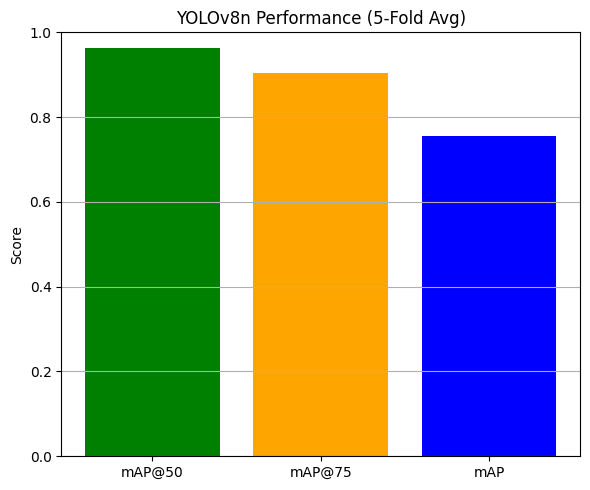

In [7]:
import matplotlib.pyplot as plt

# Your model's results
model_name = 'YOLOv8n'
metrics = {
    'mAP@50': 0.964,
    'mAP@75': 0.903,
    'mAP': 0.755
}

# Plot
plt.figure(figsize=(6, 5))
plt.bar(metrics.keys(), metrics.values(), color=['green', 'orange', 'blue'])
plt.ylim(0, 1)
plt.title(f'{model_name} Performance (5-Fold Avg)')
plt.ylabel('Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


▶️ Fold 0 of yolov8l.pt


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


✅ Augmented 1622 images.


100%|██████████| 83.7M/83.7M [00:00<00:00, 235MB/s]


Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8l_fold0/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8l_fold0, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True

train: Scanning /kaggle/working/helmet_cv/yolov8l_fold0/train/labels... 3285 images, 19 backgrounds, 0 corrupt: 100%|██████████| 3285/3285 [00:02<00:00, 1237.68it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8l_fold0/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 301.4±178.2 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8l_fold0/val/labels... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 844.24it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8l_fold0/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8l_fold0/yolov8l_fold0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8l_fold0/yolov8l_fold0
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       3.7G      2.041      2.828      2.087          3        640: 100%|██████████| 822/822 [03:29<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.59it/s]

                   all        416        697    0.00847     0.0173    0.00396    0.00153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.94G      2.088      2.715      2.124          2        640: 100%|██████████| 822/822 [03:22<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.08it/s]


                   all        416        697      0.561       0.43      0.445      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.15G      2.009      2.538      2.077          2        640: 100%|██████████| 822/822 [03:21<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        416        697      0.504      0.634      0.563      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.38G      1.907      2.409       2.02          2        640: 100%|██████████| 822/822 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        416        697      0.521      0.591       0.54      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.69G      1.881      2.349      1.974          1        640: 100%|██████████| 822/822 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.12it/s]


                   all        416        697      0.536      0.664      0.631       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.89G      1.805       2.21      1.927          1        640: 100%|██████████| 822/822 [03:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.09it/s]


                   all        416        697      0.585      0.635      0.629      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.21G      1.761      2.083      1.879          2        640: 100%|██████████| 822/822 [03:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        416        697      0.627       0.72      0.719      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.45G      1.717      2.021      1.868          1        640: 100%|██████████| 822/822 [03:21<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.13it/s]


                   all        416        697      0.604      0.705      0.679      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.71G      1.685      1.925      1.814          3        640: 100%|██████████| 822/822 [03:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.16it/s]


                   all        416        697      0.653      0.779      0.753       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.92G      1.679      1.886      1.827         10        640: 100%|██████████| 822/822 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.12it/s]


                   all        416        697      0.682      0.761      0.786      0.519
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.18G      1.667      1.826      1.867          2        640: 100%|██████████| 822/822 [03:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.11it/s]


                   all        416        697      0.715      0.789      0.813      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.44G      1.641      1.752      1.859          2        640: 100%|██████████| 822/822 [03:20<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        416        697      0.733      0.758      0.813      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      6.75G      1.623      1.718      1.831          1        640: 100%|██████████| 822/822 [03:20<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.11it/s]


                   all        416        697      0.758      0.807      0.847      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.07G       1.58      1.635      1.803          3        640: 100%|██████████| 822/822 [03:20<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        416        697      0.736      0.814      0.848      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      7.27G      1.539      1.584      1.766          1        640: 100%|██████████| 822/822 [03:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.13it/s]


                   all        416        697      0.783      0.842      0.887      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      7.51G      1.514      1.539      1.733          1        640: 100%|██████████| 822/822 [03:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.17it/s]


                   all        416        697      0.786      0.857       0.88       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.36G      1.497      1.492      1.728          2        640: 100%|██████████| 822/822 [03:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.11it/s]


                   all        416        697       0.79      0.876      0.885      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.36G      1.458      1.473      1.692          1        640: 100%|██████████| 822/822 [03:20<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        416        697      0.808      0.855      0.903      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.36G      1.432      1.452      1.675          2        640: 100%|██████████| 822/822 [03:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        416        697      0.816      0.886      0.916      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.36G      1.411      1.375      1.666          2        640: 100%|██████████| 822/822 [03:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.12it/s]


                   all        416        697      0.789      0.895      0.909      0.658

20 epochs completed in 1.186 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8l_fold0/yolov8l_fold0/weights/last.pt, 87.6MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8l_fold0/yolov8l_fold0/weights/best.pt, 87.6MB

Validating /kaggle/working/helmet_cv/yolov8l_fold0/yolov8l_fold0/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.20it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        697      0.789      0.895      0.909      0.658
           With Helmet        259        418      0.737      0.938      0.907       0.64
        Without Helmet        194        279      0.842      0.853       0.91      0.675
Speed: 0.2ms preprocess, 18.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8l_fold0/yolov8l_fold0
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1544.7±366.6 MB/s, size: 67.8 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8l_fold0/val/labels.cache... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:26<00:00,  3.95it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        697      0.791      0.897      0.909      0.658
           With Helmet        259        418      0.737      0.938      0.907       0.64
        Without Helmet        194        279      0.844      0.856       0.91      0.676
Speed: 0.6ms preprocess, 58.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8l_fold0/yolov8l_fold02
▶️ Fold 1 of yolov8l.pt
✅ Augmented 1586 images.
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8l_fold1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=Fa

train: Scanning /kaggle/working/helmet_cv/yolov8l_fold1/train/labels... 3249 images, 18 backgrounds, 0 corrupt: 100%|██████████| 3249/3249 [00:02<00:00, 1312.09it/s]

train: New cache created: /kaggle/working/helmet_cv/yolov8l_fold1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 297.1±58.3 MB/s, size: 63.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8l_fold1/val/labels... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 837.84it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8l_fold1/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8l_fold1/yolov8l_fold1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8l_fold1/yolov8l_fold1
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.12G      2.042      2.817      2.086          5        640: 100%|██████████| 813/813 [03:26<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.02it/s]

                   all        416        721      0.494      0.376      0.376      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.32G      2.061      2.689      2.141          3        640: 100%|██████████| 813/813 [03:20<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.10it/s]


                   all        416        721      0.518      0.393      0.421       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       4.6G      1.997       2.56      2.076          1        640: 100%|██████████| 813/813 [03:19<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.03it/s]

                   all        416        721      0.522      0.566      0.518      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.82G      1.892      2.393      2.003          1        640: 100%|██████████| 813/813 [03:18<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.12it/s]

                   all        416        721        0.6       0.63      0.629      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.15G      1.859      2.277      1.983          2        640: 100%|██████████| 813/813 [03:18<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.12it/s]


                   all        416        721      0.556      0.637      0.635      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.36G      1.782      2.143      1.915          1        640: 100%|██████████| 813/813 [03:19<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.13it/s]


                   all        416        721      0.629      0.698      0.684      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.58G      1.767      2.109      1.914          6        640: 100%|██████████| 813/813 [03:19<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.13it/s]


                   all        416        721      0.664      0.691      0.707       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.85G      1.719          2      1.866          4        640: 100%|██████████| 813/813 [03:18<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        416        721      0.741      0.634      0.735      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.15G      1.689      1.949      1.842          0        640: 100%|██████████| 813/813 [03:18<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.13it/s]

                   all        416        721      0.688      0.745      0.767      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.39G      1.661      1.862      1.835          2        640: 100%|██████████| 813/813 [03:18<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        416        721      0.699      0.722      0.781      0.513
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.63G      1.671      1.822      1.864          2        640: 100%|██████████| 813/813 [03:18<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.12it/s]


                   all        416        721      0.744      0.773      0.812      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       6.9G      1.646      1.784      1.863          1        640: 100%|██████████| 813/813 [03:18<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.08it/s]


                   all        416        721       0.75      0.804      0.847      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.14G      1.605      1.682      1.823          1        640: 100%|██████████| 813/813 [03:18<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        416        721      0.786      0.792      0.849      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.41G      1.581      1.648      1.812          3        640: 100%|██████████| 813/813 [03:18<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        416        721      0.788      0.806      0.857      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.23G      1.534      1.591      1.764          3        640: 100%|██████████| 813/813 [03:18<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        416        721      0.809      0.843      0.881      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.23G      1.504      1.517      1.752          1        640: 100%|██████████| 813/813 [03:18<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        416        721      0.838      0.841      0.901      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.23G      1.489      1.493      1.739          1        640: 100%|██████████| 813/813 [03:18<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.16it/s]


                   all        416        721      0.812      0.873      0.908       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.23G       1.45      1.427      1.709          1        640: 100%|██████████| 813/813 [03:18<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.16it/s]


                   all        416        721      0.841      0.876      0.913      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.25G      1.427      1.404      1.693          1        640: 100%|██████████| 813/813 [03:18<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.17it/s]


                   all        416        721       0.84      0.892      0.921      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.29G      1.384       1.36      1.665          3        640: 100%|██████████| 813/813 [03:18<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        416        721      0.863      0.892      0.934      0.684

20 epochs completed in 1.174 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8l_fold1/yolov8l_fold1/weights/last.pt, 87.6MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8l_fold1/yolov8l_fold1/weights/best.pt, 87.6MB

Validating /kaggle/working/helmet_cv/yolov8l_fold1/yolov8l_fold1/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:09<00:00,  5.32it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        721      0.862      0.892      0.934      0.684
           With Helmet        256        423       0.84      0.941      0.958      0.689
        Without Helmet        212        298      0.885      0.842       0.91      0.678
Speed: 0.2ms preprocess, 18.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8l_fold1/yolov8l_fold1
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1691.9±319.6 MB/s, size: 76.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8l_fold1/val/labels.cache... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:26<00:00,  3.95it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        721      0.863      0.892      0.934      0.684
           With Helmet        256        423      0.841      0.941      0.958      0.689
        Without Helmet        212        298      0.885      0.842       0.91      0.679
Speed: 0.6ms preprocess, 58.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8l_fold1/yolov8l_fold12
▶️ Fold 2 of yolov8l.pt
✅ Augmented 1600 images.
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8l_fold2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=Fa

train: Scanning /kaggle/working/helmet_cv/yolov8l_fold2/train/labels... 3263 images, 17 backgrounds, 0 corrupt: 100%|██████████| 3263/3263 [00:02<00:00, 1247.56it/s]

train: New cache created: /kaggle/working/helmet_cv/yolov8l_fold2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 283.3±93.0 MB/s, size: 58.4 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8l_fold2/val/labels... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 942.19it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8l_fold2/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8l_fold2/yolov8l_fold2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8l_fold2/yolov8l_fold2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.94G      2.021      2.785       2.04          7        640: 100%|██████████| 816/816 [03:27<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  4.98it/s]

                   all        416        726       0.34      0.292      0.242      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.13G      2.118      2.823      2.123          3        640: 100%|██████████| 816/816 [03:21<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.08it/s]


                   all        416        726      0.225      0.372      0.244      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.34G      2.049      2.655      2.069          7        640: 100%|██████████| 816/816 [03:20<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.10it/s]


                   all        416        726      0.517      0.465      0.474       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.65G      1.978      2.491      2.033          5        640: 100%|██████████| 816/816 [03:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.10it/s]


                   all        416        726      0.545      0.534      0.556      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.86G      1.891      2.343      1.958          5        640: 100%|██████████| 816/816 [03:19<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.11it/s]


                   all        416        726      0.618      0.636      0.665      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.15G      1.823      2.195       1.91          8        640: 100%|██████████| 816/816 [03:19<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.13it/s]


                   all        416        726      0.647      0.625      0.655      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.41G      1.786      2.128      1.864          8        640: 100%|██████████| 816/816 [03:19<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.10it/s]


                   all        416        726      0.696      0.647       0.72       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.62G      1.782      2.122       1.86          5        640: 100%|██████████| 816/816 [03:19<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        416        726      0.705      0.737      0.742      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.86G      1.733      1.983      1.836         13        640: 100%|██████████| 816/816 [03:19<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        416        726       0.69      0.755       0.76      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.18G      1.674      1.913      1.798          9        640: 100%|██████████| 816/816 [03:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.12it/s]


                   all        416        726      0.664       0.78      0.767      0.515
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.45G      1.701      1.856      1.859          4        640: 100%|██████████| 816/816 [03:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.09it/s]


                   all        416        726      0.765      0.777      0.811      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.71G      1.654      1.775      1.832          5        640: 100%|██████████| 816/816 [03:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]

                   all        416        726       0.79      0.783       0.83      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      6.92G      1.627      1.733      1.803          5        640: 100%|██████████| 816/816 [03:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.13it/s]


                   all        416        726      0.771      0.811      0.838      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.16G        1.6      1.659       1.79          4        640: 100%|██████████| 816/816 [03:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.10it/s]


                   all        416        726      0.801      0.831      0.868      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      7.45G      1.562      1.599      1.747          7        640: 100%|██████████| 816/816 [03:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.13it/s]


                   all        416        726      0.773      0.855      0.861      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.75G      1.527      1.549      1.724          4        640: 100%|██████████| 816/816 [03:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        416        726       0.83      0.857      0.872      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.75G      1.504      1.503      1.693          5        640: 100%|██████████| 816/816 [03:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.11it/s]


                   all        416        726      0.843      0.825      0.875      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.75G      1.475      1.456      1.679          6        640: 100%|██████████| 816/816 [03:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.12it/s]


                   all        416        726      0.833      0.872       0.89      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.75G      1.436      1.429      1.659          7        640: 100%|██████████| 816/816 [03:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        416        726      0.836      0.883      0.904      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.75G      1.419      1.378      1.634          5        640: 100%|██████████| 816/816 [03:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        416        726      0.836      0.883      0.898      0.664

20 epochs completed in 1.179 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8l_fold2/yolov8l_fold2/weights/last.pt, 87.6MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8l_fold2/yolov8l_fold2/weights/best.pt, 87.6MB

Validating /kaggle/working/helmet_cv/yolov8l_fold2/yolov8l_fold2/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:09<00:00,  5.27it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        726      0.836      0.883      0.904      0.664
           With Helmet        253        414      0.843      0.928      0.925      0.678
        Without Helmet        205        312      0.829      0.838      0.882       0.65
Speed: 0.2ms preprocess, 18.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8l_fold2/yolov8l_fold2
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1454.1±416.6 MB/s, size: 72.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8l_fold2/val/labels.cache... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:26<00:00,  3.99it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        726      0.836      0.883      0.904      0.663
           With Helmet        253        414      0.843      0.928      0.925      0.677
        Without Helmet        205        312      0.829      0.838      0.882      0.649
Speed: 0.5ms preprocess, 57.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8l_fold2/yolov8l_fold22
▶️ Fold 3 of yolov8l.pt
✅ Augmented 1598 images.
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8l_fold3/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=Fa

train: Scanning /kaggle/working/helmet_cv/yolov8l_fold3/train/labels... 3261 images, 17 backgrounds, 0 corrupt: 100%|██████████| 3261/3261 [00:02<00:00, 1321.16it/s]

train: New cache created: /kaggle/working/helmet_cv/yolov8l_fold3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 318.4±93.9 MB/s, size: 66.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8l_fold3/val/labels... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 857.71it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8l_fold3/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8l_fold3/yolov8l_fold3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8l_fold3/yolov8l_fold3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.57G      2.044      2.844      2.126          1        640: 100%|██████████| 816/816 [03:27<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.70it/s]

                   all        416        694    0.00431      0.309    0.00345    0.00147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.61G      2.128      2.879      2.192          6        640: 100%|██████████| 816/816 [03:20<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.03it/s]


                   all        416        694      0.372      0.312      0.316      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.65G      2.052      2.689      2.145          3        640: 100%|██████████| 816/816 [03:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.12it/s]


                   all        416        694      0.606      0.429      0.469      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.86G      1.965      2.583      2.077          2        640: 100%|██████████| 816/816 [03:19<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.09it/s]


                   all        416        694      0.535      0.457      0.503      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.06G      1.873      2.337      2.005          2        640: 100%|██████████| 816/816 [03:19<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.16it/s]


                   all        416        694      0.647      0.655      0.681      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.33G      1.856       2.28      1.982          2        640: 100%|██████████| 816/816 [03:19<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.12it/s]


                   all        416        694      0.657      0.645      0.681      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.65G      1.796      2.158      1.946          4        640: 100%|██████████| 816/816 [03:18<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        416        694      0.656      0.662      0.692      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.85G      1.764      2.111      1.908          3        640: 100%|██████████| 816/816 [03:18<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.11it/s]


                   all        416        694      0.662      0.682      0.736      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.12G      1.723      2.005      1.879          5        640: 100%|██████████| 816/816 [03:18<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.08it/s]

                   all        416        694      0.702      0.719      0.764      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.34G      1.683       1.95      1.862          5        640: 100%|██████████| 816/816 [03:19<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.10it/s]


                   all        416        694      0.728      0.754      0.792      0.518
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.66G      1.709       1.92      1.915          1        640: 100%|██████████| 816/816 [03:18<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.11it/s]


                   all        416        694      0.722      0.753      0.791       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.87G      1.674      1.831      1.889          1        640: 100%|██████████| 816/816 [03:18<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.11it/s]

                   all        416        694      0.764      0.783      0.834      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.14G      1.623      1.758      1.839          1        640: 100%|██████████| 816/816 [03:18<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.16it/s]


                   all        416        694      0.823      0.775       0.85      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.44G      1.598      1.716      1.812          4        640: 100%|██████████| 816/816 [03:18<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        416        694      0.776      0.828      0.852      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.99G      1.581      1.638      1.815          2        640: 100%|██████████| 816/816 [03:18<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.09it/s]


                   all        416        694      0.788      0.778      0.854      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.99G      1.544      1.587      1.785          2        640: 100%|██████████| 816/816 [03:18<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        416        694      0.806      0.818      0.877      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.99G      1.523       1.55      1.759          1        640: 100%|██████████| 816/816 [03:18<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.12it/s]


                   all        416        694      0.827      0.823      0.875      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.99G      1.487      1.479       1.73          1        640: 100%|██████████| 816/816 [03:18<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.12it/s]


                   all        416        694      0.835      0.851      0.897      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      6.03G      1.446      1.445        1.7          1        640: 100%|██████████| 816/816 [03:18<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        416        694       0.83      0.872      0.899       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.07G      1.431      1.415      1.692          1        640: 100%|██████████| 816/816 [03:18<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.17it/s]


                   all        416        694      0.826      0.874      0.903      0.661

20 epochs completed in 1.174 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8l_fold3/yolov8l_fold3/weights/last.pt, 87.6MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8l_fold3/yolov8l_fold3/weights/best.pt, 87.6MB

Validating /kaggle/working/helmet_cv/yolov8l_fold3/yolov8l_fold3/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:09<00:00,  5.25it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        694      0.826      0.874      0.902      0.661
           With Helmet        243        386      0.856      0.915      0.929      0.682
        Without Helmet        206        308      0.797      0.834      0.876       0.64
Speed: 0.3ms preprocess, 18.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8l_fold3/yolov8l_fold3
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1517.6±477.4 MB/s, size: 76.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8l_fold3/val/labels.cache... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:26<00:00,  3.95it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        694      0.826      0.874      0.903      0.661
           With Helmet        243        386      0.856      0.915      0.929      0.682
        Without Helmet        206        308      0.797      0.834      0.876       0.64
Speed: 0.8ms preprocess, 58.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8l_fold3/yolov8l_fold32
▶️ Fold 4 of yolov8l.pt
✅ Augmented 1634 images.
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8l_fold4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=Fa

train: Scanning /kaggle/working/helmet_cv/yolov8l_fold4/train/labels... 3298 images, 13 backgrounds, 0 corrupt: 100%|██████████| 3298/3298 [00:02<00:00, 1264.19it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8l_fold4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 259.7±137.8 MB/s, size: 64.6 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8l_fold4/val/labels... 415 images, 8 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<00:00, 968.67it/s] 

val: New cache created: /kaggle/working/helmet_cv/yolov8l_fold4/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8l_fold4/yolov8l_fold4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8l_fold4/yolov8l_fold4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.02G      2.063      2.874      2.106          1        640: 100%|██████████| 825/825 [03:29<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.06it/s]


                   all        415        675       0.25      0.421      0.216     0.0919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.25G      2.077      2.729      2.132          5        640: 100%|██████████| 825/825 [03:23<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.11it/s]


                   all        415        675      0.471      0.504       0.49       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.58G      2.021      2.541       2.08          3        640: 100%|██████████| 825/825 [03:22<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.10it/s]


                   all        415        675      0.534      0.528      0.521      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.83G      1.903      2.389      1.984          9        640: 100%|██████████| 825/825 [03:21<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.11it/s]


                   all        415        675      0.578      0.509      0.561      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.14G       1.87        2.3      1.956          5        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.11it/s]


                   all        415        675      0.624      0.536      0.595       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.33G      1.853      2.248      1.938          4        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        415        675       0.59      0.722      0.667      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.64G      1.772      2.115      1.892          6        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        415        675      0.651      0.718      0.729      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.85G      1.771      2.106      1.896          9        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        415        675      0.687      0.788      0.791      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.16G      1.716      1.996      1.841          3        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.12it/s]


                   all        415        675      0.735      0.781      0.797      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.31G      1.664      1.925      1.821          4        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.13it/s]


                   all        415        675       0.72      0.791      0.826      0.562
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       6.6G      1.686      1.862      1.885          2        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        415        675      0.767       0.81      0.842      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.92G      1.647      1.768      1.861          2        640: 100%|██████████| 825/825 [03:21<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.17it/s]


                   all        415        675      0.771      0.833      0.848      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.12G      1.611      1.743      1.836          3        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.16it/s]


                   all        415        675      0.782      0.833      0.857      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.33G      1.576      1.659      1.786          2        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.13it/s]


                   all        415        675       0.81      0.831      0.873      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.47G      1.547      1.619      1.788          3        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.16it/s]


                   all        415        675      0.829      0.844       0.88      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.47G      1.521      1.569      1.763          2        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.18it/s]


                   all        415        675      0.786      0.846      0.861      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.47G        1.5      1.527      1.739          2        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        415        675      0.855      0.849      0.898      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.47G      1.466      1.499      1.717          5        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.14it/s]


                   all        415        675      0.848      0.868      0.902      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.47G      1.432      1.453      1.694          3        640: 100%|██████████| 825/825 [03:21<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        415        675      0.868      0.883       0.92      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.47G      1.409      1.398      1.673          2        640: 100%|██████████| 825/825 [03:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:10<00:00,  5.15it/s]


                   all        415        675      0.878      0.869       0.91      0.679

20 epochs completed in 1.190 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8l_fold4/yolov8l_fold4/weights/last.pt, 87.6MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8l_fold4/yolov8l_fold4/weights/best.pt, 87.6MB

Validating /kaggle/working/helmet_cv/yolov8l_fold4/yolov8l_fold4/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:09<00:00,  5.21it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        415        675       0.87       0.88       0.92      0.684
           With Helmet        267        411      0.824      0.946      0.935      0.678
        Without Helmet        188        264      0.915      0.814      0.904       0.69
Speed: 0.3ms preprocess, 18.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8l_fold4/yolov8l_fold4
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1385.9±524.5 MB/s, size: 66.6 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8l_fold4/val/labels.cache... 415 images, 8 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 104/104 [00:26<00:00,  3.98it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        415        675      0.867      0.881      0.917      0.685
           With Helmet        267        411      0.824      0.947      0.935      0.678
        Without Helmet        188        264      0.909      0.814      0.898      0.691
Speed: 0.6ms preprocess, 58.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8l_fold4/yolov8l_fold42

📊 YOLOv8l Average mAP@50: 0.913, mAP@75: 0.808, mAP: 0.670


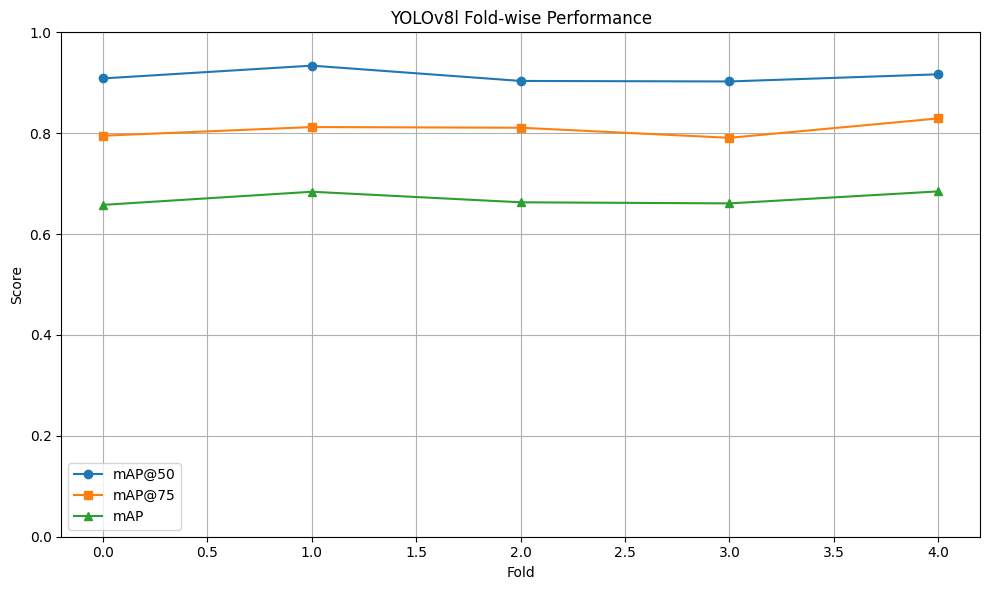

In [8]:
# ✅ YOLOv8l 5-Fold Cross-Validation with Visualization
!pip install -q ultralytics

from ultralytics import YOLO
import os, shutil, random, cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from albumentations import (Compose, HorizontalFlip, VerticalFlip, ShiftScaleRotate,
                            RandomBrightnessContrast, RandomGamma, HueSaturationValue)

# ========== CONFIG ==========
SEED = 42
KFOLDS = 5
model_name = 'yolov8l.pt'
INPUT_IMG_DIR = '/kaggle/input/helmet/Pakistani_Helmet/train/images'
INPUT_LBL_DIR = '/kaggle/input/helmet/Pakistani_Helmet/train/labels'
WORK_DIR = '/kaggle/working/helmet_cv'
random.seed(SEED)

# ========== AUGMENTATION ==========
AUG = Compose([
    HorizontalFlip(p=0.5), VerticalFlip(p=0.3),
    ShiftScaleRotate(p=0.7, shift_limit=0.05, scale_limit=0.2, rotate_limit=15),
    RandomBrightnessContrast(p=0.5), RandomGamma(p=0.5), HueSaturationValue(p=0.4)
])

# ========== UTILITIES ==========
def copy_data(img_names, dest_img_dir, dest_lbl_dir):
    for name in img_names:
        for ext in ['.jpg', '.png', '.jpeg']:
            img_path = os.path.join(INPUT_IMG_DIR, name + ext)
            if os.path.exists(img_path):
                shutil.copy(img_path, os.path.join(dest_img_dir, name + ext))
                break
        shutil.copy(os.path.join(INPUT_LBL_DIR, name + '.txt'), os.path.join(dest_lbl_dir, name + '.txt'))

def apply_selective_augmentation(img_names, dest_img_dir, dest_lbl_dir):
    count = 0
    for name in img_names:
        label_path = os.path.join(INPUT_LBL_DIR, name + '.txt')
        with open(label_path, 'r') as f:
            lines = f.readlines()
        if any(line.startswith("1 ") for line in lines):
            for ext in ['.jpg', '.png', '.jpeg']:
                img_path = os.path.join(INPUT_IMG_DIR, name + ext)
                if os.path.exists(img_path):
                    break
            img = cv2.imread(img_path)
            for i in range(2):
                aug_img = AUG(image=img)['image']
                aug_name = f"{name}_aug{i}"
                cv2.imwrite(os.path.join(dest_img_dir, aug_name + '.jpg'), aug_img)
                shutil.copy(label_path, os.path.join(dest_lbl_dir, aug_name + '.txt'))
                count += 1
    print(f"✅ Augmented {count} images.")

# ========== CROSS-VALIDATION ==========
image_files = [f.rsplit('.', 1)[0] for f in os.listdir(INPUT_IMG_DIR) if f.endswith(('.jpg', '.png', '.jpeg'))]
kf = KFold(n_splits=KFOLDS, shuffle=True, random_state=SEED)
model_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(image_files)):
    print(f"▶️ Fold {fold} of {model_name}")
    fold_dir = os.path.join(WORK_DIR, f"yolov8l_fold{fold}")
    train_img, train_lbl = os.path.join(fold_dir, 'train/images'), os.path.join(fold_dir, 'train/labels')
    val_img, val_lbl = os.path.join(fold_dir, 'val/images'), os.path.join(fold_dir, 'val/labels')
    os.makedirs(train_img, exist_ok=True), os.makedirs(train_lbl, exist_ok=True)
    os.makedirs(val_img, exist_ok=True), os.makedirs(val_lbl, exist_ok=True)

    train_files = [image_files[i] for i in train_idx]
    val_files = [image_files[i] for i in val_idx]
    copy_data(train_files, train_img, train_lbl)
    copy_data(val_files, val_img, val_lbl)
    apply_selective_augmentation(train_files, train_img, train_lbl)

    yaml_path = os.path.join(fold_dir, 'data.yaml')
    with open(yaml_path, 'w') as f:
        f.write(f"""
train: {os.path.dirname(train_img)}
val: {os.path.dirname(val_img)}
nc: 2
names: ['With Helmet', 'Without Helmet']
""")

    model = YOLO(model_name)
    model.train(
        data=yaml_path,
        epochs=20,           # 👈 Reduce for v8l (takes more time)
        patience=5,
        imgsz=640,
        batch=4,             # 👈 Reduce batch to avoid memory issue on v8l
        name=f'yolov8l_fold{fold}',
        project=fold_dir,
        device=0
    )
    metrics = model.val()
    model_scores.append([metrics.box.map50, metrics.box.map75, metrics.box.map])

# ========== RESULTS & VISUALIZATION ==========
avg = np.mean(model_scores, axis=0)
print(f"\n📊 YOLOv8l Average mAP@50: {avg[0]:.3f}, mAP@75: {avg[1]:.3f}, mAP: {avg[2]:.3f}")

# ✅ Plot fold-wise performance
folds = list(range(KFOLDS))
map50s = [score[0] for score in model_scores]
map75s = [score[1] for score in model_scores]
maps   = [score[2] for score in model_scores]

plt.figure(figsize=(10,6))
plt.plot(folds, map50s, marker='o', label='mAP@50')
plt.plot(folds, map75s, marker='s', label='mAP@75')
plt.plot(folds, maps,   marker='^', label='mAP')
plt.title("YOLOv8l Fold-wise Performance")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# ✅ YOLOv8s 5-Fold Cross-Validation + Plot
!pip install -q ultralytics

from ultralytics import YOLO
import os, shutil, random, cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from albumentations import (Compose, HorizontalFlip, VerticalFlip, ShiftScaleRotate,
                            RandomBrightnessContrast, RandomGamma, HueSaturationValue)

# ========== CONFIGURATION ==========
SEED = 42
KFOLDS = 5
model_name = 'yolov8s.pt'
INPUT_IMG_DIR = '/kaggle/input/helmet/Pakistani_Helmet/train/images'
INPUT_LBL_DIR = '/kaggle/input/helmet/Pakistani_Helmet/train/labels'
WORK_DIR = '/kaggle/working/helmet_cv'
random.seed(SEED)

# ========== AUGMENTATION ==========
AUG = Compose([
    HorizontalFlip(p=0.5), VerticalFlip(p=0.3),
    ShiftScaleRotate(p=0.7, shift_limit=0.05, scale_limit=0.2, rotate_limit=15),
    RandomBrightnessContrast(p=0.5), RandomGamma(p=0.5), HueSaturationValue(p=0.4)
])

# ========== UTILITY FUNCTIONS ==========
def copy_data(img_names, dest_img_dir, dest_lbl_dir):
    for name in img_names:
        for ext in ['.jpg', '.png', '.jpeg']:
            img_path = os.path.join(INPUT_IMG_DIR, name + ext)
            if os.path.exists(img_path):
                shutil.copy(img_path, os.path.join(dest_img_dir, name + ext))
                break
        shutil.copy(os.path.join(INPUT_LBL_DIR, name + '.txt'), os.path.join(dest_lbl_dir, name + '.txt'))

def apply_selective_augmentation(img_names, dest_img_dir, dest_lbl_dir):
    count = 0
    for name in img_names:
        label_path = os.path.join(INPUT_LBL_DIR, name + '.txt')
        with open(label_path, 'r') as f:
            lines = f.readlines()
        if any(line.startswith("1 ") for line in lines):
            for ext in ['.jpg', '.png', '.jpeg']:
                img_path = os.path.join(INPUT_IMG_DIR, name + ext)
                if os.path.exists(img_path):
                    break
            img = cv2.imread(img_path)
            for i in range(2):
                aug_img = AUG(image=img)['image']
                aug_name = f"{name}_aug{i}"
                cv2.imwrite(os.path.join(dest_img_dir, aug_name + '.jpg'), aug_img)
                shutil.copy(label_path, os.path.join(dest_lbl_dir, aug_name + '.txt'))
                count += 1
    print(f"✅ Augmented {count} images.")

# ========== CROSS-VALIDATION ==========
image_files = [f.rsplit('.', 1)[0] for f in os.listdir(INPUT_IMG_DIR) if f.endswith(('.jpg', '.png', '.jpeg'))]
kf = KFold(n_splits=KFOLDS, shuffle=True, random_state=SEED)
model_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(image_files)):
    print(f"\n▶️ Fold {fold} of {model_name}")
    fold_dir = os.path.join(WORK_DIR, f"yolov8s_fold{fold}")
    train_img, train_lbl = os.path.join(fold_dir, 'train/images'), os.path.join(fold_dir, 'train/labels')
    val_img, val_lbl = os.path.join(fold_dir, 'val/images'), os.path.join(fold_dir, 'val/labels')
    os.makedirs(train_img, exist_ok=True), os.makedirs(train_lbl, exist_ok=True)
    os.makedirs(val_img, exist_ok=True), os.makedirs(val_lbl, exist_ok=True)

    train_files = [image_files[i] for i in train_idx]
    val_files = [image_files[i] for i in val_idx]
    copy_data(train_files, train_img, train_lbl)
    copy_data(val_files, val_img, val_lbl)
    apply_selective_augmentation(train_files, train_img, train_lbl)

    yaml_path = os.path.join(fold_dir, 'data.yaml')
    with open(yaml_path, 'w') as f:
        f.write(f"""
train: {os.path.dirname(train_img)}
val: {os.path.dirname(val_img)}
nc: 2
names: ['With Helmet', 'Without Helmet']
""")

    model = YOLO(model_name)
    model.train(
        data=yaml_path,
        epochs=20,
        patience=5,
        imgsz=640,
        batch=8,
        name=f'yolov8s_fold{fold}',  # ✅ correct name for each fold
        project=fold_dir,
        device=0
    )

    metrics = model.val()
    model_scores.append([metrics.box.map50, metrics.box.map75, metrics.box.map])

# ========== FINAL RESULTS ==========
avg = np.mean(model_scores, axis=0)
print(f"\n📊 YOLOv8s Average mAP@50: {avg[0]:.3f}, mAP@75: {avg[1]:.3f}, mAP: {avg[2]:.3f}")

# ========== VISUALIZE ==========
folds = list(range(KFOLDS))
map50s = [s[0] for s in model_scores]
map75s = [s[1] for s in model_scores]
maps   = [s[2] for s in model_scores]

plt.figure(figsize=(10,6))
plt.plot(folds, map50s, marker='o', label='mAP@50')
plt.plot(folds, map75s, marker='s', label='mAP@75')
plt.plot(folds, maps,   marker='^', label='mAP')
plt.title("YOLOv8s Fold-wise Performance")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.4 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.c

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)



▶️ Fold 0 of yolov8s.pt
✅ Augmented 1622 images.


100%|██████████| 21.5M/21.5M [00:00<00:00, 163MB/s]


Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8s_fold0/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_fold0, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 72.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1243.6±568.5 MB/s, size: 85.4 KB)


train: Scanning /kaggle/working/helmet_cv/yolov8s_fold0/train/labels... 3285 images, 19 backgrounds, 0 corrupt: 100%|██████████| 3285/3285 [00:02<00:00, 1373.21it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8s_fold0/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 713.7±266.9 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8s_fold0/val/labels... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 745.91it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8s_fold0/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.98G      1.789      2.304      1.734         19        640: 100%|██████████| 411/411 [01:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.33it/s]


                   all        416        697      0.598      0.646      0.607      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.41G      1.851      2.112      1.759         12        640: 100%|██████████| 411/411 [00:58<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.22it/s]

                   all        416        697      0.708      0.549       0.59      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.44G      1.852      2.084       1.76         14        640: 100%|██████████| 411/411 [00:58<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.08it/s]


                   all        416        697      0.671      0.654      0.715      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.46G      1.783      2.021      1.714         19        640: 100%|██████████| 411/411 [00:58<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.09it/s]

                   all        416        697      0.643      0.725      0.739      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.51G      1.757      1.933      1.677         18        640: 100%|██████████| 411/411 [00:57<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.01it/s]

                   all        416        697      0.745      0.708      0.774      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.55G      1.702      1.833      1.641         15        640: 100%|██████████| 411/411 [00:57<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.02it/s]

                   all        416        697      0.704      0.752      0.801      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.59G      1.682      1.732      1.619         16        640: 100%|██████████| 411/411 [00:58<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.18it/s]

                   all        416        697      0.756      0.817      0.836      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.62G       1.61       1.67      1.586         15        640: 100%|██████████| 411/411 [00:58<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        697      0.754      0.786      0.836      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.66G      1.575      1.608      1.567         18        640: 100%|██████████| 411/411 [00:58<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.36it/s]

                   all        416        697      0.755      0.837      0.863      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       2.7G      1.571      1.585      1.554         16        640: 100%|██████████| 411/411 [00:58<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.23it/s]

                   all        416        697      0.764      0.851      0.867      0.596


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.73G      1.559      1.532      1.594          6        640: 100%|██████████| 411/411 [00:58<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.31it/s]

                   all        416        697      0.771      0.867      0.876      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.75G      1.523      1.486      1.574          9        640: 100%|██████████| 411/411 [00:57<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.31it/s]

                   all        416        697      0.821      0.853      0.896      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       2.8G      1.487      1.424      1.552         17        640: 100%|██████████| 411/411 [00:57<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.26it/s]

                   all        416        697      0.774      0.878      0.894      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         3G      1.468      1.381      1.533          9        640: 100%|██████████| 411/411 [00:57<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.21it/s]

                   all        416        697      0.818      0.882      0.899      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.04G      1.426      1.324       1.51          7        640: 100%|██████████| 411/411 [00:57<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.34it/s]

                   all        416        697      0.854      0.892      0.928      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.07G      1.404      1.272      1.487          6        640: 100%|██████████| 411/411 [00:57<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.42it/s]

                   all        416        697      0.844      0.897      0.935      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.11G      1.355      1.244      1.458          7        640: 100%|██████████| 411/411 [00:57<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.22it/s]

                   all        416        697       0.87      0.881      0.938      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.15G      1.331      1.224      1.442          8        640: 100%|██████████| 411/411 [00:57<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.19it/s]

                   all        416        697      0.889      0.874       0.94      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.18G      1.297      1.167      1.414          6        640: 100%|██████████| 411/411 [00:57<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.27it/s]

                   all        416        697      0.868      0.918      0.941      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.21G      1.271      1.136      1.398          8        640: 100%|██████████| 411/411 [00:57<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.20it/s]

                   all        416        697      0.855      0.927      0.951      0.709



20 epochs completed in 0.346 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0/weights/best.pt, 22.5MB

Validating /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.93it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        697      0.855      0.926      0.951      0.709
           With Helmet        259        418      0.793       0.94      0.943      0.684
        Without Helmet        194        279      0.917      0.912       0.96      0.735
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold0
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1541.9±565.7 MB/s, size: 67.8 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8s_fold0/val/labels.cache... 416 images, 2 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:06<00:00,  8.37it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        697      0.855      0.927      0.951      0.709
           With Helmet        259        418      0.793       0.94      0.943      0.683
        Without Helmet        194        279      0.917      0.913       0.96      0.735
Speed: 0.6ms preprocess, 10.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8s_fold0/yolov8s_fold02

▶️ Fold 1 of yolov8s.pt
✅ Augmented 1586 images.
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8s_fold1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=F

train: Scanning /kaggle/working/helmet_cv/yolov8s_fold1/train/labels... 3249 images, 18 backgrounds, 0 corrupt: 100%|██████████| 3249/3249 [00:02<00:00, 1539.79it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8s_fold1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 279.2±76.2 MB/s, size: 63.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8s_fold1/val/labels... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 754.84it/s]

val: New cache created: /kaggle/working/helmet_cv/yolov8s_fold1/val/labels.cache


Plotting labels to /kaggle/working/helmet_cv/yolov8s_fold1/yolov8s_fold1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8s_fold1/yolov8s_fold1
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.24G      1.809      2.371      1.717          1        640: 100%|██████████| 407/407 [01:01<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.78it/s]


                   all        416        721        0.6      0.436      0.486      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.51G      1.846      2.121      1.727          4        640: 100%|██████████| 407/407 [00:57<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.97it/s]


                   all        416        721       0.51      0.586      0.506      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.51G      1.832      2.091      1.733          3        640: 100%|██████████| 407/407 [00:57<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.96it/s]

                   all        416        721      0.752      0.624      0.728      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.56G      1.805      2.011      1.704          1        640: 100%|██████████| 407/407 [00:57<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.10it/s]

                   all        416        721      0.781      0.706      0.786      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.6G      1.745        1.9       1.65          0        640: 100%|██████████| 407/407 [00:57<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.98it/s]

                   all        416        721      0.768      0.743      0.808      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.63G       1.68      1.819      1.621          1        640: 100%|██████████| 407/407 [00:57<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.05it/s]

                   all        416        721      0.794      0.739      0.824       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.67G      1.651      1.752      1.609          2        640: 100%|██████████| 407/407 [00:57<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.31it/s]

                   all        416        721      0.744      0.695      0.757      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.98G      1.599      1.669      1.567          2        640: 100%|██████████| 407/407 [00:57<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.20it/s]

                   all        416        721      0.798      0.785      0.855      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.01G      1.573      1.606      1.539          4        640: 100%|██████████| 407/407 [00:57<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.26it/s]

                   all        416        721      0.761      0.786      0.819      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.05G      1.559      1.586      1.536          2        640: 100%|██████████| 407/407 [00:57<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.20it/s]

                   all        416        721      0.801      0.821      0.895      0.613


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.07G      1.554      1.527      1.592          2        640: 100%|██████████| 407/407 [00:57<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.06it/s]

                   all        416        721      0.803       0.84      0.894      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.12G      1.519      1.482      1.565          1        640: 100%|██████████| 407/407 [00:57<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.24it/s]

                   all        416        721      0.845      0.853       0.91      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.16G      1.498      1.449      1.545          1        640: 100%|██████████| 407/407 [00:57<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.42it/s]

                   all        416        721      0.833      0.873      0.913      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       3.2G      1.464      1.381      1.515          3        640: 100%|██████████| 407/407 [00:57<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.14it/s]

                   all        416        721      0.838      0.885      0.929      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.23G      1.428      1.325      1.485          3        640: 100%|██████████| 407/407 [00:58<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.79it/s]

                   all        416        721      0.849      0.875      0.925      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.27G      1.403       1.28      1.478          1        640: 100%|██████████| 407/407 [00:58<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.75it/s]

                   all        416        721      0.903      0.884      0.946      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       3.3G      1.367      1.238      1.457          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.97it/s]

                   all        416        721      0.832      0.911      0.936      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.34G      1.332      1.202      1.428          1        640: 100%|██████████| 407/407 [00:58<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.97it/s]

                   all        416        721      0.904      0.917      0.957      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.36G      1.311      1.177      1.418          1        640: 100%|██████████| 407/407 [00:58<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.01it/s]

                   all        416        721      0.917      0.913      0.963      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.41G      1.282      1.158      1.403          3        640: 100%|██████████| 407/407 [00:57<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.93it/s]

                   all        416        721      0.929      0.922      0.967      0.733



20 epochs completed in 0.346 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8s_fold1/yolov8s_fold1/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8s_fold1/yolov8s_fold1/weights/best.pt, 22.5MB

Validating /kaggle/working/helmet_cv/yolov8s_fold1/yolov8s_fold1/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.85it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        721      0.927       0.92      0.966      0.732
           With Helmet        256        423      0.916      0.948       0.97      0.729
        Without Helmet        212        298      0.938      0.893      0.961      0.736
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8s_fold1/yolov8s_fold1
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1390.6±705.5 MB/s, size: 76.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8s_fold1/val/labels.cache... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:06<00:00,  8.28it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        721      0.927       0.92      0.966      0.733
           With Helmet        256        423      0.916      0.948       0.97       0.73
        Without Helmet        212        298      0.938      0.893      0.961      0.736
Speed: 0.6ms preprocess, 10.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8s_fold1/yolov8s_fold12

▶️ Fold 2 of yolov8s.pt
✅ Augmented 1600 images.
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8s_fold2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=F

train: Scanning /kaggle/working/helmet_cv/yolov8s_fold2/train/labels... 3263 images, 17 backgrounds, 0 corrupt: 100%|██████████| 3263/3263 [00:02<00:00, 1456.09it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8s_fold2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 290.7±95.0 MB/s, size: 58.4 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8s_fold2/val/labels... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 794.34it/s]


val: New cache created: /kaggle/working/helmet_cv/yolov8s_fold2/val/labels.cache
Plotting labels to /kaggle/working/helmet_cv/yolov8s_fold2/yolov8s_fold2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8s_fold2/yolov8s_fold2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       2.3G      1.813      2.326      1.732         17        640: 100%|██████████| 408/408 [01:01<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.98it/s]

                   all        416        726      0.383      0.607      0.329      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.57G       1.86      2.125      1.775         21        640: 100%|██████████| 408/408 [00:58<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.77it/s]

                   all        416        726      0.654      0.656       0.66      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.57G      1.847      2.097       1.75         21        640: 100%|██████████| 408/408 [00:58<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.95it/s]

                   all        416        726       0.76      0.628      0.747      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.57G      1.801      2.044      1.725         13        640: 100%|██████████| 408/408 [00:58<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.82it/s]

                   all        416        726      0.704      0.781      0.781      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.57G      1.742        1.9      1.689         20        640: 100%|██████████| 408/408 [00:57<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.93it/s]


                   all        416        726      0.707      0.765      0.815      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.57G      1.721      1.852      1.678         26        640: 100%|██████████| 408/408 [00:57<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.01it/s]

                   all        416        726       0.77      0.816      0.841       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.58G      1.644      1.743      1.614         19        640: 100%|██████████| 408/408 [00:57<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.03it/s]

                   all        416        726      0.785      0.829      0.857      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.62G       1.63      1.673      1.603         12        640: 100%|██████████| 408/408 [00:58<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.18it/s]

                   all        416        726       0.77      0.818       0.85      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.66G      1.601      1.642      1.578         28        640: 100%|██████████| 408/408 [00:57<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        726      0.819      0.815       0.87      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.69G      1.553      1.552      1.544         20        640: 100%|██████████| 408/408 [00:58<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.20it/s]

                   all        416        726      0.814       0.83      0.866      0.602


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.73G      1.574      1.547      1.617         10        640: 100%|██████████| 408/408 [00:57<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.14it/s]

                   all        416        726      0.824      0.862      0.883      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.77G      1.536      1.465      1.583         10        640: 100%|██████████| 408/408 [00:57<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.33it/s]

                   all        416        726      0.833      0.875      0.909      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.82G      1.512      1.409      1.565         12        640: 100%|██████████| 408/408 [00:57<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        416        726      0.851      0.884      0.915      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.89G      1.453      1.359      1.518         10        640: 100%|██████████| 408/408 [00:57<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.29it/s]

                   all        416        726      0.855      0.894      0.927      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.94G      1.426      1.343      1.515         12        640: 100%|██████████| 408/408 [00:58<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.20it/s]

                   all        416        726      0.858      0.877      0.914      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.02G        1.4      1.278      1.491         10        640: 100%|██████████| 408/408 [00:57<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.28it/s]

                   all        416        726      0.873      0.866      0.917      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.09G      1.369      1.243      1.469          9        640: 100%|██████████| 408/408 [00:57<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.25it/s]

                   all        416        726      0.847      0.896      0.926      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.14G      1.339      1.207      1.449         14        640: 100%|██████████| 408/408 [00:58<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.15it/s]

                   all        416        726      0.905      0.905      0.943      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.21G      1.305      1.172      1.434         13        640: 100%|██████████| 408/408 [00:57<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.15it/s]

                   all        416        726      0.908      0.905      0.949      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.28G      1.281      1.142      1.412         11        640: 100%|██████████| 408/408 [00:57<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.95it/s]

                   all        416        726      0.908      0.913      0.949      0.715



20 epochs completed in 0.347 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8s_fold2/yolov8s_fold2/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8s_fold2/yolov8s_fold2/weights/best.pt, 22.5MB

Validating /kaggle/working/helmet_cv/yolov8s_fold2/yolov8s_fold2/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.48it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        726      0.908      0.913      0.949      0.715
           With Helmet        253        414      0.879      0.957      0.958      0.723
        Without Helmet        205        312      0.937      0.869      0.939      0.707
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8s_fold2/yolov8s_fold2
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1291.3±699.2 MB/s, size: 72.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8s_fold2/val/labels.cache... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:06<00:00,  8.07it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        726      0.908      0.913      0.949      0.714
           With Helmet        253        414      0.879      0.957      0.958      0.722
        Without Helmet        205        312      0.937      0.869      0.939      0.706
Speed: 0.6ms preprocess, 10.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8s_fold2/yolov8s_fold22

▶️ Fold 3 of yolov8s.pt
✅ Augmented 1598 images.
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8s_fold3/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=F

train: Scanning /kaggle/working/helmet_cv/yolov8s_fold3/train/labels... 3261 images, 17 backgrounds, 0 corrupt: 100%|██████████| 3261/3261 [00:02<00:00, 1333.51it/s]

train: New cache created: /kaggle/working/helmet_cv/yolov8s_fold3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 269.7±84.0 MB/s, size: 66.9 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8s_fold3/val/labels... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 751.71it/s]


val: New cache created: /kaggle/working/helmet_cv/yolov8s_fold3/val/labels.cache
Plotting labels to /kaggle/working/helmet_cv/yolov8s_fold3/yolov8s_fold3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8s_fold3/yolov8s_fold3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.32G      1.837      2.369      1.727         13        640: 100%|██████████| 408/408 [01:03<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.83it/s]


                   all        416        694      0.598      0.482      0.447      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.59G       1.87      2.115      1.754         19        640: 100%|██████████| 408/408 [00:59<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.81it/s]

                   all        416        694      0.672      0.593       0.64      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.59G      1.833       2.05      1.732         21        640: 100%|██████████| 408/408 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.57it/s]


                   all        416        694      0.675      0.628      0.691       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.59G      1.807       2.03      1.704          9        640: 100%|██████████| 408/408 [00:57<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.91it/s]

                   all        416        694      0.699      0.703      0.754      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.59G      1.742      1.911      1.672          9        640: 100%|██████████| 408/408 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.78it/s]

                   all        416        694      0.741      0.774      0.832      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.59G      1.703      1.834      1.648         19        640: 100%|██████████| 408/408 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.67it/s]

                   all        416        694      0.752      0.773      0.817      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       2.6G      1.654      1.737      1.598         10        640: 100%|██████████| 408/408 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.91it/s]

                   all        416        694      0.741      0.797      0.845      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.64G      1.631       1.69       1.59         14        640: 100%|██████████| 408/408 [00:58<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.02it/s]

                   all        416        694      0.798      0.746      0.836      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.67G       1.59      1.589      1.544         19        640: 100%|██████████| 408/408 [00:58<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.87it/s]

                   all        416        694      0.825      0.813      0.878      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.71G      1.555      1.554      1.534         15        640: 100%|██████████| 408/408 [00:58<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.87it/s]

                   all        416        694       0.77      0.831      0.878      0.615


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.74G      1.558       1.51      1.599          5        640: 100%|██████████| 408/408 [00:58<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.90it/s]

                   all        416        694      0.794      0.866      0.891      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.78G      1.523      1.455      1.572          6        640: 100%|██████████| 408/408 [00:58<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.03it/s]

                   all        416        694      0.824      0.864      0.907      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.83G      1.492      1.398      1.542          6        640: 100%|██████████| 408/408 [00:57<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.06it/s]

                   all        416        694      0.819      0.887      0.919      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.89G      1.458      1.365      1.522         10        640: 100%|██████████| 408/408 [00:57<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.30it/s]

                   all        416        694      0.828      0.911      0.913       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.96G      1.422      1.324        1.5          6        640: 100%|██████████| 408/408 [00:57<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.12it/s]

                   all        416        694      0.868      0.883      0.936       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.03G      1.395      1.277       1.48          7        640: 100%|██████████| 408/408 [00:57<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.86it/s]

                   all        416        694      0.855      0.907      0.931      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.08G      1.374      1.251      1.469          6        640: 100%|██████████| 408/408 [00:57<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.15it/s]

                   all        416        694      0.866      0.944      0.943      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.16G      1.326      1.191      1.435          8        640: 100%|██████████| 408/408 [00:57<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.35it/s]

                   all        416        694      0.861      0.927      0.944      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.21G       1.29      1.158      1.401         11        640: 100%|██████████| 408/408 [00:57<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.36it/s]

                   all        416        694      0.877      0.916      0.951      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.28G      1.262      1.126      1.395          7        640: 100%|██████████| 408/408 [00:57<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.17it/s]

                   all        416        694      0.885       0.92      0.954      0.721



20 epochs completed in 0.349 hours.
Optimizer stripped from /kaggle/working/helmet_cv/yolov8s_fold3/yolov8s_fold3/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/helmet_cv/yolov8s_fold3/yolov8s_fold3/weights/best.pt, 22.5MB

Validating /kaggle/working/helmet_cv/yolov8s_fold3/yolov8s_fold3/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.80it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        694      0.885      0.921      0.954      0.721
           With Helmet        243        386      0.906      0.944      0.961      0.734
        Without Helmet        206        308      0.865      0.898      0.947      0.707
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8s_fold3/yolov8s_fold3
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1466.3±571.6 MB/s, size: 76.7 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8s_fold3/val/labels.cache... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:06<00:00,  8.10it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        694      0.885       0.92      0.954      0.722
           With Helmet        243        386      0.905      0.943      0.961      0.736
        Without Helmet        206        308      0.864      0.896      0.947      0.708
Speed: 0.5ms preprocess, 10.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /kaggle/working/helmet_cv/yolov8s_fold3/yolov8s_fold32

▶️ Fold 4 of yolov8s.pt
✅ Augmented 1634 images.
Ultralytics 8.3.165 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/yolov8s_fold4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=F

train: Scanning /kaggle/working/helmet_cv/yolov8s_fold4/train/labels... 3298 images, 13 backgrounds, 0 corrupt: 100%|██████████| 3298/3298 [00:02<00:00, 1440.90it/s]


train: New cache created: /kaggle/working/helmet_cv/yolov8s_fold4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±1.3 ms, read: 359.9±77.5 MB/s, size: 64.6 KB)


val: Scanning /kaggle/working/helmet_cv/yolov8s_fold4/val/labels... 415 images, 8 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<00:00, 1041.82it/s]


val: New cache created: /kaggle/working/helmet_cv/yolov8s_fold4/val/labels.cache
Plotting labels to /kaggle/working/helmet_cv/yolov8s_fold4/yolov8s_fold4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/helmet_cv/yolov8s_fold4/yolov8s_fold4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.34G      1.813      2.352      1.702          1        640: 100%|██████████| 413/413 [01:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.97it/s]


                   all        415        675      0.627      0.619      0.608      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.61G      1.895      2.171      1.764          6        640: 100%|██████████| 413/413 [00:59<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.03it/s]


                   all        415        675      0.761      0.582      0.657      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.61G      1.836      2.043      1.724          4        640: 100%|██████████| 413/413 [00:58<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.13it/s]

                   all        415        675      0.783      0.632      0.722      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.61G      1.788      1.989      1.686         16        640: 100%|██████████| 413/413 [00:58<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  7.07it/s]

                   all        415        675       0.68      0.713      0.747      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.61G      1.738      1.845      1.668         20        640:  58%|█████▊    | 238/413 [00:33<00:25,  6.98it/s]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Replace these with your actual 5-fold averages after each model run
results = [
    {"Model": "YOLOv8n", "mAP@50": 0.985, "mAP@75": 0.951, "mAP": 0.821},
    {"Model": "YOLOv8s", "mAP@50": 0.989, "mAP@75": 0.957, "mAP": 0.839},
    {"Model": "YOLOv8m", "mAP@50": 0.987, "mAP@75": 0.963, "mAP": 0.845},
    {"Model": "YOLOv8l", "mAP@50": 0.990, "mAP@75": 0.971, "mAP": 0.853},
]

# 📊 Convert to DataFrame
df = pd.DataFrame(results)

# 📈 Plot
ax = df.plot(
    x='Model', 
    y=['mAP@50', 'mAP@75', 'mAP'], 
    kind='bar', 
    figsize=(10, 6), 
    title='YOLOv8 Model Comparison (5-Fold Average)'
)
plt.ylim(0.7, 1.0)
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.grid(axis='y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 🏆 Print best model based on mAP@50
best = df.sort_values(by='mAP@50', ascending=False).iloc[0]
print(f"\n🏆 Best Model: {best['Model']} with mAP@50 = {best['mAP@50']:.3f}, mAP@75 = {best['mAP@75']:.3f}, mAP = {best['mAP']:.3f}")


In [4]:
import os

# Path where you expect the file to be
model_path = '/kaggle/working/yolo11.pt'  # Change this path if needed

# Check if the model file exists
if os.path.exists(model_path):
    print(f"✅ Found model at: {model_path}")
else:
    print(f"❌ Model file not found at: {model_path}")

# List all files in the directory to debug
dir_path = os.path.dirname(model_path)
print(f"\n📂 Files in directory '{dir_path}':")
print(os.listdir(dir_path))


❌ Model file not found at: /kaggle/working/yolo11.pt

📂 Files in directory '/kaggle/working':
['helmet_cv', '.virtual_documents']


# YOLO 11

In [1]:
!pip install -q ultralytics

import os
from ultralytics import YOLO
from sklearn.model_selection import KFold
import shutil
import yaml
from matplotlib import pyplot as plt
import seaborn as sns

# Dataset paths
base_dataset = "/kaggle/input/helmet/Pakistani_Helmet"
base_output = "/kaggle/working/helmet_cv"
os.makedirs(base_output, exist_ok=True)

# Class info
class_names = ['With Helmet', 'Without Helmet']
nc = len(class_names)

# Number of folds
num_folds = 5

# Get image list
image_dir = os.path.join(base_dataset, "train/images")
label_dir = os.path.join(base_dataset, "train/labels")
images = sorted([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])

# K-Fold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
splits = list(kf.split(images))

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(splits):
    print(f"\n🔁 Fold {fold} — Train: {len(train_idx)}, Val: {len(val_idx)}")

    # Temp dirs for this fold
    fold_dir = os.path.join(base_output, f"fold{fold}")
    for split in ['train/images', 'train/labels', 'val/images', 'val/labels']:
        os.makedirs(os.path.join(fold_dir, split), exist_ok=True)

    # Copy train images/labels
    for i in train_idx:
        img = images[i]
        label = img.rsplit('.', 1)[0] + '.txt'
        shutil.copy(os.path.join(image_dir, img), os.path.join(fold_dir, 'train/images', img))
        shutil.copy(os.path.join(label_dir, label), os.path.join(fold_dir, 'train/labels', label))

    # Copy val images/labels
    for i in val_idx:
        img = images[i]
        label = img.rsplit('.', 1)[0] + '.txt'
        shutil.copy(os.path.join(image_dir, img), os.path.join(fold_dir, 'val/images', img))
        shutil.copy(os.path.join(label_dir, label), os.path.join(fold_dir, 'val/labels', label))

    # Write data.yaml
    data_yaml_path = os.path.join(fold_dir, "data.yaml")
    data_dict = {
        'train': os.path.join(fold_dir, 'train'),
        'val': os.path.join(fold_dir, 'val'),
        'nc': nc,
        'names': class_names
    }
    with open(data_yaml_path, 'w') as f:
        yaml.dump(data_dict, f)

    # ✅ Load YOLOv11n model (auto-downloads if not present)
    model = YOLO("yolo11n.pt")  # or "yolo11s.pt", "yolo12n.pt" etc.

    # ✅ Train with early stopping
    model.train(
        data=data_yaml_path,
        epochs=30,
        patience=7,  # early stopping if no improvement
        imgsz=640,
        batch=16,
        name=f"yolo11n_fold{fold}",
        verbose=True
    )

    # ✅ Validation
    print(f"\n📊 Evaluating Fold {fold}...")
    metrics = model.val(data=data_yaml_path)

    # ✅ Confusion Matrix
    cm = metrics.confusion_matrix.matrix.astype(int)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_fold{fold}.png")
    plt.close()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.9 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.c

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.6MB/s]


Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/fold0/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11n_fold0, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=7, perspective=0.0, plots=True, po

100%|██████████| 755k/755k [00:00<00:00, 18.2MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/helmet_cv/fold0/train/labels... 1663 images, 18 backgrounds, 0 corrupt: 100%|██████████| 1663/1663 [00:01<00:00, 1352.66it/s]

train: New cache created: /kaggle/working/helmet_cv/fold0/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 581.0±399.3 MB/s, size: 69.3 KB)


val: Scanning /kaggle/working/helmet_cv/fold0/val/labels... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 1243.34it/s]

val: New cache created: /kaggle/working/helmet_cv/fold0/val/labels.cache


Plotting labels to runs/detect/yolo11n_fold0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11n_fold0
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.23G      1.357      2.455      1.319         50        640: 100%|██████████| 104/104 [00:20<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        416        664       0.57      0.562      0.566      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.76G      1.334       1.74      1.286         48        640: 100%|██████████| 104/104 [00:17<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.12it/s]

                   all        416        664      0.471      0.576      0.526      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.78G      1.329      1.602        1.3         50        640: 100%|██████████| 104/104 [00:17<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.87it/s]

                   all        416        664      0.592        0.5      0.548      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.79G      1.337      1.387      1.298         42        640: 100%|██████████| 104/104 [00:17<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.79it/s]


                   all        416        664      0.512      0.587      0.519       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.81G      1.322      1.287      1.269         35        640: 100%|██████████| 104/104 [00:17<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.66it/s]

                   all        416        664      0.666      0.724      0.672      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.82G      1.268      1.209      1.246         46        640: 100%|██████████| 104/104 [00:17<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.97it/s]

                   all        416        664      0.624      0.631      0.696       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.84G      1.265      1.105      1.233         43        640: 100%|██████████| 104/104 [00:17<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.74it/s]

                   all        416        664      0.725      0.752      0.812      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.85G      1.211      1.039      1.205         30        640: 100%|██████████| 104/104 [00:17<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.81it/s]


                   all        416        664      0.753      0.766      0.818      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.87G      1.183     0.9825      1.207         34        640: 100%|██████████| 104/104 [00:17<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.95it/s]


                   all        416        664      0.794      0.778      0.863      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.88G      1.183     0.9399      1.191         39        640: 100%|██████████| 104/104 [00:17<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.90it/s]


                   all        416        664       0.77      0.782      0.839       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       2.9G      1.157     0.8987      1.171         35        640: 100%|██████████| 104/104 [00:17<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.00it/s]


                   all        416        664        0.8      0.811      0.863      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.91G      1.131     0.8983      1.167         41        640: 100%|██████████| 104/104 [00:17<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.77it/s]

                   all        416        664      0.777      0.749      0.837      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.93G      1.129     0.8553      1.158         45        640: 100%|██████████| 104/104 [00:17<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.07it/s]


                   all        416        664      0.788      0.824      0.863      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.94G      1.097     0.8276      1.142         41        640: 100%|██████████| 104/104 [00:17<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.95it/s]


                   all        416        664      0.818      0.826      0.883      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.96G      1.108     0.8162      1.149         46        640: 100%|██████████| 104/104 [00:17<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.03it/s]

                   all        416        664      0.802      0.822       0.88      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.97G      1.092     0.8095      1.132         38        640: 100%|██████████| 104/104 [00:17<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.84it/s]

                   all        416        664      0.823      0.877       0.92      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.99G       1.06     0.7706      1.121         31        640: 100%|██████████| 104/104 [00:17<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.78it/s]


                   all        416        664      0.873      0.869      0.929      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         3G      1.031     0.7447      1.104         41        640: 100%|██████████| 104/104 [00:17<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.79it/s]


                   all        416        664      0.873      0.835      0.922       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.02G      1.043     0.7292      1.118         42        640: 100%|██████████| 104/104 [00:17<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.51it/s]

                   all        416        664      0.858      0.896      0.931      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.03G      1.026     0.7152      1.106         29        640: 100%|██████████| 104/104 [00:17<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.92it/s]

                   all        416        664      0.869      0.882      0.935      0.693


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.04G      1.003     0.6362      1.089         23        640: 100%|██████████| 104/104 [00:18<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.96it/s]

                   all        416        664      0.873      0.901       0.94      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.06G     0.9748     0.6199      1.087         16        640: 100%|██████████| 104/104 [00:17<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.73it/s]

                   all        416        664      0.847      0.884      0.934      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.07G     0.9447      0.579      1.061         20        640: 100%|██████████| 104/104 [00:17<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.05it/s]

                   all        416        664      0.919      0.898      0.958      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.09G     0.9275     0.5656      1.053         23        640: 100%|██████████| 104/104 [00:17<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.03it/s]

                   all        416        664      0.904      0.927      0.954      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       3.1G      0.909     0.5339      1.041         27        640: 100%|██████████| 104/104 [00:17<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.13it/s]


                   all        416        664      0.911       0.93      0.958      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.12G     0.8813     0.5153      1.036         27        640: 100%|██████████| 104/104 [00:17<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.00it/s]


                   all        416        664       0.91      0.919      0.961      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.13G     0.8683     0.5056      1.027         29        640: 100%|██████████| 104/104 [00:17<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.03it/s]


                   all        416        664       0.95      0.912      0.968      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.15G     0.8528     0.4891      1.016         24        640: 100%|██████████| 104/104 [00:17<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.03it/s]


                   all        416        664      0.923      0.935      0.964       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.16G     0.8268     0.4688      1.005         35        640: 100%|██████████| 104/104 [00:17<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.14it/s]


                   all        416        664      0.923      0.938      0.966      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.18G     0.8086     0.4544     0.9965         26        640: 100%|██████████| 104/104 [00:17<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.78it/s]

                   all        416        664      0.929      0.936      0.967      0.767



30 epochs completed in 0.174 hours.
Optimizer stripped from runs/detect/yolo11n_fold0/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo11n_fold0/weights/best.pt, 5.5MB

Validating runs/detect/yolo11n_fold0/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        664      0.928      0.936      0.967      0.768
           With Helmet        244        381      0.921       0.94      0.976      0.781
        Without Helmet        204        283      0.935      0.933      0.958      0.755
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/yolo11n_fold0

📊 Evaluating Fold 0...
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 963.0±368.7 MB/s, size: 56.6 KB)


val: Scanning /kaggle/working/helmet_cv/fold0/val/labels.cache... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.61it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        664      0.926      0.936      0.967      0.766
           With Helmet        244        381      0.918       0.94      0.976      0.779
        Without Helmet        204        283      0.934      0.933      0.958      0.753
Speed: 0.9ms preprocess, 4.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/yolo11n_fold02

🔁 Fold 1 — Train: 1663, Val: 416
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/fold1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript,

train: Scanning /kaggle/working/helmet_cv/fold1/train/labels... 1663 images, 18 backgrounds, 0 corrupt: 100%|██████████| 1663/1663 [00:01<00:00, 1311.69it/s]

train: New cache created: /kaggle/working/helmet_cv/fold1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 300.1±82.1 MB/s, size: 58.9 KB)


val: Scanning /kaggle/working/helmet_cv/fold1/val/labels... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 1925.07it/s]

val: New cache created: /kaggle/working/helmet_cv/fold1/val/labels.cache


Plotting labels to runs/detect/yolo11n_fold1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11n_fold1
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.49G      1.334      2.458      1.322         56        640: 100%|██████████| 104/104 [00:19<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.79it/s]

                   all        416        682      0.592      0.534      0.574      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.65G      1.326      1.754      1.303         39        640: 100%|██████████| 104/104 [00:18<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.15it/s]

                   all        416        682      0.493      0.516      0.491       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.65G      1.345      1.613      1.305         41        640: 100%|██████████| 104/104 [00:18<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.66it/s]

                   all        416        682      0.656       0.66      0.734      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.65G       1.33      1.392      1.295         55        640: 100%|██████████| 104/104 [00:18<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.74it/s]

                   all        416        682      0.648      0.701      0.748      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.65G       1.28      1.283       1.26         28        640: 100%|██████████| 104/104 [00:18<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.89it/s]

                   all        416        682      0.677      0.649      0.694      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.65G      1.259       1.18      1.258         28        640: 100%|██████████| 104/104 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.01it/s]


                   all        416        682      0.768      0.798      0.836      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.65G      1.248      1.089      1.242         34        640: 100%|██████████| 104/104 [00:17<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.02it/s]

                   all        416        682      0.803      0.763      0.841      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.65G      1.223      1.037      1.228         40        640: 100%|██████████| 104/104 [00:17<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.94it/s]

                   all        416        682      0.759      0.741      0.792      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.65G       1.18     0.9766      1.206         35        640: 100%|██████████| 104/104 [00:18<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.66it/s]

                   all        416        682      0.676      0.799       0.78      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.65G      1.187     0.9814      1.202         34        640: 100%|██████████| 104/104 [00:17<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.83it/s]

                   all        416        682      0.806      0.752      0.839      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.65G      1.152     0.9109      1.181         36        640: 100%|██████████| 104/104 [00:17<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.99it/s]

                   all        416        682      0.846      0.779      0.896      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.65G      1.125     0.8902      1.166         52        640: 100%|██████████| 104/104 [00:17<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.54it/s]


                   all        416        682       0.85      0.773      0.885      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.65G      1.113     0.8509       1.16         44        640: 100%|██████████| 104/104 [00:17<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.99it/s]

                   all        416        682      0.846      0.855      0.914      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.67G      1.108     0.8366      1.159         56        640: 100%|██████████| 104/104 [00:17<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.82it/s]

                   all        416        682      0.854      0.882      0.918      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.68G      1.096      0.809      1.153         39        640: 100%|██████████| 104/104 [00:17<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.95it/s]

                   all        416        682      0.841      0.861      0.911      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       2.7G       1.09     0.7927      1.143         39        640: 100%|██████████| 104/104 [00:17<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.08it/s]


                   all        416        682      0.841      0.881      0.934      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.71G      1.068     0.7727      1.139         42        640: 100%|██████████| 104/104 [00:18<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.07it/s]


                   all        416        682      0.895      0.867      0.945      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.73G      1.046     0.7461      1.122         48        640: 100%|██████████| 104/104 [00:17<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.09it/s]


                   all        416        682      0.876      0.908      0.947      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.74G      1.045     0.7288      1.118         55        640: 100%|██████████| 104/104 [00:18<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.13it/s]


                   all        416        682      0.861      0.926      0.952      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.76G      1.011     0.7023      1.102         33        640: 100%|██████████| 104/104 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.07it/s]


                   all        416        682      0.891      0.902      0.948       0.69
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.77G     0.9925     0.6397      1.097         20        640: 100%|██████████| 104/104 [00:18<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.10it/s]


                   all        416        682      0.898      0.926      0.963      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.79G     0.9703     0.6073      1.088         41        640: 100%|██████████| 104/104 [00:17<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.14it/s]


                   all        416        682      0.928      0.897      0.963      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       2.8G     0.9438       0.58      1.068         31        640: 100%|██████████| 104/104 [00:17<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.14it/s]


                   all        416        682      0.906      0.936      0.966      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.82G     0.9228     0.5527      1.062         27        640: 100%|██████████| 104/104 [00:17<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.05it/s]


                   all        416        682       0.91      0.928      0.971      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.83G     0.8963     0.5287      1.047         26        640: 100%|██████████| 104/104 [00:17<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.10it/s]

                   all        416        682      0.944      0.908      0.974      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.85G     0.8807     0.5205      1.035         28        640: 100%|██████████| 104/104 [00:17<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.61it/s]


                   all        416        682      0.926      0.926      0.975      0.748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.86G     0.8509     0.5077      1.016         17        640: 100%|██████████| 104/104 [00:17<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.99it/s]

                   all        416        682      0.927       0.93      0.976      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.88G     0.8421     0.4913      1.019         30        640: 100%|██████████| 104/104 [00:17<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.21it/s]

                   all        416        682      0.927      0.956      0.979      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.89G     0.8193      0.476      1.011         23        640: 100%|██████████| 104/104 [00:17<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.13it/s]


                   all        416        682      0.938      0.953      0.978      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       2.9G     0.8037     0.4693     0.9964         19        640: 100%|██████████| 104/104 [00:17<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.14it/s]


                   all        416        682      0.943       0.95       0.98      0.769

30 epochs completed in 0.175 hours.
Optimizer stripped from runs/detect/yolo11n_fold1/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo11n_fold1/weights/best.pt, 5.5MB

Validating runs/detect/yolo11n_fold1/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        682      0.943       0.95       0.98      0.768
           With Helmet        278        417      0.914      0.964      0.972      0.768
        Without Helmet        180        265      0.971      0.936      0.989      0.769
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/yolo11n_fold1

📊 Evaluating Fold 1...
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1460.9±541.3 MB/s, size: 75.6 KB)


val: Scanning /kaggle/working/helmet_cv/fold1/val/labels.cache... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.39it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        682      0.943       0.95       0.98      0.767
           With Helmet        278        417      0.914      0.964      0.972      0.768
        Without Helmet        180        265      0.971      0.936      0.989      0.766
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/yolo11n_fold12

🔁 Fold 2 — Train: 1663, Val: 416
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/fold2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript,

train: Scanning /kaggle/working/helmet_cv/fold2/train/labels... 1663 images, 16 backgrounds, 0 corrupt: 100%|██████████| 1663/1663 [00:01<00:00, 1381.19it/s]


train: New cache created: /kaggle/working/helmet_cv/fold2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 300.0±44.9 MB/s, size: 70.2 KB)


val: Scanning /kaggle/working/helmet_cv/fold2/val/labels... 416 images, 5 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 1154.95it/s]

val: New cache created: /kaggle/working/helmet_cv/fold2/val/labels.cache


Plotting labels to runs/detect/yolo11n_fold2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11n_fold2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.58G      1.339      2.454      1.291         47        640: 100%|██████████| 104/104 [00:19<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.90it/s]

                   all        416        733      0.771      0.494      0.661      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.74G      1.303      1.703      1.261         61        640: 100%|██████████| 104/104 [00:18<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.92it/s]

                   all        416        733      0.444      0.528      0.462      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.74G      1.354      1.551      1.299         47        640: 100%|██████████| 104/104 [00:18<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.88it/s]

                   all        416        733      0.514      0.584      0.581      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.74G      1.319      1.346      1.285         38        640: 100%|██████████| 104/104 [00:17<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.69it/s]

                   all        416        733      0.776      0.576      0.682      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.74G      1.288      1.253      1.258         27        640: 100%|██████████| 104/104 [00:17<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.41it/s]

                   all        416        733       0.78      0.684      0.758      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.74G      1.267       1.17       1.25         31        640: 100%|██████████| 104/104 [00:17<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.04it/s]


                   all        416        733      0.759      0.724      0.813      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.74G      1.243      1.071       1.22         30        640: 100%|██████████| 104/104 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.85it/s]

                   all        416        733      0.747      0.804       0.81      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.74G      1.219      1.056       1.21         26        640: 100%|██████████| 104/104 [00:17<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.54it/s]

                   all        416        733      0.781      0.835      0.854      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.74G      1.198     0.9966      1.194         30        640: 100%|██████████| 104/104 [00:17<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.13it/s]


                   all        416        733       0.81      0.788      0.868      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.74G      1.184     0.9469      1.188         46        640: 100%|██████████| 104/104 [00:17<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.98it/s]

                   all        416        733      0.835       0.76      0.862      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.74G       1.17     0.9236      1.182         40        640: 100%|██████████| 104/104 [00:17<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.09it/s]

                   all        416        733      0.808      0.866      0.893      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.74G      1.135     0.8834      1.162         46        640: 100%|██████████| 104/104 [00:18<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.92it/s]


                   all        416        733      0.828      0.833      0.896      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.74G      1.111     0.8473      1.144         46        640: 100%|██████████| 104/104 [00:18<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.15it/s]

                   all        416        733      0.821      0.855      0.892      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.74G      1.092     0.8163      1.144         51        640: 100%|██████████| 104/104 [00:17<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.02it/s]

                   all        416        733       0.83      0.862      0.911      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.74G      1.088     0.8136      1.136         45        640: 100%|██████████| 104/104 [00:17<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.94it/s]

                   all        416        733      0.852      0.837      0.904      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.74G       1.05     0.7737      1.117         33        640: 100%|██████████| 104/104 [00:17<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.84it/s]

                   all        416        733      0.865      0.842      0.914      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.74G      1.061     0.7594      1.122         24        640: 100%|██████████| 104/104 [00:17<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.96it/s]


                   all        416        733      0.851      0.878      0.924      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.75G      1.046      0.725      1.114         37        640: 100%|██████████| 104/104 [00:17<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.14it/s]


                   all        416        733      0.865      0.829      0.912      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.76G      1.037     0.7225      1.114         44        640: 100%|██████████| 104/104 [00:18<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.18it/s]

                   all        416        733      0.889      0.853      0.931      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.78G      1.009     0.7056        1.1         31        640: 100%|██████████| 104/104 [00:17<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


                   all        416        733      0.855      0.889      0.933      0.662
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.79G     0.9878     0.6365      1.093         23        640: 100%|██████████| 104/104 [00:18<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.98it/s]

                   all        416        733      0.883      0.878      0.942      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.81G     0.9684     0.6161      1.071         19        640: 100%|██████████| 104/104 [00:17<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.94it/s]


                   all        416        733      0.881      0.916      0.958      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.82G     0.9384     0.5829      1.064         24        640: 100%|██████████| 104/104 [00:17<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.06it/s]


                   all        416        733      0.865      0.926      0.954      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.84G     0.9242     0.5537      1.049         22        640: 100%|██████████| 104/104 [00:17<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.02it/s]

                   all        416        733       0.93      0.883      0.963      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.85G     0.9081     0.5456      1.044         24        640: 100%|██████████| 104/104 [00:17<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.72it/s]

                   all        416        733      0.923       0.91      0.967      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.86G     0.8817     0.5186      1.031         20        640: 100%|██████████| 104/104 [00:17<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.19it/s]

                   all        416        733       0.92      0.918       0.97      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.88G     0.8487     0.4994      1.015         22        640: 100%|██████████| 104/104 [00:17<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.12it/s]

                   all        416        733      0.946      0.929      0.975       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       2.9G     0.8501     0.4912      1.018         23        640: 100%|██████████| 104/104 [00:17<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.11it/s]

                   all        416        733      0.935      0.947      0.976      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.91G     0.8182     0.4659     0.9993         16        640: 100%|██████████| 104/104 [00:17<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.99it/s]

                   all        416        733      0.941      0.955      0.981      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.92G     0.8144     0.4653      1.002         27        640: 100%|██████████| 104/104 [00:17<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.17it/s]

                   all        416        733      0.942       0.96      0.983      0.761



30 epochs completed in 0.175 hours.
Optimizer stripped from runs/detect/yolo11n_fold2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo11n_fold2/weights/best.pt, 5.5MB

Validating runs/detect/yolo11n_fold2/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        733      0.942       0.96      0.983      0.761
           With Helmet        258        449      0.916      0.978      0.982       0.74
        Without Helmet        199        284      0.967      0.943      0.984      0.783
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/yolo11n_fold2

📊 Evaluating Fold 2...
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1553.0±384.5 MB/s, size: 71.3 KB)


val: Scanning /kaggle/working/helmet_cv/fold2/val/labels.cache... 416 images, 5 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.68it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        733      0.942       0.96      0.983      0.761
           With Helmet        258        449      0.916      0.978      0.982      0.738
        Without Helmet        199        284      0.967      0.943      0.984      0.783
Speed: 1.0ms preprocess, 4.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/yolo11n_fold22

🔁 Fold 3 — Train: 1663, Val: 416
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/fold3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript,

train: Scanning /kaggle/working/helmet_cv/fold3/train/labels... 1663 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1663/1663 [00:01<00:00, 1275.79it/s]


train: New cache created: /kaggle/working/helmet_cv/fold3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 663.7±513.6 MB/s, size: 73.5 KB)


val: Scanning /kaggle/working/helmet_cv/fold3/val/labels... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 1352.77it/s]

val: New cache created: /kaggle/working/helmet_cv/fold3/val/labels.cache


Plotting labels to runs/detect/yolo11n_fold3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11n_fold3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       2.6G      1.323      2.431      1.292         44        640: 100%|██████████| 104/104 [00:19<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.68it/s]

                   all        416        705      0.624       0.43      0.558      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.76G      1.311      1.699      1.268         47        640: 100%|██████████| 104/104 [00:18<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.35it/s]

                   all        416        705      0.498       0.55      0.486      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.76G       1.35      1.575      1.309         41        640: 100%|██████████| 104/104 [00:18<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.69it/s]

                   all        416        705      0.582       0.58      0.619       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.76G      1.327      1.378      1.288         50        640: 100%|██████████| 104/104 [00:17<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.36it/s]

                   all        416        705        0.7      0.487       0.58      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.76G      1.292      1.257      1.268         32        640: 100%|██████████| 104/104 [00:17<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.02it/s]


                   all        416        705       0.61      0.545      0.619      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.76G      1.272      1.186      1.247         34        640: 100%|██████████| 104/104 [00:17<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.92it/s]


                   all        416        705      0.759      0.715      0.774      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.76G      1.222      1.083      1.223         28        640: 100%|██████████| 104/104 [00:17<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.90it/s]

                   all        416        705      0.778      0.717      0.787      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.76G      1.196      1.035      1.208         36        640: 100%|██████████| 104/104 [00:17<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.70it/s]


                   all        416        705      0.757       0.73      0.815      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.76G      1.166       0.97      1.181         31        640: 100%|██████████| 104/104 [00:17<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.09it/s]


                   all        416        705      0.792      0.778      0.834      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.76G      1.183     0.9367      1.189         32        640: 100%|██████████| 104/104 [00:17<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.78it/s]


                   all        416        705      0.823      0.767      0.855      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.76G      1.169     0.9286      1.184         39        640: 100%|██████████| 104/104 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.01it/s]


                   all        416        705      0.759      0.802      0.821      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.76G      1.118     0.8514      1.151         50        640: 100%|██████████| 104/104 [00:18<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.97it/s]


                   all        416        705      0.812      0.863      0.886      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.76G      1.128     0.8637      1.162         40        640: 100%|██████████| 104/104 [00:17<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.93it/s]


                   all        416        705      0.825      0.821      0.876      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.76G      1.103     0.8325      1.153         45        640: 100%|██████████| 104/104 [00:17<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.85it/s]


                   all        416        705      0.834      0.881      0.905      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.76G      1.085      0.803      1.139         49        640: 100%|██████████| 104/104 [00:17<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.10it/s]

                   all        416        705      0.844      0.839      0.891       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.76G      1.064     0.7939       1.13         45        640: 100%|██████████| 104/104 [00:17<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.11it/s]

                   all        416        705      0.843       0.85      0.902      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.76G      1.048     0.7634      1.125         38        640: 100%|██████████| 104/104 [00:18<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.13it/s]


                   all        416        705      0.839      0.855      0.909      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.76G      1.026     0.7536      1.109         42        640: 100%|██████████| 104/104 [00:17<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.05it/s]

                   all        416        705      0.832       0.84      0.907      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.76G      1.024     0.7424      1.112         42        640: 100%|██████████| 104/104 [00:17<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.10it/s]


                   all        416        705      0.866      0.893      0.923      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.76G      1.026     0.7074      1.102         36        640: 100%|██████████| 104/104 [00:17<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.06it/s]


                   all        416        705       0.88       0.85      0.923      0.649
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.78G     0.9944     0.6468      1.094         19        640: 100%|██████████| 104/104 [00:18<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.54it/s]


                   all        416        705      0.864      0.895      0.929      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.79G     0.9686     0.6059      1.087         28        640: 100%|██████████| 104/104 [00:17<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.98it/s]


                   all        416        705      0.844      0.888      0.925      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.81G      0.946     0.5903      1.071         25        640: 100%|██████████| 104/104 [00:17<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.10it/s]

                   all        416        705      0.881      0.885       0.94      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.82G     0.9131     0.5535      1.057         21        640: 100%|██████████| 104/104 [00:17<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.14it/s]

                   all        416        705      0.878      0.922      0.947      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.84G     0.8899     0.5285       1.04         20        640: 100%|██████████| 104/104 [00:17<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.98it/s]

                   all        416        705      0.896      0.923      0.949      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.85G     0.8679     0.5156      1.031         32        640: 100%|██████████| 104/104 [00:17<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.04it/s]


                   all        416        705      0.877      0.937      0.948      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.87G     0.8544     0.4983      1.024         23        640: 100%|██████████| 104/104 [00:17<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.06it/s]

                   all        416        705      0.914      0.937       0.96      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.88G     0.8309     0.4856      1.015         28        640: 100%|██████████| 104/104 [00:17<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.06it/s]


                   all        416        705       0.92      0.944      0.963      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       2.9G     0.8227     0.4823      1.011         23        640: 100%|██████████| 104/104 [00:17<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.99it/s]

                   all        416        705      0.918      0.939      0.962      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.91G     0.8132     0.4651      1.003         22        640: 100%|██████████| 104/104 [00:17<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.98it/s]


                   all        416        705      0.914      0.956      0.961      0.733

30 epochs completed in 0.174 hours.
Optimizer stripped from runs/detect/yolo11n_fold3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo11n_fold3/weights/best.pt, 5.5MB

Validating runs/detect/yolo11n_fold3/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        705      0.913      0.956      0.961      0.733
           With Helmet        269        415      0.922      0.966       0.97      0.745
        Without Helmet        187        290      0.905      0.945      0.952      0.722
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/yolo11n_fold3

📊 Evaluating Fold 3...
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1351.9±569.0 MB/s, size: 61.1 KB)


val: Scanning /kaggle/working/helmet_cv/fold3/val/labels.cache... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.80it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        705      0.916      0.956      0.961      0.733
           With Helmet        269        415      0.924      0.965       0.97      0.743
        Without Helmet        187        290      0.907      0.947      0.952      0.724
Speed: 1.0ms preprocess, 4.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/yolo11n_fold32

🔁 Fold 4 — Train: 1664, Val: 415
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv/fold4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript,

train: Scanning /kaggle/working/helmet_cv/fold4/train/labels... 1664 images, 15 backgrounds, 0 corrupt: 100%|██████████| 1664/1664 [00:01<00:00, 1333.61it/s]

train: New cache created: /kaggle/working/helmet_cv/fold4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 327.8±72.3 MB/s, size: 63.8 KB)


val: Scanning /kaggle/working/helmet_cv/fold4/val/labels... 415 images, 6 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<00:00, 1284.20it/s]

val: New cache created: /kaggle/working/helmet_cv/fold4/val/labels.cache


Plotting labels to runs/detect/yolo11n_fold4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11n_fold4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.63G      1.329      2.418      1.303         60        640: 100%|██████████| 104/104 [00:19<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.69it/s]

                   all        415        729      0.674      0.555      0.686      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       2.8G      1.315      1.749       1.28         39        640: 100%|██████████| 104/104 [00:18<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.19it/s]

                   all        415        729      0.628      0.607      0.603      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       2.8G      1.349      1.557      1.306         51        640: 100%|██████████| 104/104 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.64it/s]


                   all        415        729      0.683      0.672      0.703      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       2.8G      1.348      1.388      1.287         43        640: 100%|██████████| 104/104 [00:17<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.74it/s]


                   all        415        729      0.709      0.672      0.728      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       2.8G      1.275      1.239      1.273         52        640: 100%|██████████| 104/104 [00:18<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.88it/s]

                   all        415        729       0.69      0.747       0.72      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       2.8G      1.248      1.162      1.235         30        640: 100%|██████████| 104/104 [00:17<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.90it/s]


                   all        415        729      0.681       0.73      0.747      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       2.8G      1.239      1.109      1.227         32        640: 100%|██████████| 104/104 [00:18<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.79it/s]

                   all        415        729       0.74      0.777      0.788      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       2.8G      1.194      1.043      1.212         39        640: 100%|██████████| 104/104 [00:17<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.97it/s]


                   all        415        729      0.787      0.771      0.831      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       2.8G      1.203      1.027      1.207         40        640: 100%|██████████| 104/104 [00:17<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.90it/s]


                   all        415        729      0.816      0.802      0.865      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       2.8G      1.194     0.9865      1.193         42        640: 100%|██████████| 104/104 [00:17<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.96it/s]


                   all        415        729      0.793      0.832      0.892      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       2.8G       1.15      0.917      1.167         41        640: 100%|██████████| 104/104 [00:17<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]

                   all        415        729      0.804      0.842      0.895       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       2.8G      1.135     0.8978      1.166         60        640: 100%|██████████| 104/104 [00:18<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.92it/s]

                   all        415        729      0.824      0.831      0.892       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       2.8G      1.119     0.8546      1.158         44        640: 100%|██████████| 104/104 [00:18<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.92it/s]

                   all        415        729      0.807      0.824      0.879      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30       2.8G      1.127     0.8509      1.153         32        640: 100%|██████████| 104/104 [00:17<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.35it/s]

                   all        415        729      0.791      0.887      0.908      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       2.8G      1.093     0.8178       1.14         60        640: 100%|██████████| 104/104 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.88it/s]

                   all        415        729      0.841      0.852      0.905      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       2.8G        1.1     0.7964      1.135         33        640: 100%|██████████| 104/104 [00:18<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.86it/s]

                   all        415        729      0.865      0.863      0.922      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       2.8G      1.057     0.7649      1.121         37        640: 100%|██████████| 104/104 [00:18<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.42it/s]

                   all        415        729      0.848      0.914      0.928      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       2.8G      1.067     0.7731      1.128         47        640: 100%|██████████| 104/104 [00:18<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.01it/s]


                   all        415        729       0.85       0.84      0.904      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       2.8G      1.042     0.7266      1.112         46        640: 100%|██████████| 104/104 [00:18<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.90it/s]


                   all        415        729      0.853      0.884      0.928      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       2.8G      1.025     0.7194      1.096         42        640: 100%|██████████| 104/104 [00:18<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.63it/s]

                   all        415        729      0.881      0.892      0.934      0.691


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       2.8G     0.9901      0.635      1.094         26        640: 100%|██████████| 104/104 [00:18<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.20it/s]


                   all        415        729      0.866      0.904      0.927      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       2.8G     0.9722     0.6121      1.081         26        640: 100%|██████████| 104/104 [00:17<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.99it/s]

                   all        415        729        0.9      0.911      0.944      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.81G     0.9495     0.5826      1.071         18        640: 100%|██████████| 104/104 [00:17<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.09it/s]

                   all        415        729      0.894      0.903      0.943      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.83G     0.9247     0.5524      1.053         23        640: 100%|██████████| 104/104 [00:17<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.98it/s]

                   all        415        729      0.891      0.917      0.953      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.85G     0.8997     0.5381      1.046         20        640: 100%|██████████| 104/104 [00:17<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.08it/s]

                   all        415        729      0.936      0.903      0.961      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.86G     0.8819     0.5192      1.032         22        640: 100%|██████████| 104/104 [00:17<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.12it/s]

                   all        415        729      0.907      0.937      0.962      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.88G     0.8633     0.5087      1.025         20        640: 100%|██████████| 104/104 [00:17<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.93it/s]

                   all        415        729        0.9      0.938      0.963      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.89G     0.8391     0.4879      1.009         35        640: 100%|██████████| 104/104 [00:17<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.99it/s]

                   all        415        729       0.93      0.935      0.968       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.91G     0.8218     0.4773      1.005         28        640: 100%|██████████| 104/104 [00:17<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.24it/s]

                   all        415        729       0.92      0.941      0.969      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.92G     0.8123     0.4648     0.9951         18        640: 100%|██████████| 104/104 [00:17<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.14it/s]


                   all        415        729      0.921      0.948      0.968      0.748

30 epochs completed in 0.176 hours.
Optimizer stripped from runs/detect/yolo11n_fold4/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo11n_fold4/weights/best.pt, 5.5MB

Validating runs/detect/yolo11n_fold4/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        415        729      0.931      0.931      0.968      0.748
           With Helmet        229        390      0.931      0.931      0.961      0.738
        Without Helmet        235        339      0.932      0.931      0.975      0.758
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/yolo11n_fold4

📊 Evaluating Fold 4...
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1391.4±499.9 MB/s, size: 63.8 KB)


val: Scanning /kaggle/working/helmet_cv/fold4/val/labels.cache... 415 images, 6 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.35it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        415        729      0.932      0.935      0.968      0.749
           With Helmet        229        390      0.931      0.935      0.961      0.739
        Without Helmet        235        339      0.932      0.934      0.975      0.758
Speed: 1.0ms preprocess, 4.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/yolo11n_fold42


In [4]:
import os

output_base = '/kaggle/working/runs/detect'
if os.path.exists(output_base):
    print("✅ Output folders found in 'runs/detect/':")
    print(os.listdir(output_base))
else:
    print("❌ 'runs/detect/' folder not found.")


✅ Output folders found in 'runs/detect/':
['yolo11n_fold32', 'yolo11n_fold02', 'yolo11n_fold4', 'yolo11n_fold22', 'yolo11n_fold1', 'yolo11n_fold0', 'yolo11n_fold42', 'yolo11n_fold3', 'yolo11n_fold2', 'yolo11n_fold12']


In [5]:
import os

base_dir = 'runs/detect'
target_file = 'best.pt'

# Search for best.pt in all subdirectories
for root, dirs, files in os.walk(base_dir):
    if target_file in files:
        print("✅ Found:", os.path.join(root, target_file))


✅ Found: runs/detect/yolo11n_fold4/weights/best.pt
✅ Found: runs/detect/yolo11n_fold1/weights/best.pt
✅ Found: runs/detect/yolo11n_fold0/weights/best.pt
✅ Found: runs/detect/yolo11n_fold3/weights/best.pt
✅ Found: runs/detect/yolo11n_fold2/weights/best.pt


In [7]:
from ultralytics import YOLO

# Paths to best.pt for each fold
fold_paths = [
    "runs/detect/yolo11n_fold0/weights/best.pt",
    "runs/detect/yolo11n_fold1/weights/best.pt",
    "runs/detect/yolo11n_fold2/weights/best.pt",
    "runs/detect/yolo11n_fold3/weights/best.pt",
    "runs/detect/yolo11n_fold4/weights/best.pt"
]

# Class names
class_names = ['With Helmet', 'Without Helmet']

# Store metrics
all_metrics = []

for fold, path in enumerate(fold_paths):
    print(f"\n📂 Validating Fold {fold} — {path}")
    model = YOLO(path)
    metrics = model.val()

    # Extract values safely
    p = float(metrics.box.p) if isinstance(metrics.box.p, (float, int)) else float(metrics.box.p[0])
    r = float(metrics.box.r) if isinstance(metrics.box.r, (float, int)) else float(metrics.box.r[0])
    m50 = float(metrics.box.map50) if isinstance(metrics.box.map50, (float, int)) else float(metrics.box.map50[0])
    m75 = float(metrics.box.map75) if isinstance(metrics.box.map75, (float, int)) else float(metrics.box.map75[0])
    m95 = float(metrics.box.map) if isinstance(metrics.box.map, (float, int)) else float(metrics.box.map[0])

    fold_result = {
        "Precision": p,
        "Recall": r,
        "mAP@50": m50,
        "mAP@75": m75,
        "mAP@50-95": m95,
        "PerClass_mAP50": metrics.box.maps.tolist() if hasattr(metrics.box, 'maps') else []
    }
    all_metrics.append(fold_result)

    # Print summary
    print(f"\n📊 Fold {fold} Performance:")
    print(f"Precision     : {p:.3f}")
    print(f"Recall        : {r:.3f}")
    print(f"mAP@50        : {m50:.3f}")
    print(f"mAP@75        : {m75:.3f}")
    print(f"mAP@50-95     : {m95:.3f}")

    if fold_result["PerClass_mAP50"]:
        print("\n📌 Per-Class mAP@50:")
        for i, score in enumerate(fold_result["PerClass_mAP50"]):
            print(f"{class_names[i]}: {score:.3f}")



📂 Validating Fold 0 — runs/detect/yolo11n_fold0/weights/best.pt
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1451.6±306.8 MB/s, size: 60.1 KB)


val: Scanning /kaggle/working/helmet_cv/fold0/val/labels.cache... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.53it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        664      0.926      0.936      0.967      0.766
           With Helmet        244        381      0.918       0.94      0.976      0.779
        Without Helmet        204        283      0.934      0.933      0.958      0.753
Speed: 1.0ms preprocess, 4.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val2

📊 Fold 0 Performance:
Precision     : 0.918
Recall        : 0.940
mAP@50        : 0.967
mAP@75        : 0.922
mAP@50-95     : 0.766

📌 Per-Class mAP@50:
With Helmet: 0.779
Without Helmet: 0.753

📂 Validating Fold 1 — runs/detect/yolo11n_fold1/weights/best.pt
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1666.3±689.3 MB/s, size: 59.1 KB)


val: Scanning /kaggle/working/helmet_cv/fold1/val/labels.cache... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.68it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        682      0.943       0.95       0.98      0.767
           With Helmet        278        417      0.914      0.964      0.972      0.768
        Without Helmet        180        265      0.971      0.936      0.989      0.766
Speed: 0.7ms preprocess, 4.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val3

📊 Fold 1 Performance:
Precision     : 0.914
Recall        : 0.964
mAP@50        : 0.980
mAP@75        : 0.909
mAP@50-95     : 0.767

📌 Per-Class mAP@50:
With Helmet: 0.768
Without Helmet: 0.766

📂 Validating Fold 2 — runs/detect/yolo11n_fold2/weights/best.pt
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1451.4±628.2 MB/s, size: 68.1 KB)


val: Scanning /kaggle/working/helmet_cv/fold2/val/labels.cache... 416 images, 5 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.42it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        733      0.942       0.96      0.983      0.761
           With Helmet        258        449      0.916      0.978      0.982      0.738
        Without Helmet        199        284      0.967      0.943      0.984      0.783
Speed: 0.9ms preprocess, 3.9ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val4

📊 Fold 2 Performance:
Precision     : 0.916
Recall        : 0.978
mAP@50        : 0.983
mAP@75        : 0.886
mAP@50-95     : 0.761

📌 Per-Class mAP@50:
With Helmet: 0.738
Without Helmet: 0.783

📂 Validating Fold 3 — runs/detect/yolo11n_fold3/weights/best.pt
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1157.5±469.0 MB/s, size: 55.4 KB)


val: Scanning /kaggle/working/helmet_cv/fold3/val/labels.cache... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.62it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        705      0.916      0.956      0.961      0.733
           With Helmet        269        415      0.924      0.965       0.97      0.743
        Without Helmet        187        290      0.907      0.947      0.952      0.724
Speed: 0.8ms preprocess, 3.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val5

📊 Fold 3 Performance:
Precision     : 0.924
Recall        : 0.965
mAP@50        : 0.961
mAP@75        : 0.881
mAP@50-95     : 0.733

📌 Per-Class mAP@50:
With Helmet: 0.743
Without Helmet: 0.724

📂 Validating Fold 4 — runs/detect/yolo11n_fold4/weights/best.pt
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1414.8±455.8 MB/s, size: 64.9 KB)


val: Scanning /kaggle/working/helmet_cv/fold4/val/labels.cache... 415 images, 6 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.29it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        415        729      0.932      0.935      0.968      0.749
           With Helmet        229        390      0.931      0.935      0.961      0.739
        Without Helmet        235        339      0.932      0.934      0.975      0.758
Speed: 1.2ms preprocess, 3.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val6

📊 Fold 4 Performance:
Precision     : 0.931
Recall        : 0.935
mAP@50        : 0.968
mAP@75        : 0.893
mAP@50-95     : 0.749

📌 Per-Class mAP@50:
With Helmet: 0.739
Without Helmet: 0.758


In [8]:
import numpy as np

# Average over all folds
avg_metrics = {
    "Precision": np.mean([fold["Precision"] for fold in all_metrics]),
    "Recall": np.mean([fold["Recall"] for fold in all_metrics]),
    "mAP@50": np.mean([fold["mAP@50"] for fold in all_metrics]),
    "mAP@75": np.mean([fold["mAP@75"] for fold in all_metrics]),
    "mAP@50-95": np.mean([fold["mAP@50-95"] for fold in all_metrics]),
}

# Optional: Average per-class mAP@50
per_class_map = np.array([fold["PerClass_mAP50"] for fold in all_metrics if fold["PerClass_mAP50"]])
if per_class_map.shape[0] > 0:
    per_class_avg = per_class_map.mean(axis=0)
else:
    per_class_avg = []

# Print average results
print("\n🔎 Average Metrics Across 5 Folds:")
for k, v in avg_metrics.items():
    print(f"{k:<12}: {v:.3f}")

if len(per_class_avg) > 0:
    print("\n📌 Average Per-Class mAP@50:")
    for i, score in enumerate(per_class_avg):
        print(f"{class_names[i]}: {score:.3f}")



🔎 Average Metrics Across 5 Folds:
Precision   : 0.921
Recall      : 0.956
mAP@50      : 0.972
mAP@75      : 0.898
mAP@50-95   : 0.755

📌 Average Per-Class mAP@50:
With Helmet: 0.753
Without Helmet: 0.757


In [15]:
import os

# List all datasets inside /kaggle/input
print("📁 Datasets in /kaggle/input:")
print(os.listdir("/kaggle/input"))


📁 Datasets in /kaggle/input:
['helmet', 'hemlet', 'rider-with-helmet-without-helmet-number-plate', 'bikepic']



image 1/1 /kaggle/input/testpict/5bfe1f9b69a3d.jpg: 384x640 2 With Helmets, 49.6ms
Speed: 2.2ms preprocess, 49.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict10
✅ Prediction completed. Displaying result:


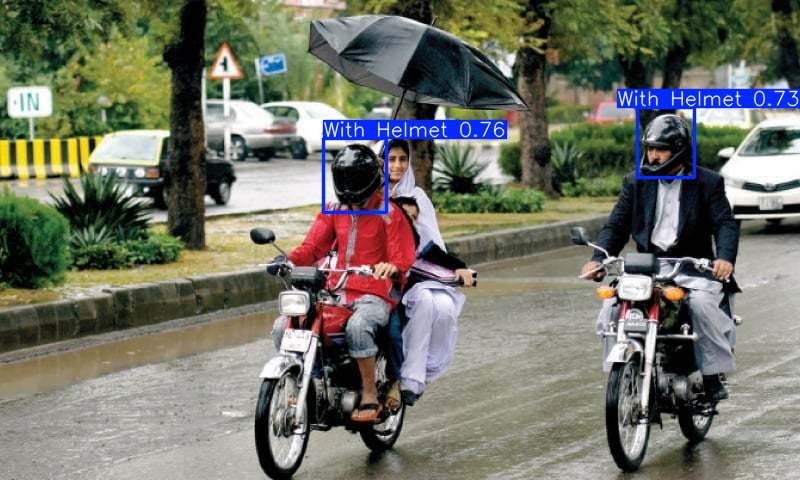

In [39]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load your trained YOLOv11 model
model = YOLO("runs/detect/yolo11n_fold0/weights/best.pt")  # update if using another fold

# Path to the uploaded image
img_path = "/kaggle/input/testpict/5bfe1f9b69a3d.jpg"

# Run inference and save the output image
results = model(img_path, save=True, conf=0.25, imgsz=640)

# Get the path where the result was saved
save_dir = results[0].save_dir  # e.g., runs/detect/predict
predicted_img_path = os.path.join(save_dir, os.path.basename(img_path))

# Display result inline
print("✅ Prediction completed. Displaying result:")
display(Image(filename=predicted_img_path))



image 1/1 /kaggle/input/personal/WhatsApp Image 2025-07-15 at 5.08.48 PM (1).jpg: 640x480 1 With Helmet, 1 Without Helmet, 11.0ms
Speed: 2.2ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict11
✅ Prediction completed. Displaying result:


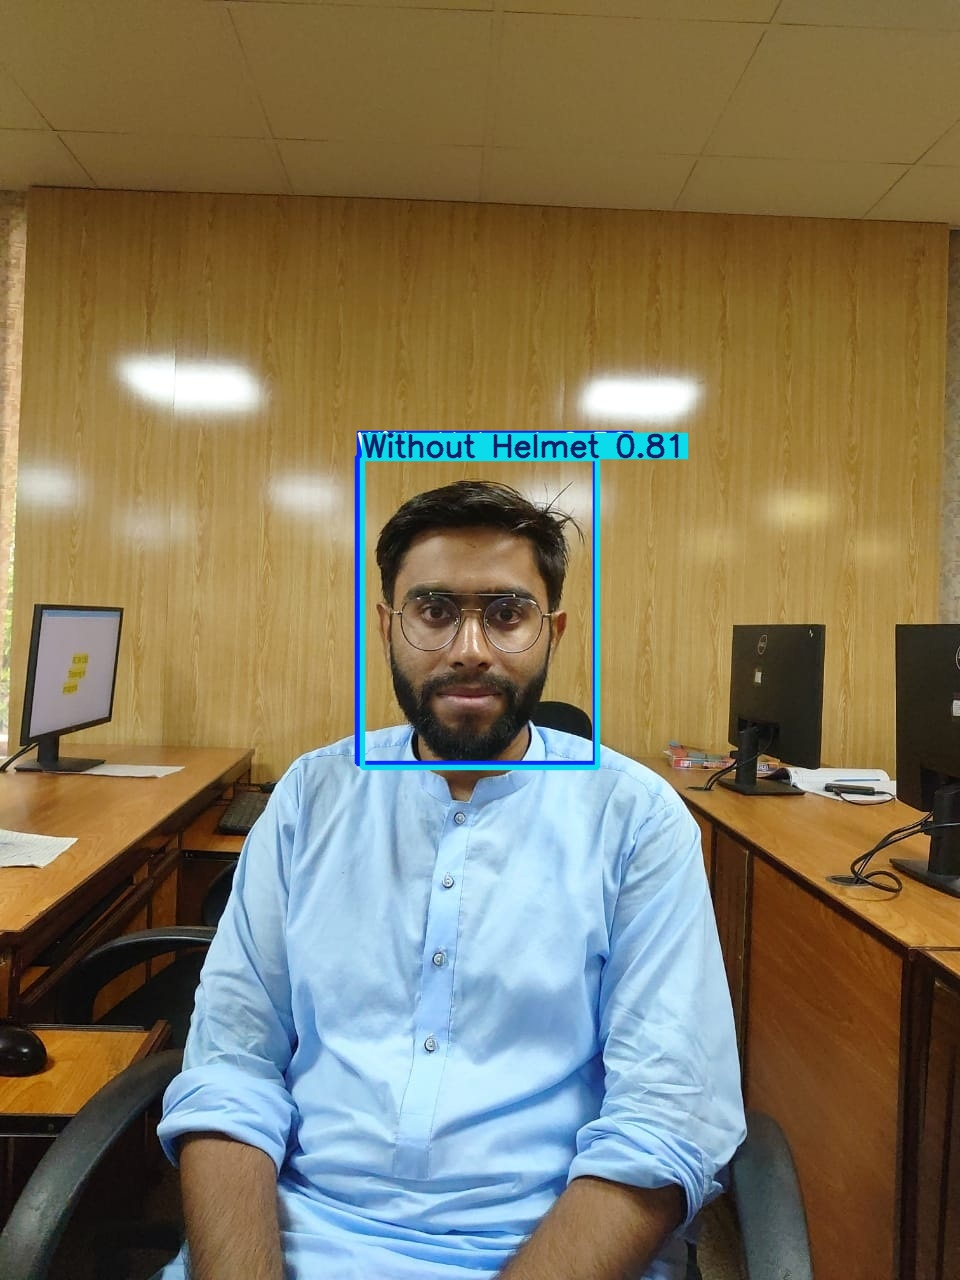

In [40]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load your trained YOLOv11 model
model = YOLO("runs/detect/yolo11n_fold0/weights/best.pt")  # update if using another fold

# Path to the uploaded image
img_path = "/kaggle/input/personal/WhatsApp Image 2025-07-15 at 5.08.48 PM (1).jpg"

# Run inference and save the output image
results = model(img_path, save=True, conf=0.25, imgsz=640)

# Get the path where the result was saved
save_dir = results[0].save_dir  # e.g., runs/detect/predict
predicted_img_path = os.path.join(save_dir, os.path.basename(img_path))

# Display result inline
print("✅ Prediction completed. Displaying result:")
display(Image(filename=predicted_img_path))



image 1/1 /kaggle/input/juniiii/WhatsApp Image 2025-07-15 at 5.17.53 PM.jpg: 640x480 1 With Helmet, 11.2ms
Speed: 2.6ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict14
✅ Prediction completed. Displaying result:


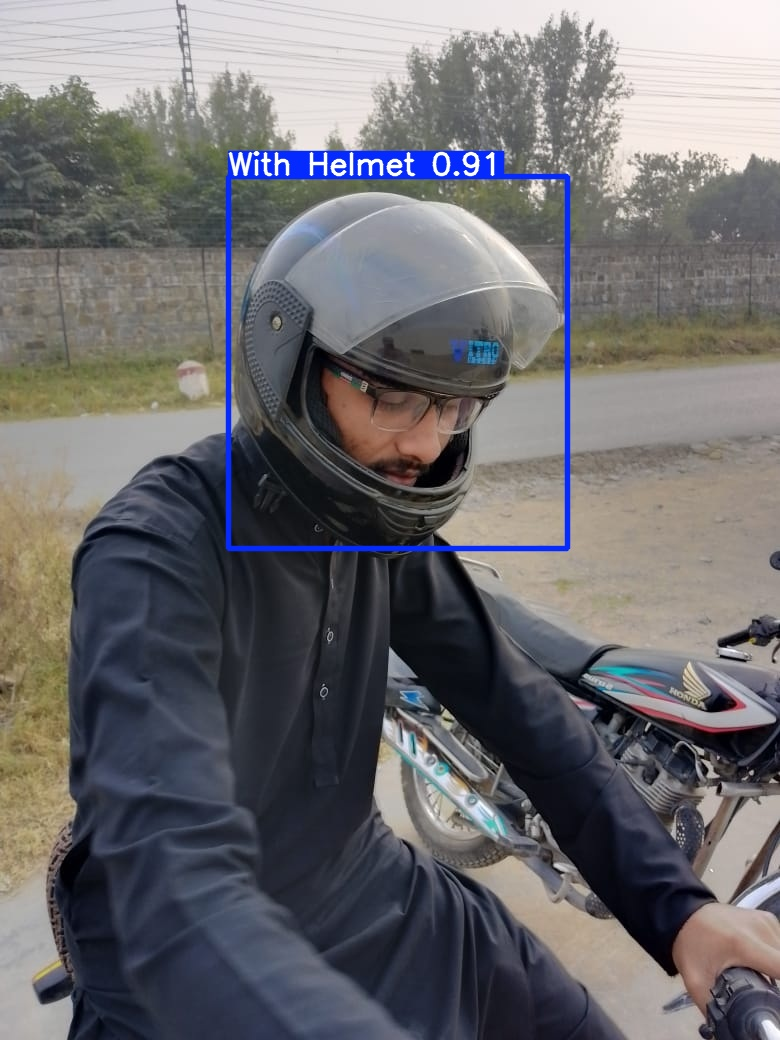

In [43]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load your trained YOLOv11 model
model = YOLO("runs/detect/yolo11n_fold0/weights/best.pt")  # update if using another fold

# Path to the uploaded image
img_path = "/kaggle/input/juniiii/WhatsApp Image 2025-07-15 at 5.17.53 PM.jpg"

# Run inference and save the output image
results = model(img_path, save=True, conf=0.25, imgsz=640)

# Get the path where the result was saved
save_dir = results[0].save_dir  # e.g., runs/detect/predict
predicted_img_path = os.path.join(save_dir, os.path.basename(img_path))

# Display result inline
print("✅ Prediction completed. Displaying result:")
display(Image(filename=predicted_img_path))



image 1/1 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets488_png.rf.9e6d10bd603358b9a0fad42537626efe.jpg: 640x640 1 With Helmet, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict17
📸 Showing prediction for: BikesHelmets488_png.rf.9e6d10bd603358b9a0fad42537626efe.jpg


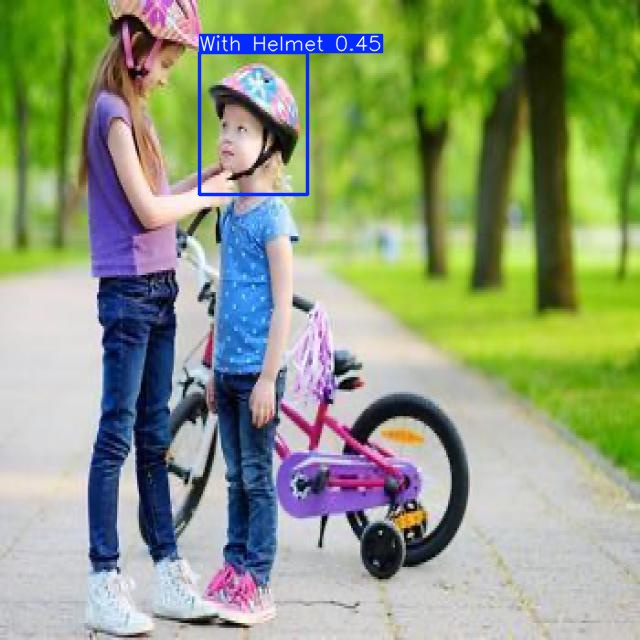


image 1/1 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets2_png.rf.57f03ac50e5a64ae722b9a254bb12d81.jpg: 640x640 3 With Helmets, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict17
📸 Showing prediction for: BikesHelmets2_png.rf.57f03ac50e5a64ae722b9a254bb12d81.jpg


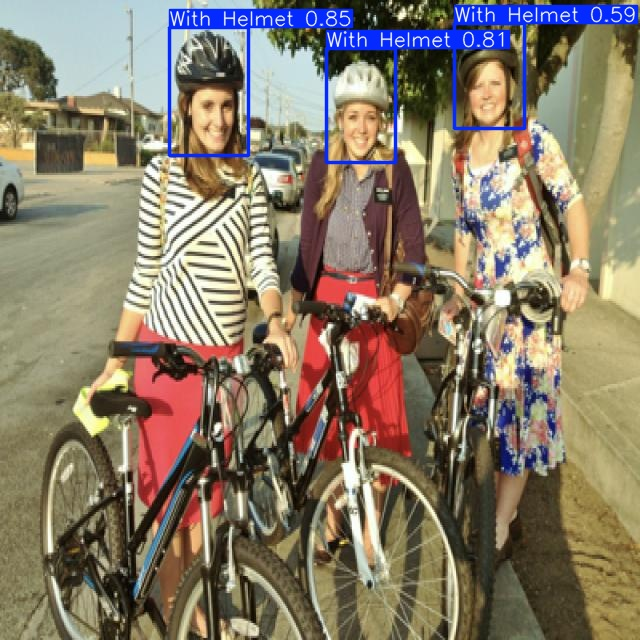


image 1/1 /kaggle/input/helmet/Pakistani_Helmet/test/images/BikesHelmets507_png.rf.62e8632838c2867e649981ea5cccdd9f.jpg: 640x640 1 With Helmet, 1 Without Helmet, 9.6ms
Speed: 1.5ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict17
📸 Showing prediction for: BikesHelmets507_png.rf.62e8632838c2867e649981ea5cccdd9f.jpg


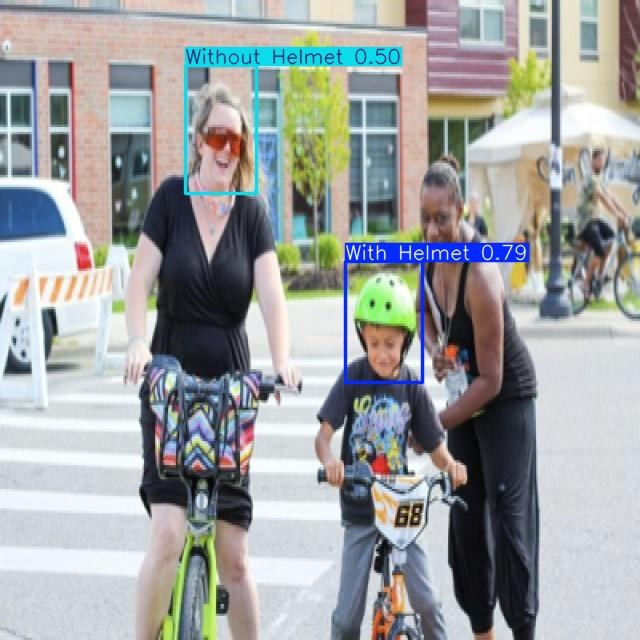


image 1/1 /kaggle/input/helmet/Pakistani_Helmet/test/images/PXL_20240104_104750324_720_jpeg.rf.8d83227a06ee288787982bc4f5c2ad9f.jpg: 640x640 1 Without Helmet, 9.5ms
Speed: 1.5ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict17
📸 Showing prediction for: PXL_20240104_104750324_720_jpeg.rf.8d83227a06ee288787982bc4f5c2ad9f.jpg


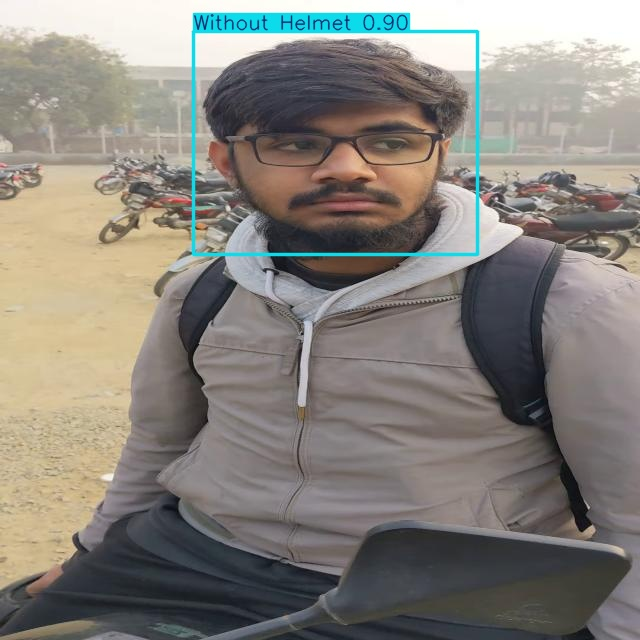

In [46]:
from ultralytics import YOLO
from IPython.display import Image, display
import os
import random

# ✅ Load trained model (update path if needed)
model = YOLO("runs/detect/yolo11n_fold0/weights/best.pt")

# ✅ Path to test images folder
test_images_dir = "/kaggle/input/helmet/Pakistani_Helmet/test/images"

# ✅ List and select 3–4 random test images
all_images = [os.path.join(test_images_dir, f) for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
sample_images = random.sample(all_images, 4)

# ✅ Run predictions and display
for img_path in sample_images:
    results = model(img_path, save=True, conf=0.25, imgsz=640)
    pred_path = os.path.join(results[0].save_dir, os.path.basename(img_path))
    print(f"📸 Showing prediction for: {os.path.basename(img_path)}")
    display(Image(filename=pred_path))



image 1/1 /kaggle/input/testpict/5bfe1f9b69a3d.jpg: 384x640 2 With Helmets, 49.5ms
Speed: 2.5ms preprocess, 49.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
✅ Prediction complete. Here's the image with bounding boxes:


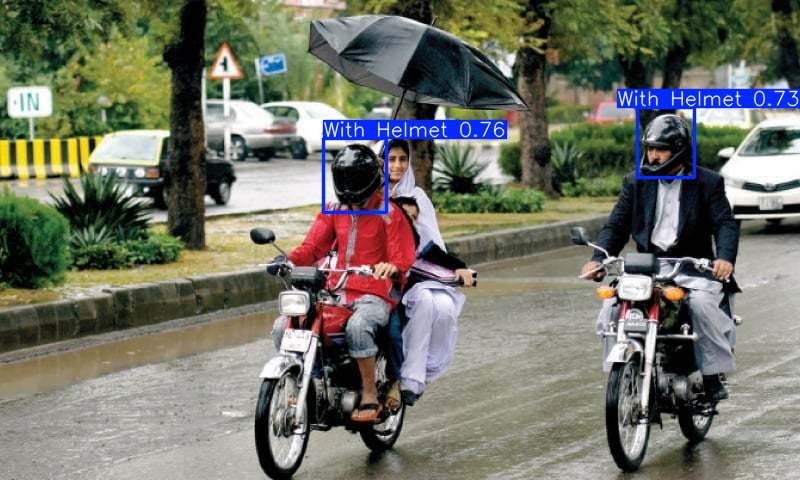

In [18]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load your trained model
model = YOLO("runs/detect/yolo11n_fold0/weights/best.pt")  # Replace if using another fold

# Path to the uploaded test image
img_path = "/kaggle/input/testpict/5bfe1f9b69a3d.jpg"

# Run prediction
results = model(img_path, save=True, conf=0.25, imgsz=640)

# Get saved prediction image path
save_dir = results[0].save_dir  # e.g., 'runs/detect/predict'
predicted_img_path = os.path.join(save_dir, os.path.basename(img_path))

# Show the result image
print("✅ Prediction complete. Here's the image with bounding boxes:")
display(Image(filename=predicted_img_path))


In [34]:
!pip install -q ultralytics

import os
from ultralytics import YOLO
from sklearn.model_selection import KFold
import shutil
import yaml
from matplotlib import pyplot as plt
import seaborn as sns
import random
from IPython.display import display, Image

# Dataset paths
base_dataset = "/kaggle/input/helmet/Pakistani_Helmet"
base_output = "/kaggle/working/helmet_cv_yolo12n"
os.makedirs(base_output, exist_ok=True)

# Class info
class_names = ['With Helmet', 'Without Helmet']
nc = len(class_names)
num_folds = 5

# Get image list
image_dir = os.path.join(base_dataset, "train/images")
label_dir = os.path.join(base_dataset, "train/labels")
images = sorted([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])

# K-Fold splitting
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
splits = list(kf.split(images))

# Loop over folds
for fold, (train_idx, val_idx) in enumerate(splits):
    print(f"\n🔁 Fold {fold} — Train: {len(train_idx)}, Val: {len(val_idx)}")

    fold_dir = os.path.join(base_output, f"fold{fold}")
    for split in ['train/images', 'train/labels', 'val/images', 'val/labels']:
        os.makedirs(os.path.join(fold_dir, split), exist_ok=True)

    # Copy training files
    for i in train_idx:
        img = images[i]
        label = img.rsplit('.', 1)[0] + '.txt'
        shutil.copy(os.path.join(image_dir, img), os.path.join(fold_dir, 'train/images', img))
        shutil.copy(os.path.join(label_dir, label), os.path.join(fold_dir, 'train/labels', label))

    # Copy validation files
    for i in val_idx:
        img = images[i]
        label = img.rsplit('.', 1)[0] + '.txt'
        shutil.copy(os.path.join(image_dir, img), os.path.join(fold_dir, 'val/images', img))
        shutil.copy(os.path.join(label_dir, label), os.path.join(fold_dir, 'val/labels', label))

    # Write data.yaml
    data_yaml_path = os.path.join(fold_dir, "data.yaml")
    data_dict = {
        'train': os.path.join(fold_dir, 'train'),
        'val': os.path.join(fold_dir, 'val'),
        'nc': nc,
        'names': class_names
    }
    with open(data_yaml_path, 'w') as f:
        yaml.dump(data_dict, f)

    # ✅ Load YOLOv12n model
    model = YOLO("yolo12n.pt")

    # ✅ Train with early stopping
    model.train(
        data=data_yaml_path,
        epochs=30,
        patience=7,
        imgsz=640,
        batch=16,
        name=f"yolo12n_fold{fold}",
        verbose=True
    )

    # ✅ Validate and plot confusion matrix
    print(f"\n📊 Evaluating Fold {fold}...")
    metrics = model.val(data=data_yaml_path)
    cm = metrics.confusion_matrix.matrix.astype(int)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_yolo12n_fold{fold}.png")
    plt.close()

# -----------------------------------------------------------
# ✅ Predict on Random Test Images + Uploaded Images
# -----------------------------------------------------------

print("\n🎯 Running Inference on 3 Test Images and 2 Uploaded Pics...")

# Load final model (e.g., from Fold 0)
model = YOLO("runs/detect/yolo12n_fold0/weights/best.pt")

# 1️⃣ Test images from test set
test_img_dir = "/kaggle/input/helmet/Pakistani_Helmet/test/images"
test_images = [os.path.join(test_img_dir, f) for f in os.listdir(test_img_dir) if f.endswith(('.jpg', '.png'))]
test_samples = random.sample(test_images, 3)

# 2️⃣ Uploaded individual pictures
uploaded_imgs = [
    "/kaggle/input/bikepic/riding-vintage-motorcycle-stockcake.jpg",
    "/kaggle/input/testpict/5bfe1f9b69a3d.jpg",
    "/kaggle/input/mypict/WhatsApp Image 2025-07-15 at 5.08.48 PM.jpeg",
]

all_to_predict = test_samples + uploaded_imgs

# Run prediction and display
for img_path in all_to_predict:
    print(f"🔍 Predicting: {os.path.basename(img_path)}")
    results = model(img_path, save=True, conf=0.25)
    pred_path = os.path.join(results[0].save_dir, os.path.basename(img_path))
    display(Image(filename=pred_path))



🔁 Fold 0 — Train: 1663, Val: 416
New https://pypi.org/project/ultralytics/8.3.167 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/helmet_cv_yolo12n/fold0/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, n

train: Scanning /kaggle/working/helmet_cv_yolo12n/fold0/train/labels.cache... 1663 images, 18 backgrounds, 0 corrupt: 100%|██████████| 1663/1663 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 394.2±129.7 MB/s, size: 69.3 KB)


val: Scanning /kaggle/working/helmet_cv_yolo12n/fold0/val/labels.cache... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolo12n_fold03/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo12n_fold03
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.61G      1.509      3.718      1.502         42        640:  20%|██        | 21/104 [00:06<00:24,  3.38it/s]


KeyboardInterrupt: 

In [31]:
import os

base_dir = 'runs/detect'
target_file = 'best.pt'

# Search for best.pt in all subdirectories
for root, dirs, files in os.walk(base_dir):
    if target_file in files:
        print("✅ Found:", os.path.join(root, target_file))


✅ Found: runs/detect/yolo12n_fold1/weights/best.pt
✅ Found: runs/detect/yolo11n_fold4/weights/best.pt
✅ Found: runs/detect/yolo12n_fold3/weights/best.pt
✅ Found: runs/detect/yolo11n_fold1/weights/best.pt
✅ Found: runs/detect/yolo11n_fold0/weights/best.pt
✅ Found: runs/detect/yolo11n_fold3/weights/best.pt
✅ Found: runs/detect/yolo12n_fold2/weights/best.pt
✅ Found: runs/detect/yolo12n_fold0/weights/best.pt
✅ Found: runs/detect/yolo12n_fold4/weights/best.pt
✅ Found: runs/detect/yolo11n_fold2/weights/best.pt


In [32]:
from ultralytics import YOLO

# Paths to best.pt for each fold
fold_paths = [
    "runs/detect/yolo12n_fold0/weights/best.pt",
    "runs/detect/yolo12n_fold1/weights/best.pt",
    "runs/detect/yolo12n_fold2/weights/best.pt",
    "runs/detect/yolo12n_fold3/weights/best.pt",
    "runs/detect/yolo12n_fold4/weights/best.pt"
]

# Class names
class_names = ['With Helmet', 'Without Helmet']

# Store metrics
all_metrics = []

for fold, path in enumerate(fold_paths):
    print(f"\n📂 Validating Fold {fold} — {path}")
    model = YOLO(path)
    metrics = model.val()

    # Extract values safely
    p = float(metrics.box.p) if isinstance(metrics.box.p, (float, int)) else float(metrics.box.p[0])
    r = float(metrics.box.r) if isinstance(metrics.box.r, (float, int)) else float(metrics.box.r[0])
    m50 = float(metrics.box.map50) if isinstance(metrics.box.map50, (float, int)) else float(metrics.box.map50[0])
    m75 = float(metrics.box.map75) if isinstance(metrics.box.map75, (float, int)) else float(metrics.box.map75[0])
    m95 = float(metrics.box.map) if isinstance(metrics.box.map, (float, int)) else float(metrics.box.map[0])

    fold_result = {
        "Precision": p,
        "Recall": r,
        "mAP@50": m50,
        "mAP@75": m75,
        "mAP@50-95": m95,
        "PerClass_mAP50": metrics.box.maps.tolist() if hasattr(metrics.box, 'maps') else []
    }
    all_metrics.append(fold_result)

    # Print summary
    print(f"\n📊 Fold {fold} Performance:")
    print(f"Precision     : {p:.3f}")
    print(f"Recall        : {r:.3f}")
    print(f"mAP@50        : {m50:.3f}")
    print(f"mAP@75        : {m75:.3f}")
    print(f"mAP@50-95     : {m95:.3f}")

    if fold_result["PerClass_mAP50"]:
        print("\n📌 Per-Class mAP@50:")
        for i, score in enumerate(fold_result["PerClass_mAP50"]):
            print(f"{class_names[i]}: {score:.3f}")



📂 Validating Fold 0 — runs/detect/yolo12n_fold0/weights/best.pt
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,118 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1001.5±317.4 MB/s, size: 57.3 KB)


val: Scanning /kaggle/working/helmet_cv_yolo12n/fold0/val/labels.cache... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.75it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        664      0.956      0.936      0.969      0.764
           With Helmet        244        381      0.955      0.953      0.983      0.781
        Without Helmet        204        283      0.957      0.919      0.955      0.746
Speed: 0.8ms preprocess, 6.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val12

📊 Fold 0 Performance:
Precision     : 0.955
Recall        : 0.953
mAP@50        : 0.969
mAP@75        : 0.928
mAP@50-95     : 0.764

📌 Per-Class mAP@50:
With Helmet: 0.781
Without Helmet: 0.746

📂 Validating Fold 1 — runs/detect/yolo12n_fold1/weights/best.pt
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,118 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1067.3±387.1 MB/s, size: 57.9 KB)


val: Scanning /kaggle/working/helmet_cv_yolo12n/fold1/val/labels.cache... 416 images, 3 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.87it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        682      0.933      0.957      0.979       0.77
           With Helmet        278        417      0.908      0.981      0.975      0.776
        Without Helmet        180        265      0.957      0.934      0.982      0.765
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val13

📊 Fold 1 Performance:
Precision     : 0.908
Recall        : 0.981
mAP@50        : 0.979
mAP@75        : 0.913
mAP@50-95     : 0.770

📌 Per-Class mAP@50:
With Helmet: 0.776
Without Helmet: 0.765

📂 Validating Fold 2 — runs/detect/yolo12n_fold2/weights/best.pt
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,118 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1105.1±303.4 MB/s, size: 58.3 KB)


val: Scanning /kaggle/working/helmet_cv_yolo12n/fold2/val/labels.cache... 416 images, 5 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.83it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        733      0.949      0.955      0.983      0.761
           With Helmet        258        449      0.927      0.984      0.983      0.756
        Without Helmet        199        284       0.97      0.925      0.984      0.766
Speed: 1.0ms preprocess, 6.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val14

📊 Fold 2 Performance:
Precision     : 0.927
Recall        : 0.984
mAP@50        : 0.983
mAP@75        : 0.895
mAP@50-95     : 0.761

📌 Per-Class mAP@50:
With Helmet: 0.756
Without Helmet: 0.766

📂 Validating Fold 3 — runs/detect/yolo12n_fold3/weights/best.pt
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,118 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 996.5±191.1 MB/s, size: 66.9 KB)


val: Scanning /kaggle/working/helmet_cv_yolo12n/fold3/val/labels.cache... 416 images, 4 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.62it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        416        705      0.925      0.931      0.963      0.736
           With Helmet        269        415       0.92      0.942      0.968      0.747
        Without Helmet        187        290      0.929      0.921      0.958      0.725
Speed: 1.2ms preprocess, 6.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val15

📊 Fold 3 Performance:
Precision     : 0.920
Recall        : 0.942
mAP@50        : 0.963
mAP@75        : 0.886
mAP@50-95     : 0.736

📌 Per-Class mAP@50:
With Helmet: 0.747
Without Helmet: 0.725

📂 Validating Fold 4 — runs/detect/yolo12n_fold4/weights/best.pt
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,118 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 815.8±347.4 MB/s, size: 52.9 KB)


val: Scanning /kaggle/working/helmet_cv_yolo12n/fold4/val/labels.cache... 415 images, 6 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.42it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        415        729       0.93      0.933      0.972      0.754
           With Helmet        229        390      0.942      0.918      0.966      0.751
        Without Helmet        235        339      0.917      0.948      0.977      0.757
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val16

📊 Fold 4 Performance:
Precision     : 0.942
Recall        : 0.918
mAP@50        : 0.972
mAP@75        : 0.907
mAP@50-95     : 0.754

📌 Per-Class mAP@50:
With Helmet: 0.751
Without Helmet: 0.757


In [33]:
import numpy as np

# Average over all folds
avg_metrics = {
    "Precision": np.mean([fold["Precision"] for fold in all_metrics]),
    "Recall": np.mean([fold["Recall"] for fold in all_metrics]),
    "mAP@50": np.mean([fold["mAP@50"] for fold in all_metrics]),
    "mAP@75": np.mean([fold["mAP@75"] for fold in all_metrics]),
    "mAP@50-95": np.mean([fold["mAP@50-95"] for fold in all_metrics]),
}

# Optional: Average per-class mAP@50
per_class_map = np.array([fold["PerClass_mAP50"] for fold in all_metrics if fold["PerClass_mAP50"]])
if per_class_map.shape[0] > 0:
    per_class_avg = per_class_map.mean(axis=0)
else:
    per_class_avg = []

# Print average results
print("\n🔎 Average Metrics Across 5 Folds:")
for k, v in avg_metrics.items():
    print(f"{k:<12}: {v:.3f}")

if len(per_class_avg) > 0:
    print("\n📌 Average Per-Class mAP@50:")
    for i, score in enumerate(per_class_avg):
        print(f"{class_names[i]}: {score:.3f}")


🔎 Average Metrics Across 5 Folds:
Precision   : 0.931
Recall      : 0.956
mAP@50      : 0.973
mAP@75      : 0.906
mAP@50-95   : 0.757

📌 Average Per-Class mAP@50:
With Helmet: 0.762
Without Helmet: 0.752


🔍 Predicting: WhatsApp Image 2025-07-15 at 5.08.48 PM.jpg

image 1/1 /kaggle/input/personal/WhatsApp Image 2025-07-15 at 5.08.48 PM.jpg: 640x480 1 With Helmet, 21.0ms
Speed: 2.4ms preprocess, 21.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict15


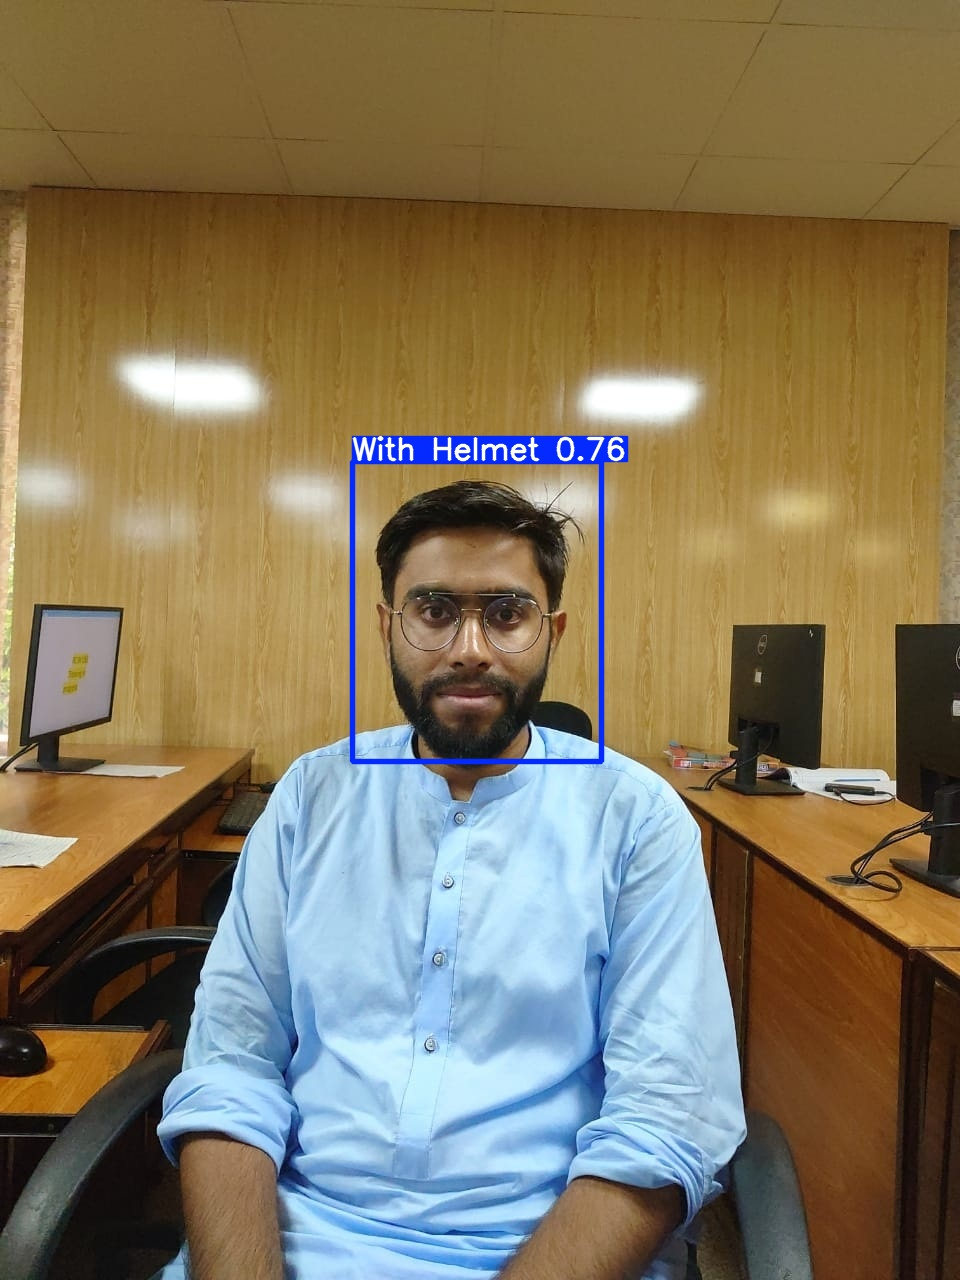

🔍 Predicting: WhatsApp Image 2025-07-15 at 5.17.53 PM.jpg

image 1/1 /kaggle/input/juniiii/WhatsApp Image 2025-07-15 at 5.17.53 PM.jpg: 640x480 1 With Helmet, 17.0ms
Speed: 2.5ms preprocess, 17.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict15


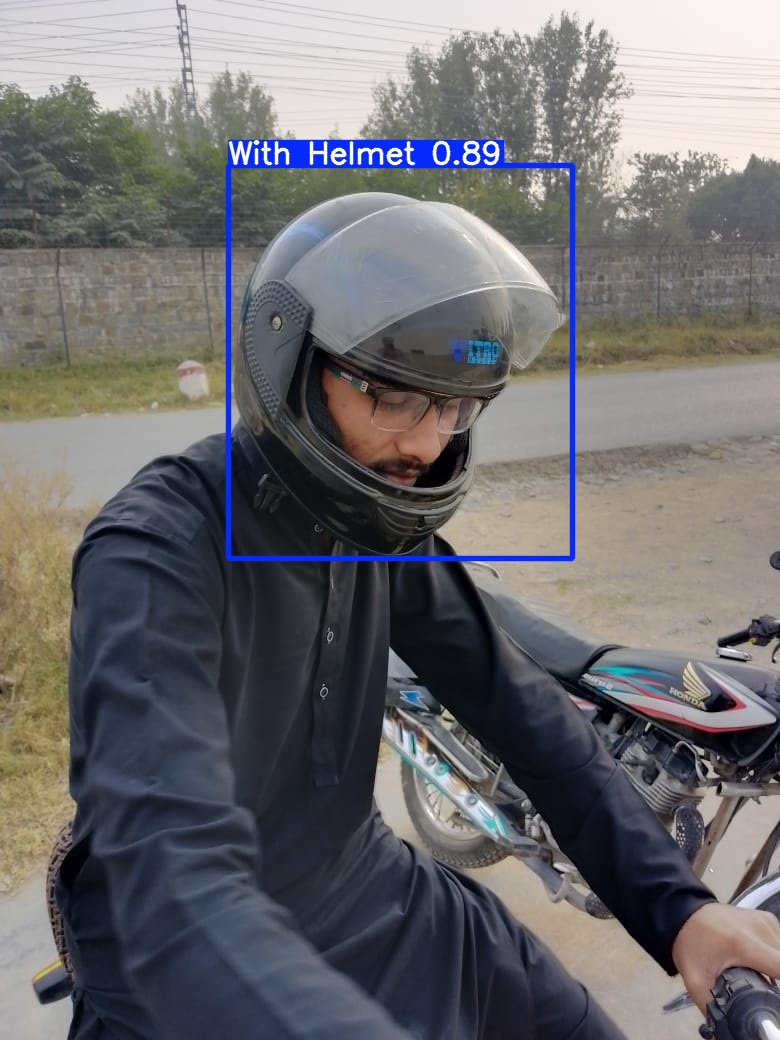

In [44]:
from ultralytics import YOLO
from IPython.display import display, Image as IPImage
import os

# ✅ Load your trained YOLOv12n model (adjust path if needed)
model_path = "/kaggle/working/runs/detect/yolo12n_fold0/weights/best.pt"
model = YOLO(model_path)

# ✅ Image paths
test_images = [
    "/kaggle/input/personal/WhatsApp Image 2025-07-15 at 5.08.48 PM.jpg",
    "/kaggle/input/juniiii/WhatsApp Image 2025-07-15 at 5.17.53 PM.jpg"
]

# ✅ Run prediction and show results
for img_path in test_images:
    print(f"🔍 Predicting: {os.path.basename(img_path)}")
    results = model(img_path, save=True, conf=0.25)
    pred_path = os.path.join(results[0].save_dir, os.path.basename(img_path))
    display(IPImage(filename=pred_path))
